## Import Libraries

In [10]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import PIL
import shutil

## Data Augmentation

In [11]:
dir_name="img_align_celeba"
dirs= os.listdir("img_align_celeba")
#for file in dirs:
   #print(file)
#get list of strings to iterate

In [12]:
for filename in dirs:
    # Load image
    image = PIL.Image.open(dir_name + '/' + filename)
    '''
    # Details about the image
    print(image.format)
    print(image.mode)
    print(image.size)
    # Show image
    image.show()
    '''
    
    # Grayscale img
    gs_img = image.convert(mode = 'L')
    gs_img.save(dir_name + '/grayscale_' + filename)
    
    # Flip img
    hori_img = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    vert_img = image.transpose(PIL.Image.FLIP_TOP_BOTTOM)
    hori_img.save(dir_name + '/hori_flip_' + filename)
    vert_img.save(dir_name + '/vert_flip_' + filename)
    
    # Rotate img
    rotate_img = image.rotate(90)
    rotate_img.save(dir_name + '/rotated_' + filename)
    
    # Progress tracker - 1,035,983 images in total
    print("Image '" + filename + "': Done" )

Image '000001.jpg': Done
Image '000002.jpg': Done
Image '000003.jpg': Done
Image '000004.jpg': Done
Image '000005.jpg': Done
Image '000006.jpg': Done
Image '000007.jpg': Done
Image '000008.jpg': Done
Image '000009.jpg': Done
Image '000010.jpg': Done
Image '000011.jpg': Done
Image '000012.jpg': Done
Image '000013.jpg': Done
Image '000014.jpg': Done
Image '000015.jpg': Done
Image '000016.jpg': Done
Image '000017.jpg': Done
Image '000018.jpg': Done
Image '000019.jpg': Done
Image '000020.jpg': Done
Image '000021.jpg': Done
Image '000022.jpg': Done
Image '000023.jpg': Done
Image '000024.jpg': Done
Image '000025.jpg': Done
Image '000026.jpg': Done
Image '000027.jpg': Done
Image '000028.jpg': Done
Image '000029.jpg': Done
Image '000030.jpg': Done
Image '000031.jpg': Done
Image '000032.jpg': Done
Image '000033.jpg': Done
Image '000034.jpg': Done
Image '000035.jpg': Done
Image '000036.jpg': Done
Image '000037.jpg': Done
Image '000038.jpg': Done
Image '000039.jpg': Done
Image '000040.jpg': Done


Image '000337.jpg': Done
Image '000338.jpg': Done
Image '000339.jpg': Done
Image '000340.jpg': Done
Image '000341.jpg': Done
Image '000342.jpg': Done
Image '000343.jpg': Done
Image '000344.jpg': Done
Image '000345.jpg': Done
Image '000346.jpg': Done
Image '000347.jpg': Done
Image '000348.jpg': Done
Image '000349.jpg': Done
Image '000350.jpg': Done
Image '000351.jpg': Done
Image '000352.jpg': Done
Image '000353.jpg': Done
Image '000354.jpg': Done
Image '000355.jpg': Done
Image '000356.jpg': Done
Image '000357.jpg': Done
Image '000358.jpg': Done
Image '000359.jpg': Done
Image '000360.jpg': Done
Image '000361.jpg': Done
Image '000362.jpg': Done
Image '000363.jpg': Done
Image '000364.jpg': Done
Image '000365.jpg': Done
Image '000366.jpg': Done
Image '000367.jpg': Done
Image '000368.jpg': Done
Image '000369.jpg': Done
Image '000370.jpg': Done
Image '000371.jpg': Done
Image '000372.jpg': Done
Image '000373.jpg': Done
Image '000374.jpg': Done
Image '000375.jpg': Done
Image '000376.jpg': Done


Image '000670.jpg': Done
Image '000671.jpg': Done
Image '000672.jpg': Done
Image '000673.jpg': Done
Image '000674.jpg': Done
Image '000675.jpg': Done
Image '000676.jpg': Done
Image '000677.jpg': Done
Image '000678.jpg': Done
Image '000679.jpg': Done
Image '000680.jpg': Done
Image '000681.jpg': Done
Image '000682.jpg': Done
Image '000683.jpg': Done
Image '000684.jpg': Done
Image '000685.jpg': Done
Image '000686.jpg': Done
Image '000687.jpg': Done
Image '000688.jpg': Done
Image '000689.jpg': Done
Image '000690.jpg': Done
Image '000691.jpg': Done
Image '000692.jpg': Done
Image '000693.jpg': Done
Image '000694.jpg': Done
Image '000695.jpg': Done
Image '000696.jpg': Done
Image '000697.jpg': Done
Image '000698.jpg': Done
Image '000699.jpg': Done
Image '000700.jpg': Done
Image '000701.jpg': Done
Image '000702.jpg': Done
Image '000703.jpg': Done
Image '000704.jpg': Done
Image '000705.jpg': Done
Image '000706.jpg': Done
Image '000707.jpg': Done
Image '000708.jpg': Done
Image '000709.jpg': Done


Image '001002.jpg': Done
Image '001003.jpg': Done
Image '001004.jpg': Done
Image '001005.jpg': Done
Image '001006.jpg': Done
Image '001007.jpg': Done
Image '001008.jpg': Done
Image '001009.jpg': Done
Image '001010.jpg': Done
Image '001011.jpg': Done
Image '001012.jpg': Done
Image '001013.jpg': Done
Image '001014.jpg': Done
Image '001015.jpg': Done
Image '001016.jpg': Done
Image '001017.jpg': Done
Image '001018.jpg': Done
Image '001019.jpg': Done
Image '001020.jpg': Done
Image '001021.jpg': Done
Image '001022.jpg': Done
Image '001023.jpg': Done
Image '001024.jpg': Done
Image '001025.jpg': Done
Image '001026.jpg': Done
Image '001027.jpg': Done
Image '001028.jpg': Done
Image '001029.jpg': Done
Image '001030.jpg': Done
Image '001031.jpg': Done
Image '001032.jpg': Done
Image '001033.jpg': Done
Image '001034.jpg': Done
Image '001035.jpg': Done
Image '001036.jpg': Done
Image '001037.jpg': Done
Image '001038.jpg': Done
Image '001039.jpg': Done
Image '001040.jpg': Done
Image '001041.jpg': Done


Image '001341.jpg': Done
Image '001342.jpg': Done
Image '001343.jpg': Done
Image '001344.jpg': Done
Image '001345.jpg': Done
Image '001346.jpg': Done
Image '001347.jpg': Done
Image '001348.jpg': Done
Image '001349.jpg': Done
Image '001350.jpg': Done
Image '001351.jpg': Done
Image '001352.jpg': Done
Image '001353.jpg': Done
Image '001354.jpg': Done
Image '001355.jpg': Done
Image '001356.jpg': Done
Image '001357.jpg': Done
Image '001358.jpg': Done
Image '001359.jpg': Done
Image '001360.jpg': Done
Image '001361.jpg': Done
Image '001362.jpg': Done
Image '001363.jpg': Done
Image '001364.jpg': Done
Image '001365.jpg': Done
Image '001366.jpg': Done
Image '001367.jpg': Done
Image '001368.jpg': Done
Image '001369.jpg': Done
Image '001370.jpg': Done
Image '001371.jpg': Done
Image '001372.jpg': Done
Image '001373.jpg': Done
Image '001374.jpg': Done
Image '001375.jpg': Done
Image '001376.jpg': Done
Image '001377.jpg': Done
Image '001378.jpg': Done
Image '001379.jpg': Done
Image '001380.jpg': Done


Image '001676.jpg': Done
Image '001677.jpg': Done
Image '001678.jpg': Done
Image '001679.jpg': Done
Image '001680.jpg': Done
Image '001681.jpg': Done
Image '001682.jpg': Done
Image '001683.jpg': Done
Image '001684.jpg': Done
Image '001685.jpg': Done
Image '001686.jpg': Done
Image '001687.jpg': Done
Image '001688.jpg': Done
Image '001689.jpg': Done
Image '001690.jpg': Done
Image '001691.jpg': Done
Image '001692.jpg': Done
Image '001693.jpg': Done
Image '001694.jpg': Done
Image '001695.jpg': Done
Image '001696.jpg': Done
Image '001697.jpg': Done
Image '001698.jpg': Done
Image '001699.jpg': Done
Image '001700.jpg': Done
Image '001701.jpg': Done
Image '001702.jpg': Done
Image '001703.jpg': Done
Image '001704.jpg': Done
Image '001705.jpg': Done
Image '001706.jpg': Done
Image '001707.jpg': Done
Image '001708.jpg': Done
Image '001709.jpg': Done
Image '001710.jpg': Done
Image '001711.jpg': Done
Image '001712.jpg': Done
Image '001713.jpg': Done
Image '001714.jpg': Done
Image '001715.jpg': Done


Image '002007.jpg': Done
Image '002008.jpg': Done
Image '002009.jpg': Done
Image '002010.jpg': Done
Image '002011.jpg': Done
Image '002012.jpg': Done
Image '002013.jpg': Done
Image '002014.jpg': Done
Image '002015.jpg': Done
Image '002016.jpg': Done
Image '002017.jpg': Done
Image '002018.jpg': Done
Image '002019.jpg': Done
Image '002020.jpg': Done
Image '002021.jpg': Done
Image '002022.jpg': Done
Image '002023.jpg': Done
Image '002024.jpg': Done
Image '002025.jpg': Done
Image '002026.jpg': Done
Image '002027.jpg': Done
Image '002028.jpg': Done
Image '002029.jpg': Done
Image '002030.jpg': Done
Image '002031.jpg': Done
Image '002032.jpg': Done
Image '002033.jpg': Done
Image '002034.jpg': Done
Image '002035.jpg': Done
Image '002036.jpg': Done
Image '002037.jpg': Done
Image '002038.jpg': Done
Image '002039.jpg': Done
Image '002040.jpg': Done
Image '002041.jpg': Done
Image '002042.jpg': Done
Image '002043.jpg': Done
Image '002044.jpg': Done
Image '002045.jpg': Done
Image '002046.jpg': Done


Image '002341.jpg': Done
Image '002342.jpg': Done
Image '002343.jpg': Done
Image '002344.jpg': Done
Image '002345.jpg': Done
Image '002346.jpg': Done
Image '002347.jpg': Done
Image '002348.jpg': Done
Image '002349.jpg': Done
Image '002350.jpg': Done
Image '002351.jpg': Done
Image '002352.jpg': Done
Image '002353.jpg': Done
Image '002354.jpg': Done
Image '002355.jpg': Done
Image '002356.jpg': Done
Image '002357.jpg': Done
Image '002358.jpg': Done
Image '002359.jpg': Done
Image '002360.jpg': Done
Image '002361.jpg': Done
Image '002362.jpg': Done
Image '002363.jpg': Done
Image '002364.jpg': Done
Image '002365.jpg': Done
Image '002366.jpg': Done
Image '002367.jpg': Done
Image '002368.jpg': Done
Image '002369.jpg': Done
Image '002370.jpg': Done
Image '002371.jpg': Done
Image '002372.jpg': Done
Image '002373.jpg': Done
Image '002374.jpg': Done
Image '002375.jpg': Done
Image '002376.jpg': Done
Image '002377.jpg': Done
Image '002378.jpg': Done
Image '002379.jpg': Done
Image '002380.jpg': Done


Image '002669.jpg': Done
Image '002670.jpg': Done
Image '002671.jpg': Done
Image '002672.jpg': Done
Image '002673.jpg': Done
Image '002674.jpg': Done
Image '002675.jpg': Done
Image '002676.jpg': Done
Image '002677.jpg': Done
Image '002678.jpg': Done
Image '002679.jpg': Done
Image '002680.jpg': Done
Image '002681.jpg': Done
Image '002682.jpg': Done
Image '002683.jpg': Done
Image '002684.jpg': Done
Image '002685.jpg': Done
Image '002686.jpg': Done
Image '002687.jpg': Done
Image '002688.jpg': Done
Image '002689.jpg': Done
Image '002690.jpg': Done
Image '002691.jpg': Done
Image '002692.jpg': Done
Image '002693.jpg': Done
Image '002694.jpg': Done
Image '002695.jpg': Done
Image '002696.jpg': Done
Image '002697.jpg': Done
Image '002698.jpg': Done
Image '002699.jpg': Done
Image '002700.jpg': Done
Image '002701.jpg': Done
Image '002702.jpg': Done
Image '002703.jpg': Done
Image '002704.jpg': Done
Image '002705.jpg': Done
Image '002706.jpg': Done
Image '002707.jpg': Done
Image '002708.jpg': Done


Image '003010.jpg': Done
Image '003011.jpg': Done
Image '003012.jpg': Done
Image '003013.jpg': Done
Image '003014.jpg': Done
Image '003015.jpg': Done
Image '003016.jpg': Done
Image '003017.jpg': Done
Image '003018.jpg': Done
Image '003019.jpg': Done
Image '003020.jpg': Done
Image '003021.jpg': Done
Image '003022.jpg': Done
Image '003023.jpg': Done
Image '003024.jpg': Done
Image '003025.jpg': Done
Image '003026.jpg': Done
Image '003027.jpg': Done
Image '003028.jpg': Done
Image '003029.jpg': Done
Image '003030.jpg': Done
Image '003031.jpg': Done
Image '003032.jpg': Done
Image '003033.jpg': Done
Image '003034.jpg': Done
Image '003035.jpg': Done
Image '003036.jpg': Done
Image '003037.jpg': Done
Image '003038.jpg': Done
Image '003039.jpg': Done
Image '003040.jpg': Done
Image '003041.jpg': Done
Image '003042.jpg': Done
Image '003043.jpg': Done
Image '003044.jpg': Done
Image '003045.jpg': Done
Image '003046.jpg': Done
Image '003047.jpg': Done
Image '003048.jpg': Done
Image '003049.jpg': Done


Image '003338.jpg': Done
Image '003339.jpg': Done
Image '003340.jpg': Done
Image '003341.jpg': Done
Image '003342.jpg': Done
Image '003343.jpg': Done
Image '003344.jpg': Done
Image '003345.jpg': Done
Image '003346.jpg': Done
Image '003347.jpg': Done
Image '003348.jpg': Done
Image '003349.jpg': Done
Image '003350.jpg': Done
Image '003351.jpg': Done
Image '003352.jpg': Done
Image '003353.jpg': Done
Image '003354.jpg': Done
Image '003355.jpg': Done
Image '003356.jpg': Done
Image '003357.jpg': Done
Image '003358.jpg': Done
Image '003359.jpg': Done
Image '003360.jpg': Done
Image '003361.jpg': Done
Image '003362.jpg': Done
Image '003363.jpg': Done
Image '003364.jpg': Done
Image '003365.jpg': Done
Image '003366.jpg': Done
Image '003367.jpg': Done
Image '003368.jpg': Done
Image '003369.jpg': Done
Image '003370.jpg': Done
Image '003371.jpg': Done
Image '003372.jpg': Done
Image '003373.jpg': Done
Image '003374.jpg': Done
Image '003375.jpg': Done
Image '003376.jpg': Done
Image '003377.jpg': Done


Image '003668.jpg': Done
Image '003669.jpg': Done
Image '003670.jpg': Done
Image '003671.jpg': Done
Image '003672.jpg': Done
Image '003673.jpg': Done
Image '003674.jpg': Done
Image '003675.jpg': Done
Image '003676.jpg': Done
Image '003677.jpg': Done
Image '003678.jpg': Done
Image '003679.jpg': Done
Image '003680.jpg': Done
Image '003681.jpg': Done
Image '003682.jpg': Done
Image '003683.jpg': Done
Image '003684.jpg': Done
Image '003685.jpg': Done
Image '003686.jpg': Done
Image '003687.jpg': Done
Image '003688.jpg': Done
Image '003689.jpg': Done
Image '003690.jpg': Done
Image '003691.jpg': Done
Image '003692.jpg': Done
Image '003693.jpg': Done
Image '003694.jpg': Done
Image '003695.jpg': Done
Image '003696.jpg': Done
Image '003697.jpg': Done
Image '003698.jpg': Done
Image '003699.jpg': Done
Image '003700.jpg': Done
Image '003701.jpg': Done
Image '003702.jpg': Done
Image '003703.jpg': Done
Image '003704.jpg': Done
Image '003705.jpg': Done
Image '003706.jpg': Done
Image '003707.jpg': Done


Image '004006.jpg': Done
Image '004007.jpg': Done
Image '004008.jpg': Done
Image '004009.jpg': Done
Image '004010.jpg': Done
Image '004011.jpg': Done
Image '004012.jpg': Done
Image '004013.jpg': Done
Image '004014.jpg': Done
Image '004015.jpg': Done
Image '004016.jpg': Done
Image '004017.jpg': Done
Image '004018.jpg': Done
Image '004019.jpg': Done
Image '004020.jpg': Done
Image '004021.jpg': Done
Image '004022.jpg': Done
Image '004023.jpg': Done
Image '004024.jpg': Done
Image '004025.jpg': Done
Image '004026.jpg': Done
Image '004027.jpg': Done
Image '004028.jpg': Done
Image '004029.jpg': Done
Image '004030.jpg': Done
Image '004031.jpg': Done
Image '004032.jpg': Done
Image '004033.jpg': Done
Image '004034.jpg': Done
Image '004035.jpg': Done
Image '004036.jpg': Done
Image '004037.jpg': Done
Image '004038.jpg': Done
Image '004039.jpg': Done
Image '004040.jpg': Done
Image '004041.jpg': Done
Image '004042.jpg': Done
Image '004043.jpg': Done
Image '004044.jpg': Done
Image '004045.jpg': Done


Image '004334.jpg': Done
Image '004335.jpg': Done
Image '004336.jpg': Done
Image '004337.jpg': Done
Image '004338.jpg': Done
Image '004339.jpg': Done
Image '004340.jpg': Done
Image '004341.jpg': Done
Image '004342.jpg': Done
Image '004343.jpg': Done
Image '004344.jpg': Done
Image '004345.jpg': Done
Image '004346.jpg': Done
Image '004347.jpg': Done
Image '004348.jpg': Done
Image '004349.jpg': Done
Image '004350.jpg': Done
Image '004351.jpg': Done
Image '004352.jpg': Done
Image '004353.jpg': Done
Image '004354.jpg': Done
Image '004355.jpg': Done
Image '004356.jpg': Done
Image '004357.jpg': Done
Image '004358.jpg': Done
Image '004359.jpg': Done
Image '004360.jpg': Done
Image '004361.jpg': Done
Image '004362.jpg': Done
Image '004363.jpg': Done
Image '004364.jpg': Done
Image '004365.jpg': Done
Image '004366.jpg': Done
Image '004367.jpg': Done
Image '004368.jpg': Done
Image '004369.jpg': Done
Image '004370.jpg': Done
Image '004371.jpg': Done
Image '004372.jpg': Done
Image '004373.jpg': Done


Image '004667.jpg': Done
Image '004668.jpg': Done
Image '004669.jpg': Done
Image '004670.jpg': Done
Image '004671.jpg': Done
Image '004672.jpg': Done
Image '004673.jpg': Done
Image '004674.jpg': Done
Image '004675.jpg': Done
Image '004676.jpg': Done
Image '004677.jpg': Done
Image '004678.jpg': Done
Image '004679.jpg': Done
Image '004680.jpg': Done
Image '004681.jpg': Done
Image '004682.jpg': Done
Image '004683.jpg': Done
Image '004684.jpg': Done
Image '004685.jpg': Done
Image '004686.jpg': Done
Image '004687.jpg': Done
Image '004688.jpg': Done
Image '004689.jpg': Done
Image '004690.jpg': Done
Image '004691.jpg': Done
Image '004692.jpg': Done
Image '004693.jpg': Done
Image '004694.jpg': Done
Image '004695.jpg': Done
Image '004696.jpg': Done
Image '004697.jpg': Done
Image '004698.jpg': Done
Image '004699.jpg': Done
Image '004700.jpg': Done
Image '004701.jpg': Done
Image '004702.jpg': Done
Image '004703.jpg': Done
Image '004704.jpg': Done
Image '004705.jpg': Done
Image '004706.jpg': Done


Image '005005.jpg': Done
Image '005006.jpg': Done
Image '005007.jpg': Done
Image '005008.jpg': Done
Image '005009.jpg': Done
Image '005010.jpg': Done
Image '005011.jpg': Done
Image '005012.jpg': Done
Image '005013.jpg': Done
Image '005014.jpg': Done
Image '005015.jpg': Done
Image '005016.jpg': Done
Image '005017.jpg': Done
Image '005018.jpg': Done
Image '005019.jpg': Done
Image '005020.jpg': Done
Image '005021.jpg': Done
Image '005022.jpg': Done
Image '005023.jpg': Done
Image '005024.jpg': Done
Image '005025.jpg': Done
Image '005026.jpg': Done
Image '005027.jpg': Done
Image '005028.jpg': Done
Image '005029.jpg': Done
Image '005030.jpg': Done
Image '005031.jpg': Done
Image '005032.jpg': Done
Image '005033.jpg': Done
Image '005034.jpg': Done
Image '005035.jpg': Done
Image '005036.jpg': Done
Image '005037.jpg': Done
Image '005038.jpg': Done
Image '005039.jpg': Done
Image '005040.jpg': Done
Image '005041.jpg': Done
Image '005042.jpg': Done
Image '005043.jpg': Done
Image '005044.jpg': Done


Image '005334.jpg': Done
Image '005335.jpg': Done
Image '005336.jpg': Done
Image '005337.jpg': Done
Image '005338.jpg': Done
Image '005339.jpg': Done
Image '005340.jpg': Done
Image '005341.jpg': Done
Image '005342.jpg': Done
Image '005343.jpg': Done
Image '005344.jpg': Done
Image '005345.jpg': Done
Image '005346.jpg': Done
Image '005347.jpg': Done
Image '005348.jpg': Done
Image '005349.jpg': Done
Image '005350.jpg': Done
Image '005351.jpg': Done
Image '005352.jpg': Done
Image '005353.jpg': Done
Image '005354.jpg': Done
Image '005355.jpg': Done
Image '005356.jpg': Done
Image '005357.jpg': Done
Image '005358.jpg': Done
Image '005359.jpg': Done
Image '005360.jpg': Done
Image '005361.jpg': Done
Image '005362.jpg': Done
Image '005363.jpg': Done
Image '005364.jpg': Done
Image '005365.jpg': Done
Image '005366.jpg': Done
Image '005367.jpg': Done
Image '005368.jpg': Done
Image '005369.jpg': Done
Image '005370.jpg': Done
Image '005371.jpg': Done
Image '005372.jpg': Done
Image '005373.jpg': Done


Image '005671.jpg': Done
Image '005672.jpg': Done
Image '005673.jpg': Done
Image '005674.jpg': Done
Image '005675.jpg': Done
Image '005676.jpg': Done
Image '005677.jpg': Done
Image '005678.jpg': Done
Image '005679.jpg': Done
Image '005680.jpg': Done
Image '005681.jpg': Done
Image '005682.jpg': Done
Image '005683.jpg': Done
Image '005684.jpg': Done
Image '005685.jpg': Done
Image '005686.jpg': Done
Image '005687.jpg': Done
Image '005688.jpg': Done
Image '005689.jpg': Done
Image '005690.jpg': Done
Image '005691.jpg': Done
Image '005692.jpg': Done
Image '005693.jpg': Done
Image '005694.jpg': Done
Image '005695.jpg': Done
Image '005696.jpg': Done
Image '005697.jpg': Done
Image '005698.jpg': Done
Image '005699.jpg': Done
Image '005700.jpg': Done
Image '005701.jpg': Done
Image '005702.jpg': Done
Image '005703.jpg': Done
Image '005704.jpg': Done
Image '005705.jpg': Done
Image '005706.jpg': Done
Image '005707.jpg': Done
Image '005708.jpg': Done
Image '005709.jpg': Done
Image '005710.jpg': Done


Image '006009.jpg': Done
Image '006010.jpg': Done
Image '006011.jpg': Done
Image '006012.jpg': Done
Image '006013.jpg': Done
Image '006014.jpg': Done
Image '006015.jpg': Done
Image '006016.jpg': Done
Image '006017.jpg': Done
Image '006018.jpg': Done
Image '006019.jpg': Done
Image '006020.jpg': Done
Image '006021.jpg': Done
Image '006022.jpg': Done
Image '006023.jpg': Done
Image '006024.jpg': Done
Image '006025.jpg': Done
Image '006026.jpg': Done
Image '006027.jpg': Done
Image '006028.jpg': Done
Image '006029.jpg': Done
Image '006030.jpg': Done
Image '006031.jpg': Done
Image '006032.jpg': Done
Image '006033.jpg': Done
Image '006034.jpg': Done
Image '006035.jpg': Done
Image '006036.jpg': Done
Image '006037.jpg': Done
Image '006038.jpg': Done
Image '006039.jpg': Done
Image '006040.jpg': Done
Image '006041.jpg': Done
Image '006042.jpg': Done
Image '006043.jpg': Done
Image '006044.jpg': Done
Image '006045.jpg': Done
Image '006046.jpg': Done
Image '006047.jpg': Done
Image '006048.jpg': Done


Image '006347.jpg': Done
Image '006348.jpg': Done
Image '006349.jpg': Done
Image '006350.jpg': Done
Image '006351.jpg': Done
Image '006352.jpg': Done
Image '006353.jpg': Done
Image '006354.jpg': Done
Image '006355.jpg': Done
Image '006356.jpg': Done
Image '006357.jpg': Done
Image '006358.jpg': Done
Image '006359.jpg': Done
Image '006360.jpg': Done
Image '006361.jpg': Done
Image '006362.jpg': Done
Image '006363.jpg': Done
Image '006364.jpg': Done
Image '006365.jpg': Done
Image '006366.jpg': Done
Image '006367.jpg': Done
Image '006368.jpg': Done
Image '006369.jpg': Done
Image '006370.jpg': Done
Image '006371.jpg': Done
Image '006372.jpg': Done
Image '006373.jpg': Done
Image '006374.jpg': Done
Image '006375.jpg': Done
Image '006376.jpg': Done
Image '006377.jpg': Done
Image '006378.jpg': Done
Image '006379.jpg': Done
Image '006380.jpg': Done
Image '006381.jpg': Done
Image '006382.jpg': Done
Image '006383.jpg': Done
Image '006384.jpg': Done
Image '006385.jpg': Done
Image '006386.jpg': Done


Image '006684.jpg': Done
Image '006685.jpg': Done
Image '006686.jpg': Done
Image '006687.jpg': Done
Image '006688.jpg': Done
Image '006689.jpg': Done
Image '006690.jpg': Done
Image '006691.jpg': Done
Image '006692.jpg': Done
Image '006693.jpg': Done
Image '006694.jpg': Done
Image '006695.jpg': Done
Image '006696.jpg': Done
Image '006697.jpg': Done
Image '006698.jpg': Done
Image '006699.jpg': Done
Image '006700.jpg': Done
Image '006701.jpg': Done
Image '006702.jpg': Done
Image '006703.jpg': Done
Image '006704.jpg': Done
Image '006705.jpg': Done
Image '006706.jpg': Done
Image '006707.jpg': Done
Image '006708.jpg': Done
Image '006709.jpg': Done
Image '006710.jpg': Done
Image '006711.jpg': Done
Image '006712.jpg': Done
Image '006713.jpg': Done
Image '006714.jpg': Done
Image '006715.jpg': Done
Image '006716.jpg': Done
Image '006717.jpg': Done
Image '006718.jpg': Done
Image '006719.jpg': Done
Image '006720.jpg': Done
Image '006721.jpg': Done
Image '006722.jpg': Done
Image '006723.jpg': Done


Image '007020.jpg': Done
Image '007021.jpg': Done
Image '007022.jpg': Done
Image '007023.jpg': Done
Image '007024.jpg': Done
Image '007025.jpg': Done
Image '007026.jpg': Done
Image '007027.jpg': Done
Image '007028.jpg': Done
Image '007029.jpg': Done
Image '007030.jpg': Done
Image '007031.jpg': Done
Image '007032.jpg': Done
Image '007033.jpg': Done
Image '007034.jpg': Done
Image '007035.jpg': Done
Image '007036.jpg': Done
Image '007037.jpg': Done
Image '007038.jpg': Done
Image '007039.jpg': Done
Image '007040.jpg': Done
Image '007041.jpg': Done
Image '007042.jpg': Done
Image '007043.jpg': Done
Image '007044.jpg': Done
Image '007045.jpg': Done
Image '007046.jpg': Done
Image '007047.jpg': Done
Image '007048.jpg': Done
Image '007049.jpg': Done
Image '007050.jpg': Done
Image '007051.jpg': Done
Image '007052.jpg': Done
Image '007053.jpg': Done
Image '007054.jpg': Done
Image '007055.jpg': Done
Image '007056.jpg': Done
Image '007057.jpg': Done
Image '007058.jpg': Done
Image '007059.jpg': Done


Image '007358.jpg': Done
Image '007359.jpg': Done
Image '007360.jpg': Done
Image '007361.jpg': Done
Image '007362.jpg': Done
Image '007363.jpg': Done
Image '007364.jpg': Done
Image '007365.jpg': Done
Image '007366.jpg': Done
Image '007367.jpg': Done
Image '007368.jpg': Done
Image '007369.jpg': Done
Image '007370.jpg': Done
Image '007371.jpg': Done
Image '007372.jpg': Done
Image '007373.jpg': Done
Image '007374.jpg': Done
Image '007375.jpg': Done
Image '007376.jpg': Done
Image '007377.jpg': Done
Image '007378.jpg': Done
Image '007379.jpg': Done
Image '007380.jpg': Done
Image '007381.jpg': Done
Image '007382.jpg': Done
Image '007383.jpg': Done
Image '007384.jpg': Done
Image '007385.jpg': Done
Image '007386.jpg': Done
Image '007387.jpg': Done
Image '007388.jpg': Done
Image '007389.jpg': Done
Image '007390.jpg': Done
Image '007391.jpg': Done
Image '007392.jpg': Done
Image '007393.jpg': Done
Image '007394.jpg': Done
Image '007395.jpg': Done
Image '007396.jpg': Done
Image '007397.jpg': Done


Image '007688.jpg': Done
Image '007689.jpg': Done
Image '007690.jpg': Done
Image '007691.jpg': Done
Image '007692.jpg': Done
Image '007693.jpg': Done
Image '007694.jpg': Done
Image '007695.jpg': Done
Image '007696.jpg': Done
Image '007697.jpg': Done
Image '007698.jpg': Done
Image '007699.jpg': Done
Image '007700.jpg': Done
Image '007701.jpg': Done
Image '007702.jpg': Done
Image '007703.jpg': Done
Image '007704.jpg': Done
Image '007705.jpg': Done
Image '007706.jpg': Done
Image '007707.jpg': Done
Image '007708.jpg': Done
Image '007709.jpg': Done
Image '007710.jpg': Done
Image '007711.jpg': Done
Image '007712.jpg': Done
Image '007713.jpg': Done
Image '007714.jpg': Done
Image '007715.jpg': Done
Image '007716.jpg': Done
Image '007717.jpg': Done
Image '007718.jpg': Done
Image '007719.jpg': Done
Image '007720.jpg': Done
Image '007721.jpg': Done
Image '007722.jpg': Done
Image '007723.jpg': Done
Image '007724.jpg': Done
Image '007725.jpg': Done
Image '007726.jpg': Done
Image '007727.jpg': Done


Image '008026.jpg': Done
Image '008027.jpg': Done
Image '008028.jpg': Done
Image '008029.jpg': Done
Image '008030.jpg': Done
Image '008031.jpg': Done
Image '008032.jpg': Done
Image '008033.jpg': Done
Image '008034.jpg': Done
Image '008035.jpg': Done
Image '008036.jpg': Done
Image '008037.jpg': Done
Image '008038.jpg': Done
Image '008039.jpg': Done
Image '008040.jpg': Done
Image '008041.jpg': Done
Image '008042.jpg': Done
Image '008043.jpg': Done
Image '008044.jpg': Done
Image '008045.jpg': Done
Image '008046.jpg': Done
Image '008047.jpg': Done
Image '008048.jpg': Done
Image '008049.jpg': Done
Image '008050.jpg': Done
Image '008051.jpg': Done
Image '008052.jpg': Done
Image '008053.jpg': Done
Image '008054.jpg': Done
Image '008055.jpg': Done
Image '008056.jpg': Done
Image '008057.jpg': Done
Image '008058.jpg': Done
Image '008059.jpg': Done
Image '008060.jpg': Done
Image '008061.jpg': Done
Image '008062.jpg': Done
Image '008063.jpg': Done
Image '008064.jpg': Done
Image '008065.jpg': Done


Image '008357.jpg': Done
Image '008358.jpg': Done
Image '008359.jpg': Done
Image '008360.jpg': Done
Image '008361.jpg': Done
Image '008362.jpg': Done
Image '008363.jpg': Done
Image '008364.jpg': Done
Image '008365.jpg': Done
Image '008366.jpg': Done
Image '008367.jpg': Done
Image '008368.jpg': Done
Image '008369.jpg': Done
Image '008370.jpg': Done
Image '008371.jpg': Done
Image '008372.jpg': Done
Image '008373.jpg': Done
Image '008374.jpg': Done
Image '008375.jpg': Done
Image '008376.jpg': Done
Image '008377.jpg': Done
Image '008378.jpg': Done
Image '008379.jpg': Done
Image '008380.jpg': Done
Image '008381.jpg': Done
Image '008382.jpg': Done
Image '008383.jpg': Done
Image '008384.jpg': Done
Image '008385.jpg': Done
Image '008386.jpg': Done
Image '008387.jpg': Done
Image '008388.jpg': Done
Image '008389.jpg': Done
Image '008390.jpg': Done
Image '008391.jpg': Done
Image '008392.jpg': Done
Image '008393.jpg': Done
Image '008394.jpg': Done
Image '008395.jpg': Done
Image '008396.jpg': Done


Image '008692.jpg': Done
Image '008693.jpg': Done
Image '008694.jpg': Done
Image '008695.jpg': Done
Image '008696.jpg': Done
Image '008697.jpg': Done
Image '008698.jpg': Done
Image '008699.jpg': Done
Image '008700.jpg': Done
Image '008701.jpg': Done
Image '008702.jpg': Done
Image '008703.jpg': Done
Image '008704.jpg': Done
Image '008705.jpg': Done
Image '008706.jpg': Done
Image '008707.jpg': Done
Image '008708.jpg': Done
Image '008709.jpg': Done
Image '008710.jpg': Done
Image '008711.jpg': Done
Image '008712.jpg': Done
Image '008713.jpg': Done
Image '008714.jpg': Done
Image '008715.jpg': Done
Image '008716.jpg': Done
Image '008717.jpg': Done
Image '008718.jpg': Done
Image '008719.jpg': Done
Image '008720.jpg': Done
Image '008721.jpg': Done
Image '008722.jpg': Done
Image '008723.jpg': Done
Image '008724.jpg': Done
Image '008725.jpg': Done
Image '008726.jpg': Done
Image '008727.jpg': Done
Image '008728.jpg': Done
Image '008729.jpg': Done
Image '008730.jpg': Done
Image '008731.jpg': Done


Image '009022.jpg': Done
Image '009023.jpg': Done
Image '009024.jpg': Done
Image '009025.jpg': Done
Image '009026.jpg': Done
Image '009027.jpg': Done
Image '009028.jpg': Done
Image '009029.jpg': Done
Image '009030.jpg': Done
Image '009031.jpg': Done
Image '009032.jpg': Done
Image '009033.jpg': Done
Image '009034.jpg': Done
Image '009035.jpg': Done
Image '009036.jpg': Done
Image '009037.jpg': Done
Image '009038.jpg': Done
Image '009039.jpg': Done
Image '009040.jpg': Done
Image '009041.jpg': Done
Image '009042.jpg': Done
Image '009043.jpg': Done
Image '009044.jpg': Done
Image '009045.jpg': Done
Image '009046.jpg': Done
Image '009047.jpg': Done
Image '009048.jpg': Done
Image '009049.jpg': Done
Image '009050.jpg': Done
Image '009051.jpg': Done
Image '009052.jpg': Done
Image '009053.jpg': Done
Image '009054.jpg': Done
Image '009055.jpg': Done
Image '009056.jpg': Done
Image '009057.jpg': Done
Image '009058.jpg': Done
Image '009059.jpg': Done
Image '009060.jpg': Done
Image '009061.jpg': Done


Image '009354.jpg': Done
Image '009355.jpg': Done
Image '009356.jpg': Done
Image '009357.jpg': Done
Image '009358.jpg': Done
Image '009359.jpg': Done
Image '009360.jpg': Done
Image '009361.jpg': Done
Image '009362.jpg': Done
Image '009363.jpg': Done
Image '009364.jpg': Done
Image '009365.jpg': Done
Image '009366.jpg': Done
Image '009367.jpg': Done
Image '009368.jpg': Done
Image '009369.jpg': Done
Image '009370.jpg': Done
Image '009371.jpg': Done
Image '009372.jpg': Done
Image '009373.jpg': Done
Image '009374.jpg': Done
Image '009375.jpg': Done
Image '009376.jpg': Done
Image '009377.jpg': Done
Image '009378.jpg': Done
Image '009379.jpg': Done
Image '009380.jpg': Done
Image '009381.jpg': Done
Image '009382.jpg': Done
Image '009383.jpg': Done
Image '009384.jpg': Done
Image '009385.jpg': Done
Image '009386.jpg': Done
Image '009387.jpg': Done
Image '009388.jpg': Done
Image '009389.jpg': Done
Image '009390.jpg': Done
Image '009391.jpg': Done
Image '009392.jpg': Done
Image '009393.jpg': Done


Image '009690.jpg': Done
Image '009691.jpg': Done
Image '009692.jpg': Done
Image '009693.jpg': Done
Image '009694.jpg': Done
Image '009695.jpg': Done
Image '009696.jpg': Done
Image '009697.jpg': Done
Image '009698.jpg': Done
Image '009699.jpg': Done
Image '009700.jpg': Done
Image '009701.jpg': Done
Image '009702.jpg': Done
Image '009703.jpg': Done
Image '009704.jpg': Done
Image '009705.jpg': Done
Image '009706.jpg': Done
Image '009707.jpg': Done
Image '009708.jpg': Done
Image '009709.jpg': Done
Image '009710.jpg': Done
Image '009711.jpg': Done
Image '009712.jpg': Done
Image '009713.jpg': Done
Image '009714.jpg': Done
Image '009715.jpg': Done
Image '009716.jpg': Done
Image '009717.jpg': Done
Image '009718.jpg': Done
Image '009719.jpg': Done
Image '009720.jpg': Done
Image '009721.jpg': Done
Image '009722.jpg': Done
Image '009723.jpg': Done
Image '009724.jpg': Done
Image '009725.jpg': Done
Image '009726.jpg': Done
Image '009727.jpg': Done
Image '009728.jpg': Done
Image '009729.jpg': Done


Image '010031.jpg': Done
Image '010032.jpg': Done
Image '010033.jpg': Done
Image '010034.jpg': Done
Image '010035.jpg': Done
Image '010036.jpg': Done
Image '010037.jpg': Done
Image '010038.jpg': Done
Image '010039.jpg': Done
Image '010040.jpg': Done
Image '010041.jpg': Done
Image '010042.jpg': Done
Image '010043.jpg': Done
Image '010044.jpg': Done
Image '010045.jpg': Done
Image '010046.jpg': Done
Image '010047.jpg': Done
Image '010048.jpg': Done
Image '010049.jpg': Done
Image '010050.jpg': Done
Image '010051.jpg': Done
Image '010052.jpg': Done
Image '010053.jpg': Done
Image '010054.jpg': Done
Image '010055.jpg': Done
Image '010056.jpg': Done
Image '010057.jpg': Done
Image '010058.jpg': Done
Image '010059.jpg': Done
Image '010060.jpg': Done
Image '010061.jpg': Done
Image '010062.jpg': Done
Image '010063.jpg': Done
Image '010064.jpg': Done
Image '010065.jpg': Done
Image '010066.jpg': Done
Image '010067.jpg': Done
Image '010068.jpg': Done
Image '010069.jpg': Done
Image '010070.jpg': Done


Image '010359.jpg': Done
Image '010360.jpg': Done
Image '010361.jpg': Done
Image '010362.jpg': Done
Image '010363.jpg': Done
Image '010364.jpg': Done
Image '010365.jpg': Done
Image '010366.jpg': Done
Image '010367.jpg': Done
Image '010368.jpg': Done
Image '010369.jpg': Done
Image '010370.jpg': Done
Image '010371.jpg': Done
Image '010372.jpg': Done
Image '010373.jpg': Done
Image '010374.jpg': Done
Image '010375.jpg': Done
Image '010376.jpg': Done
Image '010377.jpg': Done
Image '010378.jpg': Done
Image '010379.jpg': Done
Image '010380.jpg': Done
Image '010381.jpg': Done
Image '010382.jpg': Done
Image '010383.jpg': Done
Image '010384.jpg': Done
Image '010385.jpg': Done
Image '010386.jpg': Done
Image '010387.jpg': Done
Image '010388.jpg': Done
Image '010389.jpg': Done
Image '010390.jpg': Done
Image '010391.jpg': Done
Image '010392.jpg': Done
Image '010393.jpg': Done
Image '010394.jpg': Done
Image '010395.jpg': Done
Image '010396.jpg': Done
Image '010397.jpg': Done
Image '010398.jpg': Done


Image '010688.jpg': Done
Image '010689.jpg': Done
Image '010690.jpg': Done
Image '010691.jpg': Done
Image '010692.jpg': Done
Image '010693.jpg': Done
Image '010694.jpg': Done
Image '010695.jpg': Done
Image '010696.jpg': Done
Image '010697.jpg': Done
Image '010698.jpg': Done
Image '010699.jpg': Done
Image '010700.jpg': Done
Image '010701.jpg': Done
Image '010702.jpg': Done
Image '010703.jpg': Done
Image '010704.jpg': Done
Image '010705.jpg': Done
Image '010706.jpg': Done
Image '010707.jpg': Done
Image '010708.jpg': Done
Image '010709.jpg': Done
Image '010710.jpg': Done
Image '010711.jpg': Done
Image '010712.jpg': Done
Image '010713.jpg': Done
Image '010714.jpg': Done
Image '010715.jpg': Done
Image '010716.jpg': Done
Image '010717.jpg': Done
Image '010718.jpg': Done
Image '010719.jpg': Done
Image '010720.jpg': Done
Image '010721.jpg': Done
Image '010722.jpg': Done
Image '010723.jpg': Done
Image '010724.jpg': Done
Image '010725.jpg': Done
Image '010726.jpg': Done
Image '010727.jpg': Done


Image '011021.jpg': Done
Image '011022.jpg': Done
Image '011023.jpg': Done
Image '011024.jpg': Done
Image '011025.jpg': Done
Image '011026.jpg': Done
Image '011027.jpg': Done
Image '011028.jpg': Done
Image '011029.jpg': Done
Image '011030.jpg': Done
Image '011031.jpg': Done
Image '011032.jpg': Done
Image '011033.jpg': Done
Image '011034.jpg': Done
Image '011035.jpg': Done
Image '011036.jpg': Done
Image '011037.jpg': Done
Image '011038.jpg': Done
Image '011039.jpg': Done
Image '011040.jpg': Done
Image '011041.jpg': Done
Image '011042.jpg': Done
Image '011043.jpg': Done
Image '011044.jpg': Done
Image '011045.jpg': Done
Image '011046.jpg': Done
Image '011047.jpg': Done
Image '011048.jpg': Done
Image '011049.jpg': Done
Image '011050.jpg': Done
Image '011051.jpg': Done
Image '011052.jpg': Done
Image '011053.jpg': Done
Image '011054.jpg': Done
Image '011055.jpg': Done
Image '011056.jpg': Done
Image '011057.jpg': Done
Image '011058.jpg': Done
Image '011059.jpg': Done
Image '011060.jpg': Done


Image '011360.jpg': Done
Image '011361.jpg': Done
Image '011362.jpg': Done
Image '011363.jpg': Done
Image '011364.jpg': Done
Image '011365.jpg': Done
Image '011366.jpg': Done
Image '011367.jpg': Done
Image '011368.jpg': Done
Image '011369.jpg': Done
Image '011370.jpg': Done
Image '011371.jpg': Done
Image '011372.jpg': Done
Image '011373.jpg': Done
Image '011374.jpg': Done
Image '011375.jpg': Done
Image '011376.jpg': Done
Image '011377.jpg': Done
Image '011378.jpg': Done
Image '011379.jpg': Done
Image '011380.jpg': Done
Image '011381.jpg': Done
Image '011382.jpg': Done
Image '011383.jpg': Done
Image '011384.jpg': Done
Image '011385.jpg': Done
Image '011386.jpg': Done
Image '011387.jpg': Done
Image '011388.jpg': Done
Image '011389.jpg': Done
Image '011390.jpg': Done
Image '011391.jpg': Done
Image '011392.jpg': Done
Image '011393.jpg': Done
Image '011394.jpg': Done
Image '011395.jpg': Done
Image '011396.jpg': Done
Image '011397.jpg': Done
Image '011398.jpg': Done
Image '011399.jpg': Done


Image '011689.jpg': Done
Image '011690.jpg': Done
Image '011691.jpg': Done
Image '011692.jpg': Done
Image '011693.jpg': Done
Image '011694.jpg': Done
Image '011695.jpg': Done
Image '011696.jpg': Done
Image '011697.jpg': Done
Image '011698.jpg': Done
Image '011699.jpg': Done
Image '011700.jpg': Done
Image '011701.jpg': Done
Image '011702.jpg': Done
Image '011703.jpg': Done
Image '011704.jpg': Done
Image '011705.jpg': Done
Image '011706.jpg': Done
Image '011707.jpg': Done
Image '011708.jpg': Done
Image '011709.jpg': Done
Image '011710.jpg': Done
Image '011711.jpg': Done
Image '011712.jpg': Done
Image '011713.jpg': Done
Image '011714.jpg': Done
Image '011715.jpg': Done
Image '011716.jpg': Done
Image '011717.jpg': Done
Image '011718.jpg': Done
Image '011719.jpg': Done
Image '011720.jpg': Done
Image '011721.jpg': Done
Image '011722.jpg': Done
Image '011723.jpg': Done
Image '011724.jpg': Done
Image '011725.jpg': Done
Image '011726.jpg': Done
Image '011727.jpg': Done
Image '011728.jpg': Done


Image '012031.jpg': Done
Image '012032.jpg': Done
Image '012033.jpg': Done
Image '012034.jpg': Done
Image '012035.jpg': Done
Image '012036.jpg': Done
Image '012037.jpg': Done
Image '012038.jpg': Done
Image '012039.jpg': Done
Image '012040.jpg': Done
Image '012041.jpg': Done
Image '012042.jpg': Done
Image '012043.jpg': Done
Image '012044.jpg': Done
Image '012045.jpg': Done
Image '012046.jpg': Done
Image '012047.jpg': Done
Image '012048.jpg': Done
Image '012049.jpg': Done
Image '012050.jpg': Done
Image '012051.jpg': Done
Image '012052.jpg': Done
Image '012053.jpg': Done
Image '012054.jpg': Done
Image '012055.jpg': Done
Image '012056.jpg': Done
Image '012057.jpg': Done
Image '012058.jpg': Done
Image '012059.jpg': Done
Image '012060.jpg': Done
Image '012061.jpg': Done
Image '012062.jpg': Done
Image '012063.jpg': Done
Image '012064.jpg': Done
Image '012065.jpg': Done
Image '012066.jpg': Done
Image '012067.jpg': Done
Image '012068.jpg': Done
Image '012069.jpg': Done
Image '012070.jpg': Done


Image '012363.jpg': Done
Image '012364.jpg': Done
Image '012365.jpg': Done
Image '012366.jpg': Done
Image '012367.jpg': Done
Image '012368.jpg': Done
Image '012369.jpg': Done
Image '012370.jpg': Done
Image '012371.jpg': Done
Image '012372.jpg': Done
Image '012373.jpg': Done
Image '012374.jpg': Done
Image '012375.jpg': Done
Image '012376.jpg': Done
Image '012377.jpg': Done
Image '012378.jpg': Done
Image '012379.jpg': Done
Image '012380.jpg': Done
Image '012381.jpg': Done
Image '012382.jpg': Done
Image '012383.jpg': Done
Image '012384.jpg': Done
Image '012385.jpg': Done
Image '012386.jpg': Done
Image '012387.jpg': Done
Image '012388.jpg': Done
Image '012389.jpg': Done
Image '012390.jpg': Done
Image '012391.jpg': Done
Image '012392.jpg': Done
Image '012393.jpg': Done
Image '012394.jpg': Done
Image '012395.jpg': Done
Image '012396.jpg': Done
Image '012397.jpg': Done
Image '012398.jpg': Done
Image '012399.jpg': Done
Image '012400.jpg': Done
Image '012401.jpg': Done
Image '012402.jpg': Done


Image '012699.jpg': Done
Image '012700.jpg': Done
Image '012701.jpg': Done
Image '012702.jpg': Done
Image '012703.jpg': Done
Image '012704.jpg': Done
Image '012705.jpg': Done
Image '012706.jpg': Done
Image '012707.jpg': Done
Image '012708.jpg': Done
Image '012709.jpg': Done
Image '012710.jpg': Done
Image '012711.jpg': Done
Image '012712.jpg': Done
Image '012713.jpg': Done
Image '012714.jpg': Done
Image '012715.jpg': Done
Image '012716.jpg': Done
Image '012717.jpg': Done
Image '012718.jpg': Done
Image '012719.jpg': Done
Image '012720.jpg': Done
Image '012721.jpg': Done
Image '012722.jpg': Done
Image '012723.jpg': Done
Image '012724.jpg': Done
Image '012725.jpg': Done
Image '012726.jpg': Done
Image '012727.jpg': Done
Image '012728.jpg': Done
Image '012729.jpg': Done
Image '012730.jpg': Done
Image '012731.jpg': Done
Image '012732.jpg': Done
Image '012733.jpg': Done
Image '012734.jpg': Done
Image '012735.jpg': Done
Image '012736.jpg': Done
Image '012737.jpg': Done
Image '012738.jpg': Done


Image '013031.jpg': Done
Image '013032.jpg': Done
Image '013033.jpg': Done
Image '013034.jpg': Done
Image '013035.jpg': Done
Image '013036.jpg': Done
Image '013037.jpg': Done
Image '013038.jpg': Done
Image '013039.jpg': Done
Image '013040.jpg': Done
Image '013041.jpg': Done
Image '013042.jpg': Done
Image '013043.jpg': Done
Image '013044.jpg': Done
Image '013045.jpg': Done
Image '013046.jpg': Done
Image '013047.jpg': Done
Image '013048.jpg': Done
Image '013049.jpg': Done
Image '013050.jpg': Done
Image '013051.jpg': Done
Image '013052.jpg': Done
Image '013053.jpg': Done
Image '013054.jpg': Done
Image '013055.jpg': Done
Image '013056.jpg': Done
Image '013057.jpg': Done
Image '013058.jpg': Done
Image '013059.jpg': Done
Image '013060.jpg': Done
Image '013061.jpg': Done
Image '013062.jpg': Done
Image '013063.jpg': Done
Image '013064.jpg': Done
Image '013065.jpg': Done
Image '013066.jpg': Done
Image '013067.jpg': Done
Image '013068.jpg': Done
Image '013069.jpg': Done
Image '013070.jpg': Done


Image '013368.jpg': Done
Image '013369.jpg': Done
Image '013370.jpg': Done
Image '013371.jpg': Done
Image '013372.jpg': Done
Image '013373.jpg': Done
Image '013374.jpg': Done
Image '013375.jpg': Done
Image '013376.jpg': Done
Image '013377.jpg': Done
Image '013378.jpg': Done
Image '013379.jpg': Done
Image '013380.jpg': Done
Image '013381.jpg': Done
Image '013382.jpg': Done
Image '013383.jpg': Done
Image '013384.jpg': Done
Image '013385.jpg': Done
Image '013386.jpg': Done
Image '013387.jpg': Done
Image '013388.jpg': Done
Image '013389.jpg': Done
Image '013390.jpg': Done
Image '013391.jpg': Done
Image '013392.jpg': Done
Image '013393.jpg': Done
Image '013394.jpg': Done
Image '013395.jpg': Done
Image '013396.jpg': Done
Image '013397.jpg': Done
Image '013398.jpg': Done
Image '013399.jpg': Done
Image '013400.jpg': Done
Image '013401.jpg': Done
Image '013402.jpg': Done
Image '013403.jpg': Done
Image '013404.jpg': Done
Image '013405.jpg': Done
Image '013406.jpg': Done
Image '013407.jpg': Done


Image '013698.jpg': Done
Image '013699.jpg': Done
Image '013700.jpg': Done
Image '013701.jpg': Done
Image '013702.jpg': Done
Image '013703.jpg': Done
Image '013704.jpg': Done
Image '013705.jpg': Done
Image '013706.jpg': Done
Image '013707.jpg': Done
Image '013708.jpg': Done
Image '013709.jpg': Done
Image '013710.jpg': Done
Image '013711.jpg': Done
Image '013712.jpg': Done
Image '013713.jpg': Done
Image '013714.jpg': Done
Image '013715.jpg': Done
Image '013716.jpg': Done
Image '013717.jpg': Done
Image '013718.jpg': Done
Image '013719.jpg': Done
Image '013720.jpg': Done
Image '013721.jpg': Done
Image '013722.jpg': Done
Image '013723.jpg': Done
Image '013724.jpg': Done
Image '013725.jpg': Done
Image '013726.jpg': Done
Image '013727.jpg': Done
Image '013728.jpg': Done
Image '013729.jpg': Done
Image '013730.jpg': Done
Image '013731.jpg': Done
Image '013732.jpg': Done
Image '013733.jpg': Done
Image '013734.jpg': Done
Image '013735.jpg': Done
Image '013736.jpg': Done
Image '013737.jpg': Done


Image '014033.jpg': Done
Image '014034.jpg': Done
Image '014035.jpg': Done
Image '014036.jpg': Done
Image '014037.jpg': Done
Image '014038.jpg': Done
Image '014039.jpg': Done
Image '014040.jpg': Done
Image '014041.jpg': Done
Image '014042.jpg': Done
Image '014043.jpg': Done
Image '014044.jpg': Done
Image '014045.jpg': Done
Image '014046.jpg': Done
Image '014047.jpg': Done
Image '014048.jpg': Done
Image '014049.jpg': Done
Image '014050.jpg': Done
Image '014051.jpg': Done
Image '014052.jpg': Done
Image '014053.jpg': Done
Image '014054.jpg': Done
Image '014055.jpg': Done
Image '014056.jpg': Done
Image '014057.jpg': Done
Image '014058.jpg': Done
Image '014059.jpg': Done
Image '014060.jpg': Done
Image '014061.jpg': Done
Image '014062.jpg': Done
Image '014063.jpg': Done
Image '014064.jpg': Done
Image '014065.jpg': Done
Image '014066.jpg': Done
Image '014067.jpg': Done
Image '014068.jpg': Done
Image '014069.jpg': Done
Image '014070.jpg': Done
Image '014071.jpg': Done
Image '014072.jpg': Done


Image '014372.jpg': Done
Image '014373.jpg': Done
Image '014374.jpg': Done
Image '014375.jpg': Done
Image '014376.jpg': Done
Image '014377.jpg': Done
Image '014378.jpg': Done
Image '014379.jpg': Done
Image '014380.jpg': Done
Image '014381.jpg': Done
Image '014382.jpg': Done
Image '014383.jpg': Done
Image '014384.jpg': Done
Image '014385.jpg': Done
Image '014386.jpg': Done
Image '014387.jpg': Done
Image '014388.jpg': Done
Image '014389.jpg': Done
Image '014390.jpg': Done
Image '014391.jpg': Done
Image '014392.jpg': Done
Image '014393.jpg': Done
Image '014394.jpg': Done
Image '014395.jpg': Done
Image '014396.jpg': Done
Image '014397.jpg': Done
Image '014398.jpg': Done
Image '014399.jpg': Done
Image '014400.jpg': Done
Image '014401.jpg': Done
Image '014402.jpg': Done
Image '014403.jpg': Done
Image '014404.jpg': Done
Image '014405.jpg': Done
Image '014406.jpg': Done
Image '014407.jpg': Done
Image '014408.jpg': Done
Image '014409.jpg': Done
Image '014410.jpg': Done
Image '014411.jpg': Done


Image '014703.jpg': Done
Image '014704.jpg': Done
Image '014705.jpg': Done
Image '014706.jpg': Done
Image '014707.jpg': Done
Image '014708.jpg': Done
Image '014709.jpg': Done
Image '014710.jpg': Done
Image '014711.jpg': Done
Image '014712.jpg': Done
Image '014713.jpg': Done
Image '014714.jpg': Done
Image '014715.jpg': Done
Image '014716.jpg': Done
Image '014717.jpg': Done
Image '014718.jpg': Done
Image '014719.jpg': Done
Image '014720.jpg': Done
Image '014721.jpg': Done
Image '014722.jpg': Done
Image '014723.jpg': Done
Image '014724.jpg': Done
Image '014725.jpg': Done
Image '014726.jpg': Done
Image '014727.jpg': Done
Image '014728.jpg': Done
Image '014729.jpg': Done
Image '014730.jpg': Done
Image '014731.jpg': Done
Image '014732.jpg': Done
Image '014733.jpg': Done
Image '014734.jpg': Done
Image '014735.jpg': Done
Image '014736.jpg': Done
Image '014737.jpg': Done
Image '014738.jpg': Done
Image '014739.jpg': Done
Image '014740.jpg': Done
Image '014741.jpg': Done
Image '014742.jpg': Done


Image '015045.jpg': Done
Image '015046.jpg': Done
Image '015047.jpg': Done
Image '015048.jpg': Done
Image '015049.jpg': Done
Image '015050.jpg': Done
Image '015051.jpg': Done
Image '015052.jpg': Done
Image '015053.jpg': Done
Image '015054.jpg': Done
Image '015055.jpg': Done
Image '015056.jpg': Done
Image '015057.jpg': Done
Image '015058.jpg': Done
Image '015059.jpg': Done
Image '015060.jpg': Done
Image '015061.jpg': Done
Image '015062.jpg': Done
Image '015063.jpg': Done
Image '015064.jpg': Done
Image '015065.jpg': Done
Image '015066.jpg': Done
Image '015067.jpg': Done
Image '015068.jpg': Done
Image '015069.jpg': Done
Image '015070.jpg': Done
Image '015071.jpg': Done
Image '015072.jpg': Done
Image '015073.jpg': Done
Image '015074.jpg': Done
Image '015075.jpg': Done
Image '015076.jpg': Done
Image '015077.jpg': Done
Image '015078.jpg': Done
Image '015079.jpg': Done
Image '015080.jpg': Done
Image '015081.jpg': Done
Image '015082.jpg': Done
Image '015083.jpg': Done
Image '015084.jpg': Done


Image '015380.jpg': Done
Image '015381.jpg': Done
Image '015382.jpg': Done
Image '015383.jpg': Done
Image '015384.jpg': Done
Image '015385.jpg': Done
Image '015386.jpg': Done
Image '015387.jpg': Done
Image '015388.jpg': Done
Image '015389.jpg': Done
Image '015390.jpg': Done
Image '015391.jpg': Done
Image '015392.jpg': Done
Image '015393.jpg': Done
Image '015394.jpg': Done
Image '015395.jpg': Done
Image '015396.jpg': Done
Image '015397.jpg': Done
Image '015398.jpg': Done
Image '015399.jpg': Done
Image '015400.jpg': Done
Image '015401.jpg': Done
Image '015402.jpg': Done
Image '015403.jpg': Done
Image '015404.jpg': Done
Image '015405.jpg': Done
Image '015406.jpg': Done
Image '015407.jpg': Done
Image '015408.jpg': Done
Image '015409.jpg': Done
Image '015410.jpg': Done
Image '015411.jpg': Done
Image '015412.jpg': Done
Image '015413.jpg': Done
Image '015414.jpg': Done
Image '015415.jpg': Done
Image '015416.jpg': Done
Image '015417.jpg': Done
Image '015418.jpg': Done
Image '015419.jpg': Done


Image '015711.jpg': Done
Image '015712.jpg': Done
Image '015713.jpg': Done
Image '015714.jpg': Done
Image '015715.jpg': Done
Image '015716.jpg': Done
Image '015717.jpg': Done
Image '015718.jpg': Done
Image '015719.jpg': Done
Image '015720.jpg': Done
Image '015721.jpg': Done
Image '015722.jpg': Done
Image '015723.jpg': Done
Image '015724.jpg': Done
Image '015725.jpg': Done
Image '015726.jpg': Done
Image '015727.jpg': Done
Image '015728.jpg': Done
Image '015729.jpg': Done
Image '015730.jpg': Done
Image '015731.jpg': Done
Image '015732.jpg': Done
Image '015733.jpg': Done
Image '015734.jpg': Done
Image '015735.jpg': Done
Image '015736.jpg': Done
Image '015737.jpg': Done
Image '015738.jpg': Done
Image '015739.jpg': Done
Image '015740.jpg': Done
Image '015741.jpg': Done
Image '015742.jpg': Done
Image '015743.jpg': Done
Image '015744.jpg': Done
Image '015745.jpg': Done
Image '015746.jpg': Done
Image '015747.jpg': Done
Image '015748.jpg': Done
Image '015749.jpg': Done
Image '015750.jpg': Done


Image '016051.jpg': Done
Image '016052.jpg': Done
Image '016053.jpg': Done
Image '016054.jpg': Done
Image '016055.jpg': Done
Image '016056.jpg': Done
Image '016057.jpg': Done
Image '016058.jpg': Done
Image '016059.jpg': Done
Image '016060.jpg': Done
Image '016061.jpg': Done
Image '016062.jpg': Done
Image '016063.jpg': Done
Image '016064.jpg': Done
Image '016065.jpg': Done
Image '016066.jpg': Done
Image '016067.jpg': Done
Image '016068.jpg': Done
Image '016069.jpg': Done
Image '016070.jpg': Done
Image '016071.jpg': Done
Image '016072.jpg': Done
Image '016073.jpg': Done
Image '016074.jpg': Done
Image '016075.jpg': Done
Image '016076.jpg': Done
Image '016077.jpg': Done
Image '016078.jpg': Done
Image '016079.jpg': Done
Image '016080.jpg': Done
Image '016081.jpg': Done
Image '016082.jpg': Done
Image '016083.jpg': Done
Image '016084.jpg': Done
Image '016085.jpg': Done
Image '016086.jpg': Done
Image '016087.jpg': Done
Image '016088.jpg': Done
Image '016089.jpg': Done
Image '016090.jpg': Done


Image '016389.jpg': Done
Image '016390.jpg': Done
Image '016391.jpg': Done
Image '016392.jpg': Done
Image '016393.jpg': Done
Image '016394.jpg': Done
Image '016395.jpg': Done
Image '016396.jpg': Done
Image '016397.jpg': Done
Image '016398.jpg': Done
Image '016399.jpg': Done
Image '016400.jpg': Done
Image '016401.jpg': Done
Image '016402.jpg': Done
Image '016403.jpg': Done
Image '016404.jpg': Done
Image '016405.jpg': Done
Image '016406.jpg': Done
Image '016407.jpg': Done
Image '016408.jpg': Done
Image '016409.jpg': Done
Image '016410.jpg': Done
Image '016411.jpg': Done
Image '016412.jpg': Done
Image '016413.jpg': Done
Image '016414.jpg': Done
Image '016415.jpg': Done
Image '016416.jpg': Done
Image '016417.jpg': Done
Image '016418.jpg': Done
Image '016419.jpg': Done
Image '016420.jpg': Done
Image '016421.jpg': Done
Image '016422.jpg': Done
Image '016423.jpg': Done
Image '016424.jpg': Done
Image '016425.jpg': Done
Image '016426.jpg': Done
Image '016427.jpg': Done
Image '016428.jpg': Done


Image '016720.jpg': Done
Image '016721.jpg': Done
Image '016722.jpg': Done
Image '016723.jpg': Done
Image '016724.jpg': Done
Image '016725.jpg': Done
Image '016726.jpg': Done
Image '016727.jpg': Done
Image '016728.jpg': Done
Image '016729.jpg': Done
Image '016730.jpg': Done
Image '016731.jpg': Done
Image '016732.jpg': Done
Image '016733.jpg': Done
Image '016734.jpg': Done
Image '016735.jpg': Done
Image '016736.jpg': Done
Image '016737.jpg': Done
Image '016738.jpg': Done
Image '016739.jpg': Done
Image '016740.jpg': Done
Image '016741.jpg': Done
Image '016742.jpg': Done
Image '016743.jpg': Done
Image '016744.jpg': Done
Image '016745.jpg': Done
Image '016746.jpg': Done
Image '016747.jpg': Done
Image '016748.jpg': Done
Image '016749.jpg': Done
Image '016750.jpg': Done
Image '016751.jpg': Done
Image '016752.jpg': Done
Image '016753.jpg': Done
Image '016754.jpg': Done
Image '016755.jpg': Done
Image '016756.jpg': Done
Image '016757.jpg': Done
Image '016758.jpg': Done
Image '016759.jpg': Done


Image '017058.jpg': Done
Image '017059.jpg': Done
Image '017060.jpg': Done
Image '017061.jpg': Done
Image '017062.jpg': Done
Image '017063.jpg': Done
Image '017064.jpg': Done
Image '017065.jpg': Done
Image '017066.jpg': Done
Image '017067.jpg': Done
Image '017068.jpg': Done
Image '017069.jpg': Done
Image '017070.jpg': Done
Image '017071.jpg': Done
Image '017072.jpg': Done
Image '017073.jpg': Done
Image '017074.jpg': Done
Image '017075.jpg': Done
Image '017076.jpg': Done
Image '017077.jpg': Done
Image '017078.jpg': Done
Image '017079.jpg': Done
Image '017080.jpg': Done
Image '017081.jpg': Done
Image '017082.jpg': Done
Image '017083.jpg': Done
Image '017084.jpg': Done
Image '017085.jpg': Done
Image '017086.jpg': Done
Image '017087.jpg': Done
Image '017088.jpg': Done
Image '017089.jpg': Done
Image '017090.jpg': Done
Image '017091.jpg': Done
Image '017092.jpg': Done
Image '017093.jpg': Done
Image '017094.jpg': Done
Image '017095.jpg': Done
Image '017096.jpg': Done
Image '017097.jpg': Done


Image '017398.jpg': Done
Image '017399.jpg': Done
Image '017400.jpg': Done
Image '017401.jpg': Done
Image '017402.jpg': Done
Image '017403.jpg': Done
Image '017404.jpg': Done
Image '017405.jpg': Done
Image '017406.jpg': Done
Image '017407.jpg': Done
Image '017408.jpg': Done
Image '017409.jpg': Done
Image '017410.jpg': Done
Image '017411.jpg': Done
Image '017412.jpg': Done
Image '017413.jpg': Done
Image '017414.jpg': Done
Image '017415.jpg': Done
Image '017416.jpg': Done
Image '017417.jpg': Done
Image '017418.jpg': Done
Image '017419.jpg': Done
Image '017420.jpg': Done
Image '017421.jpg': Done
Image '017422.jpg': Done
Image '017423.jpg': Done
Image '017424.jpg': Done
Image '017425.jpg': Done
Image '017426.jpg': Done
Image '017427.jpg': Done
Image '017428.jpg': Done
Image '017429.jpg': Done
Image '017430.jpg': Done
Image '017431.jpg': Done
Image '017432.jpg': Done
Image '017433.jpg': Done
Image '017434.jpg': Done
Image '017435.jpg': Done
Image '017436.jpg': Done
Image '017437.jpg': Done


Image '017735.jpg': Done
Image '017736.jpg': Done
Image '017737.jpg': Done
Image '017738.jpg': Done
Image '017739.jpg': Done
Image '017740.jpg': Done
Image '017741.jpg': Done
Image '017742.jpg': Done
Image '017743.jpg': Done
Image '017744.jpg': Done
Image '017745.jpg': Done
Image '017746.jpg': Done
Image '017747.jpg': Done
Image '017748.jpg': Done
Image '017749.jpg': Done
Image '017750.jpg': Done
Image '017751.jpg': Done
Image '017752.jpg': Done
Image '017753.jpg': Done
Image '017754.jpg': Done
Image '017755.jpg': Done
Image '017756.jpg': Done
Image '017757.jpg': Done
Image '017758.jpg': Done
Image '017759.jpg': Done
Image '017760.jpg': Done
Image '017761.jpg': Done
Image '017762.jpg': Done
Image '017763.jpg': Done
Image '017764.jpg': Done
Image '017765.jpg': Done
Image '017766.jpg': Done
Image '017767.jpg': Done
Image '017768.jpg': Done
Image '017769.jpg': Done
Image '017770.jpg': Done
Image '017771.jpg': Done
Image '017772.jpg': Done
Image '017773.jpg': Done
Image '017774.jpg': Done


Image '018063.jpg': Done
Image '018064.jpg': Done
Image '018065.jpg': Done
Image '018066.jpg': Done
Image '018067.jpg': Done
Image '018068.jpg': Done
Image '018069.jpg': Done
Image '018070.jpg': Done
Image '018071.jpg': Done
Image '018072.jpg': Done
Image '018073.jpg': Done
Image '018074.jpg': Done
Image '018075.jpg': Done
Image '018076.jpg': Done
Image '018077.jpg': Done
Image '018078.jpg': Done
Image '018079.jpg': Done
Image '018080.jpg': Done
Image '018081.jpg': Done
Image '018082.jpg': Done
Image '018083.jpg': Done
Image '018084.jpg': Done
Image '018085.jpg': Done
Image '018086.jpg': Done
Image '018087.jpg': Done
Image '018088.jpg': Done
Image '018089.jpg': Done
Image '018090.jpg': Done
Image '018091.jpg': Done
Image '018092.jpg': Done
Image '018093.jpg': Done
Image '018094.jpg': Done
Image '018095.jpg': Done
Image '018096.jpg': Done
Image '018097.jpg': Done
Image '018098.jpg': Done
Image '018099.jpg': Done
Image '018100.jpg': Done
Image '018101.jpg': Done
Image '018102.jpg': Done


Image '018397.jpg': Done
Image '018398.jpg': Done
Image '018399.jpg': Done
Image '018400.jpg': Done
Image '018401.jpg': Done
Image '018402.jpg': Done
Image '018403.jpg': Done
Image '018404.jpg': Done
Image '018405.jpg': Done
Image '018406.jpg': Done
Image '018407.jpg': Done
Image '018408.jpg': Done
Image '018409.jpg': Done
Image '018410.jpg': Done
Image '018411.jpg': Done
Image '018412.jpg': Done
Image '018413.jpg': Done
Image '018414.jpg': Done
Image '018415.jpg': Done
Image '018416.jpg': Done
Image '018417.jpg': Done
Image '018418.jpg': Done
Image '018419.jpg': Done
Image '018420.jpg': Done
Image '018421.jpg': Done
Image '018422.jpg': Done
Image '018423.jpg': Done
Image '018424.jpg': Done
Image '018425.jpg': Done
Image '018426.jpg': Done
Image '018427.jpg': Done
Image '018428.jpg': Done
Image '018429.jpg': Done
Image '018430.jpg': Done
Image '018431.jpg': Done
Image '018432.jpg': Done
Image '018433.jpg': Done
Image '018434.jpg': Done
Image '018435.jpg': Done
Image '018436.jpg': Done


Image '018732.jpg': Done
Image '018733.jpg': Done
Image '018734.jpg': Done
Image '018735.jpg': Done
Image '018736.jpg': Done
Image '018737.jpg': Done
Image '018738.jpg': Done
Image '018739.jpg': Done
Image '018740.jpg': Done
Image '018741.jpg': Done
Image '018742.jpg': Done
Image '018743.jpg': Done
Image '018744.jpg': Done
Image '018745.jpg': Done
Image '018746.jpg': Done
Image '018747.jpg': Done
Image '018748.jpg': Done
Image '018749.jpg': Done
Image '018750.jpg': Done
Image '018751.jpg': Done
Image '018752.jpg': Done
Image '018753.jpg': Done
Image '018754.jpg': Done
Image '018755.jpg': Done
Image '018756.jpg': Done
Image '018757.jpg': Done
Image '018758.jpg': Done
Image '018759.jpg': Done
Image '018760.jpg': Done
Image '018761.jpg': Done
Image '018762.jpg': Done
Image '018763.jpg': Done
Image '018764.jpg': Done
Image '018765.jpg': Done
Image '018766.jpg': Done
Image '018767.jpg': Done
Image '018768.jpg': Done
Image '018769.jpg': Done
Image '018770.jpg': Done
Image '018771.jpg': Done


Image '019062.jpg': Done
Image '019063.jpg': Done
Image '019064.jpg': Done
Image '019065.jpg': Done
Image '019066.jpg': Done
Image '019067.jpg': Done
Image '019068.jpg': Done
Image '019069.jpg': Done
Image '019070.jpg': Done
Image '019071.jpg': Done
Image '019072.jpg': Done
Image '019073.jpg': Done
Image '019074.jpg': Done
Image '019075.jpg': Done
Image '019076.jpg': Done
Image '019077.jpg': Done
Image '019078.jpg': Done
Image '019079.jpg': Done
Image '019080.jpg': Done
Image '019081.jpg': Done
Image '019082.jpg': Done
Image '019083.jpg': Done
Image '019084.jpg': Done
Image '019085.jpg': Done
Image '019086.jpg': Done
Image '019087.jpg': Done
Image '019088.jpg': Done
Image '019089.jpg': Done
Image '019090.jpg': Done
Image '019091.jpg': Done
Image '019092.jpg': Done
Image '019093.jpg': Done
Image '019094.jpg': Done
Image '019095.jpg': Done
Image '019096.jpg': Done
Image '019097.jpg': Done
Image '019098.jpg': Done
Image '019099.jpg': Done
Image '019100.jpg': Done
Image '019101.jpg': Done


Image '019390.jpg': Done
Image '019391.jpg': Done
Image '019392.jpg': Done
Image '019393.jpg': Done
Image '019394.jpg': Done
Image '019395.jpg': Done
Image '019396.jpg': Done
Image '019397.jpg': Done
Image '019398.jpg': Done
Image '019399.jpg': Done
Image '019400.jpg': Done
Image '019401.jpg': Done
Image '019402.jpg': Done
Image '019403.jpg': Done
Image '019404.jpg': Done
Image '019405.jpg': Done
Image '019406.jpg': Done
Image '019407.jpg': Done
Image '019408.jpg': Done
Image '019409.jpg': Done
Image '019410.jpg': Done
Image '019411.jpg': Done
Image '019412.jpg': Done
Image '019413.jpg': Done
Image '019414.jpg': Done
Image '019415.jpg': Done
Image '019416.jpg': Done
Image '019417.jpg': Done
Image '019418.jpg': Done
Image '019419.jpg': Done
Image '019420.jpg': Done
Image '019421.jpg': Done
Image '019422.jpg': Done
Image '019423.jpg': Done
Image '019424.jpg': Done
Image '019425.jpg': Done
Image '019426.jpg': Done
Image '019427.jpg': Done
Image '019428.jpg': Done
Image '019429.jpg': Done


Image '019727.jpg': Done
Image '019728.jpg': Done
Image '019729.jpg': Done
Image '019730.jpg': Done
Image '019731.jpg': Done
Image '019732.jpg': Done
Image '019733.jpg': Done
Image '019734.jpg': Done
Image '019735.jpg': Done
Image '019736.jpg': Done
Image '019737.jpg': Done
Image '019738.jpg': Done
Image '019739.jpg': Done
Image '019740.jpg': Done
Image '019741.jpg': Done
Image '019742.jpg': Done
Image '019743.jpg': Done
Image '019744.jpg': Done
Image '019745.jpg': Done
Image '019746.jpg': Done
Image '019747.jpg': Done
Image '019748.jpg': Done
Image '019749.jpg': Done
Image '019750.jpg': Done
Image '019751.jpg': Done
Image '019752.jpg': Done
Image '019753.jpg': Done
Image '019754.jpg': Done
Image '019755.jpg': Done
Image '019756.jpg': Done
Image '019757.jpg': Done
Image '019758.jpg': Done
Image '019759.jpg': Done
Image '019760.jpg': Done
Image '019761.jpg': Done
Image '019762.jpg': Done
Image '019763.jpg': Done
Image '019764.jpg': Done
Image '019765.jpg': Done
Image '019766.jpg': Done


Image '020063.jpg': Done
Image '020064.jpg': Done
Image '020065.jpg': Done
Image '020066.jpg': Done
Image '020067.jpg': Done
Image '020068.jpg': Done
Image '020069.jpg': Done
Image '020070.jpg': Done
Image '020071.jpg': Done
Image '020072.jpg': Done
Image '020073.jpg': Done
Image '020074.jpg': Done
Image '020075.jpg': Done
Image '020076.jpg': Done
Image '020077.jpg': Done
Image '020078.jpg': Done
Image '020079.jpg': Done
Image '020080.jpg': Done
Image '020081.jpg': Done
Image '020082.jpg': Done
Image '020083.jpg': Done
Image '020084.jpg': Done
Image '020085.jpg': Done
Image '020086.jpg': Done
Image '020087.jpg': Done
Image '020088.jpg': Done
Image '020089.jpg': Done
Image '020090.jpg': Done
Image '020091.jpg': Done
Image '020092.jpg': Done
Image '020093.jpg': Done
Image '020094.jpg': Done
Image '020095.jpg': Done
Image '020096.jpg': Done
Image '020097.jpg': Done
Image '020098.jpg': Done
Image '020099.jpg': Done
Image '020100.jpg': Done
Image '020101.jpg': Done
Image '020102.jpg': Done


Image '020392.jpg': Done
Image '020393.jpg': Done
Image '020394.jpg': Done
Image '020395.jpg': Done
Image '020396.jpg': Done
Image '020397.jpg': Done
Image '020398.jpg': Done
Image '020399.jpg': Done
Image '020400.jpg': Done
Image '020401.jpg': Done
Image '020402.jpg': Done
Image '020403.jpg': Done
Image '020404.jpg': Done
Image '020405.jpg': Done
Image '020406.jpg': Done
Image '020407.jpg': Done
Image '020408.jpg': Done
Image '020409.jpg': Done
Image '020410.jpg': Done
Image '020411.jpg': Done
Image '020412.jpg': Done
Image '020413.jpg': Done
Image '020414.jpg': Done
Image '020415.jpg': Done
Image '020416.jpg': Done
Image '020417.jpg': Done
Image '020418.jpg': Done
Image '020419.jpg': Done
Image '020420.jpg': Done
Image '020421.jpg': Done
Image '020422.jpg': Done
Image '020423.jpg': Done
Image '020424.jpg': Done
Image '020425.jpg': Done
Image '020426.jpg': Done
Image '020427.jpg': Done
Image '020428.jpg': Done
Image '020429.jpg': Done
Image '020430.jpg': Done
Image '020431.jpg': Done


Image '020722.jpg': Done
Image '020723.jpg': Done
Image '020724.jpg': Done
Image '020725.jpg': Done
Image '020726.jpg': Done
Image '020727.jpg': Done
Image '020728.jpg': Done
Image '020729.jpg': Done
Image '020730.jpg': Done
Image '020731.jpg': Done
Image '020732.jpg': Done
Image '020733.jpg': Done
Image '020734.jpg': Done
Image '020735.jpg': Done
Image '020736.jpg': Done
Image '020737.jpg': Done
Image '020738.jpg': Done
Image '020739.jpg': Done
Image '020740.jpg': Done
Image '020741.jpg': Done
Image '020742.jpg': Done
Image '020743.jpg': Done
Image '020744.jpg': Done
Image '020745.jpg': Done
Image '020746.jpg': Done
Image '020747.jpg': Done
Image '020748.jpg': Done
Image '020749.jpg': Done
Image '020750.jpg': Done
Image '020751.jpg': Done
Image '020752.jpg': Done
Image '020753.jpg': Done
Image '020754.jpg': Done
Image '020755.jpg': Done
Image '020756.jpg': Done
Image '020757.jpg': Done
Image '020758.jpg': Done
Image '020759.jpg': Done
Image '020760.jpg': Done
Image '020761.jpg': Done


Image '021053.jpg': Done
Image '021054.jpg': Done
Image '021055.jpg': Done
Image '021056.jpg': Done
Image '021057.jpg': Done
Image '021058.jpg': Done
Image '021059.jpg': Done
Image '021060.jpg': Done
Image '021061.jpg': Done
Image '021062.jpg': Done
Image '021063.jpg': Done
Image '021064.jpg': Done
Image '021065.jpg': Done
Image '021066.jpg': Done
Image '021067.jpg': Done
Image '021068.jpg': Done
Image '021069.jpg': Done
Image '021070.jpg': Done
Image '021071.jpg': Done
Image '021072.jpg': Done
Image '021073.jpg': Done
Image '021074.jpg': Done
Image '021075.jpg': Done
Image '021076.jpg': Done
Image '021077.jpg': Done
Image '021078.jpg': Done
Image '021079.jpg': Done
Image '021080.jpg': Done
Image '021081.jpg': Done
Image '021082.jpg': Done
Image '021083.jpg': Done
Image '021084.jpg': Done
Image '021085.jpg': Done
Image '021086.jpg': Done
Image '021087.jpg': Done
Image '021088.jpg': Done
Image '021089.jpg': Done
Image '021090.jpg': Done
Image '021091.jpg': Done
Image '021092.jpg': Done


Image '021394.jpg': Done
Image '021395.jpg': Done
Image '021396.jpg': Done
Image '021397.jpg': Done
Image '021398.jpg': Done
Image '021399.jpg': Done
Image '021400.jpg': Done
Image '021401.jpg': Done
Image '021402.jpg': Done
Image '021403.jpg': Done
Image '021404.jpg': Done
Image '021405.jpg': Done
Image '021406.jpg': Done
Image '021407.jpg': Done
Image '021408.jpg': Done
Image '021409.jpg': Done
Image '021410.jpg': Done
Image '021411.jpg': Done
Image '021412.jpg': Done
Image '021413.jpg': Done
Image '021414.jpg': Done
Image '021415.jpg': Done
Image '021416.jpg': Done
Image '021417.jpg': Done
Image '021418.jpg': Done
Image '021419.jpg': Done
Image '021420.jpg': Done
Image '021421.jpg': Done
Image '021422.jpg': Done
Image '021423.jpg': Done
Image '021424.jpg': Done
Image '021425.jpg': Done
Image '021426.jpg': Done
Image '021427.jpg': Done
Image '021428.jpg': Done
Image '021429.jpg': Done
Image '021430.jpg': Done
Image '021431.jpg': Done
Image '021432.jpg': Done
Image '021433.jpg': Done


Image '021733.jpg': Done
Image '021734.jpg': Done
Image '021735.jpg': Done
Image '021736.jpg': Done
Image '021737.jpg': Done
Image '021738.jpg': Done
Image '021739.jpg': Done
Image '021740.jpg': Done
Image '021741.jpg': Done
Image '021742.jpg': Done
Image '021743.jpg': Done
Image '021744.jpg': Done
Image '021745.jpg': Done
Image '021746.jpg': Done
Image '021747.jpg': Done
Image '021748.jpg': Done
Image '021749.jpg': Done
Image '021750.jpg': Done
Image '021751.jpg': Done
Image '021752.jpg': Done
Image '021753.jpg': Done
Image '021754.jpg': Done
Image '021755.jpg': Done
Image '021756.jpg': Done
Image '021757.jpg': Done
Image '021758.jpg': Done
Image '021759.jpg': Done
Image '021760.jpg': Done
Image '021761.jpg': Done
Image '021762.jpg': Done
Image '021763.jpg': Done
Image '021764.jpg': Done
Image '021765.jpg': Done
Image '021766.jpg': Done
Image '021767.jpg': Done
Image '021768.jpg': Done
Image '021769.jpg': Done
Image '021770.jpg': Done
Image '021771.jpg': Done
Image '021772.jpg': Done


Image '022071.jpg': Done
Image '022072.jpg': Done
Image '022073.jpg': Done
Image '022074.jpg': Done
Image '022075.jpg': Done
Image '022076.jpg': Done
Image '022077.jpg': Done
Image '022078.jpg': Done
Image '022079.jpg': Done
Image '022080.jpg': Done
Image '022081.jpg': Done
Image '022082.jpg': Done
Image '022083.jpg': Done
Image '022084.jpg': Done
Image '022085.jpg': Done
Image '022086.jpg': Done
Image '022087.jpg': Done
Image '022088.jpg': Done
Image '022089.jpg': Done
Image '022090.jpg': Done
Image '022091.jpg': Done
Image '022092.jpg': Done
Image '022093.jpg': Done
Image '022094.jpg': Done
Image '022095.jpg': Done
Image '022096.jpg': Done
Image '022097.jpg': Done
Image '022098.jpg': Done
Image '022099.jpg': Done
Image '022100.jpg': Done
Image '022101.jpg': Done
Image '022102.jpg': Done
Image '022103.jpg': Done
Image '022104.jpg': Done
Image '022105.jpg': Done
Image '022106.jpg': Done
Image '022107.jpg': Done
Image '022108.jpg': Done
Image '022109.jpg': Done
Image '022110.jpg': Done


Image '022401.jpg': Done
Image '022402.jpg': Done
Image '022403.jpg': Done
Image '022404.jpg': Done
Image '022405.jpg': Done
Image '022406.jpg': Done
Image '022407.jpg': Done
Image '022408.jpg': Done
Image '022409.jpg': Done
Image '022410.jpg': Done
Image '022411.jpg': Done
Image '022412.jpg': Done
Image '022413.jpg': Done
Image '022414.jpg': Done
Image '022415.jpg': Done
Image '022416.jpg': Done
Image '022417.jpg': Done
Image '022418.jpg': Done
Image '022419.jpg': Done
Image '022420.jpg': Done
Image '022421.jpg': Done
Image '022422.jpg': Done
Image '022423.jpg': Done
Image '022424.jpg': Done
Image '022425.jpg': Done
Image '022426.jpg': Done
Image '022427.jpg': Done
Image '022428.jpg': Done
Image '022429.jpg': Done
Image '022430.jpg': Done
Image '022431.jpg': Done
Image '022432.jpg': Done
Image '022433.jpg': Done
Image '022434.jpg': Done
Image '022435.jpg': Done
Image '022436.jpg': Done
Image '022437.jpg': Done
Image '022438.jpg': Done
Image '022439.jpg': Done
Image '022440.jpg': Done


Image '022734.jpg': Done
Image '022735.jpg': Done
Image '022736.jpg': Done
Image '022737.jpg': Done
Image '022738.jpg': Done
Image '022739.jpg': Done
Image '022740.jpg': Done
Image '022741.jpg': Done
Image '022742.jpg': Done
Image '022743.jpg': Done
Image '022744.jpg': Done
Image '022745.jpg': Done
Image '022746.jpg': Done
Image '022747.jpg': Done
Image '022748.jpg': Done
Image '022749.jpg': Done
Image '022750.jpg': Done
Image '022751.jpg': Done
Image '022752.jpg': Done
Image '022753.jpg': Done
Image '022754.jpg': Done
Image '022755.jpg': Done
Image '022756.jpg': Done
Image '022757.jpg': Done
Image '022758.jpg': Done
Image '022759.jpg': Done
Image '022760.jpg': Done
Image '022761.jpg': Done
Image '022762.jpg': Done
Image '022763.jpg': Done
Image '022764.jpg': Done
Image '022765.jpg': Done
Image '022766.jpg': Done
Image '022767.jpg': Done
Image '022768.jpg': Done
Image '022769.jpg': Done
Image '022770.jpg': Done
Image '022771.jpg': Done
Image '022772.jpg': Done
Image '022773.jpg': Done


Image '023068.jpg': Done
Image '023069.jpg': Done
Image '023070.jpg': Done
Image '023071.jpg': Done
Image '023072.jpg': Done
Image '023073.jpg': Done
Image '023074.jpg': Done
Image '023075.jpg': Done
Image '023076.jpg': Done
Image '023077.jpg': Done
Image '023078.jpg': Done
Image '023079.jpg': Done
Image '023080.jpg': Done
Image '023081.jpg': Done
Image '023082.jpg': Done
Image '023083.jpg': Done
Image '023084.jpg': Done
Image '023085.jpg': Done
Image '023086.jpg': Done
Image '023087.jpg': Done
Image '023088.jpg': Done
Image '023089.jpg': Done
Image '023090.jpg': Done
Image '023091.jpg': Done
Image '023092.jpg': Done
Image '023093.jpg': Done
Image '023094.jpg': Done
Image '023095.jpg': Done
Image '023096.jpg': Done
Image '023097.jpg': Done
Image '023098.jpg': Done
Image '023099.jpg': Done
Image '023100.jpg': Done
Image '023101.jpg': Done
Image '023102.jpg': Done
Image '023103.jpg': Done
Image '023104.jpg': Done
Image '023105.jpg': Done
Image '023106.jpg': Done
Image '023107.jpg': Done


Image '023400.jpg': Done
Image '023401.jpg': Done
Image '023402.jpg': Done
Image '023403.jpg': Done
Image '023404.jpg': Done
Image '023405.jpg': Done
Image '023406.jpg': Done
Image '023407.jpg': Done
Image '023408.jpg': Done
Image '023409.jpg': Done
Image '023410.jpg': Done
Image '023411.jpg': Done
Image '023412.jpg': Done
Image '023413.jpg': Done
Image '023414.jpg': Done
Image '023415.jpg': Done
Image '023416.jpg': Done
Image '023417.jpg': Done
Image '023418.jpg': Done
Image '023419.jpg': Done
Image '023420.jpg': Done
Image '023421.jpg': Done
Image '023422.jpg': Done
Image '023423.jpg': Done
Image '023424.jpg': Done
Image '023425.jpg': Done
Image '023426.jpg': Done
Image '023427.jpg': Done
Image '023428.jpg': Done
Image '023429.jpg': Done
Image '023430.jpg': Done
Image '023431.jpg': Done
Image '023432.jpg': Done
Image '023433.jpg': Done
Image '023434.jpg': Done
Image '023435.jpg': Done
Image '023436.jpg': Done
Image '023437.jpg': Done
Image '023438.jpg': Done
Image '023439.jpg': Done


Image '023733.jpg': Done
Image '023734.jpg': Done
Image '023735.jpg': Done
Image '023736.jpg': Done
Image '023737.jpg': Done
Image '023738.jpg': Done
Image '023739.jpg': Done
Image '023740.jpg': Done
Image '023741.jpg': Done
Image '023742.jpg': Done
Image '023743.jpg': Done
Image '023744.jpg': Done
Image '023745.jpg': Done
Image '023746.jpg': Done
Image '023747.jpg': Done
Image '023748.jpg': Done
Image '023749.jpg': Done
Image '023750.jpg': Done
Image '023751.jpg': Done
Image '023752.jpg': Done
Image '023753.jpg': Done
Image '023754.jpg': Done
Image '023755.jpg': Done
Image '023756.jpg': Done
Image '023757.jpg': Done
Image '023758.jpg': Done
Image '023759.jpg': Done
Image '023760.jpg': Done
Image '023761.jpg': Done
Image '023762.jpg': Done
Image '023763.jpg': Done
Image '023764.jpg': Done
Image '023765.jpg': Done
Image '023766.jpg': Done
Image '023767.jpg': Done
Image '023768.jpg': Done
Image '023769.jpg': Done
Image '023770.jpg': Done
Image '023771.jpg': Done
Image '023772.jpg': Done


Image '024062.jpg': Done
Image '024063.jpg': Done
Image '024064.jpg': Done
Image '024065.jpg': Done
Image '024066.jpg': Done
Image '024067.jpg': Done
Image '024068.jpg': Done
Image '024069.jpg': Done
Image '024070.jpg': Done
Image '024071.jpg': Done
Image '024072.jpg': Done
Image '024073.jpg': Done
Image '024074.jpg': Done
Image '024075.jpg': Done
Image '024076.jpg': Done
Image '024077.jpg': Done
Image '024078.jpg': Done
Image '024079.jpg': Done
Image '024080.jpg': Done
Image '024081.jpg': Done
Image '024082.jpg': Done
Image '024083.jpg': Done
Image '024084.jpg': Done
Image '024085.jpg': Done
Image '024086.jpg': Done
Image '024087.jpg': Done
Image '024088.jpg': Done
Image '024089.jpg': Done
Image '024090.jpg': Done
Image '024091.jpg': Done
Image '024092.jpg': Done
Image '024093.jpg': Done
Image '024094.jpg': Done
Image '024095.jpg': Done
Image '024096.jpg': Done
Image '024097.jpg': Done
Image '024098.jpg': Done
Image '024099.jpg': Done
Image '024100.jpg': Done
Image '024101.jpg': Done


Image '024393.jpg': Done
Image '024394.jpg': Done
Image '024395.jpg': Done
Image '024396.jpg': Done
Image '024397.jpg': Done
Image '024398.jpg': Done
Image '024399.jpg': Done
Image '024400.jpg': Done
Image '024401.jpg': Done
Image '024402.jpg': Done
Image '024403.jpg': Done
Image '024404.jpg': Done
Image '024405.jpg': Done
Image '024406.jpg': Done
Image '024407.jpg': Done
Image '024408.jpg': Done
Image '024409.jpg': Done
Image '024410.jpg': Done
Image '024411.jpg': Done
Image '024412.jpg': Done
Image '024413.jpg': Done
Image '024414.jpg': Done
Image '024415.jpg': Done
Image '024416.jpg': Done
Image '024417.jpg': Done
Image '024418.jpg': Done
Image '024419.jpg': Done
Image '024420.jpg': Done
Image '024421.jpg': Done
Image '024422.jpg': Done
Image '024423.jpg': Done
Image '024424.jpg': Done
Image '024425.jpg': Done
Image '024426.jpg': Done
Image '024427.jpg': Done
Image '024428.jpg': Done
Image '024429.jpg': Done
Image '024430.jpg': Done
Image '024431.jpg': Done
Image '024432.jpg': Done


Image '024722.jpg': Done
Image '024723.jpg': Done
Image '024724.jpg': Done
Image '024725.jpg': Done
Image '024726.jpg': Done
Image '024727.jpg': Done
Image '024728.jpg': Done
Image '024729.jpg': Done
Image '024730.jpg': Done
Image '024731.jpg': Done
Image '024732.jpg': Done
Image '024733.jpg': Done
Image '024734.jpg': Done
Image '024735.jpg': Done
Image '024736.jpg': Done
Image '024737.jpg': Done
Image '024738.jpg': Done
Image '024739.jpg': Done
Image '024740.jpg': Done
Image '024741.jpg': Done
Image '024742.jpg': Done
Image '024743.jpg': Done
Image '024744.jpg': Done
Image '024745.jpg': Done
Image '024746.jpg': Done
Image '024747.jpg': Done
Image '024748.jpg': Done
Image '024749.jpg': Done
Image '024750.jpg': Done
Image '024751.jpg': Done
Image '024752.jpg': Done
Image '024753.jpg': Done
Image '024754.jpg': Done
Image '024755.jpg': Done
Image '024756.jpg': Done
Image '024757.jpg': Done
Image '024758.jpg': Done
Image '024759.jpg': Done
Image '024760.jpg': Done
Image '024761.jpg': Done


Image '025053.jpg': Done
Image '025054.jpg': Done
Image '025055.jpg': Done
Image '025056.jpg': Done
Image '025057.jpg': Done
Image '025058.jpg': Done
Image '025059.jpg': Done
Image '025060.jpg': Done
Image '025061.jpg': Done
Image '025062.jpg': Done
Image '025063.jpg': Done
Image '025064.jpg': Done
Image '025065.jpg': Done
Image '025066.jpg': Done
Image '025067.jpg': Done
Image '025068.jpg': Done
Image '025069.jpg': Done
Image '025070.jpg': Done
Image '025071.jpg': Done
Image '025072.jpg': Done
Image '025073.jpg': Done
Image '025074.jpg': Done
Image '025075.jpg': Done
Image '025076.jpg': Done
Image '025077.jpg': Done
Image '025078.jpg': Done
Image '025079.jpg': Done
Image '025080.jpg': Done
Image '025081.jpg': Done
Image '025082.jpg': Done
Image '025083.jpg': Done
Image '025084.jpg': Done
Image '025085.jpg': Done
Image '025086.jpg': Done
Image '025087.jpg': Done
Image '025088.jpg': Done
Image '025089.jpg': Done
Image '025090.jpg': Done
Image '025091.jpg': Done
Image '025092.jpg': Done


Image '025386.jpg': Done
Image '025387.jpg': Done
Image '025388.jpg': Done
Image '025389.jpg': Done
Image '025390.jpg': Done
Image '025391.jpg': Done
Image '025392.jpg': Done
Image '025393.jpg': Done
Image '025394.jpg': Done
Image '025395.jpg': Done
Image '025396.jpg': Done
Image '025397.jpg': Done
Image '025398.jpg': Done
Image '025399.jpg': Done
Image '025400.jpg': Done
Image '025401.jpg': Done
Image '025402.jpg': Done
Image '025403.jpg': Done
Image '025404.jpg': Done
Image '025405.jpg': Done
Image '025406.jpg': Done
Image '025407.jpg': Done
Image '025408.jpg': Done
Image '025409.jpg': Done
Image '025410.jpg': Done
Image '025411.jpg': Done
Image '025412.jpg': Done
Image '025413.jpg': Done
Image '025414.jpg': Done
Image '025415.jpg': Done
Image '025416.jpg': Done
Image '025417.jpg': Done
Image '025418.jpg': Done
Image '025419.jpg': Done
Image '025420.jpg': Done
Image '025421.jpg': Done
Image '025422.jpg': Done
Image '025423.jpg': Done
Image '025424.jpg': Done
Image '025425.jpg': Done


Image '025719.jpg': Done
Image '025720.jpg': Done
Image '025721.jpg': Done
Image '025722.jpg': Done
Image '025723.jpg': Done
Image '025724.jpg': Done
Image '025725.jpg': Done
Image '025726.jpg': Done
Image '025727.jpg': Done
Image '025728.jpg': Done
Image '025729.jpg': Done
Image '025730.jpg': Done
Image '025731.jpg': Done
Image '025732.jpg': Done
Image '025733.jpg': Done
Image '025734.jpg': Done
Image '025735.jpg': Done
Image '025736.jpg': Done
Image '025737.jpg': Done
Image '025738.jpg': Done
Image '025739.jpg': Done
Image '025740.jpg': Done
Image '025741.jpg': Done
Image '025742.jpg': Done
Image '025743.jpg': Done
Image '025744.jpg': Done
Image '025745.jpg': Done
Image '025746.jpg': Done
Image '025747.jpg': Done
Image '025748.jpg': Done
Image '025749.jpg': Done
Image '025750.jpg': Done
Image '025751.jpg': Done
Image '025752.jpg': Done
Image '025753.jpg': Done
Image '025754.jpg': Done
Image '025755.jpg': Done
Image '025756.jpg': Done
Image '025757.jpg': Done
Image '025758.jpg': Done


Image '026050.jpg': Done
Image '026051.jpg': Done
Image '026052.jpg': Done
Image '026053.jpg': Done
Image '026054.jpg': Done
Image '026055.jpg': Done
Image '026056.jpg': Done
Image '026057.jpg': Done
Image '026058.jpg': Done
Image '026059.jpg': Done
Image '026060.jpg': Done
Image '026061.jpg': Done
Image '026062.jpg': Done
Image '026063.jpg': Done
Image '026064.jpg': Done
Image '026065.jpg': Done
Image '026066.jpg': Done
Image '026067.jpg': Done
Image '026068.jpg': Done
Image '026069.jpg': Done
Image '026070.jpg': Done
Image '026071.jpg': Done
Image '026072.jpg': Done
Image '026073.jpg': Done
Image '026074.jpg': Done
Image '026075.jpg': Done
Image '026076.jpg': Done
Image '026077.jpg': Done
Image '026078.jpg': Done
Image '026079.jpg': Done
Image '026080.jpg': Done
Image '026081.jpg': Done
Image '026082.jpg': Done
Image '026083.jpg': Done
Image '026084.jpg': Done
Image '026085.jpg': Done
Image '026086.jpg': Done
Image '026087.jpg': Done
Image '026088.jpg': Done
Image '026089.jpg': Done


Image '026382.jpg': Done
Image '026383.jpg': Done
Image '026384.jpg': Done
Image '026385.jpg': Done
Image '026386.jpg': Done
Image '026387.jpg': Done
Image '026388.jpg': Done
Image '026389.jpg': Done
Image '026390.jpg': Done
Image '026391.jpg': Done
Image '026392.jpg': Done
Image '026393.jpg': Done
Image '026394.jpg': Done
Image '026395.jpg': Done
Image '026396.jpg': Done
Image '026397.jpg': Done
Image '026398.jpg': Done
Image '026399.jpg': Done
Image '026400.jpg': Done
Image '026401.jpg': Done
Image '026402.jpg': Done
Image '026403.jpg': Done
Image '026404.jpg': Done
Image '026405.jpg': Done
Image '026406.jpg': Done
Image '026407.jpg': Done
Image '026408.jpg': Done
Image '026409.jpg': Done
Image '026410.jpg': Done
Image '026411.jpg': Done
Image '026412.jpg': Done
Image '026413.jpg': Done
Image '026414.jpg': Done
Image '026415.jpg': Done
Image '026416.jpg': Done
Image '026417.jpg': Done
Image '026418.jpg': Done
Image '026419.jpg': Done
Image '026420.jpg': Done
Image '026421.jpg': Done


Image '026719.jpg': Done
Image '026720.jpg': Done
Image '026721.jpg': Done
Image '026722.jpg': Done
Image '026723.jpg': Done
Image '026724.jpg': Done
Image '026725.jpg': Done
Image '026726.jpg': Done
Image '026727.jpg': Done
Image '026728.jpg': Done
Image '026729.jpg': Done
Image '026730.jpg': Done
Image '026731.jpg': Done
Image '026732.jpg': Done
Image '026733.jpg': Done
Image '026734.jpg': Done
Image '026735.jpg': Done
Image '026736.jpg': Done
Image '026737.jpg': Done
Image '026738.jpg': Done
Image '026739.jpg': Done
Image '026740.jpg': Done
Image '026741.jpg': Done
Image '026742.jpg': Done
Image '026743.jpg': Done
Image '026744.jpg': Done
Image '026745.jpg': Done
Image '026746.jpg': Done
Image '026747.jpg': Done
Image '026748.jpg': Done
Image '026749.jpg': Done
Image '026750.jpg': Done
Image '026751.jpg': Done
Image '026752.jpg': Done
Image '026753.jpg': Done
Image '026754.jpg': Done
Image '026755.jpg': Done
Image '026756.jpg': Done
Image '026757.jpg': Done
Image '026758.jpg': Done


Image '027058.jpg': Done
Image '027059.jpg': Done
Image '027060.jpg': Done
Image '027061.jpg': Done
Image '027062.jpg': Done
Image '027063.jpg': Done
Image '027064.jpg': Done
Image '027065.jpg': Done
Image '027066.jpg': Done
Image '027067.jpg': Done
Image '027068.jpg': Done
Image '027069.jpg': Done
Image '027070.jpg': Done
Image '027071.jpg': Done
Image '027072.jpg': Done
Image '027073.jpg': Done
Image '027074.jpg': Done
Image '027075.jpg': Done
Image '027076.jpg': Done
Image '027077.jpg': Done
Image '027078.jpg': Done
Image '027079.jpg': Done
Image '027080.jpg': Done
Image '027081.jpg': Done
Image '027082.jpg': Done
Image '027083.jpg': Done
Image '027084.jpg': Done
Image '027085.jpg': Done
Image '027086.jpg': Done
Image '027087.jpg': Done
Image '027088.jpg': Done
Image '027089.jpg': Done
Image '027090.jpg': Done
Image '027091.jpg': Done
Image '027092.jpg': Done
Image '027093.jpg': Done
Image '027094.jpg': Done
Image '027095.jpg': Done
Image '027096.jpg': Done
Image '027097.jpg': Done


Image '027395.jpg': Done
Image '027396.jpg': Done
Image '027397.jpg': Done
Image '027398.jpg': Done
Image '027399.jpg': Done
Image '027400.jpg': Done
Image '027401.jpg': Done
Image '027402.jpg': Done
Image '027403.jpg': Done
Image '027404.jpg': Done
Image '027405.jpg': Done
Image '027406.jpg': Done
Image '027407.jpg': Done
Image '027408.jpg': Done
Image '027409.jpg': Done
Image '027410.jpg': Done
Image '027411.jpg': Done
Image '027412.jpg': Done
Image '027413.jpg': Done
Image '027414.jpg': Done
Image '027415.jpg': Done
Image '027416.jpg': Done
Image '027417.jpg': Done
Image '027418.jpg': Done
Image '027419.jpg': Done
Image '027420.jpg': Done
Image '027421.jpg': Done
Image '027422.jpg': Done
Image '027423.jpg': Done
Image '027424.jpg': Done
Image '027425.jpg': Done
Image '027426.jpg': Done
Image '027427.jpg': Done
Image '027428.jpg': Done
Image '027429.jpg': Done
Image '027430.jpg': Done
Image '027431.jpg': Done
Image '027432.jpg': Done
Image '027433.jpg': Done
Image '027434.jpg': Done


Image '027730.jpg': Done
Image '027731.jpg': Done
Image '027732.jpg': Done
Image '027733.jpg': Done
Image '027734.jpg': Done
Image '027735.jpg': Done
Image '027736.jpg': Done
Image '027737.jpg': Done
Image '027738.jpg': Done
Image '027739.jpg': Done
Image '027740.jpg': Done
Image '027741.jpg': Done
Image '027742.jpg': Done
Image '027743.jpg': Done
Image '027744.jpg': Done
Image '027745.jpg': Done
Image '027746.jpg': Done
Image '027747.jpg': Done
Image '027748.jpg': Done
Image '027749.jpg': Done
Image '027750.jpg': Done
Image '027751.jpg': Done
Image '027752.jpg': Done
Image '027753.jpg': Done
Image '027754.jpg': Done
Image '027755.jpg': Done
Image '027756.jpg': Done
Image '027757.jpg': Done
Image '027758.jpg': Done
Image '027759.jpg': Done
Image '027760.jpg': Done
Image '027761.jpg': Done
Image '027762.jpg': Done
Image '027763.jpg': Done
Image '027764.jpg': Done
Image '027765.jpg': Done
Image '027766.jpg': Done
Image '027767.jpg': Done
Image '027768.jpg': Done
Image '027769.jpg': Done


Image '028068.jpg': Done
Image '028069.jpg': Done
Image '028070.jpg': Done
Image '028071.jpg': Done
Image '028072.jpg': Done
Image '028073.jpg': Done
Image '028074.jpg': Done
Image '028075.jpg': Done
Image '028076.jpg': Done
Image '028077.jpg': Done
Image '028078.jpg': Done
Image '028079.jpg': Done
Image '028080.jpg': Done
Image '028081.jpg': Done
Image '028082.jpg': Done
Image '028083.jpg': Done
Image '028084.jpg': Done
Image '028085.jpg': Done
Image '028086.jpg': Done
Image '028087.jpg': Done
Image '028088.jpg': Done
Image '028089.jpg': Done
Image '028090.jpg': Done
Image '028091.jpg': Done
Image '028092.jpg': Done
Image '028093.jpg': Done
Image '028094.jpg': Done
Image '028095.jpg': Done
Image '028096.jpg': Done
Image '028097.jpg': Done
Image '028098.jpg': Done
Image '028099.jpg': Done
Image '028100.jpg': Done
Image '028101.jpg': Done
Image '028102.jpg': Done
Image '028103.jpg': Done
Image '028104.jpg': Done
Image '028105.jpg': Done
Image '028106.jpg': Done
Image '028107.jpg': Done


Image '028402.jpg': Done
Image '028403.jpg': Done
Image '028404.jpg': Done
Image '028405.jpg': Done
Image '028406.jpg': Done
Image '028407.jpg': Done
Image '028408.jpg': Done
Image '028409.jpg': Done
Image '028410.jpg': Done
Image '028411.jpg': Done
Image '028412.jpg': Done
Image '028413.jpg': Done
Image '028414.jpg': Done
Image '028415.jpg': Done
Image '028416.jpg': Done
Image '028417.jpg': Done
Image '028418.jpg': Done
Image '028419.jpg': Done
Image '028420.jpg': Done
Image '028421.jpg': Done
Image '028422.jpg': Done
Image '028423.jpg': Done
Image '028424.jpg': Done
Image '028425.jpg': Done
Image '028426.jpg': Done
Image '028427.jpg': Done
Image '028428.jpg': Done
Image '028429.jpg': Done
Image '028430.jpg': Done
Image '028431.jpg': Done
Image '028432.jpg': Done
Image '028433.jpg': Done
Image '028434.jpg': Done
Image '028435.jpg': Done
Image '028436.jpg': Done
Image '028437.jpg': Done
Image '028438.jpg': Done
Image '028439.jpg': Done
Image '028440.jpg': Done
Image '028441.jpg': Done


Image '028733.jpg': Done
Image '028734.jpg': Done
Image '028735.jpg': Done
Image '028736.jpg': Done
Image '028737.jpg': Done
Image '028738.jpg': Done
Image '028739.jpg': Done
Image '028740.jpg': Done
Image '028741.jpg': Done
Image '028742.jpg': Done
Image '028743.jpg': Done
Image '028744.jpg': Done
Image '028745.jpg': Done
Image '028746.jpg': Done
Image '028747.jpg': Done
Image '028748.jpg': Done
Image '028749.jpg': Done
Image '028750.jpg': Done
Image '028751.jpg': Done
Image '028752.jpg': Done
Image '028753.jpg': Done
Image '028754.jpg': Done
Image '028755.jpg': Done
Image '028756.jpg': Done
Image '028757.jpg': Done
Image '028758.jpg': Done
Image '028759.jpg': Done
Image '028760.jpg': Done
Image '028761.jpg': Done
Image '028762.jpg': Done
Image '028763.jpg': Done
Image '028764.jpg': Done
Image '028765.jpg': Done
Image '028766.jpg': Done
Image '028767.jpg': Done
Image '028768.jpg': Done
Image '028769.jpg': Done
Image '028770.jpg': Done
Image '028771.jpg': Done
Image '028772.jpg': Done


Image '029073.jpg': Done
Image '029074.jpg': Done
Image '029075.jpg': Done
Image '029076.jpg': Done
Image '029077.jpg': Done
Image '029078.jpg': Done
Image '029079.jpg': Done
Image '029080.jpg': Done
Image '029081.jpg': Done
Image '029082.jpg': Done
Image '029083.jpg': Done
Image '029084.jpg': Done
Image '029085.jpg': Done
Image '029086.jpg': Done
Image '029087.jpg': Done
Image '029088.jpg': Done
Image '029089.jpg': Done
Image '029090.jpg': Done
Image '029091.jpg': Done
Image '029092.jpg': Done
Image '029093.jpg': Done
Image '029094.jpg': Done
Image '029095.jpg': Done
Image '029096.jpg': Done
Image '029097.jpg': Done
Image '029098.jpg': Done
Image '029099.jpg': Done
Image '029100.jpg': Done
Image '029101.jpg': Done
Image '029102.jpg': Done
Image '029103.jpg': Done
Image '029104.jpg': Done
Image '029105.jpg': Done
Image '029106.jpg': Done
Image '029107.jpg': Done
Image '029108.jpg': Done
Image '029109.jpg': Done
Image '029110.jpg': Done
Image '029111.jpg': Done
Image '029112.jpg': Done


Image '029412.jpg': Done
Image '029413.jpg': Done
Image '029414.jpg': Done
Image '029415.jpg': Done
Image '029416.jpg': Done
Image '029417.jpg': Done
Image '029418.jpg': Done
Image '029419.jpg': Done
Image '029420.jpg': Done
Image '029421.jpg': Done
Image '029422.jpg': Done
Image '029423.jpg': Done
Image '029424.jpg': Done
Image '029425.jpg': Done
Image '029426.jpg': Done
Image '029427.jpg': Done
Image '029428.jpg': Done
Image '029429.jpg': Done
Image '029430.jpg': Done
Image '029431.jpg': Done
Image '029432.jpg': Done
Image '029433.jpg': Done
Image '029434.jpg': Done
Image '029435.jpg': Done
Image '029436.jpg': Done
Image '029437.jpg': Done
Image '029438.jpg': Done
Image '029439.jpg': Done
Image '029440.jpg': Done
Image '029441.jpg': Done
Image '029442.jpg': Done
Image '029443.jpg': Done
Image '029444.jpg': Done
Image '029445.jpg': Done
Image '029446.jpg': Done
Image '029447.jpg': Done
Image '029448.jpg': Done
Image '029449.jpg': Done
Image '029450.jpg': Done
Image '029451.jpg': Done


Image '029740.jpg': Done
Image '029741.jpg': Done
Image '029742.jpg': Done
Image '029743.jpg': Done
Image '029744.jpg': Done
Image '029745.jpg': Done
Image '029746.jpg': Done
Image '029747.jpg': Done
Image '029748.jpg': Done
Image '029749.jpg': Done
Image '029750.jpg': Done
Image '029751.jpg': Done
Image '029752.jpg': Done
Image '029753.jpg': Done
Image '029754.jpg': Done
Image '029755.jpg': Done
Image '029756.jpg': Done
Image '029757.jpg': Done
Image '029758.jpg': Done
Image '029759.jpg': Done
Image '029760.jpg': Done
Image '029761.jpg': Done
Image '029762.jpg': Done
Image '029763.jpg': Done
Image '029764.jpg': Done
Image '029765.jpg': Done
Image '029766.jpg': Done
Image '029767.jpg': Done
Image '029768.jpg': Done
Image '029769.jpg': Done
Image '029770.jpg': Done
Image '029771.jpg': Done
Image '029772.jpg': Done
Image '029773.jpg': Done
Image '029774.jpg': Done
Image '029775.jpg': Done
Image '029776.jpg': Done
Image '029777.jpg': Done
Image '029778.jpg': Done
Image '029779.jpg': Done


Image '030070.jpg': Done
Image '030071.jpg': Done
Image '030072.jpg': Done
Image '030073.jpg': Done
Image '030074.jpg': Done
Image '030075.jpg': Done
Image '030076.jpg': Done
Image '030077.jpg': Done
Image '030078.jpg': Done
Image '030079.jpg': Done
Image '030080.jpg': Done
Image '030081.jpg': Done
Image '030082.jpg': Done
Image '030083.jpg': Done
Image '030084.jpg': Done
Image '030085.jpg': Done
Image '030086.jpg': Done
Image '030087.jpg': Done
Image '030088.jpg': Done
Image '030089.jpg': Done
Image '030090.jpg': Done
Image '030091.jpg': Done
Image '030092.jpg': Done
Image '030093.jpg': Done
Image '030094.jpg': Done
Image '030095.jpg': Done
Image '030096.jpg': Done
Image '030097.jpg': Done
Image '030098.jpg': Done
Image '030099.jpg': Done
Image '030100.jpg': Done
Image '030101.jpg': Done
Image '030102.jpg': Done
Image '030103.jpg': Done
Image '030104.jpg': Done
Image '030105.jpg': Done
Image '030106.jpg': Done
Image '030107.jpg': Done
Image '030108.jpg': Done
Image '030109.jpg': Done


Image '030406.jpg': Done
Image '030407.jpg': Done
Image '030408.jpg': Done
Image '030409.jpg': Done
Image '030410.jpg': Done
Image '030411.jpg': Done
Image '030412.jpg': Done
Image '030413.jpg': Done
Image '030414.jpg': Done
Image '030415.jpg': Done
Image '030416.jpg': Done
Image '030417.jpg': Done
Image '030418.jpg': Done
Image '030419.jpg': Done
Image '030420.jpg': Done
Image '030421.jpg': Done
Image '030422.jpg': Done
Image '030423.jpg': Done
Image '030424.jpg': Done
Image '030425.jpg': Done
Image '030426.jpg': Done
Image '030427.jpg': Done
Image '030428.jpg': Done
Image '030429.jpg': Done
Image '030430.jpg': Done
Image '030431.jpg': Done
Image '030432.jpg': Done
Image '030433.jpg': Done
Image '030434.jpg': Done
Image '030435.jpg': Done
Image '030436.jpg': Done
Image '030437.jpg': Done
Image '030438.jpg': Done
Image '030439.jpg': Done
Image '030440.jpg': Done
Image '030441.jpg': Done
Image '030442.jpg': Done
Image '030443.jpg': Done
Image '030444.jpg': Done
Image '030445.jpg': Done


Image '030745.jpg': Done
Image '030746.jpg': Done
Image '030747.jpg': Done
Image '030748.jpg': Done
Image '030749.jpg': Done
Image '030750.jpg': Done
Image '030751.jpg': Done
Image '030752.jpg': Done
Image '030753.jpg': Done
Image '030754.jpg': Done
Image '030755.jpg': Done
Image '030756.jpg': Done
Image '030757.jpg': Done
Image '030758.jpg': Done
Image '030759.jpg': Done
Image '030760.jpg': Done
Image '030761.jpg': Done
Image '030762.jpg': Done
Image '030763.jpg': Done
Image '030764.jpg': Done
Image '030765.jpg': Done
Image '030766.jpg': Done
Image '030767.jpg': Done
Image '030768.jpg': Done
Image '030769.jpg': Done
Image '030770.jpg': Done
Image '030771.jpg': Done
Image '030772.jpg': Done
Image '030773.jpg': Done
Image '030774.jpg': Done
Image '030775.jpg': Done
Image '030776.jpg': Done
Image '030777.jpg': Done
Image '030778.jpg': Done
Image '030779.jpg': Done
Image '030780.jpg': Done
Image '030781.jpg': Done
Image '030782.jpg': Done
Image '030783.jpg': Done
Image '030784.jpg': Done


Image '031083.jpg': Done
Image '031084.jpg': Done
Image '031085.jpg': Done
Image '031086.jpg': Done
Image '031087.jpg': Done
Image '031088.jpg': Done
Image '031089.jpg': Done
Image '031090.jpg': Done
Image '031091.jpg': Done
Image '031092.jpg': Done
Image '031093.jpg': Done
Image '031094.jpg': Done
Image '031095.jpg': Done
Image '031096.jpg': Done
Image '031097.jpg': Done
Image '031098.jpg': Done
Image '031099.jpg': Done
Image '031100.jpg': Done
Image '031101.jpg': Done
Image '031102.jpg': Done
Image '031103.jpg': Done
Image '031104.jpg': Done
Image '031105.jpg': Done
Image '031106.jpg': Done
Image '031107.jpg': Done
Image '031108.jpg': Done
Image '031109.jpg': Done
Image '031110.jpg': Done
Image '031111.jpg': Done
Image '031112.jpg': Done
Image '031113.jpg': Done
Image '031114.jpg': Done
Image '031115.jpg': Done
Image '031116.jpg': Done
Image '031117.jpg': Done
Image '031118.jpg': Done
Image '031119.jpg': Done
Image '031120.jpg': Done
Image '031121.jpg': Done
Image '031122.jpg': Done


Image '031415.jpg': Done
Image '031416.jpg': Done
Image '031417.jpg': Done
Image '031418.jpg': Done
Image '031419.jpg': Done
Image '031420.jpg': Done
Image '031421.jpg': Done
Image '031422.jpg': Done
Image '031423.jpg': Done
Image '031424.jpg': Done
Image '031425.jpg': Done
Image '031426.jpg': Done
Image '031427.jpg': Done
Image '031428.jpg': Done
Image '031429.jpg': Done
Image '031430.jpg': Done
Image '031431.jpg': Done
Image '031432.jpg': Done
Image '031433.jpg': Done
Image '031434.jpg': Done
Image '031435.jpg': Done
Image '031436.jpg': Done
Image '031437.jpg': Done
Image '031438.jpg': Done
Image '031439.jpg': Done
Image '031440.jpg': Done
Image '031441.jpg': Done
Image '031442.jpg': Done
Image '031443.jpg': Done
Image '031444.jpg': Done
Image '031445.jpg': Done
Image '031446.jpg': Done
Image '031447.jpg': Done
Image '031448.jpg': Done
Image '031449.jpg': Done
Image '031450.jpg': Done
Image '031451.jpg': Done
Image '031452.jpg': Done
Image '031453.jpg': Done
Image '031454.jpg': Done


Image '031746.jpg': Done
Image '031747.jpg': Done
Image '031748.jpg': Done
Image '031749.jpg': Done
Image '031750.jpg': Done
Image '031751.jpg': Done
Image '031752.jpg': Done
Image '031753.jpg': Done
Image '031754.jpg': Done
Image '031755.jpg': Done
Image '031756.jpg': Done
Image '031757.jpg': Done
Image '031758.jpg': Done
Image '031759.jpg': Done
Image '031760.jpg': Done
Image '031761.jpg': Done
Image '031762.jpg': Done
Image '031763.jpg': Done
Image '031764.jpg': Done
Image '031765.jpg': Done
Image '031766.jpg': Done
Image '031767.jpg': Done
Image '031768.jpg': Done
Image '031769.jpg': Done
Image '031770.jpg': Done
Image '031771.jpg': Done
Image '031772.jpg': Done
Image '031773.jpg': Done
Image '031774.jpg': Done
Image '031775.jpg': Done
Image '031776.jpg': Done
Image '031777.jpg': Done
Image '031778.jpg': Done
Image '031779.jpg': Done
Image '031780.jpg': Done
Image '031781.jpg': Done
Image '031782.jpg': Done
Image '031783.jpg': Done
Image '031784.jpg': Done
Image '031785.jpg': Done


Image '032086.jpg': Done
Image '032087.jpg': Done
Image '032088.jpg': Done
Image '032089.jpg': Done
Image '032090.jpg': Done
Image '032091.jpg': Done
Image '032092.jpg': Done
Image '032093.jpg': Done
Image '032094.jpg': Done
Image '032095.jpg': Done
Image '032096.jpg': Done
Image '032097.jpg': Done
Image '032098.jpg': Done
Image '032099.jpg': Done
Image '032100.jpg': Done
Image '032101.jpg': Done
Image '032102.jpg': Done
Image '032103.jpg': Done
Image '032104.jpg': Done
Image '032105.jpg': Done
Image '032106.jpg': Done
Image '032107.jpg': Done
Image '032108.jpg': Done
Image '032109.jpg': Done
Image '032110.jpg': Done
Image '032111.jpg': Done
Image '032112.jpg': Done
Image '032113.jpg': Done
Image '032114.jpg': Done
Image '032115.jpg': Done
Image '032116.jpg': Done
Image '032117.jpg': Done
Image '032118.jpg': Done
Image '032119.jpg': Done
Image '032120.jpg': Done
Image '032121.jpg': Done
Image '032122.jpg': Done
Image '032123.jpg': Done
Image '032124.jpg': Done
Image '032125.jpg': Done


Image '032425.jpg': Done
Image '032426.jpg': Done
Image '032427.jpg': Done
Image '032428.jpg': Done
Image '032429.jpg': Done
Image '032430.jpg': Done
Image '032431.jpg': Done
Image '032432.jpg': Done
Image '032433.jpg': Done
Image '032434.jpg': Done
Image '032435.jpg': Done
Image '032436.jpg': Done
Image '032437.jpg': Done
Image '032438.jpg': Done
Image '032439.jpg': Done
Image '032440.jpg': Done
Image '032441.jpg': Done
Image '032442.jpg': Done
Image '032443.jpg': Done
Image '032444.jpg': Done
Image '032445.jpg': Done
Image '032446.jpg': Done
Image '032447.jpg': Done
Image '032448.jpg': Done
Image '032449.jpg': Done
Image '032450.jpg': Done
Image '032451.jpg': Done
Image '032452.jpg': Done
Image '032453.jpg': Done
Image '032454.jpg': Done
Image '032455.jpg': Done
Image '032456.jpg': Done
Image '032457.jpg': Done
Image '032458.jpg': Done
Image '032459.jpg': Done
Image '032460.jpg': Done
Image '032461.jpg': Done
Image '032462.jpg': Done
Image '032463.jpg': Done
Image '032464.jpg': Done


Image '032755.jpg': Done
Image '032756.jpg': Done
Image '032757.jpg': Done
Image '032758.jpg': Done
Image '032759.jpg': Done
Image '032760.jpg': Done
Image '032761.jpg': Done
Image '032762.jpg': Done
Image '032763.jpg': Done
Image '032764.jpg': Done
Image '032765.jpg': Done
Image '032766.jpg': Done
Image '032767.jpg': Done
Image '032768.jpg': Done
Image '032769.jpg': Done
Image '032770.jpg': Done
Image '032771.jpg': Done
Image '032772.jpg': Done
Image '032773.jpg': Done
Image '032774.jpg': Done
Image '032775.jpg': Done
Image '032776.jpg': Done
Image '032777.jpg': Done
Image '032778.jpg': Done
Image '032779.jpg': Done
Image '032780.jpg': Done
Image '032781.jpg': Done
Image '032782.jpg': Done
Image '032783.jpg': Done
Image '032784.jpg': Done
Image '032785.jpg': Done
Image '032786.jpg': Done
Image '032787.jpg': Done
Image '032788.jpg': Done
Image '032789.jpg': Done
Image '032790.jpg': Done
Image '032791.jpg': Done
Image '032792.jpg': Done
Image '032793.jpg': Done
Image '032794.jpg': Done


Image '033084.jpg': Done
Image '033085.jpg': Done
Image '033086.jpg': Done
Image '033087.jpg': Done
Image '033088.jpg': Done
Image '033089.jpg': Done
Image '033090.jpg': Done
Image '033091.jpg': Done
Image '033092.jpg': Done
Image '033093.jpg': Done
Image '033094.jpg': Done
Image '033095.jpg': Done
Image '033096.jpg': Done
Image '033097.jpg': Done
Image '033098.jpg': Done
Image '033099.jpg': Done
Image '033100.jpg': Done
Image '033101.jpg': Done
Image '033102.jpg': Done
Image '033103.jpg': Done
Image '033104.jpg': Done
Image '033105.jpg': Done
Image '033106.jpg': Done
Image '033107.jpg': Done
Image '033108.jpg': Done
Image '033109.jpg': Done
Image '033110.jpg': Done
Image '033111.jpg': Done
Image '033112.jpg': Done
Image '033113.jpg': Done
Image '033114.jpg': Done
Image '033115.jpg': Done
Image '033116.jpg': Done
Image '033117.jpg': Done
Image '033118.jpg': Done
Image '033119.jpg': Done
Image '033120.jpg': Done
Image '033121.jpg': Done
Image '033122.jpg': Done
Image '033123.jpg': Done


Image '033422.jpg': Done
Image '033423.jpg': Done
Image '033424.jpg': Done
Image '033425.jpg': Done
Image '033426.jpg': Done
Image '033427.jpg': Done
Image '033428.jpg': Done
Image '033429.jpg': Done
Image '033430.jpg': Done
Image '033431.jpg': Done
Image '033432.jpg': Done
Image '033433.jpg': Done
Image '033434.jpg': Done
Image '033435.jpg': Done
Image '033436.jpg': Done
Image '033437.jpg': Done
Image '033438.jpg': Done
Image '033439.jpg': Done
Image '033440.jpg': Done
Image '033441.jpg': Done
Image '033442.jpg': Done
Image '033443.jpg': Done
Image '033444.jpg': Done
Image '033445.jpg': Done
Image '033446.jpg': Done
Image '033447.jpg': Done
Image '033448.jpg': Done
Image '033449.jpg': Done
Image '033450.jpg': Done
Image '033451.jpg': Done
Image '033452.jpg': Done
Image '033453.jpg': Done
Image '033454.jpg': Done
Image '033455.jpg': Done
Image '033456.jpg': Done
Image '033457.jpg': Done
Image '033458.jpg': Done
Image '033459.jpg': Done
Image '033460.jpg': Done
Image '033461.jpg': Done


Image '033759.jpg': Done
Image '033760.jpg': Done
Image '033761.jpg': Done
Image '033762.jpg': Done
Image '033763.jpg': Done
Image '033764.jpg': Done
Image '033765.jpg': Done
Image '033766.jpg': Done
Image '033767.jpg': Done
Image '033768.jpg': Done
Image '033769.jpg': Done
Image '033770.jpg': Done
Image '033771.jpg': Done
Image '033772.jpg': Done
Image '033773.jpg': Done
Image '033774.jpg': Done
Image '033775.jpg': Done
Image '033776.jpg': Done
Image '033777.jpg': Done
Image '033778.jpg': Done
Image '033779.jpg': Done
Image '033780.jpg': Done
Image '033781.jpg': Done
Image '033782.jpg': Done
Image '033783.jpg': Done
Image '033784.jpg': Done
Image '033785.jpg': Done
Image '033786.jpg': Done
Image '033787.jpg': Done
Image '033788.jpg': Done
Image '033789.jpg': Done
Image '033790.jpg': Done
Image '033791.jpg': Done
Image '033792.jpg': Done
Image '033793.jpg': Done
Image '033794.jpg': Done
Image '033795.jpg': Done
Image '033796.jpg': Done
Image '033797.jpg': Done
Image '033798.jpg': Done


Image '034094.jpg': Done
Image '034095.jpg': Done
Image '034096.jpg': Done
Image '034097.jpg': Done
Image '034098.jpg': Done
Image '034099.jpg': Done
Image '034100.jpg': Done
Image '034101.jpg': Done
Image '034102.jpg': Done
Image '034103.jpg': Done
Image '034104.jpg': Done
Image '034105.jpg': Done
Image '034106.jpg': Done
Image '034107.jpg': Done
Image '034108.jpg': Done
Image '034109.jpg': Done
Image '034110.jpg': Done
Image '034111.jpg': Done
Image '034112.jpg': Done
Image '034113.jpg': Done
Image '034114.jpg': Done
Image '034115.jpg': Done
Image '034116.jpg': Done
Image '034117.jpg': Done
Image '034118.jpg': Done
Image '034119.jpg': Done
Image '034120.jpg': Done
Image '034121.jpg': Done
Image '034122.jpg': Done
Image '034123.jpg': Done
Image '034124.jpg': Done
Image '034125.jpg': Done
Image '034126.jpg': Done
Image '034127.jpg': Done
Image '034128.jpg': Done
Image '034129.jpg': Done
Image '034130.jpg': Done
Image '034131.jpg': Done
Image '034132.jpg': Done
Image '034133.jpg': Done


Image '034426.jpg': Done
Image '034427.jpg': Done
Image '034428.jpg': Done
Image '034429.jpg': Done
Image '034430.jpg': Done
Image '034431.jpg': Done
Image '034432.jpg': Done
Image '034433.jpg': Done
Image '034434.jpg': Done
Image '034435.jpg': Done
Image '034436.jpg': Done
Image '034437.jpg': Done
Image '034438.jpg': Done
Image '034439.jpg': Done
Image '034440.jpg': Done
Image '034441.jpg': Done
Image '034442.jpg': Done
Image '034443.jpg': Done
Image '034444.jpg': Done
Image '034445.jpg': Done
Image '034446.jpg': Done
Image '034447.jpg': Done
Image '034448.jpg': Done
Image '034449.jpg': Done
Image '034450.jpg': Done
Image '034451.jpg': Done
Image '034452.jpg': Done
Image '034453.jpg': Done
Image '034454.jpg': Done
Image '034455.jpg': Done
Image '034456.jpg': Done
Image '034457.jpg': Done
Image '034458.jpg': Done
Image '034459.jpg': Done
Image '034460.jpg': Done
Image '034461.jpg': Done
Image '034462.jpg': Done
Image '034463.jpg': Done
Image '034464.jpg': Done
Image '034465.jpg': Done


Image '034764.jpg': Done
Image '034765.jpg': Done
Image '034766.jpg': Done
Image '034767.jpg': Done
Image '034768.jpg': Done
Image '034769.jpg': Done
Image '034770.jpg': Done
Image '034771.jpg': Done
Image '034772.jpg': Done
Image '034773.jpg': Done
Image '034774.jpg': Done
Image '034775.jpg': Done
Image '034776.jpg': Done
Image '034777.jpg': Done
Image '034778.jpg': Done
Image '034779.jpg': Done
Image '034780.jpg': Done
Image '034781.jpg': Done
Image '034782.jpg': Done
Image '034783.jpg': Done
Image '034784.jpg': Done
Image '034785.jpg': Done
Image '034786.jpg': Done
Image '034787.jpg': Done
Image '034788.jpg': Done
Image '034789.jpg': Done
Image '034790.jpg': Done
Image '034791.jpg': Done
Image '034792.jpg': Done
Image '034793.jpg': Done
Image '034794.jpg': Done
Image '034795.jpg': Done
Image '034796.jpg': Done
Image '034797.jpg': Done
Image '034798.jpg': Done
Image '034799.jpg': Done
Image '034800.jpg': Done
Image '034801.jpg': Done
Image '034802.jpg': Done
Image '034803.jpg': Done


Image '035102.jpg': Done
Image '035103.jpg': Done
Image '035104.jpg': Done
Image '035105.jpg': Done
Image '035106.jpg': Done
Image '035107.jpg': Done
Image '035108.jpg': Done
Image '035109.jpg': Done
Image '035110.jpg': Done
Image '035111.jpg': Done
Image '035112.jpg': Done
Image '035113.jpg': Done
Image '035114.jpg': Done
Image '035115.jpg': Done
Image '035116.jpg': Done
Image '035117.jpg': Done
Image '035118.jpg': Done
Image '035119.jpg': Done
Image '035120.jpg': Done
Image '035121.jpg': Done
Image '035122.jpg': Done
Image '035123.jpg': Done
Image '035124.jpg': Done
Image '035125.jpg': Done
Image '035126.jpg': Done
Image '035127.jpg': Done
Image '035128.jpg': Done
Image '035129.jpg': Done
Image '035130.jpg': Done
Image '035131.jpg': Done
Image '035132.jpg': Done
Image '035133.jpg': Done
Image '035134.jpg': Done
Image '035135.jpg': Done
Image '035136.jpg': Done
Image '035137.jpg': Done
Image '035138.jpg': Done
Image '035139.jpg': Done
Image '035140.jpg': Done
Image '035141.jpg': Done


Image '035438.jpg': Done
Image '035439.jpg': Done
Image '035440.jpg': Done
Image '035441.jpg': Done
Image '035442.jpg': Done
Image '035443.jpg': Done
Image '035444.jpg': Done
Image '035445.jpg': Done
Image '035446.jpg': Done
Image '035447.jpg': Done
Image '035448.jpg': Done
Image '035449.jpg': Done
Image '035450.jpg': Done
Image '035451.jpg': Done
Image '035452.jpg': Done
Image '035453.jpg': Done
Image '035454.jpg': Done
Image '035455.jpg': Done
Image '035456.jpg': Done
Image '035457.jpg': Done
Image '035458.jpg': Done
Image '035459.jpg': Done
Image '035460.jpg': Done
Image '035461.jpg': Done
Image '035462.jpg': Done
Image '035463.jpg': Done
Image '035464.jpg': Done
Image '035465.jpg': Done
Image '035466.jpg': Done
Image '035467.jpg': Done
Image '035468.jpg': Done
Image '035469.jpg': Done
Image '035470.jpg': Done
Image '035471.jpg': Done
Image '035472.jpg': Done
Image '035473.jpg': Done
Image '035474.jpg': Done
Image '035475.jpg': Done
Image '035476.jpg': Done
Image '035477.jpg': Done


Image '035776.jpg': Done
Image '035777.jpg': Done
Image '035778.jpg': Done
Image '035779.jpg': Done
Image '035780.jpg': Done
Image '035781.jpg': Done
Image '035782.jpg': Done
Image '035783.jpg': Done
Image '035784.jpg': Done
Image '035785.jpg': Done
Image '035786.jpg': Done
Image '035787.jpg': Done
Image '035788.jpg': Done
Image '035789.jpg': Done
Image '035790.jpg': Done
Image '035791.jpg': Done
Image '035792.jpg': Done
Image '035793.jpg': Done
Image '035794.jpg': Done
Image '035795.jpg': Done
Image '035796.jpg': Done
Image '035797.jpg': Done
Image '035798.jpg': Done
Image '035799.jpg': Done
Image '035800.jpg': Done
Image '035801.jpg': Done
Image '035802.jpg': Done
Image '035803.jpg': Done
Image '035804.jpg': Done
Image '035805.jpg': Done
Image '035806.jpg': Done
Image '035807.jpg': Done
Image '035808.jpg': Done
Image '035809.jpg': Done
Image '035810.jpg': Done
Image '035811.jpg': Done
Image '035812.jpg': Done
Image '035813.jpg': Done
Image '035814.jpg': Done
Image '035815.jpg': Done


Image '036108.jpg': Done
Image '036109.jpg': Done
Image '036110.jpg': Done
Image '036111.jpg': Done
Image '036112.jpg': Done
Image '036113.jpg': Done
Image '036114.jpg': Done
Image '036115.jpg': Done
Image '036116.jpg': Done
Image '036117.jpg': Done
Image '036118.jpg': Done
Image '036119.jpg': Done
Image '036120.jpg': Done
Image '036121.jpg': Done
Image '036122.jpg': Done
Image '036123.jpg': Done
Image '036124.jpg': Done
Image '036125.jpg': Done
Image '036126.jpg': Done
Image '036127.jpg': Done
Image '036128.jpg': Done
Image '036129.jpg': Done
Image '036130.jpg': Done
Image '036131.jpg': Done
Image '036132.jpg': Done
Image '036133.jpg': Done
Image '036134.jpg': Done
Image '036135.jpg': Done
Image '036136.jpg': Done
Image '036137.jpg': Done
Image '036138.jpg': Done
Image '036139.jpg': Done
Image '036140.jpg': Done
Image '036141.jpg': Done
Image '036142.jpg': Done
Image '036143.jpg': Done
Image '036144.jpg': Done
Image '036145.jpg': Done
Image '036146.jpg': Done
Image '036147.jpg': Done


Image '036441.jpg': Done
Image '036442.jpg': Done
Image '036443.jpg': Done
Image '036444.jpg': Done
Image '036445.jpg': Done
Image '036446.jpg': Done
Image '036447.jpg': Done
Image '036448.jpg': Done
Image '036449.jpg': Done
Image '036450.jpg': Done
Image '036451.jpg': Done
Image '036452.jpg': Done
Image '036453.jpg': Done
Image '036454.jpg': Done
Image '036455.jpg': Done
Image '036456.jpg': Done
Image '036457.jpg': Done
Image '036458.jpg': Done
Image '036459.jpg': Done
Image '036460.jpg': Done
Image '036461.jpg': Done
Image '036462.jpg': Done
Image '036463.jpg': Done
Image '036464.jpg': Done
Image '036465.jpg': Done
Image '036466.jpg': Done
Image '036467.jpg': Done
Image '036468.jpg': Done
Image '036469.jpg': Done
Image '036470.jpg': Done
Image '036471.jpg': Done
Image '036472.jpg': Done
Image '036473.jpg': Done
Image '036474.jpg': Done
Image '036475.jpg': Done
Image '036476.jpg': Done
Image '036477.jpg': Done
Image '036478.jpg': Done
Image '036479.jpg': Done
Image '036480.jpg': Done


Image '036777.jpg': Done
Image '036778.jpg': Done
Image '036779.jpg': Done
Image '036780.jpg': Done
Image '036781.jpg': Done
Image '036782.jpg': Done
Image '036783.jpg': Done
Image '036784.jpg': Done
Image '036785.jpg': Done
Image '036786.jpg': Done
Image '036787.jpg': Done
Image '036788.jpg': Done
Image '036789.jpg': Done
Image '036790.jpg': Done
Image '036791.jpg': Done
Image '036792.jpg': Done
Image '036793.jpg': Done
Image '036794.jpg': Done
Image '036795.jpg': Done
Image '036796.jpg': Done
Image '036797.jpg': Done
Image '036798.jpg': Done
Image '036799.jpg': Done
Image '036800.jpg': Done
Image '036801.jpg': Done
Image '036802.jpg': Done
Image '036803.jpg': Done
Image '036804.jpg': Done
Image '036805.jpg': Done
Image '036806.jpg': Done
Image '036807.jpg': Done
Image '036808.jpg': Done
Image '036809.jpg': Done
Image '036810.jpg': Done
Image '036811.jpg': Done
Image '036812.jpg': Done
Image '036813.jpg': Done
Image '036814.jpg': Done
Image '036815.jpg': Done
Image '036816.jpg': Done


Image '037113.jpg': Done
Image '037114.jpg': Done
Image '037115.jpg': Done
Image '037116.jpg': Done
Image '037117.jpg': Done
Image '037118.jpg': Done
Image '037119.jpg': Done
Image '037120.jpg': Done
Image '037121.jpg': Done
Image '037122.jpg': Done
Image '037123.jpg': Done
Image '037124.jpg': Done
Image '037125.jpg': Done
Image '037126.jpg': Done
Image '037127.jpg': Done
Image '037128.jpg': Done
Image '037129.jpg': Done
Image '037130.jpg': Done
Image '037131.jpg': Done
Image '037132.jpg': Done
Image '037133.jpg': Done
Image '037134.jpg': Done
Image '037135.jpg': Done
Image '037136.jpg': Done
Image '037137.jpg': Done
Image '037138.jpg': Done
Image '037139.jpg': Done
Image '037140.jpg': Done
Image '037141.jpg': Done
Image '037142.jpg': Done
Image '037143.jpg': Done
Image '037144.jpg': Done
Image '037145.jpg': Done
Image '037146.jpg': Done
Image '037147.jpg': Done
Image '037148.jpg': Done
Image '037149.jpg': Done
Image '037150.jpg': Done
Image '037151.jpg': Done
Image '037152.jpg': Done


Image '037448.jpg': Done
Image '037449.jpg': Done
Image '037450.jpg': Done
Image '037451.jpg': Done
Image '037452.jpg': Done
Image '037453.jpg': Done
Image '037454.jpg': Done
Image '037455.jpg': Done
Image '037456.jpg': Done
Image '037457.jpg': Done
Image '037458.jpg': Done
Image '037459.jpg': Done
Image '037460.jpg': Done
Image '037461.jpg': Done
Image '037462.jpg': Done
Image '037463.jpg': Done
Image '037464.jpg': Done
Image '037465.jpg': Done
Image '037466.jpg': Done
Image '037467.jpg': Done
Image '037468.jpg': Done
Image '037469.jpg': Done
Image '037470.jpg': Done
Image '037471.jpg': Done
Image '037472.jpg': Done
Image '037473.jpg': Done
Image '037474.jpg': Done
Image '037475.jpg': Done
Image '037476.jpg': Done
Image '037477.jpg': Done
Image '037478.jpg': Done
Image '037479.jpg': Done
Image '037480.jpg': Done
Image '037481.jpg': Done
Image '037482.jpg': Done
Image '037483.jpg': Done
Image '037484.jpg': Done
Image '037485.jpg': Done
Image '037486.jpg': Done
Image '037487.jpg': Done


Image '037782.jpg': Done
Image '037783.jpg': Done
Image '037784.jpg': Done
Image '037785.jpg': Done
Image '037786.jpg': Done
Image '037787.jpg': Done
Image '037788.jpg': Done
Image '037789.jpg': Done
Image '037790.jpg': Done
Image '037791.jpg': Done
Image '037792.jpg': Done
Image '037793.jpg': Done
Image '037794.jpg': Done
Image '037795.jpg': Done
Image '037796.jpg': Done
Image '037797.jpg': Done
Image '037798.jpg': Done
Image '037799.jpg': Done
Image '037800.jpg': Done
Image '037801.jpg': Done
Image '037802.jpg': Done
Image '037803.jpg': Done
Image '037804.jpg': Done
Image '037805.jpg': Done
Image '037806.jpg': Done
Image '037807.jpg': Done
Image '037808.jpg': Done
Image '037809.jpg': Done
Image '037810.jpg': Done
Image '037811.jpg': Done
Image '037812.jpg': Done
Image '037813.jpg': Done
Image '037814.jpg': Done
Image '037815.jpg': Done
Image '037816.jpg': Done
Image '037817.jpg': Done
Image '037818.jpg': Done
Image '037819.jpg': Done
Image '037820.jpg': Done
Image '037821.jpg': Done


Image '038119.jpg': Done
Image '038120.jpg': Done
Image '038121.jpg': Done
Image '038122.jpg': Done
Image '038123.jpg': Done
Image '038124.jpg': Done
Image '038125.jpg': Done
Image '038126.jpg': Done
Image '038127.jpg': Done
Image '038128.jpg': Done
Image '038129.jpg': Done
Image '038130.jpg': Done
Image '038131.jpg': Done
Image '038132.jpg': Done
Image '038133.jpg': Done
Image '038134.jpg': Done
Image '038135.jpg': Done
Image '038136.jpg': Done
Image '038137.jpg': Done
Image '038138.jpg': Done
Image '038139.jpg': Done
Image '038140.jpg': Done
Image '038141.jpg': Done
Image '038142.jpg': Done
Image '038143.jpg': Done
Image '038144.jpg': Done
Image '038145.jpg': Done
Image '038146.jpg': Done
Image '038147.jpg': Done
Image '038148.jpg': Done
Image '038149.jpg': Done
Image '038150.jpg': Done
Image '038151.jpg': Done
Image '038152.jpg': Done
Image '038153.jpg': Done
Image '038154.jpg': Done
Image '038155.jpg': Done
Image '038156.jpg': Done
Image '038157.jpg': Done
Image '038158.jpg': Done


Image '038457.jpg': Done
Image '038458.jpg': Done
Image '038459.jpg': Done
Image '038460.jpg': Done
Image '038461.jpg': Done
Image '038462.jpg': Done
Image '038463.jpg': Done
Image '038464.jpg': Done
Image '038465.jpg': Done
Image '038466.jpg': Done
Image '038467.jpg': Done
Image '038468.jpg': Done
Image '038469.jpg': Done
Image '038470.jpg': Done
Image '038471.jpg': Done
Image '038472.jpg': Done
Image '038473.jpg': Done
Image '038474.jpg': Done
Image '038475.jpg': Done
Image '038476.jpg': Done
Image '038477.jpg': Done
Image '038478.jpg': Done
Image '038479.jpg': Done
Image '038480.jpg': Done
Image '038481.jpg': Done
Image '038482.jpg': Done
Image '038483.jpg': Done
Image '038484.jpg': Done
Image '038485.jpg': Done
Image '038486.jpg': Done
Image '038487.jpg': Done
Image '038488.jpg': Done
Image '038489.jpg': Done
Image '038490.jpg': Done
Image '038491.jpg': Done
Image '038492.jpg': Done
Image '038493.jpg': Done
Image '038494.jpg': Done
Image '038495.jpg': Done
Image '038496.jpg': Done


Image '038797.jpg': Done
Image '038798.jpg': Done
Image '038799.jpg': Done
Image '038800.jpg': Done
Image '038801.jpg': Done
Image '038802.jpg': Done
Image '038803.jpg': Done
Image '038804.jpg': Done
Image '038805.jpg': Done
Image '038806.jpg': Done
Image '038807.jpg': Done
Image '038808.jpg': Done
Image '038809.jpg': Done
Image '038810.jpg': Done
Image '038811.jpg': Done
Image '038812.jpg': Done
Image '038813.jpg': Done
Image '038814.jpg': Done
Image '038815.jpg': Done
Image '038816.jpg': Done
Image '038817.jpg': Done
Image '038818.jpg': Done
Image '038819.jpg': Done
Image '038820.jpg': Done
Image '038821.jpg': Done
Image '038822.jpg': Done
Image '038823.jpg': Done
Image '038824.jpg': Done
Image '038825.jpg': Done
Image '038826.jpg': Done
Image '038827.jpg': Done
Image '038828.jpg': Done
Image '038829.jpg': Done
Image '038830.jpg': Done
Image '038831.jpg': Done
Image '038832.jpg': Done
Image '038833.jpg': Done
Image '038834.jpg': Done
Image '038835.jpg': Done
Image '038836.jpg': Done


Image '039127.jpg': Done
Image '039128.jpg': Done
Image '039129.jpg': Done
Image '039130.jpg': Done
Image '039131.jpg': Done
Image '039132.jpg': Done
Image '039133.jpg': Done
Image '039134.jpg': Done
Image '039135.jpg': Done
Image '039136.jpg': Done
Image '039137.jpg': Done
Image '039138.jpg': Done
Image '039139.jpg': Done
Image '039140.jpg': Done
Image '039141.jpg': Done
Image '039142.jpg': Done
Image '039143.jpg': Done
Image '039144.jpg': Done
Image '039145.jpg': Done
Image '039146.jpg': Done
Image '039147.jpg': Done
Image '039148.jpg': Done
Image '039149.jpg': Done
Image '039150.jpg': Done
Image '039151.jpg': Done
Image '039152.jpg': Done
Image '039153.jpg': Done
Image '039154.jpg': Done
Image '039155.jpg': Done
Image '039156.jpg': Done
Image '039157.jpg': Done
Image '039158.jpg': Done
Image '039159.jpg': Done
Image '039160.jpg': Done
Image '039161.jpg': Done
Image '039162.jpg': Done
Image '039163.jpg': Done
Image '039164.jpg': Done
Image '039165.jpg': Done
Image '039166.jpg': Done


Image '039457.jpg': Done
Image '039458.jpg': Done
Image '039459.jpg': Done
Image '039460.jpg': Done
Image '039461.jpg': Done
Image '039462.jpg': Done
Image '039463.jpg': Done
Image '039464.jpg': Done
Image '039465.jpg': Done
Image '039466.jpg': Done
Image '039467.jpg': Done
Image '039468.jpg': Done
Image '039469.jpg': Done
Image '039470.jpg': Done
Image '039471.jpg': Done
Image '039472.jpg': Done
Image '039473.jpg': Done
Image '039474.jpg': Done
Image '039475.jpg': Done
Image '039476.jpg': Done
Image '039477.jpg': Done
Image '039478.jpg': Done
Image '039479.jpg': Done
Image '039480.jpg': Done
Image '039481.jpg': Done
Image '039482.jpg': Done
Image '039483.jpg': Done
Image '039484.jpg': Done
Image '039485.jpg': Done
Image '039486.jpg': Done
Image '039487.jpg': Done
Image '039488.jpg': Done
Image '039489.jpg': Done
Image '039490.jpg': Done
Image '039491.jpg': Done
Image '039492.jpg': Done
Image '039493.jpg': Done
Image '039494.jpg': Done
Image '039495.jpg': Done
Image '039496.jpg': Done


Image '039787.jpg': Done
Image '039788.jpg': Done
Image '039789.jpg': Done
Image '039790.jpg': Done
Image '039791.jpg': Done
Image '039792.jpg': Done
Image '039793.jpg': Done
Image '039794.jpg': Done
Image '039795.jpg': Done
Image '039796.jpg': Done
Image '039797.jpg': Done
Image '039798.jpg': Done
Image '039799.jpg': Done
Image '039800.jpg': Done
Image '039801.jpg': Done
Image '039802.jpg': Done
Image '039803.jpg': Done
Image '039804.jpg': Done
Image '039805.jpg': Done
Image '039806.jpg': Done
Image '039807.jpg': Done
Image '039808.jpg': Done
Image '039809.jpg': Done
Image '039810.jpg': Done
Image '039811.jpg': Done
Image '039812.jpg': Done
Image '039813.jpg': Done
Image '039814.jpg': Done
Image '039815.jpg': Done
Image '039816.jpg': Done
Image '039817.jpg': Done
Image '039818.jpg': Done
Image '039819.jpg': Done
Image '039820.jpg': Done
Image '039821.jpg': Done
Image '039822.jpg': Done
Image '039823.jpg': Done
Image '039824.jpg': Done
Image '039825.jpg': Done
Image '039826.jpg': Done


Image '040123.jpg': Done
Image '040124.jpg': Done
Image '040125.jpg': Done
Image '040126.jpg': Done
Image '040127.jpg': Done
Image '040128.jpg': Done
Image '040129.jpg': Done
Image '040130.jpg': Done
Image '040131.jpg': Done
Image '040132.jpg': Done
Image '040133.jpg': Done
Image '040134.jpg': Done
Image '040135.jpg': Done
Image '040136.jpg': Done
Image '040137.jpg': Done
Image '040138.jpg': Done
Image '040139.jpg': Done
Image '040140.jpg': Done
Image '040141.jpg': Done
Image '040142.jpg': Done
Image '040143.jpg': Done
Image '040144.jpg': Done
Image '040145.jpg': Done
Image '040146.jpg': Done
Image '040147.jpg': Done
Image '040148.jpg': Done
Image '040149.jpg': Done
Image '040150.jpg': Done
Image '040151.jpg': Done
Image '040152.jpg': Done
Image '040153.jpg': Done
Image '040154.jpg': Done
Image '040155.jpg': Done
Image '040156.jpg': Done
Image '040157.jpg': Done
Image '040158.jpg': Done
Image '040159.jpg': Done
Image '040160.jpg': Done
Image '040161.jpg': Done
Image '040162.jpg': Done


Image '040457.jpg': Done
Image '040458.jpg': Done
Image '040459.jpg': Done
Image '040460.jpg': Done
Image '040461.jpg': Done
Image '040462.jpg': Done
Image '040463.jpg': Done
Image '040464.jpg': Done
Image '040465.jpg': Done
Image '040466.jpg': Done
Image '040467.jpg': Done
Image '040468.jpg': Done
Image '040469.jpg': Done
Image '040470.jpg': Done
Image '040471.jpg': Done
Image '040472.jpg': Done
Image '040473.jpg': Done
Image '040474.jpg': Done
Image '040475.jpg': Done
Image '040476.jpg': Done
Image '040477.jpg': Done
Image '040478.jpg': Done
Image '040479.jpg': Done
Image '040480.jpg': Done
Image '040481.jpg': Done
Image '040482.jpg': Done
Image '040483.jpg': Done
Image '040484.jpg': Done
Image '040485.jpg': Done
Image '040486.jpg': Done
Image '040487.jpg': Done
Image '040488.jpg': Done
Image '040489.jpg': Done
Image '040490.jpg': Done
Image '040491.jpg': Done
Image '040492.jpg': Done
Image '040493.jpg': Done
Image '040494.jpg': Done
Image '040495.jpg': Done
Image '040496.jpg': Done


Image '040786.jpg': Done
Image '040787.jpg': Done
Image '040788.jpg': Done
Image '040789.jpg': Done
Image '040790.jpg': Done
Image '040791.jpg': Done
Image '040792.jpg': Done
Image '040793.jpg': Done
Image '040794.jpg': Done
Image '040795.jpg': Done
Image '040796.jpg': Done
Image '040797.jpg': Done
Image '040798.jpg': Done
Image '040799.jpg': Done
Image '040800.jpg': Done
Image '040801.jpg': Done
Image '040802.jpg': Done
Image '040803.jpg': Done
Image '040804.jpg': Done
Image '040805.jpg': Done
Image '040806.jpg': Done
Image '040807.jpg': Done
Image '040808.jpg': Done
Image '040809.jpg': Done
Image '040810.jpg': Done
Image '040811.jpg': Done
Image '040812.jpg': Done
Image '040813.jpg': Done
Image '040814.jpg': Done
Image '040815.jpg': Done
Image '040816.jpg': Done
Image '040817.jpg': Done
Image '040818.jpg': Done
Image '040819.jpg': Done
Image '040820.jpg': Done
Image '040821.jpg': Done
Image '040822.jpg': Done
Image '040823.jpg': Done
Image '040824.jpg': Done
Image '040825.jpg': Done


Image '041125.jpg': Done
Image '041126.jpg': Done
Image '041127.jpg': Done
Image '041128.jpg': Done
Image '041129.jpg': Done
Image '041130.jpg': Done
Image '041131.jpg': Done
Image '041132.jpg': Done
Image '041133.jpg': Done
Image '041134.jpg': Done
Image '041135.jpg': Done
Image '041136.jpg': Done
Image '041137.jpg': Done
Image '041138.jpg': Done
Image '041139.jpg': Done
Image '041140.jpg': Done
Image '041141.jpg': Done
Image '041142.jpg': Done
Image '041143.jpg': Done
Image '041144.jpg': Done
Image '041145.jpg': Done
Image '041146.jpg': Done
Image '041147.jpg': Done
Image '041148.jpg': Done
Image '041149.jpg': Done
Image '041150.jpg': Done
Image '041151.jpg': Done
Image '041152.jpg': Done
Image '041153.jpg': Done
Image '041154.jpg': Done
Image '041155.jpg': Done
Image '041156.jpg': Done
Image '041157.jpg': Done
Image '041158.jpg': Done
Image '041159.jpg': Done
Image '041160.jpg': Done
Image '041161.jpg': Done
Image '041162.jpg': Done
Image '041163.jpg': Done
Image '041164.jpg': Done


Image '041454.jpg': Done
Image '041455.jpg': Done
Image '041456.jpg': Done
Image '041457.jpg': Done
Image '041458.jpg': Done
Image '041459.jpg': Done
Image '041460.jpg': Done
Image '041461.jpg': Done
Image '041462.jpg': Done
Image '041463.jpg': Done
Image '041464.jpg': Done
Image '041465.jpg': Done
Image '041466.jpg': Done
Image '041467.jpg': Done
Image '041468.jpg': Done
Image '041469.jpg': Done
Image '041470.jpg': Done
Image '041471.jpg': Done
Image '041472.jpg': Done
Image '041473.jpg': Done
Image '041474.jpg': Done
Image '041475.jpg': Done
Image '041476.jpg': Done
Image '041477.jpg': Done
Image '041478.jpg': Done
Image '041479.jpg': Done
Image '041480.jpg': Done
Image '041481.jpg': Done
Image '041482.jpg': Done
Image '041483.jpg': Done
Image '041484.jpg': Done
Image '041485.jpg': Done
Image '041486.jpg': Done
Image '041487.jpg': Done
Image '041488.jpg': Done
Image '041489.jpg': Done
Image '041490.jpg': Done
Image '041491.jpg': Done
Image '041492.jpg': Done
Image '041493.jpg': Done


Image '041784.jpg': Done
Image '041785.jpg': Done
Image '041786.jpg': Done
Image '041787.jpg': Done
Image '041788.jpg': Done
Image '041789.jpg': Done
Image '041790.jpg': Done
Image '041791.jpg': Done
Image '041792.jpg': Done
Image '041793.jpg': Done
Image '041794.jpg': Done
Image '041795.jpg': Done
Image '041796.jpg': Done
Image '041797.jpg': Done
Image '041798.jpg': Done
Image '041799.jpg': Done
Image '041800.jpg': Done
Image '041801.jpg': Done
Image '041802.jpg': Done
Image '041803.jpg': Done
Image '041804.jpg': Done
Image '041805.jpg': Done
Image '041806.jpg': Done
Image '041807.jpg': Done
Image '041808.jpg': Done
Image '041809.jpg': Done
Image '041810.jpg': Done
Image '041811.jpg': Done
Image '041812.jpg': Done
Image '041813.jpg': Done
Image '041814.jpg': Done
Image '041815.jpg': Done
Image '041816.jpg': Done
Image '041817.jpg': Done
Image '041818.jpg': Done
Image '041819.jpg': Done
Image '041820.jpg': Done
Image '041821.jpg': Done
Image '041822.jpg': Done
Image '041823.jpg': Done


Image '042116.jpg': Done
Image '042117.jpg': Done
Image '042118.jpg': Done
Image '042119.jpg': Done
Image '042120.jpg': Done
Image '042121.jpg': Done
Image '042122.jpg': Done
Image '042123.jpg': Done
Image '042124.jpg': Done
Image '042125.jpg': Done
Image '042126.jpg': Done
Image '042127.jpg': Done
Image '042128.jpg': Done
Image '042129.jpg': Done
Image '042130.jpg': Done
Image '042131.jpg': Done
Image '042132.jpg': Done
Image '042133.jpg': Done
Image '042134.jpg': Done
Image '042135.jpg': Done
Image '042136.jpg': Done
Image '042137.jpg': Done
Image '042138.jpg': Done
Image '042139.jpg': Done
Image '042140.jpg': Done
Image '042141.jpg': Done
Image '042142.jpg': Done
Image '042143.jpg': Done
Image '042144.jpg': Done
Image '042145.jpg': Done
Image '042146.jpg': Done
Image '042147.jpg': Done
Image '042148.jpg': Done
Image '042149.jpg': Done
Image '042150.jpg': Done
Image '042151.jpg': Done
Image '042152.jpg': Done
Image '042153.jpg': Done
Image '042154.jpg': Done
Image '042155.jpg': Done


Image '042446.jpg': Done
Image '042447.jpg': Done
Image '042448.jpg': Done
Image '042449.jpg': Done
Image '042450.jpg': Done
Image '042451.jpg': Done
Image '042452.jpg': Done
Image '042453.jpg': Done
Image '042454.jpg': Done
Image '042455.jpg': Done
Image '042456.jpg': Done
Image '042457.jpg': Done
Image '042458.jpg': Done
Image '042459.jpg': Done
Image '042460.jpg': Done
Image '042461.jpg': Done
Image '042462.jpg': Done
Image '042463.jpg': Done
Image '042464.jpg': Done
Image '042465.jpg': Done
Image '042466.jpg': Done
Image '042467.jpg': Done
Image '042468.jpg': Done
Image '042469.jpg': Done
Image '042470.jpg': Done
Image '042471.jpg': Done
Image '042472.jpg': Done
Image '042473.jpg': Done
Image '042474.jpg': Done
Image '042475.jpg': Done
Image '042476.jpg': Done
Image '042477.jpg': Done
Image '042478.jpg': Done
Image '042479.jpg': Done
Image '042480.jpg': Done
Image '042481.jpg': Done
Image '042482.jpg': Done
Image '042483.jpg': Done
Image '042484.jpg': Done
Image '042485.jpg': Done


Image '042781.jpg': Done
Image '042782.jpg': Done
Image '042783.jpg': Done
Image '042784.jpg': Done
Image '042785.jpg': Done
Image '042786.jpg': Done
Image '042787.jpg': Done
Image '042788.jpg': Done
Image '042789.jpg': Done
Image '042790.jpg': Done
Image '042791.jpg': Done
Image '042792.jpg': Done
Image '042793.jpg': Done
Image '042794.jpg': Done
Image '042795.jpg': Done
Image '042796.jpg': Done
Image '042797.jpg': Done
Image '042798.jpg': Done
Image '042799.jpg': Done
Image '042800.jpg': Done
Image '042801.jpg': Done
Image '042802.jpg': Done
Image '042803.jpg': Done
Image '042804.jpg': Done
Image '042805.jpg': Done
Image '042806.jpg': Done
Image '042807.jpg': Done
Image '042808.jpg': Done
Image '042809.jpg': Done
Image '042810.jpg': Done
Image '042811.jpg': Done
Image '042812.jpg': Done
Image '042813.jpg': Done
Image '042814.jpg': Done
Image '042815.jpg': Done
Image '042816.jpg': Done
Image '042817.jpg': Done
Image '042818.jpg': Done
Image '042819.jpg': Done
Image '042820.jpg': Done


Image '043109.jpg': Done
Image '043110.jpg': Done
Image '043111.jpg': Done
Image '043112.jpg': Done
Image '043113.jpg': Done
Image '043114.jpg': Done
Image '043115.jpg': Done
Image '043116.jpg': Done
Image '043117.jpg': Done
Image '043118.jpg': Done
Image '043119.jpg': Done
Image '043120.jpg': Done
Image '043121.jpg': Done
Image '043122.jpg': Done
Image '043123.jpg': Done
Image '043124.jpg': Done
Image '043125.jpg': Done
Image '043126.jpg': Done
Image '043127.jpg': Done
Image '043128.jpg': Done
Image '043129.jpg': Done
Image '043130.jpg': Done
Image '043131.jpg': Done
Image '043132.jpg': Done
Image '043133.jpg': Done
Image '043134.jpg': Done
Image '043135.jpg': Done
Image '043136.jpg': Done
Image '043137.jpg': Done
Image '043138.jpg': Done
Image '043139.jpg': Done
Image '043140.jpg': Done
Image '043141.jpg': Done
Image '043142.jpg': Done
Image '043143.jpg': Done
Image '043144.jpg': Done
Image '043145.jpg': Done
Image '043146.jpg': Done
Image '043147.jpg': Done
Image '043148.jpg': Done


Image '043442.jpg': Done
Image '043443.jpg': Done
Image '043444.jpg': Done
Image '043445.jpg': Done
Image '043446.jpg': Done
Image '043447.jpg': Done
Image '043448.jpg': Done
Image '043449.jpg': Done
Image '043450.jpg': Done
Image '043451.jpg': Done
Image '043452.jpg': Done
Image '043453.jpg': Done
Image '043454.jpg': Done
Image '043455.jpg': Done
Image '043456.jpg': Done
Image '043457.jpg': Done
Image '043458.jpg': Done
Image '043459.jpg': Done
Image '043460.jpg': Done
Image '043461.jpg': Done
Image '043462.jpg': Done
Image '043463.jpg': Done
Image '043464.jpg': Done
Image '043465.jpg': Done
Image '043466.jpg': Done
Image '043467.jpg': Done
Image '043468.jpg': Done
Image '043469.jpg': Done
Image '043470.jpg': Done
Image '043471.jpg': Done
Image '043472.jpg': Done
Image '043473.jpg': Done
Image '043474.jpg': Done
Image '043475.jpg': Done
Image '043476.jpg': Done
Image '043477.jpg': Done
Image '043478.jpg': Done
Image '043479.jpg': Done
Image '043480.jpg': Done
Image '043481.jpg': Done


Image '043778.jpg': Done
Image '043779.jpg': Done
Image '043780.jpg': Done
Image '043781.jpg': Done
Image '043782.jpg': Done
Image '043783.jpg': Done
Image '043784.jpg': Done
Image '043785.jpg': Done
Image '043786.jpg': Done
Image '043787.jpg': Done
Image '043788.jpg': Done
Image '043789.jpg': Done
Image '043790.jpg': Done
Image '043791.jpg': Done
Image '043792.jpg': Done
Image '043793.jpg': Done
Image '043794.jpg': Done
Image '043795.jpg': Done
Image '043796.jpg': Done
Image '043797.jpg': Done
Image '043798.jpg': Done
Image '043799.jpg': Done
Image '043800.jpg': Done
Image '043801.jpg': Done
Image '043802.jpg': Done
Image '043803.jpg': Done
Image '043804.jpg': Done
Image '043805.jpg': Done
Image '043806.jpg': Done
Image '043807.jpg': Done
Image '043808.jpg': Done
Image '043809.jpg': Done
Image '043810.jpg': Done
Image '043811.jpg': Done
Image '043812.jpg': Done
Image '043813.jpg': Done
Image '043814.jpg': Done
Image '043815.jpg': Done
Image '043816.jpg': Done
Image '043817.jpg': Done


Image '044118.jpg': Done
Image '044119.jpg': Done
Image '044120.jpg': Done
Image '044121.jpg': Done
Image '044122.jpg': Done
Image '044123.jpg': Done
Image '044124.jpg': Done
Image '044125.jpg': Done
Image '044126.jpg': Done
Image '044127.jpg': Done
Image '044128.jpg': Done
Image '044129.jpg': Done
Image '044130.jpg': Done
Image '044131.jpg': Done
Image '044132.jpg': Done
Image '044133.jpg': Done
Image '044134.jpg': Done
Image '044135.jpg': Done
Image '044136.jpg': Done
Image '044137.jpg': Done
Image '044138.jpg': Done
Image '044139.jpg': Done
Image '044140.jpg': Done
Image '044141.jpg': Done
Image '044142.jpg': Done
Image '044143.jpg': Done
Image '044144.jpg': Done
Image '044145.jpg': Done
Image '044146.jpg': Done
Image '044147.jpg': Done
Image '044148.jpg': Done
Image '044149.jpg': Done
Image '044150.jpg': Done
Image '044151.jpg': Done
Image '044152.jpg': Done
Image '044153.jpg': Done
Image '044154.jpg': Done
Image '044155.jpg': Done
Image '044156.jpg': Done
Image '044157.jpg': Done


Image '044455.jpg': Done
Image '044456.jpg': Done
Image '044457.jpg': Done
Image '044458.jpg': Done
Image '044459.jpg': Done
Image '044460.jpg': Done
Image '044461.jpg': Done
Image '044462.jpg': Done
Image '044463.jpg': Done
Image '044464.jpg': Done
Image '044465.jpg': Done
Image '044466.jpg': Done
Image '044467.jpg': Done
Image '044468.jpg': Done
Image '044469.jpg': Done
Image '044470.jpg': Done
Image '044471.jpg': Done
Image '044472.jpg': Done
Image '044473.jpg': Done
Image '044474.jpg': Done
Image '044475.jpg': Done
Image '044476.jpg': Done
Image '044477.jpg': Done
Image '044478.jpg': Done
Image '044479.jpg': Done
Image '044480.jpg': Done
Image '044481.jpg': Done
Image '044482.jpg': Done
Image '044483.jpg': Done
Image '044484.jpg': Done
Image '044485.jpg': Done
Image '044486.jpg': Done
Image '044487.jpg': Done
Image '044488.jpg': Done
Image '044489.jpg': Done
Image '044490.jpg': Done
Image '044491.jpg': Done
Image '044492.jpg': Done
Image '044493.jpg': Done
Image '044494.jpg': Done


Image '044788.jpg': Done
Image '044789.jpg': Done
Image '044790.jpg': Done
Image '044791.jpg': Done
Image '044792.jpg': Done
Image '044793.jpg': Done
Image '044794.jpg': Done
Image '044795.jpg': Done
Image '044796.jpg': Done
Image '044797.jpg': Done
Image '044798.jpg': Done
Image '044799.jpg': Done
Image '044800.jpg': Done
Image '044801.jpg': Done
Image '044802.jpg': Done
Image '044803.jpg': Done
Image '044804.jpg': Done
Image '044805.jpg': Done
Image '044806.jpg': Done
Image '044807.jpg': Done
Image '044808.jpg': Done
Image '044809.jpg': Done
Image '044810.jpg': Done
Image '044811.jpg': Done
Image '044812.jpg': Done
Image '044813.jpg': Done
Image '044814.jpg': Done
Image '044815.jpg': Done
Image '044816.jpg': Done
Image '044817.jpg': Done
Image '044818.jpg': Done
Image '044819.jpg': Done
Image '044820.jpg': Done
Image '044821.jpg': Done
Image '044822.jpg': Done
Image '044823.jpg': Done
Image '044824.jpg': Done
Image '044825.jpg': Done
Image '044826.jpg': Done
Image '044827.jpg': Done


Image '045126.jpg': Done
Image '045127.jpg': Done
Image '045128.jpg': Done
Image '045129.jpg': Done
Image '045130.jpg': Done
Image '045131.jpg': Done
Image '045132.jpg': Done
Image '045133.jpg': Done
Image '045134.jpg': Done
Image '045135.jpg': Done
Image '045136.jpg': Done
Image '045137.jpg': Done
Image '045138.jpg': Done
Image '045139.jpg': Done
Image '045140.jpg': Done
Image '045141.jpg': Done
Image '045142.jpg': Done
Image '045143.jpg': Done
Image '045144.jpg': Done
Image '045145.jpg': Done
Image '045146.jpg': Done
Image '045147.jpg': Done
Image '045148.jpg': Done
Image '045149.jpg': Done
Image '045150.jpg': Done
Image '045151.jpg': Done
Image '045152.jpg': Done
Image '045153.jpg': Done
Image '045154.jpg': Done
Image '045155.jpg': Done
Image '045156.jpg': Done
Image '045157.jpg': Done
Image '045158.jpg': Done
Image '045159.jpg': Done
Image '045160.jpg': Done
Image '045161.jpg': Done
Image '045162.jpg': Done
Image '045163.jpg': Done
Image '045164.jpg': Done
Image '045165.jpg': Done


Image '045467.jpg': Done
Image '045468.jpg': Done
Image '045469.jpg': Done
Image '045470.jpg': Done
Image '045471.jpg': Done
Image '045472.jpg': Done
Image '045473.jpg': Done
Image '045474.jpg': Done
Image '045475.jpg': Done
Image '045476.jpg': Done
Image '045477.jpg': Done
Image '045478.jpg': Done
Image '045479.jpg': Done
Image '045480.jpg': Done
Image '045481.jpg': Done
Image '045482.jpg': Done
Image '045483.jpg': Done
Image '045484.jpg': Done
Image '045485.jpg': Done
Image '045486.jpg': Done
Image '045487.jpg': Done
Image '045488.jpg': Done
Image '045489.jpg': Done
Image '045490.jpg': Done
Image '045491.jpg': Done
Image '045492.jpg': Done
Image '045493.jpg': Done
Image '045494.jpg': Done
Image '045495.jpg': Done
Image '045496.jpg': Done
Image '045497.jpg': Done
Image '045498.jpg': Done
Image '045499.jpg': Done
Image '045500.jpg': Done
Image '045501.jpg': Done
Image '045502.jpg': Done
Image '045503.jpg': Done
Image '045504.jpg': Done
Image '045505.jpg': Done
Image '045506.jpg': Done


Image '045797.jpg': Done
Image '045798.jpg': Done
Image '045799.jpg': Done
Image '045800.jpg': Done
Image '045801.jpg': Done
Image '045802.jpg': Done
Image '045803.jpg': Done
Image '045804.jpg': Done
Image '045805.jpg': Done
Image '045806.jpg': Done
Image '045807.jpg': Done
Image '045808.jpg': Done
Image '045809.jpg': Done
Image '045810.jpg': Done
Image '045811.jpg': Done
Image '045812.jpg': Done
Image '045813.jpg': Done
Image '045814.jpg': Done
Image '045815.jpg': Done
Image '045816.jpg': Done
Image '045817.jpg': Done
Image '045818.jpg': Done
Image '045819.jpg': Done
Image '045820.jpg': Done
Image '045821.jpg': Done
Image '045822.jpg': Done
Image '045823.jpg': Done
Image '045824.jpg': Done
Image '045825.jpg': Done
Image '045826.jpg': Done
Image '045827.jpg': Done
Image '045828.jpg': Done
Image '045829.jpg': Done
Image '045830.jpg': Done
Image '045831.jpg': Done
Image '045832.jpg': Done
Image '045833.jpg': Done
Image '045834.jpg': Done
Image '045835.jpg': Done
Image '045836.jpg': Done


Image '046132.jpg': Done
Image '046133.jpg': Done
Image '046134.jpg': Done
Image '046135.jpg': Done
Image '046136.jpg': Done
Image '046137.jpg': Done
Image '046138.jpg': Done
Image '046139.jpg': Done
Image '046140.jpg': Done
Image '046141.jpg': Done
Image '046142.jpg': Done
Image '046143.jpg': Done
Image '046144.jpg': Done
Image '046145.jpg': Done
Image '046146.jpg': Done
Image '046147.jpg': Done
Image '046148.jpg': Done
Image '046149.jpg': Done
Image '046150.jpg': Done
Image '046151.jpg': Done
Image '046152.jpg': Done
Image '046153.jpg': Done
Image '046154.jpg': Done
Image '046155.jpg': Done
Image '046156.jpg': Done
Image '046157.jpg': Done
Image '046158.jpg': Done
Image '046159.jpg': Done
Image '046160.jpg': Done
Image '046161.jpg': Done
Image '046162.jpg': Done
Image '046163.jpg': Done
Image '046164.jpg': Done
Image '046165.jpg': Done
Image '046166.jpg': Done
Image '046167.jpg': Done
Image '046168.jpg': Done
Image '046169.jpg': Done
Image '046170.jpg': Done
Image '046171.jpg': Done


Image '046462.jpg': Done
Image '046463.jpg': Done
Image '046464.jpg': Done
Image '046465.jpg': Done
Image '046466.jpg': Done
Image '046467.jpg': Done
Image '046468.jpg': Done
Image '046469.jpg': Done
Image '046470.jpg': Done
Image '046471.jpg': Done
Image '046472.jpg': Done
Image '046473.jpg': Done
Image '046474.jpg': Done
Image '046475.jpg': Done
Image '046476.jpg': Done
Image '046477.jpg': Done
Image '046478.jpg': Done
Image '046479.jpg': Done
Image '046480.jpg': Done
Image '046481.jpg': Done
Image '046482.jpg': Done
Image '046483.jpg': Done
Image '046484.jpg': Done
Image '046485.jpg': Done
Image '046486.jpg': Done
Image '046487.jpg': Done
Image '046488.jpg': Done
Image '046489.jpg': Done
Image '046490.jpg': Done
Image '046491.jpg': Done
Image '046492.jpg': Done
Image '046493.jpg': Done
Image '046494.jpg': Done
Image '046495.jpg': Done
Image '046496.jpg': Done
Image '046497.jpg': Done
Image '046498.jpg': Done
Image '046499.jpg': Done
Image '046500.jpg': Done
Image '046501.jpg': Done


Image '046791.jpg': Done
Image '046792.jpg': Done
Image '046793.jpg': Done
Image '046794.jpg': Done
Image '046795.jpg': Done
Image '046796.jpg': Done
Image '046797.jpg': Done
Image '046798.jpg': Done
Image '046799.jpg': Done
Image '046800.jpg': Done
Image '046801.jpg': Done
Image '046802.jpg': Done
Image '046803.jpg': Done
Image '046804.jpg': Done
Image '046805.jpg': Done
Image '046806.jpg': Done
Image '046807.jpg': Done
Image '046808.jpg': Done
Image '046809.jpg': Done
Image '046810.jpg': Done
Image '046811.jpg': Done
Image '046812.jpg': Done
Image '046813.jpg': Done
Image '046814.jpg': Done
Image '046815.jpg': Done
Image '046816.jpg': Done
Image '046817.jpg': Done
Image '046818.jpg': Done
Image '046819.jpg': Done
Image '046820.jpg': Done
Image '046821.jpg': Done
Image '046822.jpg': Done
Image '046823.jpg': Done
Image '046824.jpg': Done
Image '046825.jpg': Done
Image '046826.jpg': Done
Image '046827.jpg': Done
Image '046828.jpg': Done
Image '046829.jpg': Done
Image '046830.jpg': Done


Image '047125.jpg': Done
Image '047126.jpg': Done
Image '047127.jpg': Done
Image '047128.jpg': Done
Image '047129.jpg': Done
Image '047130.jpg': Done
Image '047131.jpg': Done
Image '047132.jpg': Done
Image '047133.jpg': Done
Image '047134.jpg': Done
Image '047135.jpg': Done
Image '047136.jpg': Done
Image '047137.jpg': Done
Image '047138.jpg': Done
Image '047139.jpg': Done
Image '047140.jpg': Done
Image '047141.jpg': Done
Image '047142.jpg': Done
Image '047143.jpg': Done
Image '047144.jpg': Done
Image '047145.jpg': Done
Image '047146.jpg': Done
Image '047147.jpg': Done
Image '047148.jpg': Done
Image '047149.jpg': Done
Image '047150.jpg': Done
Image '047151.jpg': Done
Image '047152.jpg': Done
Image '047153.jpg': Done
Image '047154.jpg': Done
Image '047155.jpg': Done
Image '047156.jpg': Done
Image '047157.jpg': Done
Image '047158.jpg': Done
Image '047159.jpg': Done
Image '047160.jpg': Done
Image '047161.jpg': Done
Image '047162.jpg': Done
Image '047163.jpg': Done
Image '047164.jpg': Done


Image '047463.jpg': Done
Image '047464.jpg': Done
Image '047465.jpg': Done
Image '047466.jpg': Done
Image '047467.jpg': Done
Image '047468.jpg': Done
Image '047469.jpg': Done
Image '047470.jpg': Done
Image '047471.jpg': Done
Image '047472.jpg': Done
Image '047473.jpg': Done
Image '047474.jpg': Done
Image '047475.jpg': Done
Image '047476.jpg': Done
Image '047477.jpg': Done
Image '047478.jpg': Done
Image '047479.jpg': Done
Image '047480.jpg': Done
Image '047481.jpg': Done
Image '047482.jpg': Done
Image '047483.jpg': Done
Image '047484.jpg': Done
Image '047485.jpg': Done
Image '047486.jpg': Done
Image '047487.jpg': Done
Image '047488.jpg': Done
Image '047489.jpg': Done
Image '047490.jpg': Done
Image '047491.jpg': Done
Image '047492.jpg': Done
Image '047493.jpg': Done
Image '047494.jpg': Done
Image '047495.jpg': Done
Image '047496.jpg': Done
Image '047497.jpg': Done
Image '047498.jpg': Done
Image '047499.jpg': Done
Image '047500.jpg': Done
Image '047501.jpg': Done
Image '047502.jpg': Done


Image '047794.jpg': Done
Image '047795.jpg': Done
Image '047796.jpg': Done
Image '047797.jpg': Done
Image '047798.jpg': Done
Image '047799.jpg': Done
Image '047800.jpg': Done
Image '047801.jpg': Done
Image '047802.jpg': Done
Image '047803.jpg': Done
Image '047804.jpg': Done
Image '047805.jpg': Done
Image '047806.jpg': Done
Image '047807.jpg': Done
Image '047808.jpg': Done
Image '047809.jpg': Done
Image '047810.jpg': Done
Image '047811.jpg': Done
Image '047812.jpg': Done
Image '047813.jpg': Done
Image '047814.jpg': Done
Image '047815.jpg': Done
Image '047816.jpg': Done
Image '047817.jpg': Done
Image '047818.jpg': Done
Image '047819.jpg': Done
Image '047820.jpg': Done
Image '047821.jpg': Done
Image '047822.jpg': Done
Image '047823.jpg': Done
Image '047824.jpg': Done
Image '047825.jpg': Done
Image '047826.jpg': Done
Image '047827.jpg': Done
Image '047828.jpg': Done
Image '047829.jpg': Done
Image '047830.jpg': Done
Image '047831.jpg': Done
Image '047832.jpg': Done
Image '047833.jpg': Done


Image '048128.jpg': Done
Image '048129.jpg': Done
Image '048130.jpg': Done
Image '048131.jpg': Done
Image '048132.jpg': Done
Image '048133.jpg': Done
Image '048134.jpg': Done
Image '048135.jpg': Done
Image '048136.jpg': Done
Image '048137.jpg': Done
Image '048138.jpg': Done
Image '048139.jpg': Done
Image '048140.jpg': Done
Image '048141.jpg': Done
Image '048142.jpg': Done
Image '048143.jpg': Done
Image '048144.jpg': Done
Image '048145.jpg': Done
Image '048146.jpg': Done
Image '048147.jpg': Done
Image '048148.jpg': Done
Image '048149.jpg': Done
Image '048150.jpg': Done
Image '048151.jpg': Done
Image '048152.jpg': Done
Image '048153.jpg': Done
Image '048154.jpg': Done
Image '048155.jpg': Done
Image '048156.jpg': Done
Image '048157.jpg': Done
Image '048158.jpg': Done
Image '048159.jpg': Done
Image '048160.jpg': Done
Image '048161.jpg': Done
Image '048162.jpg': Done
Image '048163.jpg': Done
Image '048164.jpg': Done
Image '048165.jpg': Done
Image '048166.jpg': Done
Image '048167.jpg': Done


Image '048462.jpg': Done
Image '048463.jpg': Done
Image '048464.jpg': Done
Image '048465.jpg': Done
Image '048466.jpg': Done
Image '048467.jpg': Done
Image '048468.jpg': Done
Image '048469.jpg': Done
Image '048470.jpg': Done
Image '048471.jpg': Done
Image '048472.jpg': Done
Image '048473.jpg': Done
Image '048474.jpg': Done
Image '048475.jpg': Done
Image '048476.jpg': Done
Image '048477.jpg': Done
Image '048478.jpg': Done
Image '048479.jpg': Done
Image '048480.jpg': Done
Image '048481.jpg': Done
Image '048482.jpg': Done
Image '048483.jpg': Done
Image '048484.jpg': Done
Image '048485.jpg': Done
Image '048486.jpg': Done
Image '048487.jpg': Done
Image '048488.jpg': Done
Image '048489.jpg': Done
Image '048490.jpg': Done
Image '048491.jpg': Done
Image '048492.jpg': Done
Image '048493.jpg': Done
Image '048494.jpg': Done
Image '048495.jpg': Done
Image '048496.jpg': Done
Image '048497.jpg': Done
Image '048498.jpg': Done
Image '048499.jpg': Done
Image '048500.jpg': Done
Image '048501.jpg': Done


Image '048796.jpg': Done
Image '048797.jpg': Done
Image '048798.jpg': Done
Image '048799.jpg': Done
Image '048800.jpg': Done
Image '048801.jpg': Done
Image '048802.jpg': Done
Image '048803.jpg': Done
Image '048804.jpg': Done
Image '048805.jpg': Done
Image '048806.jpg': Done
Image '048807.jpg': Done
Image '048808.jpg': Done
Image '048809.jpg': Done
Image '048810.jpg': Done
Image '048811.jpg': Done
Image '048812.jpg': Done
Image '048813.jpg': Done
Image '048814.jpg': Done
Image '048815.jpg': Done
Image '048816.jpg': Done
Image '048817.jpg': Done
Image '048818.jpg': Done
Image '048819.jpg': Done
Image '048820.jpg': Done
Image '048821.jpg': Done
Image '048822.jpg': Done
Image '048823.jpg': Done
Image '048824.jpg': Done
Image '048825.jpg': Done
Image '048826.jpg': Done
Image '048827.jpg': Done
Image '048828.jpg': Done
Image '048829.jpg': Done
Image '048830.jpg': Done
Image '048831.jpg': Done
Image '048832.jpg': Done
Image '048833.jpg': Done
Image '048834.jpg': Done
Image '048835.jpg': Done


Image '049126.jpg': Done
Image '049127.jpg': Done
Image '049128.jpg': Done
Image '049129.jpg': Done
Image '049130.jpg': Done
Image '049131.jpg': Done
Image '049132.jpg': Done
Image '049133.jpg': Done
Image '049134.jpg': Done
Image '049135.jpg': Done
Image '049136.jpg': Done
Image '049137.jpg': Done
Image '049138.jpg': Done
Image '049139.jpg': Done
Image '049140.jpg': Done
Image '049141.jpg': Done
Image '049142.jpg': Done
Image '049143.jpg': Done
Image '049144.jpg': Done
Image '049145.jpg': Done
Image '049146.jpg': Done
Image '049147.jpg': Done
Image '049148.jpg': Done
Image '049149.jpg': Done
Image '049150.jpg': Done
Image '049151.jpg': Done
Image '049152.jpg': Done
Image '049153.jpg': Done
Image '049154.jpg': Done
Image '049155.jpg': Done
Image '049156.jpg': Done
Image '049157.jpg': Done
Image '049158.jpg': Done
Image '049159.jpg': Done
Image '049160.jpg': Done
Image '049161.jpg': Done
Image '049162.jpg': Done
Image '049163.jpg': Done
Image '049164.jpg': Done
Image '049165.jpg': Done


Image '049457.jpg': Done
Image '049458.jpg': Done
Image '049459.jpg': Done
Image '049460.jpg': Done
Image '049461.jpg': Done
Image '049462.jpg': Done
Image '049463.jpg': Done
Image '049464.jpg': Done
Image '049465.jpg': Done
Image '049466.jpg': Done
Image '049467.jpg': Done
Image '049468.jpg': Done
Image '049469.jpg': Done
Image '049470.jpg': Done
Image '049471.jpg': Done
Image '049472.jpg': Done
Image '049473.jpg': Done
Image '049474.jpg': Done
Image '049475.jpg': Done
Image '049476.jpg': Done
Image '049477.jpg': Done
Image '049478.jpg': Done
Image '049479.jpg': Done
Image '049480.jpg': Done
Image '049481.jpg': Done
Image '049482.jpg': Done
Image '049483.jpg': Done
Image '049484.jpg': Done
Image '049485.jpg': Done
Image '049486.jpg': Done
Image '049487.jpg': Done
Image '049488.jpg': Done
Image '049489.jpg': Done
Image '049490.jpg': Done
Image '049491.jpg': Done
Image '049492.jpg': Done
Image '049493.jpg': Done
Image '049494.jpg': Done
Image '049495.jpg': Done
Image '049496.jpg': Done


Image '049794.jpg': Done
Image '049795.jpg': Done
Image '049796.jpg': Done
Image '049797.jpg': Done
Image '049798.jpg': Done
Image '049799.jpg': Done
Image '049800.jpg': Done
Image '049801.jpg': Done
Image '049802.jpg': Done
Image '049803.jpg': Done
Image '049804.jpg': Done
Image '049805.jpg': Done
Image '049806.jpg': Done
Image '049807.jpg': Done
Image '049808.jpg': Done
Image '049809.jpg': Done
Image '049810.jpg': Done
Image '049811.jpg': Done
Image '049812.jpg': Done
Image '049813.jpg': Done
Image '049814.jpg': Done
Image '049815.jpg': Done
Image '049816.jpg': Done
Image '049817.jpg': Done
Image '049818.jpg': Done
Image '049819.jpg': Done
Image '049820.jpg': Done
Image '049821.jpg': Done
Image '049822.jpg': Done
Image '049823.jpg': Done
Image '049824.jpg': Done
Image '049825.jpg': Done
Image '049826.jpg': Done
Image '049827.jpg': Done
Image '049828.jpg': Done
Image '049829.jpg': Done
Image '049830.jpg': Done
Image '049831.jpg': Done
Image '049832.jpg': Done
Image '049833.jpg': Done


Image '050134.jpg': Done
Image '050135.jpg': Done
Image '050136.jpg': Done
Image '050137.jpg': Done
Image '050138.jpg': Done
Image '050139.jpg': Done
Image '050140.jpg': Done
Image '050141.jpg': Done
Image '050142.jpg': Done
Image '050143.jpg': Done
Image '050144.jpg': Done
Image '050145.jpg': Done
Image '050146.jpg': Done
Image '050147.jpg': Done
Image '050148.jpg': Done
Image '050149.jpg': Done
Image '050150.jpg': Done
Image '050151.jpg': Done
Image '050152.jpg': Done
Image '050153.jpg': Done
Image '050154.jpg': Done
Image '050155.jpg': Done
Image '050156.jpg': Done
Image '050157.jpg': Done
Image '050158.jpg': Done
Image '050159.jpg': Done
Image '050160.jpg': Done
Image '050161.jpg': Done
Image '050162.jpg': Done
Image '050163.jpg': Done
Image '050164.jpg': Done
Image '050165.jpg': Done
Image '050166.jpg': Done
Image '050167.jpg': Done
Image '050168.jpg': Done
Image '050169.jpg': Done
Image '050170.jpg': Done
Image '050171.jpg': Done
Image '050172.jpg': Done
Image '050173.jpg': Done


Image '050475.jpg': Done
Image '050476.jpg': Done
Image '050477.jpg': Done
Image '050478.jpg': Done
Image '050479.jpg': Done
Image '050480.jpg': Done
Image '050481.jpg': Done
Image '050482.jpg': Done
Image '050483.jpg': Done
Image '050484.jpg': Done
Image '050485.jpg': Done
Image '050486.jpg': Done
Image '050487.jpg': Done
Image '050488.jpg': Done
Image '050489.jpg': Done
Image '050490.jpg': Done
Image '050491.jpg': Done
Image '050492.jpg': Done
Image '050493.jpg': Done
Image '050494.jpg': Done
Image '050495.jpg': Done
Image '050496.jpg': Done
Image '050497.jpg': Done
Image '050498.jpg': Done
Image '050499.jpg': Done
Image '050500.jpg': Done
Image '050501.jpg': Done
Image '050502.jpg': Done
Image '050503.jpg': Done
Image '050504.jpg': Done
Image '050505.jpg': Done
Image '050506.jpg': Done
Image '050507.jpg': Done
Image '050508.jpg': Done
Image '050509.jpg': Done
Image '050510.jpg': Done
Image '050511.jpg': Done
Image '050512.jpg': Done
Image '050513.jpg': Done
Image '050514.jpg': Done


Image '050813.jpg': Done
Image '050814.jpg': Done
Image '050815.jpg': Done
Image '050816.jpg': Done
Image '050817.jpg': Done
Image '050818.jpg': Done
Image '050819.jpg': Done
Image '050820.jpg': Done
Image '050821.jpg': Done
Image '050822.jpg': Done
Image '050823.jpg': Done
Image '050824.jpg': Done
Image '050825.jpg': Done
Image '050826.jpg': Done
Image '050827.jpg': Done
Image '050828.jpg': Done
Image '050829.jpg': Done
Image '050830.jpg': Done
Image '050831.jpg': Done
Image '050832.jpg': Done
Image '050833.jpg': Done
Image '050834.jpg': Done
Image '050835.jpg': Done
Image '050836.jpg': Done
Image '050837.jpg': Done
Image '050838.jpg': Done
Image '050839.jpg': Done
Image '050840.jpg': Done
Image '050841.jpg': Done
Image '050842.jpg': Done
Image '050843.jpg': Done
Image '050844.jpg': Done
Image '050845.jpg': Done
Image '050846.jpg': Done
Image '050847.jpg': Done
Image '050848.jpg': Done
Image '050849.jpg': Done
Image '050850.jpg': Done
Image '050851.jpg': Done
Image '050852.jpg': Done


Image '051151.jpg': Done
Image '051152.jpg': Done
Image '051153.jpg': Done
Image '051154.jpg': Done
Image '051155.jpg': Done
Image '051156.jpg': Done
Image '051157.jpg': Done
Image '051158.jpg': Done
Image '051159.jpg': Done
Image '051160.jpg': Done
Image '051161.jpg': Done
Image '051162.jpg': Done
Image '051163.jpg': Done
Image '051164.jpg': Done
Image '051165.jpg': Done
Image '051166.jpg': Done
Image '051167.jpg': Done
Image '051168.jpg': Done
Image '051169.jpg': Done
Image '051170.jpg': Done
Image '051171.jpg': Done
Image '051172.jpg': Done
Image '051173.jpg': Done
Image '051174.jpg': Done
Image '051175.jpg': Done
Image '051176.jpg': Done
Image '051177.jpg': Done
Image '051178.jpg': Done
Image '051179.jpg': Done
Image '051180.jpg': Done
Image '051181.jpg': Done
Image '051182.jpg': Done
Image '051183.jpg': Done
Image '051184.jpg': Done
Image '051185.jpg': Done
Image '051186.jpg': Done
Image '051187.jpg': Done
Image '051188.jpg': Done
Image '051189.jpg': Done
Image '051190.jpg': Done


Image '051482.jpg': Done
Image '051483.jpg': Done
Image '051484.jpg': Done
Image '051485.jpg': Done
Image '051486.jpg': Done
Image '051487.jpg': Done
Image '051488.jpg': Done
Image '051489.jpg': Done
Image '051490.jpg': Done
Image '051491.jpg': Done
Image '051492.jpg': Done
Image '051493.jpg': Done
Image '051494.jpg': Done
Image '051495.jpg': Done
Image '051496.jpg': Done
Image '051497.jpg': Done
Image '051498.jpg': Done
Image '051499.jpg': Done
Image '051500.jpg': Done
Image '051501.jpg': Done
Image '051502.jpg': Done
Image '051503.jpg': Done
Image '051504.jpg': Done
Image '051505.jpg': Done
Image '051506.jpg': Done
Image '051507.jpg': Done
Image '051508.jpg': Done
Image '051509.jpg': Done
Image '051510.jpg': Done
Image '051511.jpg': Done
Image '051512.jpg': Done
Image '051513.jpg': Done
Image '051514.jpg': Done
Image '051515.jpg': Done
Image '051516.jpg': Done
Image '051517.jpg': Done
Image '051518.jpg': Done
Image '051519.jpg': Done
Image '051520.jpg': Done
Image '051521.jpg': Done


Image '051811.jpg': Done
Image '051812.jpg': Done
Image '051813.jpg': Done
Image '051814.jpg': Done
Image '051815.jpg': Done
Image '051816.jpg': Done
Image '051817.jpg': Done
Image '051818.jpg': Done
Image '051819.jpg': Done
Image '051820.jpg': Done
Image '051821.jpg': Done
Image '051822.jpg': Done
Image '051823.jpg': Done
Image '051824.jpg': Done
Image '051825.jpg': Done
Image '051826.jpg': Done
Image '051827.jpg': Done
Image '051828.jpg': Done
Image '051829.jpg': Done
Image '051830.jpg': Done
Image '051831.jpg': Done
Image '051832.jpg': Done
Image '051833.jpg': Done
Image '051834.jpg': Done
Image '051835.jpg': Done
Image '051836.jpg': Done
Image '051837.jpg': Done
Image '051838.jpg': Done
Image '051839.jpg': Done
Image '051840.jpg': Done
Image '051841.jpg': Done
Image '051842.jpg': Done
Image '051843.jpg': Done
Image '051844.jpg': Done
Image '051845.jpg': Done
Image '051846.jpg': Done
Image '051847.jpg': Done
Image '051848.jpg': Done
Image '051849.jpg': Done
Image '051850.jpg': Done


Image '052149.jpg': Done
Image '052150.jpg': Done
Image '052151.jpg': Done
Image '052152.jpg': Done
Image '052153.jpg': Done
Image '052154.jpg': Done
Image '052155.jpg': Done
Image '052156.jpg': Done
Image '052157.jpg': Done
Image '052158.jpg': Done
Image '052159.jpg': Done
Image '052160.jpg': Done
Image '052161.jpg': Done
Image '052162.jpg': Done
Image '052163.jpg': Done
Image '052164.jpg': Done
Image '052165.jpg': Done
Image '052166.jpg': Done
Image '052167.jpg': Done
Image '052168.jpg': Done
Image '052169.jpg': Done
Image '052170.jpg': Done
Image '052171.jpg': Done
Image '052172.jpg': Done
Image '052173.jpg': Done
Image '052174.jpg': Done
Image '052175.jpg': Done
Image '052176.jpg': Done
Image '052177.jpg': Done
Image '052178.jpg': Done
Image '052179.jpg': Done
Image '052180.jpg': Done
Image '052181.jpg': Done
Image '052182.jpg': Done
Image '052183.jpg': Done
Image '052184.jpg': Done
Image '052185.jpg': Done
Image '052186.jpg': Done
Image '052187.jpg': Done
Image '052188.jpg': Done


Image '052489.jpg': Done
Image '052490.jpg': Done
Image '052491.jpg': Done
Image '052492.jpg': Done
Image '052493.jpg': Done
Image '052494.jpg': Done
Image '052495.jpg': Done
Image '052496.jpg': Done
Image '052497.jpg': Done
Image '052498.jpg': Done
Image '052499.jpg': Done
Image '052500.jpg': Done
Image '052501.jpg': Done
Image '052502.jpg': Done
Image '052503.jpg': Done
Image '052504.jpg': Done
Image '052505.jpg': Done
Image '052506.jpg': Done
Image '052507.jpg': Done
Image '052508.jpg': Done
Image '052509.jpg': Done
Image '052510.jpg': Done
Image '052511.jpg': Done
Image '052512.jpg': Done
Image '052513.jpg': Done
Image '052514.jpg': Done
Image '052515.jpg': Done
Image '052516.jpg': Done
Image '052517.jpg': Done
Image '052518.jpg': Done
Image '052519.jpg': Done
Image '052520.jpg': Done
Image '052521.jpg': Done
Image '052522.jpg': Done
Image '052523.jpg': Done
Image '052524.jpg': Done
Image '052525.jpg': Done
Image '052526.jpg': Done
Image '052527.jpg': Done
Image '052528.jpg': Done


Image '052830.jpg': Done
Image '052831.jpg': Done
Image '052832.jpg': Done
Image '052833.jpg': Done
Image '052834.jpg': Done
Image '052835.jpg': Done
Image '052836.jpg': Done
Image '052837.jpg': Done
Image '052838.jpg': Done
Image '052839.jpg': Done
Image '052840.jpg': Done
Image '052841.jpg': Done
Image '052842.jpg': Done
Image '052843.jpg': Done
Image '052844.jpg': Done
Image '052845.jpg': Done
Image '052846.jpg': Done
Image '052847.jpg': Done
Image '052848.jpg': Done
Image '052849.jpg': Done
Image '052850.jpg': Done
Image '052851.jpg': Done
Image '052852.jpg': Done
Image '052853.jpg': Done
Image '052854.jpg': Done
Image '052855.jpg': Done
Image '052856.jpg': Done
Image '052857.jpg': Done
Image '052858.jpg': Done
Image '052859.jpg': Done
Image '052860.jpg': Done
Image '052861.jpg': Done
Image '052862.jpg': Done
Image '052863.jpg': Done
Image '052864.jpg': Done
Image '052865.jpg': Done
Image '052866.jpg': Done
Image '052867.jpg': Done
Image '052868.jpg': Done
Image '052869.jpg': Done


Image '053166.jpg': Done
Image '053167.jpg': Done
Image '053168.jpg': Done
Image '053169.jpg': Done
Image '053170.jpg': Done
Image '053171.jpg': Done
Image '053172.jpg': Done
Image '053173.jpg': Done
Image '053174.jpg': Done
Image '053175.jpg': Done
Image '053176.jpg': Done
Image '053177.jpg': Done
Image '053178.jpg': Done
Image '053179.jpg': Done
Image '053180.jpg': Done
Image '053181.jpg': Done
Image '053182.jpg': Done
Image '053183.jpg': Done
Image '053184.jpg': Done
Image '053185.jpg': Done
Image '053186.jpg': Done
Image '053187.jpg': Done
Image '053188.jpg': Done
Image '053189.jpg': Done
Image '053190.jpg': Done
Image '053191.jpg': Done
Image '053192.jpg': Done
Image '053193.jpg': Done
Image '053194.jpg': Done
Image '053195.jpg': Done
Image '053196.jpg': Done
Image '053197.jpg': Done
Image '053198.jpg': Done
Image '053199.jpg': Done
Image '053200.jpg': Done
Image '053201.jpg': Done
Image '053202.jpg': Done
Image '053203.jpg': Done
Image '053204.jpg': Done
Image '053205.jpg': Done


Image '053503.jpg': Done
Image '053504.jpg': Done
Image '053505.jpg': Done
Image '053506.jpg': Done
Image '053507.jpg': Done
Image '053508.jpg': Done
Image '053509.jpg': Done
Image '053510.jpg': Done
Image '053511.jpg': Done
Image '053512.jpg': Done
Image '053513.jpg': Done
Image '053514.jpg': Done
Image '053515.jpg': Done
Image '053516.jpg': Done
Image '053517.jpg': Done
Image '053518.jpg': Done
Image '053519.jpg': Done
Image '053520.jpg': Done
Image '053521.jpg': Done
Image '053522.jpg': Done
Image '053523.jpg': Done
Image '053524.jpg': Done
Image '053525.jpg': Done
Image '053526.jpg': Done
Image '053527.jpg': Done
Image '053528.jpg': Done
Image '053529.jpg': Done
Image '053530.jpg': Done
Image '053531.jpg': Done
Image '053532.jpg': Done
Image '053533.jpg': Done
Image '053534.jpg': Done
Image '053535.jpg': Done
Image '053536.jpg': Done
Image '053537.jpg': Done
Image '053538.jpg': Done
Image '053539.jpg': Done
Image '053540.jpg': Done
Image '053541.jpg': Done
Image '053542.jpg': Done


Image '053844.jpg': Done
Image '053845.jpg': Done
Image '053846.jpg': Done
Image '053847.jpg': Done
Image '053848.jpg': Done
Image '053849.jpg': Done
Image '053850.jpg': Done
Image '053851.jpg': Done
Image '053852.jpg': Done
Image '053853.jpg': Done
Image '053854.jpg': Done
Image '053855.jpg': Done
Image '053856.jpg': Done
Image '053857.jpg': Done
Image '053858.jpg': Done
Image '053859.jpg': Done
Image '053860.jpg': Done
Image '053861.jpg': Done
Image '053862.jpg': Done
Image '053863.jpg': Done
Image '053864.jpg': Done
Image '053865.jpg': Done
Image '053866.jpg': Done
Image '053867.jpg': Done
Image '053868.jpg': Done
Image '053869.jpg': Done
Image '053870.jpg': Done
Image '053871.jpg': Done
Image '053872.jpg': Done
Image '053873.jpg': Done
Image '053874.jpg': Done
Image '053875.jpg': Done
Image '053876.jpg': Done
Image '053877.jpg': Done
Image '053878.jpg': Done
Image '053879.jpg': Done
Image '053880.jpg': Done
Image '053881.jpg': Done
Image '053882.jpg': Done
Image '053883.jpg': Done


Image '054180.jpg': Done
Image '054181.jpg': Done
Image '054182.jpg': Done
Image '054183.jpg': Done
Image '054184.jpg': Done
Image '054185.jpg': Done
Image '054186.jpg': Done
Image '054187.jpg': Done
Image '054188.jpg': Done
Image '054189.jpg': Done
Image '054190.jpg': Done
Image '054191.jpg': Done
Image '054192.jpg': Done
Image '054193.jpg': Done
Image '054194.jpg': Done
Image '054195.jpg': Done
Image '054196.jpg': Done
Image '054197.jpg': Done
Image '054198.jpg': Done
Image '054199.jpg': Done
Image '054200.jpg': Done
Image '054201.jpg': Done
Image '054202.jpg': Done
Image '054203.jpg': Done
Image '054204.jpg': Done
Image '054205.jpg': Done
Image '054206.jpg': Done
Image '054207.jpg': Done
Image '054208.jpg': Done
Image '054209.jpg': Done
Image '054210.jpg': Done
Image '054211.jpg': Done
Image '054212.jpg': Done
Image '054213.jpg': Done
Image '054214.jpg': Done
Image '054215.jpg': Done
Image '054216.jpg': Done
Image '054217.jpg': Done
Image '054218.jpg': Done
Image '054219.jpg': Done


Image '054510.jpg': Done
Image '054511.jpg': Done
Image '054512.jpg': Done
Image '054513.jpg': Done
Image '054514.jpg': Done
Image '054515.jpg': Done
Image '054516.jpg': Done
Image '054517.jpg': Done
Image '054518.jpg': Done
Image '054519.jpg': Done
Image '054520.jpg': Done
Image '054521.jpg': Done
Image '054522.jpg': Done
Image '054523.jpg': Done
Image '054524.jpg': Done
Image '054525.jpg': Done
Image '054526.jpg': Done
Image '054527.jpg': Done
Image '054528.jpg': Done
Image '054529.jpg': Done
Image '054530.jpg': Done
Image '054531.jpg': Done
Image '054532.jpg': Done
Image '054533.jpg': Done
Image '054534.jpg': Done
Image '054535.jpg': Done
Image '054536.jpg': Done
Image '054537.jpg': Done
Image '054538.jpg': Done
Image '054539.jpg': Done
Image '054540.jpg': Done
Image '054541.jpg': Done
Image '054542.jpg': Done
Image '054543.jpg': Done
Image '054544.jpg': Done
Image '054545.jpg': Done
Image '054546.jpg': Done
Image '054547.jpg': Done
Image '054548.jpg': Done
Image '054549.jpg': Done


Image '054842.jpg': Done
Image '054843.jpg': Done
Image '054844.jpg': Done
Image '054845.jpg': Done
Image '054846.jpg': Done
Image '054847.jpg': Done
Image '054848.jpg': Done
Image '054849.jpg': Done
Image '054850.jpg': Done
Image '054851.jpg': Done
Image '054852.jpg': Done
Image '054853.jpg': Done
Image '054854.jpg': Done
Image '054855.jpg': Done
Image '054856.jpg': Done
Image '054857.jpg': Done
Image '054858.jpg': Done
Image '054859.jpg': Done
Image '054860.jpg': Done
Image '054861.jpg': Done
Image '054862.jpg': Done
Image '054863.jpg': Done
Image '054864.jpg': Done
Image '054865.jpg': Done
Image '054866.jpg': Done
Image '054867.jpg': Done
Image '054868.jpg': Done
Image '054869.jpg': Done
Image '054870.jpg': Done
Image '054871.jpg': Done
Image '054872.jpg': Done
Image '054873.jpg': Done
Image '054874.jpg': Done
Image '054875.jpg': Done
Image '054876.jpg': Done
Image '054877.jpg': Done
Image '054878.jpg': Done
Image '054879.jpg': Done
Image '054880.jpg': Done
Image '054881.jpg': Done


Image '055172.jpg': Done
Image '055173.jpg': Done
Image '055174.jpg': Done
Image '055175.jpg': Done
Image '055176.jpg': Done
Image '055177.jpg': Done
Image '055178.jpg': Done
Image '055179.jpg': Done
Image '055180.jpg': Done
Image '055181.jpg': Done
Image '055182.jpg': Done
Image '055183.jpg': Done
Image '055184.jpg': Done
Image '055185.jpg': Done
Image '055186.jpg': Done
Image '055187.jpg': Done
Image '055188.jpg': Done
Image '055189.jpg': Done
Image '055190.jpg': Done
Image '055191.jpg': Done
Image '055192.jpg': Done
Image '055193.jpg': Done
Image '055194.jpg': Done
Image '055195.jpg': Done
Image '055196.jpg': Done
Image '055197.jpg': Done
Image '055198.jpg': Done
Image '055199.jpg': Done
Image '055200.jpg': Done
Image '055201.jpg': Done
Image '055202.jpg': Done
Image '055203.jpg': Done
Image '055204.jpg': Done
Image '055205.jpg': Done
Image '055206.jpg': Done
Image '055207.jpg': Done
Image '055208.jpg': Done
Image '055209.jpg': Done
Image '055210.jpg': Done
Image '055211.jpg': Done


Image '055509.jpg': Done
Image '055510.jpg': Done
Image '055511.jpg': Done
Image '055512.jpg': Done
Image '055513.jpg': Done
Image '055514.jpg': Done
Image '055515.jpg': Done
Image '055516.jpg': Done
Image '055517.jpg': Done
Image '055518.jpg': Done
Image '055519.jpg': Done
Image '055520.jpg': Done
Image '055521.jpg': Done
Image '055522.jpg': Done
Image '055523.jpg': Done
Image '055524.jpg': Done
Image '055525.jpg': Done
Image '055526.jpg': Done
Image '055527.jpg': Done
Image '055528.jpg': Done
Image '055529.jpg': Done
Image '055530.jpg': Done
Image '055531.jpg': Done
Image '055532.jpg': Done
Image '055533.jpg': Done
Image '055534.jpg': Done
Image '055535.jpg': Done
Image '055536.jpg': Done
Image '055537.jpg': Done
Image '055538.jpg': Done
Image '055539.jpg': Done
Image '055540.jpg': Done
Image '055541.jpg': Done
Image '055542.jpg': Done
Image '055543.jpg': Done
Image '055544.jpg': Done
Image '055545.jpg': Done
Image '055546.jpg': Done
Image '055547.jpg': Done
Image '055548.jpg': Done


Image '055838.jpg': Done
Image '055839.jpg': Done
Image '055840.jpg': Done
Image '055841.jpg': Done
Image '055842.jpg': Done
Image '055843.jpg': Done
Image '055844.jpg': Done
Image '055845.jpg': Done
Image '055846.jpg': Done
Image '055847.jpg': Done
Image '055848.jpg': Done
Image '055849.jpg': Done
Image '055850.jpg': Done
Image '055851.jpg': Done
Image '055852.jpg': Done
Image '055853.jpg': Done
Image '055854.jpg': Done
Image '055855.jpg': Done
Image '055856.jpg': Done
Image '055857.jpg': Done
Image '055858.jpg': Done
Image '055859.jpg': Done
Image '055860.jpg': Done
Image '055861.jpg': Done
Image '055862.jpg': Done
Image '055863.jpg': Done
Image '055864.jpg': Done
Image '055865.jpg': Done
Image '055866.jpg': Done
Image '055867.jpg': Done
Image '055868.jpg': Done
Image '055869.jpg': Done
Image '055870.jpg': Done
Image '055871.jpg': Done
Image '055872.jpg': Done
Image '055873.jpg': Done
Image '055874.jpg': Done
Image '055875.jpg': Done
Image '055876.jpg': Done
Image '055877.jpg': Done


Image '056169.jpg': Done
Image '056170.jpg': Done
Image '056171.jpg': Done
Image '056172.jpg': Done
Image '056173.jpg': Done
Image '056174.jpg': Done
Image '056175.jpg': Done
Image '056176.jpg': Done
Image '056177.jpg': Done
Image '056178.jpg': Done
Image '056179.jpg': Done
Image '056180.jpg': Done
Image '056181.jpg': Done
Image '056182.jpg': Done
Image '056183.jpg': Done
Image '056184.jpg': Done
Image '056185.jpg': Done
Image '056186.jpg': Done
Image '056187.jpg': Done
Image '056188.jpg': Done
Image '056189.jpg': Done
Image '056190.jpg': Done
Image '056191.jpg': Done
Image '056192.jpg': Done
Image '056193.jpg': Done
Image '056194.jpg': Done
Image '056195.jpg': Done
Image '056196.jpg': Done
Image '056197.jpg': Done
Image '056198.jpg': Done
Image '056199.jpg': Done
Image '056200.jpg': Done
Image '056201.jpg': Done
Image '056202.jpg': Done
Image '056203.jpg': Done
Image '056204.jpg': Done
Image '056205.jpg': Done
Image '056206.jpg': Done
Image '056207.jpg': Done
Image '056208.jpg': Done


Image '056498.jpg': Done
Image '056499.jpg': Done
Image '056500.jpg': Done
Image '056501.jpg': Done
Image '056502.jpg': Done
Image '056503.jpg': Done
Image '056504.jpg': Done
Image '056505.jpg': Done
Image '056506.jpg': Done
Image '056507.jpg': Done
Image '056508.jpg': Done
Image '056509.jpg': Done
Image '056510.jpg': Done
Image '056511.jpg': Done
Image '056512.jpg': Done
Image '056513.jpg': Done
Image '056514.jpg': Done
Image '056515.jpg': Done
Image '056516.jpg': Done
Image '056517.jpg': Done
Image '056518.jpg': Done
Image '056519.jpg': Done
Image '056520.jpg': Done
Image '056521.jpg': Done
Image '056522.jpg': Done
Image '056523.jpg': Done
Image '056524.jpg': Done
Image '056525.jpg': Done
Image '056526.jpg': Done
Image '056527.jpg': Done
Image '056528.jpg': Done
Image '056529.jpg': Done
Image '056530.jpg': Done
Image '056531.jpg': Done
Image '056532.jpg': Done
Image '056533.jpg': Done
Image '056534.jpg': Done
Image '056535.jpg': Done
Image '056536.jpg': Done
Image '056537.jpg': Done


Image '056833.jpg': Done
Image '056834.jpg': Done
Image '056835.jpg': Done
Image '056836.jpg': Done
Image '056837.jpg': Done
Image '056838.jpg': Done
Image '056839.jpg': Done
Image '056840.jpg': Done
Image '056841.jpg': Done
Image '056842.jpg': Done
Image '056843.jpg': Done
Image '056844.jpg': Done
Image '056845.jpg': Done
Image '056846.jpg': Done
Image '056847.jpg': Done
Image '056848.jpg': Done
Image '056849.jpg': Done
Image '056850.jpg': Done
Image '056851.jpg': Done
Image '056852.jpg': Done
Image '056853.jpg': Done
Image '056854.jpg': Done
Image '056855.jpg': Done
Image '056856.jpg': Done
Image '056857.jpg': Done
Image '056858.jpg': Done
Image '056859.jpg': Done
Image '056860.jpg': Done
Image '056861.jpg': Done
Image '056862.jpg': Done
Image '056863.jpg': Done
Image '056864.jpg': Done
Image '056865.jpg': Done
Image '056866.jpg': Done
Image '056867.jpg': Done
Image '056868.jpg': Done
Image '056869.jpg': Done
Image '056870.jpg': Done
Image '056871.jpg': Done
Image '056872.jpg': Done


Image '057169.jpg': Done
Image '057170.jpg': Done
Image '057171.jpg': Done
Image '057172.jpg': Done
Image '057173.jpg': Done
Image '057174.jpg': Done
Image '057175.jpg': Done
Image '057176.jpg': Done
Image '057177.jpg': Done
Image '057178.jpg': Done
Image '057179.jpg': Done
Image '057180.jpg': Done
Image '057181.jpg': Done
Image '057182.jpg': Done
Image '057183.jpg': Done
Image '057184.jpg': Done
Image '057185.jpg': Done
Image '057186.jpg': Done
Image '057187.jpg': Done
Image '057188.jpg': Done
Image '057189.jpg': Done
Image '057190.jpg': Done
Image '057191.jpg': Done
Image '057192.jpg': Done
Image '057193.jpg': Done
Image '057194.jpg': Done
Image '057195.jpg': Done
Image '057196.jpg': Done
Image '057197.jpg': Done
Image '057198.jpg': Done
Image '057199.jpg': Done
Image '057200.jpg': Done
Image '057201.jpg': Done
Image '057202.jpg': Done
Image '057203.jpg': Done
Image '057204.jpg': Done
Image '057205.jpg': Done
Image '057206.jpg': Done
Image '057207.jpg': Done
Image '057208.jpg': Done


Image '057510.jpg': Done
Image '057511.jpg': Done
Image '057512.jpg': Done
Image '057513.jpg': Done
Image '057514.jpg': Done
Image '057515.jpg': Done
Image '057516.jpg': Done
Image '057517.jpg': Done
Image '057518.jpg': Done
Image '057519.jpg': Done
Image '057520.jpg': Done
Image '057521.jpg': Done
Image '057522.jpg': Done
Image '057523.jpg': Done
Image '057524.jpg': Done
Image '057525.jpg': Done
Image '057526.jpg': Done
Image '057527.jpg': Done
Image '057528.jpg': Done
Image '057529.jpg': Done
Image '057530.jpg': Done
Image '057531.jpg': Done
Image '057532.jpg': Done
Image '057533.jpg': Done
Image '057534.jpg': Done
Image '057535.jpg': Done
Image '057536.jpg': Done
Image '057537.jpg': Done
Image '057538.jpg': Done
Image '057539.jpg': Done
Image '057540.jpg': Done
Image '057541.jpg': Done
Image '057542.jpg': Done
Image '057543.jpg': Done
Image '057544.jpg': Done
Image '057545.jpg': Done
Image '057546.jpg': Done
Image '057547.jpg': Done
Image '057548.jpg': Done
Image '057549.jpg': Done


Image '057839.jpg': Done
Image '057840.jpg': Done
Image '057841.jpg': Done
Image '057842.jpg': Done
Image '057843.jpg': Done
Image '057844.jpg': Done
Image '057845.jpg': Done
Image '057846.jpg': Done
Image '057847.jpg': Done
Image '057848.jpg': Done
Image '057849.jpg': Done
Image '057850.jpg': Done
Image '057851.jpg': Done
Image '057852.jpg': Done
Image '057853.jpg': Done
Image '057854.jpg': Done
Image '057855.jpg': Done
Image '057856.jpg': Done
Image '057857.jpg': Done
Image '057858.jpg': Done
Image '057859.jpg': Done
Image '057860.jpg': Done
Image '057861.jpg': Done
Image '057862.jpg': Done
Image '057863.jpg': Done
Image '057864.jpg': Done
Image '057865.jpg': Done
Image '057866.jpg': Done
Image '057867.jpg': Done
Image '057868.jpg': Done
Image '057869.jpg': Done
Image '057870.jpg': Done
Image '057871.jpg': Done
Image '057872.jpg': Done
Image '057873.jpg': Done
Image '057874.jpg': Done
Image '057875.jpg': Done
Image '057876.jpg': Done
Image '057877.jpg': Done
Image '057878.jpg': Done


Image '058171.jpg': Done
Image '058172.jpg': Done
Image '058173.jpg': Done
Image '058174.jpg': Done
Image '058175.jpg': Done
Image '058176.jpg': Done
Image '058177.jpg': Done
Image '058178.jpg': Done
Image '058179.jpg': Done
Image '058180.jpg': Done
Image '058181.jpg': Done
Image '058182.jpg': Done
Image '058183.jpg': Done
Image '058184.jpg': Done
Image '058185.jpg': Done
Image '058186.jpg': Done
Image '058187.jpg': Done
Image '058188.jpg': Done
Image '058189.jpg': Done
Image '058190.jpg': Done
Image '058191.jpg': Done
Image '058192.jpg': Done
Image '058193.jpg': Done
Image '058194.jpg': Done
Image '058195.jpg': Done
Image '058196.jpg': Done
Image '058197.jpg': Done
Image '058198.jpg': Done
Image '058199.jpg': Done
Image '058200.jpg': Done
Image '058201.jpg': Done
Image '058202.jpg': Done
Image '058203.jpg': Done
Image '058204.jpg': Done
Image '058205.jpg': Done
Image '058206.jpg': Done
Image '058207.jpg': Done
Image '058208.jpg': Done
Image '058209.jpg': Done
Image '058210.jpg': Done


Image '058505.jpg': Done
Image '058506.jpg': Done
Image '058507.jpg': Done
Image '058508.jpg': Done
Image '058509.jpg': Done
Image '058510.jpg': Done
Image '058511.jpg': Done
Image '058512.jpg': Done
Image '058513.jpg': Done
Image '058514.jpg': Done
Image '058515.jpg': Done
Image '058516.jpg': Done
Image '058517.jpg': Done
Image '058518.jpg': Done
Image '058519.jpg': Done
Image '058520.jpg': Done
Image '058521.jpg': Done
Image '058522.jpg': Done
Image '058523.jpg': Done
Image '058524.jpg': Done
Image '058525.jpg': Done
Image '058526.jpg': Done
Image '058527.jpg': Done
Image '058528.jpg': Done
Image '058529.jpg': Done
Image '058530.jpg': Done
Image '058531.jpg': Done
Image '058532.jpg': Done
Image '058533.jpg': Done
Image '058534.jpg': Done
Image '058535.jpg': Done
Image '058536.jpg': Done
Image '058537.jpg': Done
Image '058538.jpg': Done
Image '058539.jpg': Done
Image '058540.jpg': Done
Image '058541.jpg': Done
Image '058542.jpg': Done
Image '058543.jpg': Done
Image '058544.jpg': Done


Image '058838.jpg': Done
Image '058839.jpg': Done
Image '058840.jpg': Done
Image '058841.jpg': Done
Image '058842.jpg': Done
Image '058843.jpg': Done
Image '058844.jpg': Done
Image '058845.jpg': Done
Image '058846.jpg': Done
Image '058847.jpg': Done
Image '058848.jpg': Done
Image '058849.jpg': Done
Image '058850.jpg': Done
Image '058851.jpg': Done
Image '058852.jpg': Done
Image '058853.jpg': Done
Image '058854.jpg': Done
Image '058855.jpg': Done
Image '058856.jpg': Done
Image '058857.jpg': Done
Image '058858.jpg': Done
Image '058859.jpg': Done
Image '058860.jpg': Done
Image '058861.jpg': Done
Image '058862.jpg': Done
Image '058863.jpg': Done
Image '058864.jpg': Done
Image '058865.jpg': Done
Image '058866.jpg': Done
Image '058867.jpg': Done
Image '058868.jpg': Done
Image '058869.jpg': Done
Image '058870.jpg': Done
Image '058871.jpg': Done
Image '058872.jpg': Done
Image '058873.jpg': Done
Image '058874.jpg': Done
Image '058875.jpg': Done
Image '058876.jpg': Done
Image '058877.jpg': Done


Image '059167.jpg': Done
Image '059168.jpg': Done
Image '059169.jpg': Done
Image '059170.jpg': Done
Image '059171.jpg': Done
Image '059172.jpg': Done
Image '059173.jpg': Done
Image '059174.jpg': Done
Image '059175.jpg': Done
Image '059176.jpg': Done
Image '059177.jpg': Done
Image '059178.jpg': Done
Image '059179.jpg': Done
Image '059180.jpg': Done
Image '059181.jpg': Done
Image '059182.jpg': Done
Image '059183.jpg': Done
Image '059184.jpg': Done
Image '059185.jpg': Done
Image '059186.jpg': Done
Image '059187.jpg': Done
Image '059188.jpg': Done
Image '059189.jpg': Done
Image '059190.jpg': Done
Image '059191.jpg': Done
Image '059192.jpg': Done
Image '059193.jpg': Done
Image '059194.jpg': Done
Image '059195.jpg': Done
Image '059196.jpg': Done
Image '059197.jpg': Done
Image '059198.jpg': Done
Image '059199.jpg': Done
Image '059200.jpg': Done
Image '059201.jpg': Done
Image '059202.jpg': Done
Image '059203.jpg': Done
Image '059204.jpg': Done
Image '059205.jpg': Done
Image '059206.jpg': Done


Image '059496.jpg': Done
Image '059497.jpg': Done
Image '059498.jpg': Done
Image '059499.jpg': Done
Image '059500.jpg': Done
Image '059501.jpg': Done
Image '059502.jpg': Done
Image '059503.jpg': Done
Image '059504.jpg': Done
Image '059505.jpg': Done
Image '059506.jpg': Done
Image '059507.jpg': Done
Image '059508.jpg': Done
Image '059509.jpg': Done
Image '059510.jpg': Done
Image '059511.jpg': Done
Image '059512.jpg': Done
Image '059513.jpg': Done
Image '059514.jpg': Done
Image '059515.jpg': Done
Image '059516.jpg': Done
Image '059517.jpg': Done
Image '059518.jpg': Done
Image '059519.jpg': Done
Image '059520.jpg': Done
Image '059521.jpg': Done
Image '059522.jpg': Done
Image '059523.jpg': Done
Image '059524.jpg': Done
Image '059525.jpg': Done
Image '059526.jpg': Done
Image '059527.jpg': Done
Image '059528.jpg': Done
Image '059529.jpg': Done
Image '059530.jpg': Done
Image '059531.jpg': Done
Image '059532.jpg': Done
Image '059533.jpg': Done
Image '059534.jpg': Done
Image '059535.jpg': Done


Image '059834.jpg': Done
Image '059835.jpg': Done
Image '059836.jpg': Done
Image '059837.jpg': Done
Image '059838.jpg': Done
Image '059839.jpg': Done
Image '059840.jpg': Done
Image '059841.jpg': Done
Image '059842.jpg': Done
Image '059843.jpg': Done
Image '059844.jpg': Done
Image '059845.jpg': Done
Image '059846.jpg': Done
Image '059847.jpg': Done
Image '059848.jpg': Done
Image '059849.jpg': Done
Image '059850.jpg': Done
Image '059851.jpg': Done
Image '059852.jpg': Done
Image '059853.jpg': Done
Image '059854.jpg': Done
Image '059855.jpg': Done
Image '059856.jpg': Done
Image '059857.jpg': Done
Image '059858.jpg': Done
Image '059859.jpg': Done
Image '059860.jpg': Done
Image '059861.jpg': Done
Image '059862.jpg': Done
Image '059863.jpg': Done
Image '059864.jpg': Done
Image '059865.jpg': Done
Image '059866.jpg': Done
Image '059867.jpg': Done
Image '059868.jpg': Done
Image '059869.jpg': Done
Image '059870.jpg': Done
Image '059871.jpg': Done
Image '059872.jpg': Done
Image '059873.jpg': Done


Image '060165.jpg': Done
Image '060166.jpg': Done
Image '060167.jpg': Done
Image '060168.jpg': Done
Image '060169.jpg': Done
Image '060170.jpg': Done
Image '060171.jpg': Done
Image '060172.jpg': Done
Image '060173.jpg': Done
Image '060174.jpg': Done
Image '060175.jpg': Done
Image '060176.jpg': Done
Image '060177.jpg': Done
Image '060178.jpg': Done
Image '060179.jpg': Done
Image '060180.jpg': Done
Image '060181.jpg': Done
Image '060182.jpg': Done
Image '060183.jpg': Done
Image '060184.jpg': Done
Image '060185.jpg': Done
Image '060186.jpg': Done
Image '060187.jpg': Done
Image '060188.jpg': Done
Image '060189.jpg': Done
Image '060190.jpg': Done
Image '060191.jpg': Done
Image '060192.jpg': Done
Image '060193.jpg': Done
Image '060194.jpg': Done
Image '060195.jpg': Done
Image '060196.jpg': Done
Image '060197.jpg': Done
Image '060198.jpg': Done
Image '060199.jpg': Done
Image '060200.jpg': Done
Image '060201.jpg': Done
Image '060202.jpg': Done
Image '060203.jpg': Done
Image '060204.jpg': Done


Image '060506.jpg': Done
Image '060507.jpg': Done
Image '060508.jpg': Done
Image '060509.jpg': Done
Image '060510.jpg': Done
Image '060511.jpg': Done
Image '060512.jpg': Done
Image '060513.jpg': Done
Image '060514.jpg': Done
Image '060515.jpg': Done
Image '060516.jpg': Done
Image '060517.jpg': Done
Image '060518.jpg': Done
Image '060519.jpg': Done
Image '060520.jpg': Done
Image '060521.jpg': Done
Image '060522.jpg': Done
Image '060523.jpg': Done
Image '060524.jpg': Done
Image '060525.jpg': Done
Image '060526.jpg': Done
Image '060527.jpg': Done
Image '060528.jpg': Done
Image '060529.jpg': Done
Image '060530.jpg': Done
Image '060531.jpg': Done
Image '060532.jpg': Done
Image '060533.jpg': Done
Image '060534.jpg': Done
Image '060535.jpg': Done
Image '060536.jpg': Done
Image '060537.jpg': Done
Image '060538.jpg': Done
Image '060539.jpg': Done
Image '060540.jpg': Done
Image '060541.jpg': Done
Image '060542.jpg': Done
Image '060543.jpg': Done
Image '060544.jpg': Done
Image '060545.jpg': Done


Image '060835.jpg': Done
Image '060836.jpg': Done
Image '060837.jpg': Done
Image '060838.jpg': Done
Image '060839.jpg': Done
Image '060840.jpg': Done
Image '060841.jpg': Done
Image '060842.jpg': Done
Image '060843.jpg': Done
Image '060844.jpg': Done
Image '060845.jpg': Done
Image '060846.jpg': Done
Image '060847.jpg': Done
Image '060848.jpg': Done
Image '060849.jpg': Done
Image '060850.jpg': Done
Image '060851.jpg': Done
Image '060852.jpg': Done
Image '060853.jpg': Done
Image '060854.jpg': Done
Image '060855.jpg': Done
Image '060856.jpg': Done
Image '060857.jpg': Done
Image '060858.jpg': Done
Image '060859.jpg': Done
Image '060860.jpg': Done
Image '060861.jpg': Done
Image '060862.jpg': Done
Image '060863.jpg': Done
Image '060864.jpg': Done
Image '060865.jpg': Done
Image '060866.jpg': Done
Image '060867.jpg': Done
Image '060868.jpg': Done
Image '060869.jpg': Done
Image '060870.jpg': Done
Image '060871.jpg': Done
Image '060872.jpg': Done
Image '060873.jpg': Done
Image '060874.jpg': Done


Image '061173.jpg': Done
Image '061174.jpg': Done
Image '061175.jpg': Done
Image '061176.jpg': Done
Image '061177.jpg': Done
Image '061178.jpg': Done
Image '061179.jpg': Done
Image '061180.jpg': Done
Image '061181.jpg': Done
Image '061182.jpg': Done
Image '061183.jpg': Done
Image '061184.jpg': Done
Image '061185.jpg': Done
Image '061186.jpg': Done
Image '061187.jpg': Done
Image '061188.jpg': Done
Image '061189.jpg': Done
Image '061190.jpg': Done
Image '061191.jpg': Done
Image '061192.jpg': Done
Image '061193.jpg': Done
Image '061194.jpg': Done
Image '061195.jpg': Done
Image '061196.jpg': Done
Image '061197.jpg': Done
Image '061198.jpg': Done
Image '061199.jpg': Done
Image '061200.jpg': Done
Image '061201.jpg': Done
Image '061202.jpg': Done
Image '061203.jpg': Done
Image '061204.jpg': Done
Image '061205.jpg': Done
Image '061206.jpg': Done
Image '061207.jpg': Done
Image '061208.jpg': Done
Image '061209.jpg': Done
Image '061210.jpg': Done
Image '061211.jpg': Done
Image '061212.jpg': Done


Image '061510.jpg': Done
Image '061511.jpg': Done
Image '061512.jpg': Done
Image '061513.jpg': Done
Image '061514.jpg': Done
Image '061515.jpg': Done
Image '061516.jpg': Done
Image '061517.jpg': Done
Image '061518.jpg': Done
Image '061519.jpg': Done
Image '061520.jpg': Done
Image '061521.jpg': Done
Image '061522.jpg': Done
Image '061523.jpg': Done
Image '061524.jpg': Done
Image '061525.jpg': Done
Image '061526.jpg': Done
Image '061527.jpg': Done
Image '061528.jpg': Done
Image '061529.jpg': Done
Image '061530.jpg': Done
Image '061531.jpg': Done
Image '061532.jpg': Done
Image '061533.jpg': Done
Image '061534.jpg': Done
Image '061535.jpg': Done
Image '061536.jpg': Done
Image '061537.jpg': Done
Image '061538.jpg': Done
Image '061539.jpg': Done
Image '061540.jpg': Done
Image '061541.jpg': Done
Image '061542.jpg': Done
Image '061543.jpg': Done
Image '061544.jpg': Done
Image '061545.jpg': Done
Image '061546.jpg': Done
Image '061547.jpg': Done
Image '061548.jpg': Done
Image '061549.jpg': Done


Image '061838.jpg': Done
Image '061839.jpg': Done
Image '061840.jpg': Done
Image '061841.jpg': Done
Image '061842.jpg': Done
Image '061843.jpg': Done
Image '061844.jpg': Done
Image '061845.jpg': Done
Image '061846.jpg': Done
Image '061847.jpg': Done
Image '061848.jpg': Done
Image '061849.jpg': Done
Image '061850.jpg': Done
Image '061851.jpg': Done
Image '061852.jpg': Done
Image '061853.jpg': Done
Image '061854.jpg': Done
Image '061855.jpg': Done
Image '061856.jpg': Done
Image '061857.jpg': Done
Image '061858.jpg': Done
Image '061859.jpg': Done
Image '061860.jpg': Done
Image '061861.jpg': Done
Image '061862.jpg': Done
Image '061863.jpg': Done
Image '061864.jpg': Done
Image '061865.jpg': Done
Image '061866.jpg': Done
Image '061867.jpg': Done
Image '061868.jpg': Done
Image '061869.jpg': Done
Image '061870.jpg': Done
Image '061871.jpg': Done
Image '061872.jpg': Done
Image '061873.jpg': Done
Image '061874.jpg': Done
Image '061875.jpg': Done
Image '061876.jpg': Done
Image '061877.jpg': Done


Image '062167.jpg': Done
Image '062168.jpg': Done
Image '062169.jpg': Done
Image '062170.jpg': Done
Image '062171.jpg': Done
Image '062172.jpg': Done
Image '062173.jpg': Done
Image '062174.jpg': Done
Image '062175.jpg': Done
Image '062176.jpg': Done
Image '062177.jpg': Done
Image '062178.jpg': Done
Image '062179.jpg': Done
Image '062180.jpg': Done
Image '062181.jpg': Done
Image '062182.jpg': Done
Image '062183.jpg': Done
Image '062184.jpg': Done
Image '062185.jpg': Done
Image '062186.jpg': Done
Image '062187.jpg': Done
Image '062188.jpg': Done
Image '062189.jpg': Done
Image '062190.jpg': Done
Image '062191.jpg': Done
Image '062192.jpg': Done
Image '062193.jpg': Done
Image '062194.jpg': Done
Image '062195.jpg': Done
Image '062196.jpg': Done
Image '062197.jpg': Done
Image '062198.jpg': Done
Image '062199.jpg': Done
Image '062200.jpg': Done
Image '062201.jpg': Done
Image '062202.jpg': Done
Image '062203.jpg': Done
Image '062204.jpg': Done
Image '062205.jpg': Done
Image '062206.jpg': Done


Image '062505.jpg': Done
Image '062506.jpg': Done
Image '062507.jpg': Done
Image '062508.jpg': Done
Image '062509.jpg': Done
Image '062510.jpg': Done
Image '062511.jpg': Done
Image '062512.jpg': Done
Image '062513.jpg': Done
Image '062514.jpg': Done
Image '062515.jpg': Done
Image '062516.jpg': Done
Image '062517.jpg': Done
Image '062518.jpg': Done
Image '062519.jpg': Done
Image '062520.jpg': Done
Image '062521.jpg': Done
Image '062522.jpg': Done
Image '062523.jpg': Done
Image '062524.jpg': Done
Image '062525.jpg': Done
Image '062526.jpg': Done
Image '062527.jpg': Done
Image '062528.jpg': Done
Image '062529.jpg': Done
Image '062530.jpg': Done
Image '062531.jpg': Done
Image '062532.jpg': Done
Image '062533.jpg': Done
Image '062534.jpg': Done
Image '062535.jpg': Done
Image '062536.jpg': Done
Image '062537.jpg': Done
Image '062538.jpg': Done
Image '062539.jpg': Done
Image '062540.jpg': Done
Image '062541.jpg': Done
Image '062542.jpg': Done
Image '062543.jpg': Done
Image '062544.jpg': Done


Image '062845.jpg': Done
Image '062846.jpg': Done
Image '062847.jpg': Done
Image '062848.jpg': Done
Image '062849.jpg': Done
Image '062850.jpg': Done
Image '062851.jpg': Done
Image '062852.jpg': Done
Image '062853.jpg': Done
Image '062854.jpg': Done
Image '062855.jpg': Done
Image '062856.jpg': Done
Image '062857.jpg': Done
Image '062858.jpg': Done
Image '062859.jpg': Done
Image '062860.jpg': Done
Image '062861.jpg': Done
Image '062862.jpg': Done
Image '062863.jpg': Done
Image '062864.jpg': Done
Image '062865.jpg': Done
Image '062866.jpg': Done
Image '062867.jpg': Done
Image '062868.jpg': Done
Image '062869.jpg': Done
Image '062870.jpg': Done
Image '062871.jpg': Done
Image '062872.jpg': Done
Image '062873.jpg': Done
Image '062874.jpg': Done
Image '062875.jpg': Done
Image '062876.jpg': Done
Image '062877.jpg': Done
Image '062878.jpg': Done
Image '062879.jpg': Done
Image '062880.jpg': Done
Image '062881.jpg': Done
Image '062882.jpg': Done
Image '062883.jpg': Done
Image '062884.jpg': Done


Image '063186.jpg': Done
Image '063187.jpg': Done
Image '063188.jpg': Done
Image '063189.jpg': Done
Image '063190.jpg': Done
Image '063191.jpg': Done
Image '063192.jpg': Done
Image '063193.jpg': Done
Image '063194.jpg': Done
Image '063195.jpg': Done
Image '063196.jpg': Done
Image '063197.jpg': Done
Image '063198.jpg': Done
Image '063199.jpg': Done
Image '063200.jpg': Done
Image '063201.jpg': Done
Image '063202.jpg': Done
Image '063203.jpg': Done
Image '063204.jpg': Done
Image '063205.jpg': Done
Image '063206.jpg': Done
Image '063207.jpg': Done
Image '063208.jpg': Done
Image '063209.jpg': Done
Image '063210.jpg': Done
Image '063211.jpg': Done
Image '063212.jpg': Done
Image '063213.jpg': Done
Image '063214.jpg': Done
Image '063215.jpg': Done
Image '063216.jpg': Done
Image '063217.jpg': Done
Image '063218.jpg': Done
Image '063219.jpg': Done
Image '063220.jpg': Done
Image '063221.jpg': Done
Image '063222.jpg': Done
Image '063223.jpg': Done
Image '063224.jpg': Done
Image '063225.jpg': Done


Image '063522.jpg': Done
Image '063523.jpg': Done
Image '063524.jpg': Done
Image '063525.jpg': Done
Image '063526.jpg': Done
Image '063527.jpg': Done
Image '063528.jpg': Done
Image '063529.jpg': Done
Image '063530.jpg': Done
Image '063531.jpg': Done
Image '063532.jpg': Done
Image '063533.jpg': Done
Image '063534.jpg': Done
Image '063535.jpg': Done
Image '063536.jpg': Done
Image '063537.jpg': Done
Image '063538.jpg': Done
Image '063539.jpg': Done
Image '063540.jpg': Done
Image '063541.jpg': Done
Image '063542.jpg': Done
Image '063543.jpg': Done
Image '063544.jpg': Done
Image '063545.jpg': Done
Image '063546.jpg': Done
Image '063547.jpg': Done
Image '063548.jpg': Done
Image '063549.jpg': Done
Image '063550.jpg': Done
Image '063551.jpg': Done
Image '063552.jpg': Done
Image '063553.jpg': Done
Image '063554.jpg': Done
Image '063555.jpg': Done
Image '063556.jpg': Done
Image '063557.jpg': Done
Image '063558.jpg': Done
Image '063559.jpg': Done
Image '063560.jpg': Done
Image '063561.jpg': Done


Image '063861.jpg': Done
Image '063862.jpg': Done
Image '063863.jpg': Done
Image '063864.jpg': Done
Image '063865.jpg': Done
Image '063866.jpg': Done
Image '063867.jpg': Done
Image '063868.jpg': Done
Image '063869.jpg': Done
Image '063870.jpg': Done
Image '063871.jpg': Done
Image '063872.jpg': Done
Image '063873.jpg': Done
Image '063874.jpg': Done
Image '063875.jpg': Done
Image '063876.jpg': Done
Image '063877.jpg': Done
Image '063878.jpg': Done
Image '063879.jpg': Done
Image '063880.jpg': Done
Image '063881.jpg': Done
Image '063882.jpg': Done
Image '063883.jpg': Done
Image '063884.jpg': Done
Image '063885.jpg': Done
Image '063886.jpg': Done
Image '063887.jpg': Done
Image '063888.jpg': Done
Image '063889.jpg': Done
Image '063890.jpg': Done
Image '063891.jpg': Done
Image '063892.jpg': Done
Image '063893.jpg': Done
Image '063894.jpg': Done
Image '063895.jpg': Done
Image '063896.jpg': Done
Image '063897.jpg': Done
Image '063898.jpg': Done
Image '063899.jpg': Done
Image '063900.jpg': Done


Image '064189.jpg': Done
Image '064190.jpg': Done
Image '064191.jpg': Done
Image '064192.jpg': Done
Image '064193.jpg': Done
Image '064194.jpg': Done
Image '064195.jpg': Done
Image '064196.jpg': Done
Image '064197.jpg': Done
Image '064198.jpg': Done
Image '064199.jpg': Done
Image '064200.jpg': Done
Image '064201.jpg': Done
Image '064202.jpg': Done
Image '064203.jpg': Done
Image '064204.jpg': Done
Image '064205.jpg': Done
Image '064206.jpg': Done
Image '064207.jpg': Done
Image '064208.jpg': Done
Image '064209.jpg': Done
Image '064210.jpg': Done
Image '064211.jpg': Done
Image '064212.jpg': Done
Image '064213.jpg': Done
Image '064214.jpg': Done
Image '064215.jpg': Done
Image '064216.jpg': Done
Image '064217.jpg': Done
Image '064218.jpg': Done
Image '064219.jpg': Done
Image '064220.jpg': Done
Image '064221.jpg': Done
Image '064222.jpg': Done
Image '064223.jpg': Done
Image '064224.jpg': Done
Image '064225.jpg': Done
Image '064226.jpg': Done
Image '064227.jpg': Done
Image '064228.jpg': Done


Image '064520.jpg': Done
Image '064521.jpg': Done
Image '064522.jpg': Done
Image '064523.jpg': Done
Image '064524.jpg': Done
Image '064525.jpg': Done
Image '064526.jpg': Done
Image '064527.jpg': Done
Image '064528.jpg': Done
Image '064529.jpg': Done
Image '064530.jpg': Done
Image '064531.jpg': Done
Image '064532.jpg': Done
Image '064533.jpg': Done
Image '064534.jpg': Done
Image '064535.jpg': Done
Image '064536.jpg': Done
Image '064537.jpg': Done
Image '064538.jpg': Done
Image '064539.jpg': Done
Image '064540.jpg': Done
Image '064541.jpg': Done
Image '064542.jpg': Done
Image '064543.jpg': Done
Image '064544.jpg': Done
Image '064545.jpg': Done
Image '064546.jpg': Done
Image '064547.jpg': Done
Image '064548.jpg': Done
Image '064549.jpg': Done
Image '064550.jpg': Done
Image '064551.jpg': Done
Image '064552.jpg': Done
Image '064553.jpg': Done
Image '064554.jpg': Done
Image '064555.jpg': Done
Image '064556.jpg': Done
Image '064557.jpg': Done
Image '064558.jpg': Done
Image '064559.jpg': Done


Image '064848.jpg': Done
Image '064849.jpg': Done
Image '064850.jpg': Done
Image '064851.jpg': Done
Image '064852.jpg': Done
Image '064853.jpg': Done
Image '064854.jpg': Done
Image '064855.jpg': Done
Image '064856.jpg': Done
Image '064857.jpg': Done
Image '064858.jpg': Done
Image '064859.jpg': Done
Image '064860.jpg': Done
Image '064861.jpg': Done
Image '064862.jpg': Done
Image '064863.jpg': Done
Image '064864.jpg': Done
Image '064865.jpg': Done
Image '064866.jpg': Done
Image '064867.jpg': Done
Image '064868.jpg': Done
Image '064869.jpg': Done
Image '064870.jpg': Done
Image '064871.jpg': Done
Image '064872.jpg': Done
Image '064873.jpg': Done
Image '064874.jpg': Done
Image '064875.jpg': Done
Image '064876.jpg': Done
Image '064877.jpg': Done
Image '064878.jpg': Done
Image '064879.jpg': Done
Image '064880.jpg': Done
Image '064881.jpg': Done
Image '064882.jpg': Done
Image '064883.jpg': Done
Image '064884.jpg': Done
Image '064885.jpg': Done
Image '064886.jpg': Done
Image '064887.jpg': Done


Image '065179.jpg': Done
Image '065180.jpg': Done
Image '065181.jpg': Done
Image '065182.jpg': Done
Image '065183.jpg': Done
Image '065184.jpg': Done
Image '065185.jpg': Done
Image '065186.jpg': Done
Image '065187.jpg': Done
Image '065188.jpg': Done
Image '065189.jpg': Done
Image '065190.jpg': Done
Image '065191.jpg': Done
Image '065192.jpg': Done
Image '065193.jpg': Done
Image '065194.jpg': Done
Image '065195.jpg': Done
Image '065196.jpg': Done
Image '065197.jpg': Done
Image '065198.jpg': Done
Image '065199.jpg': Done
Image '065200.jpg': Done
Image '065201.jpg': Done
Image '065202.jpg': Done
Image '065203.jpg': Done
Image '065204.jpg': Done
Image '065205.jpg': Done
Image '065206.jpg': Done
Image '065207.jpg': Done
Image '065208.jpg': Done
Image '065209.jpg': Done
Image '065210.jpg': Done
Image '065211.jpg': Done
Image '065212.jpg': Done
Image '065213.jpg': Done
Image '065214.jpg': Done
Image '065215.jpg': Done
Image '065216.jpg': Done
Image '065217.jpg': Done
Image '065218.jpg': Done


Image '065515.jpg': Done
Image '065516.jpg': Done
Image '065517.jpg': Done
Image '065518.jpg': Done
Image '065519.jpg': Done
Image '065520.jpg': Done
Image '065521.jpg': Done
Image '065522.jpg': Done
Image '065523.jpg': Done
Image '065524.jpg': Done
Image '065525.jpg': Done
Image '065526.jpg': Done
Image '065527.jpg': Done
Image '065528.jpg': Done
Image '065529.jpg': Done
Image '065530.jpg': Done
Image '065531.jpg': Done
Image '065532.jpg': Done
Image '065533.jpg': Done
Image '065534.jpg': Done
Image '065535.jpg': Done
Image '065536.jpg': Done
Image '065537.jpg': Done
Image '065538.jpg': Done
Image '065539.jpg': Done
Image '065540.jpg': Done
Image '065541.jpg': Done
Image '065542.jpg': Done
Image '065543.jpg': Done
Image '065544.jpg': Done
Image '065545.jpg': Done
Image '065546.jpg': Done
Image '065547.jpg': Done
Image '065548.jpg': Done
Image '065549.jpg': Done
Image '065550.jpg': Done
Image '065551.jpg': Done
Image '065552.jpg': Done
Image '065553.jpg': Done
Image '065554.jpg': Done


Image '065849.jpg': Done
Image '065850.jpg': Done
Image '065851.jpg': Done
Image '065852.jpg': Done
Image '065853.jpg': Done
Image '065854.jpg': Done
Image '065855.jpg': Done
Image '065856.jpg': Done
Image '065857.jpg': Done
Image '065858.jpg': Done
Image '065859.jpg': Done
Image '065860.jpg': Done
Image '065861.jpg': Done
Image '065862.jpg': Done
Image '065863.jpg': Done
Image '065864.jpg': Done
Image '065865.jpg': Done
Image '065866.jpg': Done
Image '065867.jpg': Done
Image '065868.jpg': Done
Image '065869.jpg': Done
Image '065870.jpg': Done
Image '065871.jpg': Done
Image '065872.jpg': Done
Image '065873.jpg': Done
Image '065874.jpg': Done
Image '065875.jpg': Done
Image '065876.jpg': Done
Image '065877.jpg': Done
Image '065878.jpg': Done
Image '065879.jpg': Done
Image '065880.jpg': Done
Image '065881.jpg': Done
Image '065882.jpg': Done
Image '065883.jpg': Done
Image '065884.jpg': Done
Image '065885.jpg': Done
Image '065886.jpg': Done
Image '065887.jpg': Done
Image '065888.jpg': Done


Image '066190.jpg': Done
Image '066191.jpg': Done
Image '066192.jpg': Done
Image '066193.jpg': Done
Image '066194.jpg': Done
Image '066195.jpg': Done
Image '066196.jpg': Done
Image '066197.jpg': Done
Image '066198.jpg': Done
Image '066199.jpg': Done
Image '066200.jpg': Done
Image '066201.jpg': Done
Image '066202.jpg': Done
Image '066203.jpg': Done
Image '066204.jpg': Done
Image '066205.jpg': Done
Image '066206.jpg': Done
Image '066207.jpg': Done
Image '066208.jpg': Done
Image '066209.jpg': Done
Image '066210.jpg': Done
Image '066211.jpg': Done
Image '066212.jpg': Done
Image '066213.jpg': Done
Image '066214.jpg': Done
Image '066215.jpg': Done
Image '066216.jpg': Done
Image '066217.jpg': Done
Image '066218.jpg': Done
Image '066219.jpg': Done
Image '066220.jpg': Done
Image '066221.jpg': Done
Image '066222.jpg': Done
Image '066223.jpg': Done
Image '066224.jpg': Done
Image '066225.jpg': Done
Image '066226.jpg': Done
Image '066227.jpg': Done
Image '066228.jpg': Done
Image '066229.jpg': Done


Image '066532.jpg': Done
Image '066533.jpg': Done
Image '066534.jpg': Done
Image '066535.jpg': Done
Image '066536.jpg': Done
Image '066537.jpg': Done
Image '066538.jpg': Done
Image '066539.jpg': Done
Image '066540.jpg': Done
Image '066541.jpg': Done
Image '066542.jpg': Done
Image '066543.jpg': Done
Image '066544.jpg': Done
Image '066545.jpg': Done
Image '066546.jpg': Done
Image '066547.jpg': Done
Image '066548.jpg': Done
Image '066549.jpg': Done
Image '066550.jpg': Done
Image '066551.jpg': Done
Image '066552.jpg': Done
Image '066553.jpg': Done
Image '066554.jpg': Done
Image '066555.jpg': Done
Image '066556.jpg': Done
Image '066557.jpg': Done
Image '066558.jpg': Done
Image '066559.jpg': Done
Image '066560.jpg': Done
Image '066561.jpg': Done
Image '066562.jpg': Done
Image '066563.jpg': Done
Image '066564.jpg': Done
Image '066565.jpg': Done
Image '066566.jpg': Done
Image '066567.jpg': Done
Image '066568.jpg': Done
Image '066569.jpg': Done
Image '066570.jpg': Done
Image '066571.jpg': Done


Image '066865.jpg': Done
Image '066866.jpg': Done
Image '066867.jpg': Done
Image '066868.jpg': Done
Image '066869.jpg': Done
Image '066870.jpg': Done
Image '066871.jpg': Done
Image '066872.jpg': Done
Image '066873.jpg': Done
Image '066874.jpg': Done
Image '066875.jpg': Done
Image '066876.jpg': Done
Image '066877.jpg': Done
Image '066878.jpg': Done
Image '066879.jpg': Done
Image '066880.jpg': Done
Image '066881.jpg': Done
Image '066882.jpg': Done
Image '066883.jpg': Done
Image '066884.jpg': Done
Image '066885.jpg': Done
Image '066886.jpg': Done
Image '066887.jpg': Done
Image '066888.jpg': Done
Image '066889.jpg': Done
Image '066890.jpg': Done
Image '066891.jpg': Done
Image '066892.jpg': Done
Image '066893.jpg': Done
Image '066894.jpg': Done
Image '066895.jpg': Done
Image '066896.jpg': Done
Image '066897.jpg': Done
Image '066898.jpg': Done
Image '066899.jpg': Done
Image '066900.jpg': Done
Image '066901.jpg': Done
Image '066902.jpg': Done
Image '066903.jpg': Done
Image '066904.jpg': Done


Image '067198.jpg': Done
Image '067199.jpg': Done
Image '067200.jpg': Done
Image '067201.jpg': Done
Image '067202.jpg': Done
Image '067203.jpg': Done
Image '067204.jpg': Done
Image '067205.jpg': Done
Image '067206.jpg': Done
Image '067207.jpg': Done
Image '067208.jpg': Done
Image '067209.jpg': Done
Image '067210.jpg': Done
Image '067211.jpg': Done
Image '067212.jpg': Done
Image '067213.jpg': Done
Image '067214.jpg': Done
Image '067215.jpg': Done
Image '067216.jpg': Done
Image '067217.jpg': Done
Image '067218.jpg': Done
Image '067219.jpg': Done
Image '067220.jpg': Done
Image '067221.jpg': Done
Image '067222.jpg': Done
Image '067223.jpg': Done
Image '067224.jpg': Done
Image '067225.jpg': Done
Image '067226.jpg': Done
Image '067227.jpg': Done
Image '067228.jpg': Done
Image '067229.jpg': Done
Image '067230.jpg': Done
Image '067231.jpg': Done
Image '067232.jpg': Done
Image '067233.jpg': Done
Image '067234.jpg': Done
Image '067235.jpg': Done
Image '067236.jpg': Done
Image '067237.jpg': Done


Image '067535.jpg': Done
Image '067536.jpg': Done
Image '067537.jpg': Done
Image '067538.jpg': Done
Image '067539.jpg': Done
Image '067540.jpg': Done
Image '067541.jpg': Done
Image '067542.jpg': Done
Image '067543.jpg': Done
Image '067544.jpg': Done
Image '067545.jpg': Done
Image '067546.jpg': Done
Image '067547.jpg': Done
Image '067548.jpg': Done
Image '067549.jpg': Done
Image '067550.jpg': Done
Image '067551.jpg': Done
Image '067552.jpg': Done
Image '067553.jpg': Done
Image '067554.jpg': Done
Image '067555.jpg': Done
Image '067556.jpg': Done
Image '067557.jpg': Done
Image '067558.jpg': Done
Image '067559.jpg': Done
Image '067560.jpg': Done
Image '067561.jpg': Done
Image '067562.jpg': Done
Image '067563.jpg': Done
Image '067564.jpg': Done
Image '067565.jpg': Done
Image '067566.jpg': Done
Image '067567.jpg': Done
Image '067568.jpg': Done
Image '067569.jpg': Done
Image '067570.jpg': Done
Image '067571.jpg': Done
Image '067572.jpg': Done
Image '067573.jpg': Done
Image '067574.jpg': Done


Image '067867.jpg': Done
Image '067868.jpg': Done
Image '067869.jpg': Done
Image '067870.jpg': Done
Image '067871.jpg': Done
Image '067872.jpg': Done
Image '067873.jpg': Done
Image '067874.jpg': Done
Image '067875.jpg': Done
Image '067876.jpg': Done
Image '067877.jpg': Done
Image '067878.jpg': Done
Image '067879.jpg': Done
Image '067880.jpg': Done
Image '067881.jpg': Done
Image '067882.jpg': Done
Image '067883.jpg': Done
Image '067884.jpg': Done
Image '067885.jpg': Done
Image '067886.jpg': Done
Image '067887.jpg': Done
Image '067888.jpg': Done
Image '067889.jpg': Done
Image '067890.jpg': Done
Image '067891.jpg': Done
Image '067892.jpg': Done
Image '067893.jpg': Done
Image '067894.jpg': Done
Image '067895.jpg': Done
Image '067896.jpg': Done
Image '067897.jpg': Done
Image '067898.jpg': Done
Image '067899.jpg': Done
Image '067900.jpg': Done
Image '067901.jpg': Done
Image '067902.jpg': Done
Image '067903.jpg': Done
Image '067904.jpg': Done
Image '067905.jpg': Done
Image '067906.jpg': Done


Image '068205.jpg': Done
Image '068206.jpg': Done
Image '068207.jpg': Done
Image '068208.jpg': Done
Image '068209.jpg': Done
Image '068210.jpg': Done
Image '068211.jpg': Done
Image '068212.jpg': Done
Image '068213.jpg': Done
Image '068214.jpg': Done
Image '068215.jpg': Done
Image '068216.jpg': Done
Image '068217.jpg': Done
Image '068218.jpg': Done
Image '068219.jpg': Done
Image '068220.jpg': Done
Image '068221.jpg': Done
Image '068222.jpg': Done
Image '068223.jpg': Done
Image '068224.jpg': Done
Image '068225.jpg': Done
Image '068226.jpg': Done
Image '068227.jpg': Done
Image '068228.jpg': Done
Image '068229.jpg': Done
Image '068230.jpg': Done
Image '068231.jpg': Done
Image '068232.jpg': Done
Image '068233.jpg': Done
Image '068234.jpg': Done
Image '068235.jpg': Done
Image '068236.jpg': Done
Image '068237.jpg': Done
Image '068238.jpg': Done
Image '068239.jpg': Done
Image '068240.jpg': Done
Image '068241.jpg': Done
Image '068242.jpg': Done
Image '068243.jpg': Done
Image '068244.jpg': Done


Image '068537.jpg': Done
Image '068538.jpg': Done
Image '068539.jpg': Done
Image '068540.jpg': Done
Image '068541.jpg': Done
Image '068542.jpg': Done
Image '068543.jpg': Done
Image '068544.jpg': Done
Image '068545.jpg': Done
Image '068546.jpg': Done
Image '068547.jpg': Done
Image '068548.jpg': Done
Image '068549.jpg': Done
Image '068550.jpg': Done
Image '068551.jpg': Done
Image '068552.jpg': Done
Image '068553.jpg': Done
Image '068554.jpg': Done
Image '068555.jpg': Done
Image '068556.jpg': Done
Image '068557.jpg': Done
Image '068558.jpg': Done
Image '068559.jpg': Done
Image '068560.jpg': Done
Image '068561.jpg': Done
Image '068562.jpg': Done
Image '068563.jpg': Done
Image '068564.jpg': Done
Image '068565.jpg': Done
Image '068566.jpg': Done
Image '068567.jpg': Done
Image '068568.jpg': Done
Image '068569.jpg': Done
Image '068570.jpg': Done
Image '068571.jpg': Done
Image '068572.jpg': Done
Image '068573.jpg': Done
Image '068574.jpg': Done
Image '068575.jpg': Done
Image '068576.jpg': Done


Image '068873.jpg': Done
Image '068874.jpg': Done
Image '068875.jpg': Done
Image '068876.jpg': Done
Image '068877.jpg': Done
Image '068878.jpg': Done
Image '068879.jpg': Done
Image '068880.jpg': Done
Image '068881.jpg': Done
Image '068882.jpg': Done
Image '068883.jpg': Done
Image '068884.jpg': Done
Image '068885.jpg': Done
Image '068886.jpg': Done
Image '068887.jpg': Done
Image '068888.jpg': Done
Image '068889.jpg': Done
Image '068890.jpg': Done
Image '068891.jpg': Done
Image '068892.jpg': Done
Image '068893.jpg': Done
Image '068894.jpg': Done
Image '068895.jpg': Done
Image '068896.jpg': Done
Image '068897.jpg': Done
Image '068898.jpg': Done
Image '068899.jpg': Done
Image '068900.jpg': Done
Image '068901.jpg': Done
Image '068902.jpg': Done
Image '068903.jpg': Done
Image '068904.jpg': Done
Image '068905.jpg': Done
Image '068906.jpg': Done
Image '068907.jpg': Done
Image '068908.jpg': Done
Image '068909.jpg': Done
Image '068910.jpg': Done
Image '068911.jpg': Done
Image '068912.jpg': Done


Image '069209.jpg': Done
Image '069210.jpg': Done
Image '069211.jpg': Done
Image '069212.jpg': Done
Image '069213.jpg': Done
Image '069214.jpg': Done
Image '069215.jpg': Done
Image '069216.jpg': Done
Image '069217.jpg': Done
Image '069218.jpg': Done
Image '069219.jpg': Done
Image '069220.jpg': Done
Image '069221.jpg': Done
Image '069222.jpg': Done
Image '069223.jpg': Done
Image '069224.jpg': Done
Image '069225.jpg': Done
Image '069226.jpg': Done
Image '069227.jpg': Done
Image '069228.jpg': Done
Image '069229.jpg': Done
Image '069230.jpg': Done
Image '069231.jpg': Done
Image '069232.jpg': Done
Image '069233.jpg': Done
Image '069234.jpg': Done
Image '069235.jpg': Done
Image '069236.jpg': Done
Image '069237.jpg': Done
Image '069238.jpg': Done
Image '069239.jpg': Done
Image '069240.jpg': Done
Image '069241.jpg': Done
Image '069242.jpg': Done
Image '069243.jpg': Done
Image '069244.jpg': Done
Image '069245.jpg': Done
Image '069246.jpg': Done
Image '069247.jpg': Done
Image '069248.jpg': Done


Image '069539.jpg': Done
Image '069540.jpg': Done
Image '069541.jpg': Done
Image '069542.jpg': Done
Image '069543.jpg': Done
Image '069544.jpg': Done
Image '069545.jpg': Done
Image '069546.jpg': Done
Image '069547.jpg': Done
Image '069548.jpg': Done
Image '069549.jpg': Done
Image '069550.jpg': Done
Image '069551.jpg': Done
Image '069552.jpg': Done
Image '069553.jpg': Done
Image '069554.jpg': Done
Image '069555.jpg': Done
Image '069556.jpg': Done
Image '069557.jpg': Done
Image '069558.jpg': Done
Image '069559.jpg': Done
Image '069560.jpg': Done
Image '069561.jpg': Done
Image '069562.jpg': Done
Image '069563.jpg': Done
Image '069564.jpg': Done
Image '069565.jpg': Done
Image '069566.jpg': Done
Image '069567.jpg': Done
Image '069568.jpg': Done
Image '069569.jpg': Done
Image '069570.jpg': Done
Image '069571.jpg': Done
Image '069572.jpg': Done
Image '069573.jpg': Done
Image '069574.jpg': Done
Image '069575.jpg': Done
Image '069576.jpg': Done
Image '069577.jpg': Done
Image '069578.jpg': Done


Image '069878.jpg': Done
Image '069879.jpg': Done
Image '069880.jpg': Done
Image '069881.jpg': Done
Image '069882.jpg': Done
Image '069883.jpg': Done
Image '069884.jpg': Done
Image '069885.jpg': Done
Image '069886.jpg': Done
Image '069887.jpg': Done
Image '069888.jpg': Done
Image '069889.jpg': Done
Image '069890.jpg': Done
Image '069891.jpg': Done
Image '069892.jpg': Done
Image '069893.jpg': Done
Image '069894.jpg': Done
Image '069895.jpg': Done
Image '069896.jpg': Done
Image '069897.jpg': Done
Image '069898.jpg': Done
Image '069899.jpg': Done
Image '069900.jpg': Done
Image '069901.jpg': Done
Image '069902.jpg': Done
Image '069903.jpg': Done
Image '069904.jpg': Done
Image '069905.jpg': Done
Image '069906.jpg': Done
Image '069907.jpg': Done
Image '069908.jpg': Done
Image '069909.jpg': Done
Image '069910.jpg': Done
Image '069911.jpg': Done
Image '069912.jpg': Done
Image '069913.jpg': Done
Image '069914.jpg': Done
Image '069915.jpg': Done
Image '069916.jpg': Done
Image '069917.jpg': Done


Image '070213.jpg': Done
Image '070214.jpg': Done
Image '070215.jpg': Done
Image '070216.jpg': Done
Image '070217.jpg': Done
Image '070218.jpg': Done
Image '070219.jpg': Done
Image '070220.jpg': Done
Image '070221.jpg': Done
Image '070222.jpg': Done
Image '070223.jpg': Done
Image '070224.jpg': Done
Image '070225.jpg': Done
Image '070226.jpg': Done
Image '070227.jpg': Done
Image '070228.jpg': Done
Image '070229.jpg': Done
Image '070230.jpg': Done
Image '070231.jpg': Done
Image '070232.jpg': Done
Image '070233.jpg': Done
Image '070234.jpg': Done
Image '070235.jpg': Done
Image '070236.jpg': Done
Image '070237.jpg': Done
Image '070238.jpg': Done
Image '070239.jpg': Done
Image '070240.jpg': Done
Image '070241.jpg': Done
Image '070242.jpg': Done
Image '070243.jpg': Done
Image '070244.jpg': Done
Image '070245.jpg': Done
Image '070246.jpg': Done
Image '070247.jpg': Done
Image '070248.jpg': Done
Image '070249.jpg': Done
Image '070250.jpg': Done
Image '070251.jpg': Done
Image '070252.jpg': Done


Image '070553.jpg': Done
Image '070554.jpg': Done
Image '070555.jpg': Done
Image '070556.jpg': Done
Image '070557.jpg': Done
Image '070558.jpg': Done
Image '070559.jpg': Done
Image '070560.jpg': Done
Image '070561.jpg': Done
Image '070562.jpg': Done
Image '070563.jpg': Done
Image '070564.jpg': Done
Image '070565.jpg': Done
Image '070566.jpg': Done
Image '070567.jpg': Done
Image '070568.jpg': Done
Image '070569.jpg': Done
Image '070570.jpg': Done
Image '070571.jpg': Done
Image '070572.jpg': Done
Image '070573.jpg': Done
Image '070574.jpg': Done
Image '070575.jpg': Done
Image '070576.jpg': Done
Image '070577.jpg': Done
Image '070578.jpg': Done
Image '070579.jpg': Done
Image '070580.jpg': Done
Image '070581.jpg': Done
Image '070582.jpg': Done
Image '070583.jpg': Done
Image '070584.jpg': Done
Image '070585.jpg': Done
Image '070586.jpg': Done
Image '070587.jpg': Done
Image '070588.jpg': Done
Image '070589.jpg': Done
Image '070590.jpg': Done
Image '070591.jpg': Done
Image '070592.jpg': Done


Image '070883.jpg': Done
Image '070884.jpg': Done
Image '070885.jpg': Done
Image '070886.jpg': Done
Image '070887.jpg': Done
Image '070888.jpg': Done
Image '070889.jpg': Done
Image '070890.jpg': Done
Image '070891.jpg': Done
Image '070892.jpg': Done
Image '070893.jpg': Done
Image '070894.jpg': Done
Image '070895.jpg': Done
Image '070896.jpg': Done
Image '070897.jpg': Done
Image '070898.jpg': Done
Image '070899.jpg': Done
Image '070900.jpg': Done
Image '070901.jpg': Done
Image '070902.jpg': Done
Image '070903.jpg': Done
Image '070904.jpg': Done
Image '070905.jpg': Done
Image '070906.jpg': Done
Image '070907.jpg': Done
Image '070908.jpg': Done
Image '070909.jpg': Done
Image '070910.jpg': Done
Image '070911.jpg': Done
Image '070912.jpg': Done
Image '070913.jpg': Done
Image '070914.jpg': Done
Image '070915.jpg': Done
Image '070916.jpg': Done
Image '070917.jpg': Done
Image '070918.jpg': Done
Image '070919.jpg': Done
Image '070920.jpg': Done
Image '070921.jpg': Done
Image '070922.jpg': Done


Image '071221.jpg': Done
Image '071222.jpg': Done
Image '071223.jpg': Done
Image '071224.jpg': Done
Image '071225.jpg': Done
Image '071226.jpg': Done
Image '071227.jpg': Done
Image '071228.jpg': Done
Image '071229.jpg': Done
Image '071230.jpg': Done
Image '071231.jpg': Done
Image '071232.jpg': Done
Image '071233.jpg': Done
Image '071234.jpg': Done
Image '071235.jpg': Done
Image '071236.jpg': Done
Image '071237.jpg': Done
Image '071238.jpg': Done
Image '071239.jpg': Done
Image '071240.jpg': Done
Image '071241.jpg': Done
Image '071242.jpg': Done
Image '071243.jpg': Done
Image '071244.jpg': Done
Image '071245.jpg': Done
Image '071246.jpg': Done
Image '071247.jpg': Done
Image '071248.jpg': Done
Image '071249.jpg': Done
Image '071250.jpg': Done
Image '071251.jpg': Done
Image '071252.jpg': Done
Image '071253.jpg': Done
Image '071254.jpg': Done
Image '071255.jpg': Done
Image '071256.jpg': Done
Image '071257.jpg': Done
Image '071258.jpg': Done
Image '071259.jpg': Done
Image '071260.jpg': Done


Image '071558.jpg': Done
Image '071559.jpg': Done
Image '071560.jpg': Done
Image '071561.jpg': Done
Image '071562.jpg': Done
Image '071563.jpg': Done
Image '071564.jpg': Done
Image '071565.jpg': Done
Image '071566.jpg': Done
Image '071567.jpg': Done
Image '071568.jpg': Done
Image '071569.jpg': Done
Image '071570.jpg': Done
Image '071571.jpg': Done
Image '071572.jpg': Done
Image '071573.jpg': Done
Image '071574.jpg': Done
Image '071575.jpg': Done
Image '071576.jpg': Done
Image '071577.jpg': Done
Image '071578.jpg': Done
Image '071579.jpg': Done
Image '071580.jpg': Done
Image '071581.jpg': Done
Image '071582.jpg': Done
Image '071583.jpg': Done
Image '071584.jpg': Done
Image '071585.jpg': Done
Image '071586.jpg': Done
Image '071587.jpg': Done
Image '071588.jpg': Done
Image '071589.jpg': Done
Image '071590.jpg': Done
Image '071591.jpg': Done
Image '071592.jpg': Done
Image '071593.jpg': Done
Image '071594.jpg': Done
Image '071595.jpg': Done
Image '071596.jpg': Done
Image '071597.jpg': Done


Image '071893.jpg': Done
Image '071894.jpg': Done
Image '071895.jpg': Done
Image '071896.jpg': Done
Image '071897.jpg': Done
Image '071898.jpg': Done
Image '071899.jpg': Done
Image '071900.jpg': Done
Image '071901.jpg': Done
Image '071902.jpg': Done
Image '071903.jpg': Done
Image '071904.jpg': Done
Image '071905.jpg': Done
Image '071906.jpg': Done
Image '071907.jpg': Done
Image '071908.jpg': Done
Image '071909.jpg': Done
Image '071910.jpg': Done
Image '071911.jpg': Done
Image '071912.jpg': Done
Image '071913.jpg': Done
Image '071914.jpg': Done
Image '071915.jpg': Done
Image '071916.jpg': Done
Image '071917.jpg': Done
Image '071918.jpg': Done
Image '071919.jpg': Done
Image '071920.jpg': Done
Image '071921.jpg': Done
Image '071922.jpg': Done
Image '071923.jpg': Done
Image '071924.jpg': Done
Image '071925.jpg': Done
Image '071926.jpg': Done
Image '071927.jpg': Done
Image '071928.jpg': Done
Image '071929.jpg': Done
Image '071930.jpg': Done
Image '071931.jpg': Done
Image '071932.jpg': Done


Image '072223.jpg': Done
Image '072224.jpg': Done
Image '072225.jpg': Done
Image '072226.jpg': Done
Image '072227.jpg': Done
Image '072228.jpg': Done
Image '072229.jpg': Done
Image '072230.jpg': Done
Image '072231.jpg': Done
Image '072232.jpg': Done
Image '072233.jpg': Done
Image '072234.jpg': Done
Image '072235.jpg': Done
Image '072236.jpg': Done
Image '072237.jpg': Done
Image '072238.jpg': Done
Image '072239.jpg': Done
Image '072240.jpg': Done
Image '072241.jpg': Done
Image '072242.jpg': Done
Image '072243.jpg': Done
Image '072244.jpg': Done
Image '072245.jpg': Done
Image '072246.jpg': Done
Image '072247.jpg': Done
Image '072248.jpg': Done
Image '072249.jpg': Done
Image '072250.jpg': Done
Image '072251.jpg': Done
Image '072252.jpg': Done
Image '072253.jpg': Done
Image '072254.jpg': Done
Image '072255.jpg': Done
Image '072256.jpg': Done
Image '072257.jpg': Done
Image '072258.jpg': Done
Image '072259.jpg': Done
Image '072260.jpg': Done
Image '072261.jpg': Done
Image '072262.jpg': Done


Image '072555.jpg': Done
Image '072556.jpg': Done
Image '072557.jpg': Done
Image '072558.jpg': Done
Image '072559.jpg': Done
Image '072560.jpg': Done
Image '072561.jpg': Done
Image '072562.jpg': Done
Image '072563.jpg': Done
Image '072564.jpg': Done
Image '072565.jpg': Done
Image '072566.jpg': Done
Image '072567.jpg': Done
Image '072568.jpg': Done
Image '072569.jpg': Done
Image '072570.jpg': Done
Image '072571.jpg': Done
Image '072572.jpg': Done
Image '072573.jpg': Done
Image '072574.jpg': Done
Image '072575.jpg': Done
Image '072576.jpg': Done
Image '072577.jpg': Done
Image '072578.jpg': Done
Image '072579.jpg': Done
Image '072580.jpg': Done
Image '072581.jpg': Done
Image '072582.jpg': Done
Image '072583.jpg': Done
Image '072584.jpg': Done
Image '072585.jpg': Done
Image '072586.jpg': Done
Image '072587.jpg': Done
Image '072588.jpg': Done
Image '072589.jpg': Done
Image '072590.jpg': Done
Image '072591.jpg': Done
Image '072592.jpg': Done
Image '072593.jpg': Done
Image '072594.jpg': Done


Image '072890.jpg': Done
Image '072891.jpg': Done
Image '072892.jpg': Done
Image '072893.jpg': Done
Image '072894.jpg': Done
Image '072895.jpg': Done
Image '072896.jpg': Done
Image '072897.jpg': Done
Image '072898.jpg': Done
Image '072899.jpg': Done
Image '072900.jpg': Done
Image '072901.jpg': Done
Image '072902.jpg': Done
Image '072903.jpg': Done
Image '072904.jpg': Done
Image '072905.jpg': Done
Image '072906.jpg': Done
Image '072907.jpg': Done
Image '072908.jpg': Done
Image '072909.jpg': Done
Image '072910.jpg': Done
Image '072911.jpg': Done
Image '072912.jpg': Done
Image '072913.jpg': Done
Image '072914.jpg': Done
Image '072915.jpg': Done
Image '072916.jpg': Done
Image '072917.jpg': Done
Image '072918.jpg': Done
Image '072919.jpg': Done
Image '072920.jpg': Done
Image '072921.jpg': Done
Image '072922.jpg': Done
Image '072923.jpg': Done
Image '072924.jpg': Done
Image '072925.jpg': Done
Image '072926.jpg': Done
Image '072927.jpg': Done
Image '072928.jpg': Done
Image '072929.jpg': Done


Image '073222.jpg': Done
Image '073223.jpg': Done
Image '073224.jpg': Done
Image '073225.jpg': Done
Image '073226.jpg': Done
Image '073227.jpg': Done
Image '073228.jpg': Done
Image '073229.jpg': Done
Image '073230.jpg': Done
Image '073231.jpg': Done
Image '073232.jpg': Done
Image '073233.jpg': Done
Image '073234.jpg': Done
Image '073235.jpg': Done
Image '073236.jpg': Done
Image '073237.jpg': Done
Image '073238.jpg': Done
Image '073239.jpg': Done
Image '073240.jpg': Done
Image '073241.jpg': Done
Image '073242.jpg': Done
Image '073243.jpg': Done
Image '073244.jpg': Done
Image '073245.jpg': Done
Image '073246.jpg': Done
Image '073247.jpg': Done
Image '073248.jpg': Done
Image '073249.jpg': Done
Image '073250.jpg': Done
Image '073251.jpg': Done
Image '073252.jpg': Done
Image '073253.jpg': Done
Image '073254.jpg': Done
Image '073255.jpg': Done
Image '073256.jpg': Done
Image '073257.jpg': Done
Image '073258.jpg': Done
Image '073259.jpg': Done
Image '073260.jpg': Done
Image '073261.jpg': Done


Image '073556.jpg': Done
Image '073557.jpg': Done
Image '073558.jpg': Done
Image '073559.jpg': Done
Image '073560.jpg': Done
Image '073561.jpg': Done
Image '073562.jpg': Done
Image '073563.jpg': Done
Image '073564.jpg': Done
Image '073565.jpg': Done
Image '073566.jpg': Done
Image '073567.jpg': Done
Image '073568.jpg': Done
Image '073569.jpg': Done
Image '073570.jpg': Done
Image '073571.jpg': Done
Image '073572.jpg': Done
Image '073573.jpg': Done
Image '073574.jpg': Done
Image '073575.jpg': Done
Image '073576.jpg': Done
Image '073577.jpg': Done
Image '073578.jpg': Done
Image '073579.jpg': Done
Image '073580.jpg': Done
Image '073581.jpg': Done
Image '073582.jpg': Done
Image '073583.jpg': Done
Image '073584.jpg': Done
Image '073585.jpg': Done
Image '073586.jpg': Done
Image '073587.jpg': Done
Image '073588.jpg': Done
Image '073589.jpg': Done
Image '073590.jpg': Done
Image '073591.jpg': Done
Image '073592.jpg': Done
Image '073593.jpg': Done
Image '073594.jpg': Done
Image '073595.jpg': Done


Image '073884.jpg': Done
Image '073885.jpg': Done
Image '073886.jpg': Done
Image '073887.jpg': Done
Image '073888.jpg': Done
Image '073889.jpg': Done
Image '073890.jpg': Done
Image '073891.jpg': Done
Image '073892.jpg': Done
Image '073893.jpg': Done
Image '073894.jpg': Done
Image '073895.jpg': Done
Image '073896.jpg': Done
Image '073897.jpg': Done
Image '073898.jpg': Done
Image '073899.jpg': Done
Image '073900.jpg': Done
Image '073901.jpg': Done
Image '073902.jpg': Done
Image '073903.jpg': Done
Image '073904.jpg': Done
Image '073905.jpg': Done
Image '073906.jpg': Done
Image '073907.jpg': Done
Image '073908.jpg': Done
Image '073909.jpg': Done
Image '073910.jpg': Done
Image '073911.jpg': Done
Image '073912.jpg': Done
Image '073913.jpg': Done
Image '073914.jpg': Done
Image '073915.jpg': Done
Image '073916.jpg': Done
Image '073917.jpg': Done
Image '073918.jpg': Done
Image '073919.jpg': Done
Image '073920.jpg': Done
Image '073921.jpg': Done
Image '073922.jpg': Done
Image '073923.jpg': Done


Image '074221.jpg': Done
Image '074222.jpg': Done
Image '074223.jpg': Done
Image '074224.jpg': Done
Image '074225.jpg': Done
Image '074226.jpg': Done
Image '074227.jpg': Done
Image '074228.jpg': Done
Image '074229.jpg': Done
Image '074230.jpg': Done
Image '074231.jpg': Done
Image '074232.jpg': Done
Image '074233.jpg': Done
Image '074234.jpg': Done
Image '074235.jpg': Done
Image '074236.jpg': Done
Image '074237.jpg': Done
Image '074238.jpg': Done
Image '074239.jpg': Done
Image '074240.jpg': Done
Image '074241.jpg': Done
Image '074242.jpg': Done
Image '074243.jpg': Done
Image '074244.jpg': Done
Image '074245.jpg': Done
Image '074246.jpg': Done
Image '074247.jpg': Done
Image '074248.jpg': Done
Image '074249.jpg': Done
Image '074250.jpg': Done
Image '074251.jpg': Done
Image '074252.jpg': Done
Image '074253.jpg': Done
Image '074254.jpg': Done
Image '074255.jpg': Done
Image '074256.jpg': Done
Image '074257.jpg': Done
Image '074258.jpg': Done
Image '074259.jpg': Done
Image '074260.jpg': Done


Image '074559.jpg': Done
Image '074560.jpg': Done
Image '074561.jpg': Done
Image '074562.jpg': Done
Image '074563.jpg': Done
Image '074564.jpg': Done
Image '074565.jpg': Done
Image '074566.jpg': Done
Image '074567.jpg': Done
Image '074568.jpg': Done
Image '074569.jpg': Done
Image '074570.jpg': Done
Image '074571.jpg': Done
Image '074572.jpg': Done
Image '074573.jpg': Done
Image '074574.jpg': Done
Image '074575.jpg': Done
Image '074576.jpg': Done
Image '074577.jpg': Done
Image '074578.jpg': Done
Image '074579.jpg': Done
Image '074580.jpg': Done
Image '074581.jpg': Done
Image '074582.jpg': Done
Image '074583.jpg': Done
Image '074584.jpg': Done
Image '074585.jpg': Done
Image '074586.jpg': Done
Image '074587.jpg': Done
Image '074588.jpg': Done
Image '074589.jpg': Done
Image '074590.jpg': Done
Image '074591.jpg': Done
Image '074592.jpg': Done
Image '074593.jpg': Done
Image '074594.jpg': Done
Image '074595.jpg': Done
Image '074596.jpg': Done
Image '074597.jpg': Done
Image '074598.jpg': Done


Image '074889.jpg': Done
Image '074890.jpg': Done
Image '074891.jpg': Done
Image '074892.jpg': Done
Image '074893.jpg': Done
Image '074894.jpg': Done
Image '074895.jpg': Done
Image '074896.jpg': Done
Image '074897.jpg': Done
Image '074898.jpg': Done
Image '074899.jpg': Done
Image '074900.jpg': Done
Image '074901.jpg': Done
Image '074902.jpg': Done
Image '074903.jpg': Done
Image '074904.jpg': Done
Image '074905.jpg': Done
Image '074906.jpg': Done
Image '074907.jpg': Done
Image '074908.jpg': Done
Image '074909.jpg': Done
Image '074910.jpg': Done
Image '074911.jpg': Done
Image '074912.jpg': Done
Image '074913.jpg': Done
Image '074914.jpg': Done
Image '074915.jpg': Done
Image '074916.jpg': Done
Image '074917.jpg': Done
Image '074918.jpg': Done
Image '074919.jpg': Done
Image '074920.jpg': Done
Image '074921.jpg': Done
Image '074922.jpg': Done
Image '074923.jpg': Done
Image '074924.jpg': Done
Image '074925.jpg': Done
Image '074926.jpg': Done
Image '074927.jpg': Done
Image '074928.jpg': Done


Image '075227.jpg': Done
Image '075228.jpg': Done
Image '075229.jpg': Done
Image '075230.jpg': Done
Image '075231.jpg': Done
Image '075232.jpg': Done
Image '075233.jpg': Done
Image '075234.jpg': Done
Image '075235.jpg': Done
Image '075236.jpg': Done
Image '075237.jpg': Done
Image '075238.jpg': Done
Image '075239.jpg': Done
Image '075240.jpg': Done
Image '075241.jpg': Done
Image '075242.jpg': Done
Image '075243.jpg': Done
Image '075244.jpg': Done
Image '075245.jpg': Done
Image '075246.jpg': Done
Image '075247.jpg': Done
Image '075248.jpg': Done
Image '075249.jpg': Done
Image '075250.jpg': Done
Image '075251.jpg': Done
Image '075252.jpg': Done
Image '075253.jpg': Done
Image '075254.jpg': Done
Image '075255.jpg': Done
Image '075256.jpg': Done
Image '075257.jpg': Done
Image '075258.jpg': Done
Image '075259.jpg': Done
Image '075260.jpg': Done
Image '075261.jpg': Done
Image '075262.jpg': Done
Image '075263.jpg': Done
Image '075264.jpg': Done
Image '075265.jpg': Done
Image '075266.jpg': Done


Image '075558.jpg': Done
Image '075559.jpg': Done
Image '075560.jpg': Done
Image '075561.jpg': Done
Image '075562.jpg': Done
Image '075563.jpg': Done
Image '075564.jpg': Done
Image '075565.jpg': Done
Image '075566.jpg': Done
Image '075567.jpg': Done
Image '075568.jpg': Done
Image '075569.jpg': Done
Image '075570.jpg': Done
Image '075571.jpg': Done
Image '075572.jpg': Done
Image '075573.jpg': Done
Image '075574.jpg': Done
Image '075575.jpg': Done
Image '075576.jpg': Done
Image '075577.jpg': Done
Image '075578.jpg': Done
Image '075579.jpg': Done
Image '075580.jpg': Done
Image '075581.jpg': Done
Image '075582.jpg': Done
Image '075583.jpg': Done
Image '075584.jpg': Done
Image '075585.jpg': Done
Image '075586.jpg': Done
Image '075587.jpg': Done
Image '075588.jpg': Done
Image '075589.jpg': Done
Image '075590.jpg': Done
Image '075591.jpg': Done
Image '075592.jpg': Done
Image '075593.jpg': Done
Image '075594.jpg': Done
Image '075595.jpg': Done
Image '075596.jpg': Done
Image '075597.jpg': Done


Image '075894.jpg': Done
Image '075895.jpg': Done
Image '075896.jpg': Done
Image '075897.jpg': Done
Image '075898.jpg': Done
Image '075899.jpg': Done
Image '075900.jpg': Done
Image '075901.jpg': Done
Image '075902.jpg': Done
Image '075903.jpg': Done
Image '075904.jpg': Done
Image '075905.jpg': Done
Image '075906.jpg': Done
Image '075907.jpg': Done
Image '075908.jpg': Done
Image '075909.jpg': Done
Image '075910.jpg': Done
Image '075911.jpg': Done
Image '075912.jpg': Done
Image '075913.jpg': Done
Image '075914.jpg': Done
Image '075915.jpg': Done
Image '075916.jpg': Done
Image '075917.jpg': Done
Image '075918.jpg': Done
Image '075919.jpg': Done
Image '075920.jpg': Done
Image '075921.jpg': Done
Image '075922.jpg': Done
Image '075923.jpg': Done
Image '075924.jpg': Done
Image '075925.jpg': Done
Image '075926.jpg': Done
Image '075927.jpg': Done
Image '075928.jpg': Done
Image '075929.jpg': Done
Image '075930.jpg': Done
Image '075931.jpg': Done
Image '075932.jpg': Done
Image '075933.jpg': Done


Image '076226.jpg': Done
Image '076227.jpg': Done
Image '076228.jpg': Done
Image '076229.jpg': Done
Image '076230.jpg': Done
Image '076231.jpg': Done
Image '076232.jpg': Done
Image '076233.jpg': Done
Image '076234.jpg': Done
Image '076235.jpg': Done
Image '076236.jpg': Done
Image '076237.jpg': Done
Image '076238.jpg': Done
Image '076239.jpg': Done
Image '076240.jpg': Done
Image '076241.jpg': Done
Image '076242.jpg': Done
Image '076243.jpg': Done
Image '076244.jpg': Done
Image '076245.jpg': Done
Image '076246.jpg': Done
Image '076247.jpg': Done
Image '076248.jpg': Done
Image '076249.jpg': Done
Image '076250.jpg': Done
Image '076251.jpg': Done
Image '076252.jpg': Done
Image '076253.jpg': Done
Image '076254.jpg': Done
Image '076255.jpg': Done
Image '076256.jpg': Done
Image '076257.jpg': Done
Image '076258.jpg': Done
Image '076259.jpg': Done
Image '076260.jpg': Done
Image '076261.jpg': Done
Image '076262.jpg': Done
Image '076263.jpg': Done
Image '076264.jpg': Done
Image '076265.jpg': Done


Image '076559.jpg': Done
Image '076560.jpg': Done
Image '076561.jpg': Done
Image '076562.jpg': Done
Image '076563.jpg': Done
Image '076564.jpg': Done
Image '076565.jpg': Done
Image '076566.jpg': Done
Image '076567.jpg': Done
Image '076568.jpg': Done
Image '076569.jpg': Done
Image '076570.jpg': Done
Image '076571.jpg': Done
Image '076572.jpg': Done
Image '076573.jpg': Done
Image '076574.jpg': Done
Image '076575.jpg': Done
Image '076576.jpg': Done
Image '076577.jpg': Done
Image '076578.jpg': Done
Image '076579.jpg': Done
Image '076580.jpg': Done
Image '076581.jpg': Done
Image '076582.jpg': Done
Image '076583.jpg': Done
Image '076584.jpg': Done
Image '076585.jpg': Done
Image '076586.jpg': Done
Image '076587.jpg': Done
Image '076588.jpg': Done
Image '076589.jpg': Done
Image '076590.jpg': Done
Image '076591.jpg': Done
Image '076592.jpg': Done
Image '076593.jpg': Done
Image '076594.jpg': Done
Image '076595.jpg': Done
Image '076596.jpg': Done
Image '076597.jpg': Done
Image '076598.jpg': Done


Image '076893.jpg': Done
Image '076894.jpg': Done
Image '076895.jpg': Done
Image '076896.jpg': Done
Image '076897.jpg': Done
Image '076898.jpg': Done
Image '076899.jpg': Done
Image '076900.jpg': Done
Image '076901.jpg': Done
Image '076902.jpg': Done
Image '076903.jpg': Done
Image '076904.jpg': Done
Image '076905.jpg': Done
Image '076906.jpg': Done
Image '076907.jpg': Done
Image '076908.jpg': Done
Image '076909.jpg': Done
Image '076910.jpg': Done
Image '076911.jpg': Done
Image '076912.jpg': Done
Image '076913.jpg': Done
Image '076914.jpg': Done
Image '076915.jpg': Done
Image '076916.jpg': Done
Image '076917.jpg': Done
Image '076918.jpg': Done
Image '076919.jpg': Done
Image '076920.jpg': Done
Image '076921.jpg': Done
Image '076922.jpg': Done
Image '076923.jpg': Done
Image '076924.jpg': Done
Image '076925.jpg': Done
Image '076926.jpg': Done
Image '076927.jpg': Done
Image '076928.jpg': Done
Image '076929.jpg': Done
Image '076930.jpg': Done
Image '076931.jpg': Done
Image '076932.jpg': Done


Image '077228.jpg': Done
Image '077229.jpg': Done
Image '077230.jpg': Done
Image '077231.jpg': Done
Image '077232.jpg': Done
Image '077233.jpg': Done
Image '077234.jpg': Done
Image '077235.jpg': Done
Image '077236.jpg': Done
Image '077237.jpg': Done
Image '077238.jpg': Done
Image '077239.jpg': Done
Image '077240.jpg': Done
Image '077241.jpg': Done
Image '077242.jpg': Done
Image '077243.jpg': Done
Image '077244.jpg': Done
Image '077245.jpg': Done
Image '077246.jpg': Done
Image '077247.jpg': Done
Image '077248.jpg': Done
Image '077249.jpg': Done
Image '077250.jpg': Done
Image '077251.jpg': Done
Image '077252.jpg': Done
Image '077253.jpg': Done
Image '077254.jpg': Done
Image '077255.jpg': Done
Image '077256.jpg': Done
Image '077257.jpg': Done
Image '077258.jpg': Done
Image '077259.jpg': Done
Image '077260.jpg': Done
Image '077261.jpg': Done
Image '077262.jpg': Done
Image '077263.jpg': Done
Image '077264.jpg': Done
Image '077265.jpg': Done
Image '077266.jpg': Done
Image '077267.jpg': Done


Image '077569.jpg': Done
Image '077570.jpg': Done
Image '077571.jpg': Done
Image '077572.jpg': Done
Image '077573.jpg': Done
Image '077574.jpg': Done
Image '077575.jpg': Done
Image '077576.jpg': Done
Image '077577.jpg': Done
Image '077578.jpg': Done
Image '077579.jpg': Done
Image '077580.jpg': Done
Image '077581.jpg': Done
Image '077582.jpg': Done
Image '077583.jpg': Done
Image '077584.jpg': Done
Image '077585.jpg': Done
Image '077586.jpg': Done
Image '077587.jpg': Done
Image '077588.jpg': Done
Image '077589.jpg': Done
Image '077590.jpg': Done
Image '077591.jpg': Done
Image '077592.jpg': Done
Image '077593.jpg': Done
Image '077594.jpg': Done
Image '077595.jpg': Done
Image '077596.jpg': Done
Image '077597.jpg': Done
Image '077598.jpg': Done
Image '077599.jpg': Done
Image '077600.jpg': Done
Image '077601.jpg': Done
Image '077602.jpg': Done
Image '077603.jpg': Done
Image '077604.jpg': Done
Image '077605.jpg': Done
Image '077606.jpg': Done
Image '077607.jpg': Done
Image '077608.jpg': Done


Image '077905.jpg': Done
Image '077906.jpg': Done
Image '077907.jpg': Done
Image '077908.jpg': Done
Image '077909.jpg': Done
Image '077910.jpg': Done
Image '077911.jpg': Done
Image '077912.jpg': Done
Image '077913.jpg': Done
Image '077914.jpg': Done
Image '077915.jpg': Done
Image '077916.jpg': Done
Image '077917.jpg': Done
Image '077918.jpg': Done
Image '077919.jpg': Done
Image '077920.jpg': Done
Image '077921.jpg': Done
Image '077922.jpg': Done
Image '077923.jpg': Done
Image '077924.jpg': Done
Image '077925.jpg': Done
Image '077926.jpg': Done
Image '077927.jpg': Done
Image '077928.jpg': Done
Image '077929.jpg': Done
Image '077930.jpg': Done
Image '077931.jpg': Done
Image '077932.jpg': Done
Image '077933.jpg': Done
Image '077934.jpg': Done
Image '077935.jpg': Done
Image '077936.jpg': Done
Image '077937.jpg': Done
Image '077938.jpg': Done
Image '077939.jpg': Done
Image '077940.jpg': Done
Image '077941.jpg': Done
Image '077942.jpg': Done
Image '077943.jpg': Done
Image '077944.jpg': Done


Image '078245.jpg': Done
Image '078246.jpg': Done
Image '078247.jpg': Done
Image '078248.jpg': Done
Image '078249.jpg': Done
Image '078250.jpg': Done
Image '078251.jpg': Done
Image '078252.jpg': Done
Image '078253.jpg': Done
Image '078254.jpg': Done
Image '078255.jpg': Done
Image '078256.jpg': Done
Image '078257.jpg': Done
Image '078258.jpg': Done
Image '078259.jpg': Done
Image '078260.jpg': Done
Image '078261.jpg': Done
Image '078262.jpg': Done
Image '078263.jpg': Done
Image '078264.jpg': Done
Image '078265.jpg': Done
Image '078266.jpg': Done
Image '078267.jpg': Done
Image '078268.jpg': Done
Image '078269.jpg': Done
Image '078270.jpg': Done
Image '078271.jpg': Done
Image '078272.jpg': Done
Image '078273.jpg': Done
Image '078274.jpg': Done
Image '078275.jpg': Done
Image '078276.jpg': Done
Image '078277.jpg': Done
Image '078278.jpg': Done
Image '078279.jpg': Done
Image '078280.jpg': Done
Image '078281.jpg': Done
Image '078282.jpg': Done
Image '078283.jpg': Done
Image '078284.jpg': Done


Image '078574.jpg': Done
Image '078575.jpg': Done
Image '078576.jpg': Done
Image '078577.jpg': Done
Image '078578.jpg': Done
Image '078579.jpg': Done
Image '078580.jpg': Done
Image '078581.jpg': Done
Image '078582.jpg': Done
Image '078583.jpg': Done
Image '078584.jpg': Done
Image '078585.jpg': Done
Image '078586.jpg': Done
Image '078587.jpg': Done
Image '078588.jpg': Done
Image '078589.jpg': Done
Image '078590.jpg': Done
Image '078591.jpg': Done
Image '078592.jpg': Done
Image '078593.jpg': Done
Image '078594.jpg': Done
Image '078595.jpg': Done
Image '078596.jpg': Done
Image '078597.jpg': Done
Image '078598.jpg': Done
Image '078599.jpg': Done
Image '078600.jpg': Done
Image '078601.jpg': Done
Image '078602.jpg': Done
Image '078603.jpg': Done
Image '078604.jpg': Done
Image '078605.jpg': Done
Image '078606.jpg': Done
Image '078607.jpg': Done
Image '078608.jpg': Done
Image '078609.jpg': Done
Image '078610.jpg': Done
Image '078611.jpg': Done
Image '078612.jpg': Done
Image '078613.jpg': Done


Image '078913.jpg': Done
Image '078914.jpg': Done
Image '078915.jpg': Done
Image '078916.jpg': Done
Image '078917.jpg': Done
Image '078918.jpg': Done
Image '078919.jpg': Done
Image '078920.jpg': Done
Image '078921.jpg': Done
Image '078922.jpg': Done
Image '078923.jpg': Done
Image '078924.jpg': Done
Image '078925.jpg': Done
Image '078926.jpg': Done
Image '078927.jpg': Done
Image '078928.jpg': Done
Image '078929.jpg': Done
Image '078930.jpg': Done
Image '078931.jpg': Done
Image '078932.jpg': Done
Image '078933.jpg': Done
Image '078934.jpg': Done
Image '078935.jpg': Done
Image '078936.jpg': Done
Image '078937.jpg': Done
Image '078938.jpg': Done
Image '078939.jpg': Done
Image '078940.jpg': Done
Image '078941.jpg': Done
Image '078942.jpg': Done
Image '078943.jpg': Done
Image '078944.jpg': Done
Image '078945.jpg': Done
Image '078946.jpg': Done
Image '078947.jpg': Done
Image '078948.jpg': Done
Image '078949.jpg': Done
Image '078950.jpg': Done
Image '078951.jpg': Done
Image '078952.jpg': Done


Image '079248.jpg': Done
Image '079249.jpg': Done
Image '079250.jpg': Done
Image '079251.jpg': Done
Image '079252.jpg': Done
Image '079253.jpg': Done
Image '079254.jpg': Done
Image '079255.jpg': Done
Image '079256.jpg': Done
Image '079257.jpg': Done
Image '079258.jpg': Done
Image '079259.jpg': Done
Image '079260.jpg': Done
Image '079261.jpg': Done
Image '079262.jpg': Done
Image '079263.jpg': Done
Image '079264.jpg': Done
Image '079265.jpg': Done
Image '079266.jpg': Done
Image '079267.jpg': Done
Image '079268.jpg': Done
Image '079269.jpg': Done
Image '079270.jpg': Done
Image '079271.jpg': Done
Image '079272.jpg': Done
Image '079273.jpg': Done
Image '079274.jpg': Done
Image '079275.jpg': Done
Image '079276.jpg': Done
Image '079277.jpg': Done
Image '079278.jpg': Done
Image '079279.jpg': Done
Image '079280.jpg': Done
Image '079281.jpg': Done
Image '079282.jpg': Done
Image '079283.jpg': Done
Image '079284.jpg': Done
Image '079285.jpg': Done
Image '079286.jpg': Done
Image '079287.jpg': Done


Image '079577.jpg': Done
Image '079578.jpg': Done
Image '079579.jpg': Done
Image '079580.jpg': Done
Image '079581.jpg': Done
Image '079582.jpg': Done
Image '079583.jpg': Done
Image '079584.jpg': Done
Image '079585.jpg': Done
Image '079586.jpg': Done
Image '079587.jpg': Done
Image '079588.jpg': Done
Image '079589.jpg': Done
Image '079590.jpg': Done
Image '079591.jpg': Done
Image '079592.jpg': Done
Image '079593.jpg': Done
Image '079594.jpg': Done
Image '079595.jpg': Done
Image '079596.jpg': Done
Image '079597.jpg': Done
Image '079598.jpg': Done
Image '079599.jpg': Done
Image '079600.jpg': Done
Image '079601.jpg': Done
Image '079602.jpg': Done
Image '079603.jpg': Done
Image '079604.jpg': Done
Image '079605.jpg': Done
Image '079606.jpg': Done
Image '079607.jpg': Done
Image '079608.jpg': Done
Image '079609.jpg': Done
Image '079610.jpg': Done
Image '079611.jpg': Done
Image '079612.jpg': Done
Image '079613.jpg': Done
Image '079614.jpg': Done
Image '079615.jpg': Done
Image '079616.jpg': Done


Image '079912.jpg': Done
Image '079913.jpg': Done
Image '079914.jpg': Done
Image '079915.jpg': Done
Image '079916.jpg': Done
Image '079917.jpg': Done
Image '079918.jpg': Done
Image '079919.jpg': Done
Image '079920.jpg': Done
Image '079921.jpg': Done
Image '079922.jpg': Done
Image '079923.jpg': Done
Image '079924.jpg': Done
Image '079925.jpg': Done
Image '079926.jpg': Done
Image '079927.jpg': Done
Image '079928.jpg': Done
Image '079929.jpg': Done
Image '079930.jpg': Done
Image '079931.jpg': Done
Image '079932.jpg': Done
Image '079933.jpg': Done
Image '079934.jpg': Done
Image '079935.jpg': Done
Image '079936.jpg': Done
Image '079937.jpg': Done
Image '079938.jpg': Done
Image '079939.jpg': Done
Image '079940.jpg': Done
Image '079941.jpg': Done
Image '079942.jpg': Done
Image '079943.jpg': Done
Image '079944.jpg': Done
Image '079945.jpg': Done
Image '079946.jpg': Done
Image '079947.jpg': Done
Image '079948.jpg': Done
Image '079949.jpg': Done
Image '079950.jpg': Done
Image '079951.jpg': Done


Image '080246.jpg': Done
Image '080247.jpg': Done
Image '080248.jpg': Done
Image '080249.jpg': Done
Image '080250.jpg': Done
Image '080251.jpg': Done
Image '080252.jpg': Done
Image '080253.jpg': Done
Image '080254.jpg': Done
Image '080255.jpg': Done
Image '080256.jpg': Done
Image '080257.jpg': Done
Image '080258.jpg': Done
Image '080259.jpg': Done
Image '080260.jpg': Done
Image '080261.jpg': Done
Image '080262.jpg': Done
Image '080263.jpg': Done
Image '080264.jpg': Done
Image '080265.jpg': Done
Image '080266.jpg': Done
Image '080267.jpg': Done
Image '080268.jpg': Done
Image '080269.jpg': Done
Image '080270.jpg': Done
Image '080271.jpg': Done
Image '080272.jpg': Done
Image '080273.jpg': Done
Image '080274.jpg': Done
Image '080275.jpg': Done
Image '080276.jpg': Done
Image '080277.jpg': Done
Image '080278.jpg': Done
Image '080279.jpg': Done
Image '080280.jpg': Done
Image '080281.jpg': Done
Image '080282.jpg': Done
Image '080283.jpg': Done
Image '080284.jpg': Done
Image '080285.jpg': Done


Image '080576.jpg': Done
Image '080577.jpg': Done
Image '080578.jpg': Done
Image '080579.jpg': Done
Image '080580.jpg': Done
Image '080581.jpg': Done
Image '080582.jpg': Done
Image '080583.jpg': Done
Image '080584.jpg': Done
Image '080585.jpg': Done
Image '080586.jpg': Done
Image '080587.jpg': Done
Image '080588.jpg': Done
Image '080589.jpg': Done
Image '080590.jpg': Done
Image '080591.jpg': Done
Image '080592.jpg': Done
Image '080593.jpg': Done
Image '080594.jpg': Done
Image '080595.jpg': Done
Image '080596.jpg': Done
Image '080597.jpg': Done
Image '080598.jpg': Done
Image '080599.jpg': Done
Image '080600.jpg': Done
Image '080601.jpg': Done
Image '080602.jpg': Done
Image '080603.jpg': Done
Image '080604.jpg': Done
Image '080605.jpg': Done
Image '080606.jpg': Done
Image '080607.jpg': Done
Image '080608.jpg': Done
Image '080609.jpg': Done
Image '080610.jpg': Done
Image '080611.jpg': Done
Image '080612.jpg': Done
Image '080613.jpg': Done
Image '080614.jpg': Done
Image '080615.jpg': Done


Image '080918.jpg': Done
Image '080919.jpg': Done
Image '080920.jpg': Done
Image '080921.jpg': Done
Image '080922.jpg': Done
Image '080923.jpg': Done
Image '080924.jpg': Done
Image '080925.jpg': Done
Image '080926.jpg': Done
Image '080927.jpg': Done
Image '080928.jpg': Done
Image '080929.jpg': Done
Image '080930.jpg': Done
Image '080931.jpg': Done
Image '080932.jpg': Done
Image '080933.jpg': Done
Image '080934.jpg': Done
Image '080935.jpg': Done
Image '080936.jpg': Done
Image '080937.jpg': Done
Image '080938.jpg': Done
Image '080939.jpg': Done
Image '080940.jpg': Done
Image '080941.jpg': Done
Image '080942.jpg': Done
Image '080943.jpg': Done
Image '080944.jpg': Done
Image '080945.jpg': Done
Image '080946.jpg': Done
Image '080947.jpg': Done
Image '080948.jpg': Done
Image '080949.jpg': Done
Image '080950.jpg': Done
Image '080951.jpg': Done
Image '080952.jpg': Done
Image '080953.jpg': Done
Image '080954.jpg': Done
Image '080955.jpg': Done
Image '080956.jpg': Done
Image '080957.jpg': Done


Image '081251.jpg': Done
Image '081252.jpg': Done
Image '081253.jpg': Done
Image '081254.jpg': Done
Image '081255.jpg': Done
Image '081256.jpg': Done
Image '081257.jpg': Done
Image '081258.jpg': Done
Image '081259.jpg': Done
Image '081260.jpg': Done
Image '081261.jpg': Done
Image '081262.jpg': Done
Image '081263.jpg': Done
Image '081264.jpg': Done
Image '081265.jpg': Done
Image '081266.jpg': Done
Image '081267.jpg': Done
Image '081268.jpg': Done
Image '081269.jpg': Done
Image '081270.jpg': Done
Image '081271.jpg': Done
Image '081272.jpg': Done
Image '081273.jpg': Done
Image '081274.jpg': Done
Image '081275.jpg': Done
Image '081276.jpg': Done
Image '081277.jpg': Done
Image '081278.jpg': Done
Image '081279.jpg': Done
Image '081280.jpg': Done
Image '081281.jpg': Done
Image '081282.jpg': Done
Image '081283.jpg': Done
Image '081284.jpg': Done
Image '081285.jpg': Done
Image '081286.jpg': Done
Image '081287.jpg': Done
Image '081288.jpg': Done
Image '081289.jpg': Done
Image '081290.jpg': Done


Image '081579.jpg': Done
Image '081580.jpg': Done
Image '081581.jpg': Done
Image '081582.jpg': Done
Image '081583.jpg': Done
Image '081584.jpg': Done
Image '081585.jpg': Done
Image '081586.jpg': Done
Image '081587.jpg': Done
Image '081588.jpg': Done
Image '081589.jpg': Done
Image '081590.jpg': Done
Image '081591.jpg': Done
Image '081592.jpg': Done
Image '081593.jpg': Done
Image '081594.jpg': Done
Image '081595.jpg': Done
Image '081596.jpg': Done
Image '081597.jpg': Done
Image '081598.jpg': Done
Image '081599.jpg': Done
Image '081600.jpg': Done
Image '081601.jpg': Done
Image '081602.jpg': Done
Image '081603.jpg': Done
Image '081604.jpg': Done
Image '081605.jpg': Done
Image '081606.jpg': Done
Image '081607.jpg': Done
Image '081608.jpg': Done
Image '081609.jpg': Done
Image '081610.jpg': Done
Image '081611.jpg': Done
Image '081612.jpg': Done
Image '081613.jpg': Done
Image '081614.jpg': Done
Image '081615.jpg': Done
Image '081616.jpg': Done
Image '081617.jpg': Done
Image '081618.jpg': Done


Image '081911.jpg': Done
Image '081912.jpg': Done
Image '081913.jpg': Done
Image '081914.jpg': Done
Image '081915.jpg': Done
Image '081916.jpg': Done
Image '081917.jpg': Done
Image '081918.jpg': Done
Image '081919.jpg': Done
Image '081920.jpg': Done
Image '081921.jpg': Done
Image '081922.jpg': Done
Image '081923.jpg': Done
Image '081924.jpg': Done
Image '081925.jpg': Done
Image '081926.jpg': Done
Image '081927.jpg': Done
Image '081928.jpg': Done
Image '081929.jpg': Done
Image '081930.jpg': Done
Image '081931.jpg': Done
Image '081932.jpg': Done
Image '081933.jpg': Done
Image '081934.jpg': Done
Image '081935.jpg': Done
Image '081936.jpg': Done
Image '081937.jpg': Done
Image '081938.jpg': Done
Image '081939.jpg': Done
Image '081940.jpg': Done
Image '081941.jpg': Done
Image '081942.jpg': Done
Image '081943.jpg': Done
Image '081944.jpg': Done
Image '081945.jpg': Done
Image '081946.jpg': Done
Image '081947.jpg': Done
Image '081948.jpg': Done
Image '081949.jpg': Done
Image '081950.jpg': Done


Image '082242.jpg': Done
Image '082243.jpg': Done
Image '082244.jpg': Done
Image '082245.jpg': Done
Image '082246.jpg': Done
Image '082247.jpg': Done
Image '082248.jpg': Done
Image '082249.jpg': Done
Image '082250.jpg': Done
Image '082251.jpg': Done
Image '082252.jpg': Done
Image '082253.jpg': Done
Image '082254.jpg': Done
Image '082255.jpg': Done
Image '082256.jpg': Done
Image '082257.jpg': Done
Image '082258.jpg': Done
Image '082259.jpg': Done
Image '082260.jpg': Done
Image '082261.jpg': Done
Image '082262.jpg': Done
Image '082263.jpg': Done
Image '082264.jpg': Done
Image '082265.jpg': Done
Image '082266.jpg': Done
Image '082267.jpg': Done
Image '082268.jpg': Done
Image '082269.jpg': Done
Image '082270.jpg': Done
Image '082271.jpg': Done
Image '082272.jpg': Done
Image '082273.jpg': Done
Image '082274.jpg': Done
Image '082275.jpg': Done
Image '082276.jpg': Done
Image '082277.jpg': Done
Image '082278.jpg': Done
Image '082279.jpg': Done
Image '082280.jpg': Done
Image '082281.jpg': Done


Image '082580.jpg': Done
Image '082581.jpg': Done
Image '082582.jpg': Done
Image '082583.jpg': Done
Image '082584.jpg': Done
Image '082585.jpg': Done
Image '082586.jpg': Done
Image '082587.jpg': Done
Image '082588.jpg': Done
Image '082589.jpg': Done
Image '082590.jpg': Done
Image '082591.jpg': Done
Image '082592.jpg': Done
Image '082593.jpg': Done
Image '082594.jpg': Done
Image '082595.jpg': Done
Image '082596.jpg': Done
Image '082597.jpg': Done
Image '082598.jpg': Done
Image '082599.jpg': Done
Image '082600.jpg': Done
Image '082601.jpg': Done
Image '082602.jpg': Done
Image '082603.jpg': Done
Image '082604.jpg': Done
Image '082605.jpg': Done
Image '082606.jpg': Done
Image '082607.jpg': Done
Image '082608.jpg': Done
Image '082609.jpg': Done
Image '082610.jpg': Done
Image '082611.jpg': Done
Image '082612.jpg': Done
Image '082613.jpg': Done
Image '082614.jpg': Done
Image '082615.jpg': Done
Image '082616.jpg': Done
Image '082617.jpg': Done
Image '082618.jpg': Done
Image '082619.jpg': Done


Image '082909.jpg': Done
Image '082910.jpg': Done
Image '082911.jpg': Done
Image '082912.jpg': Done
Image '082913.jpg': Done
Image '082914.jpg': Done
Image '082915.jpg': Done
Image '082916.jpg': Done
Image '082917.jpg': Done
Image '082918.jpg': Done
Image '082919.jpg': Done
Image '082920.jpg': Done
Image '082921.jpg': Done
Image '082922.jpg': Done
Image '082923.jpg': Done
Image '082924.jpg': Done
Image '082925.jpg': Done
Image '082926.jpg': Done
Image '082927.jpg': Done
Image '082928.jpg': Done
Image '082929.jpg': Done
Image '082930.jpg': Done
Image '082931.jpg': Done
Image '082932.jpg': Done
Image '082933.jpg': Done
Image '082934.jpg': Done
Image '082935.jpg': Done
Image '082936.jpg': Done
Image '082937.jpg': Done
Image '082938.jpg': Done
Image '082939.jpg': Done
Image '082940.jpg': Done
Image '082941.jpg': Done
Image '082942.jpg': Done
Image '082943.jpg': Done
Image '082944.jpg': Done
Image '082945.jpg': Done
Image '082946.jpg': Done
Image '082947.jpg': Done
Image '082948.jpg': Done


Image '083246.jpg': Done
Image '083247.jpg': Done
Image '083248.jpg': Done
Image '083249.jpg': Done
Image '083250.jpg': Done
Image '083251.jpg': Done
Image '083252.jpg': Done
Image '083253.jpg': Done
Image '083254.jpg': Done
Image '083255.jpg': Done
Image '083256.jpg': Done
Image '083257.jpg': Done
Image '083258.jpg': Done
Image '083259.jpg': Done
Image '083260.jpg': Done
Image '083261.jpg': Done
Image '083262.jpg': Done
Image '083263.jpg': Done
Image '083264.jpg': Done
Image '083265.jpg': Done
Image '083266.jpg': Done
Image '083267.jpg': Done
Image '083268.jpg': Done
Image '083269.jpg': Done
Image '083270.jpg': Done
Image '083271.jpg': Done
Image '083272.jpg': Done
Image '083273.jpg': Done
Image '083274.jpg': Done
Image '083275.jpg': Done
Image '083276.jpg': Done
Image '083277.jpg': Done
Image '083278.jpg': Done
Image '083279.jpg': Done
Image '083280.jpg': Done
Image '083281.jpg': Done
Image '083282.jpg': Done
Image '083283.jpg': Done
Image '083284.jpg': Done
Image '083285.jpg': Done


Image '083581.jpg': Done
Image '083582.jpg': Done
Image '083583.jpg': Done
Image '083584.jpg': Done
Image '083585.jpg': Done
Image '083586.jpg': Done
Image '083587.jpg': Done
Image '083588.jpg': Done
Image '083589.jpg': Done
Image '083590.jpg': Done
Image '083591.jpg': Done
Image '083592.jpg': Done
Image '083593.jpg': Done
Image '083594.jpg': Done
Image '083595.jpg': Done
Image '083596.jpg': Done
Image '083597.jpg': Done
Image '083598.jpg': Done
Image '083599.jpg': Done
Image '083600.jpg': Done
Image '083601.jpg': Done
Image '083602.jpg': Done
Image '083603.jpg': Done
Image '083604.jpg': Done
Image '083605.jpg': Done
Image '083606.jpg': Done
Image '083607.jpg': Done
Image '083608.jpg': Done
Image '083609.jpg': Done
Image '083610.jpg': Done
Image '083611.jpg': Done
Image '083612.jpg': Done
Image '083613.jpg': Done
Image '083614.jpg': Done
Image '083615.jpg': Done
Image '083616.jpg': Done
Image '083617.jpg': Done
Image '083618.jpg': Done
Image '083619.jpg': Done
Image '083620.jpg': Done


Image '083912.jpg': Done
Image '083913.jpg': Done
Image '083914.jpg': Done
Image '083915.jpg': Done
Image '083916.jpg': Done
Image '083917.jpg': Done
Image '083918.jpg': Done
Image '083919.jpg': Done
Image '083920.jpg': Done
Image '083921.jpg': Done
Image '083922.jpg': Done
Image '083923.jpg': Done
Image '083924.jpg': Done
Image '083925.jpg': Done
Image '083926.jpg': Done
Image '083927.jpg': Done
Image '083928.jpg': Done
Image '083929.jpg': Done
Image '083930.jpg': Done
Image '083931.jpg': Done
Image '083932.jpg': Done
Image '083933.jpg': Done
Image '083934.jpg': Done
Image '083935.jpg': Done
Image '083936.jpg': Done
Image '083937.jpg': Done
Image '083938.jpg': Done
Image '083939.jpg': Done
Image '083940.jpg': Done
Image '083941.jpg': Done
Image '083942.jpg': Done
Image '083943.jpg': Done
Image '083944.jpg': Done
Image '083945.jpg': Done
Image '083946.jpg': Done
Image '083947.jpg': Done
Image '083948.jpg': Done
Image '083949.jpg': Done
Image '083950.jpg': Done
Image '083951.jpg': Done


Image '084248.jpg': Done
Image '084249.jpg': Done
Image '084250.jpg': Done
Image '084251.jpg': Done
Image '084252.jpg': Done
Image '084253.jpg': Done
Image '084254.jpg': Done
Image '084255.jpg': Done
Image '084256.jpg': Done
Image '084257.jpg': Done
Image '084258.jpg': Done
Image '084259.jpg': Done
Image '084260.jpg': Done
Image '084261.jpg': Done
Image '084262.jpg': Done
Image '084263.jpg': Done
Image '084264.jpg': Done
Image '084265.jpg': Done
Image '084266.jpg': Done
Image '084267.jpg': Done
Image '084268.jpg': Done
Image '084269.jpg': Done
Image '084270.jpg': Done
Image '084271.jpg': Done
Image '084272.jpg': Done
Image '084273.jpg': Done
Image '084274.jpg': Done
Image '084275.jpg': Done
Image '084276.jpg': Done
Image '084277.jpg': Done
Image '084278.jpg': Done
Image '084279.jpg': Done
Image '084280.jpg': Done
Image '084281.jpg': Done
Image '084282.jpg': Done
Image '084283.jpg': Done
Image '084284.jpg': Done
Image '084285.jpg': Done
Image '084286.jpg': Done
Image '084287.jpg': Done


Image '084584.jpg': Done
Image '084585.jpg': Done
Image '084586.jpg': Done
Image '084587.jpg': Done
Image '084588.jpg': Done
Image '084589.jpg': Done
Image '084590.jpg': Done
Image '084591.jpg': Done
Image '084592.jpg': Done
Image '084593.jpg': Done
Image '084594.jpg': Done
Image '084595.jpg': Done
Image '084596.jpg': Done
Image '084597.jpg': Done
Image '084598.jpg': Done
Image '084599.jpg': Done
Image '084600.jpg': Done
Image '084601.jpg': Done
Image '084602.jpg': Done
Image '084603.jpg': Done
Image '084604.jpg': Done
Image '084605.jpg': Done
Image '084606.jpg': Done
Image '084607.jpg': Done
Image '084608.jpg': Done
Image '084609.jpg': Done
Image '084610.jpg': Done
Image '084611.jpg': Done
Image '084612.jpg': Done
Image '084613.jpg': Done
Image '084614.jpg': Done
Image '084615.jpg': Done
Image '084616.jpg': Done
Image '084617.jpg': Done
Image '084618.jpg': Done
Image '084619.jpg': Done
Image '084620.jpg': Done
Image '084621.jpg': Done
Image '084622.jpg': Done
Image '084623.jpg': Done


Image '084915.jpg': Done
Image '084916.jpg': Done
Image '084917.jpg': Done
Image '084918.jpg': Done
Image '084919.jpg': Done
Image '084920.jpg': Done
Image '084921.jpg': Done
Image '084922.jpg': Done
Image '084923.jpg': Done
Image '084924.jpg': Done
Image '084925.jpg': Done
Image '084926.jpg': Done
Image '084927.jpg': Done
Image '084928.jpg': Done
Image '084929.jpg': Done
Image '084930.jpg': Done
Image '084931.jpg': Done
Image '084932.jpg': Done
Image '084933.jpg': Done
Image '084934.jpg': Done
Image '084935.jpg': Done
Image '084936.jpg': Done
Image '084937.jpg': Done
Image '084938.jpg': Done
Image '084939.jpg': Done
Image '084940.jpg': Done
Image '084941.jpg': Done
Image '084942.jpg': Done
Image '084943.jpg': Done
Image '084944.jpg': Done
Image '084945.jpg': Done
Image '084946.jpg': Done
Image '084947.jpg': Done
Image '084948.jpg': Done
Image '084949.jpg': Done
Image '084950.jpg': Done
Image '084951.jpg': Done
Image '084952.jpg': Done
Image '084953.jpg': Done
Image '084954.jpg': Done


Image '085247.jpg': Done
Image '085248.jpg': Done
Image '085249.jpg': Done
Image '085250.jpg': Done
Image '085251.jpg': Done
Image '085252.jpg': Done
Image '085253.jpg': Done
Image '085254.jpg': Done
Image '085255.jpg': Done
Image '085256.jpg': Done
Image '085257.jpg': Done
Image '085258.jpg': Done
Image '085259.jpg': Done
Image '085260.jpg': Done
Image '085261.jpg': Done
Image '085262.jpg': Done
Image '085263.jpg': Done
Image '085264.jpg': Done
Image '085265.jpg': Done
Image '085266.jpg': Done
Image '085267.jpg': Done
Image '085268.jpg': Done
Image '085269.jpg': Done
Image '085270.jpg': Done
Image '085271.jpg': Done
Image '085272.jpg': Done
Image '085273.jpg': Done
Image '085274.jpg': Done
Image '085275.jpg': Done
Image '085276.jpg': Done
Image '085277.jpg': Done
Image '085278.jpg': Done
Image '085279.jpg': Done
Image '085280.jpg': Done
Image '085281.jpg': Done
Image '085282.jpg': Done
Image '085283.jpg': Done
Image '085284.jpg': Done
Image '085285.jpg': Done
Image '085286.jpg': Done


Image '085584.jpg': Done
Image '085585.jpg': Done
Image '085586.jpg': Done
Image '085587.jpg': Done
Image '085588.jpg': Done
Image '085589.jpg': Done
Image '085590.jpg': Done
Image '085591.jpg': Done
Image '085592.jpg': Done
Image '085593.jpg': Done
Image '085594.jpg': Done
Image '085595.jpg': Done
Image '085596.jpg': Done
Image '085597.jpg': Done
Image '085598.jpg': Done
Image '085599.jpg': Done
Image '085600.jpg': Done
Image '085601.jpg': Done
Image '085602.jpg': Done
Image '085603.jpg': Done
Image '085604.jpg': Done
Image '085605.jpg': Done
Image '085606.jpg': Done
Image '085607.jpg': Done
Image '085608.jpg': Done
Image '085609.jpg': Done
Image '085610.jpg': Done
Image '085611.jpg': Done
Image '085612.jpg': Done
Image '085613.jpg': Done
Image '085614.jpg': Done
Image '085615.jpg': Done
Image '085616.jpg': Done
Image '085617.jpg': Done
Image '085618.jpg': Done
Image '085619.jpg': Done
Image '085620.jpg': Done
Image '085621.jpg': Done
Image '085622.jpg': Done
Image '085623.jpg': Done


Image '085924.jpg': Done
Image '085925.jpg': Done
Image '085926.jpg': Done
Image '085927.jpg': Done
Image '085928.jpg': Done
Image '085929.jpg': Done
Image '085930.jpg': Done
Image '085931.jpg': Done
Image '085932.jpg': Done
Image '085933.jpg': Done
Image '085934.jpg': Done
Image '085935.jpg': Done
Image '085936.jpg': Done
Image '085937.jpg': Done
Image '085938.jpg': Done
Image '085939.jpg': Done
Image '085940.jpg': Done
Image '085941.jpg': Done
Image '085942.jpg': Done
Image '085943.jpg': Done
Image '085944.jpg': Done
Image '085945.jpg': Done
Image '085946.jpg': Done
Image '085947.jpg': Done
Image '085948.jpg': Done
Image '085949.jpg': Done
Image '085950.jpg': Done
Image '085951.jpg': Done
Image '085952.jpg': Done
Image '085953.jpg': Done
Image '085954.jpg': Done
Image '085955.jpg': Done
Image '085956.jpg': Done
Image '085957.jpg': Done
Image '085958.jpg': Done
Image '085959.jpg': Done
Image '085960.jpg': Done
Image '085961.jpg': Done
Image '085962.jpg': Done
Image '085963.jpg': Done


Image '086257.jpg': Done
Image '086258.jpg': Done
Image '086259.jpg': Done
Image '086260.jpg': Done
Image '086261.jpg': Done
Image '086262.jpg': Done
Image '086263.jpg': Done
Image '086264.jpg': Done
Image '086265.jpg': Done
Image '086266.jpg': Done
Image '086267.jpg': Done
Image '086268.jpg': Done
Image '086269.jpg': Done
Image '086270.jpg': Done
Image '086271.jpg': Done
Image '086272.jpg': Done
Image '086273.jpg': Done
Image '086274.jpg': Done
Image '086275.jpg': Done
Image '086276.jpg': Done
Image '086277.jpg': Done
Image '086278.jpg': Done
Image '086279.jpg': Done
Image '086280.jpg': Done
Image '086281.jpg': Done
Image '086282.jpg': Done
Image '086283.jpg': Done
Image '086284.jpg': Done
Image '086285.jpg': Done
Image '086286.jpg': Done
Image '086287.jpg': Done
Image '086288.jpg': Done
Image '086289.jpg': Done
Image '086290.jpg': Done
Image '086291.jpg': Done
Image '086292.jpg': Done
Image '086293.jpg': Done
Image '086294.jpg': Done
Image '086295.jpg': Done
Image '086296.jpg': Done


Image '086598.jpg': Done
Image '086599.jpg': Done
Image '086600.jpg': Done
Image '086601.jpg': Done
Image '086602.jpg': Done
Image '086603.jpg': Done
Image '086604.jpg': Done
Image '086605.jpg': Done
Image '086606.jpg': Done
Image '086607.jpg': Done
Image '086608.jpg': Done
Image '086609.jpg': Done
Image '086610.jpg': Done
Image '086611.jpg': Done
Image '086612.jpg': Done
Image '086613.jpg': Done
Image '086614.jpg': Done
Image '086615.jpg': Done
Image '086616.jpg': Done
Image '086617.jpg': Done
Image '086618.jpg': Done
Image '086619.jpg': Done
Image '086620.jpg': Done
Image '086621.jpg': Done
Image '086622.jpg': Done
Image '086623.jpg': Done
Image '086624.jpg': Done
Image '086625.jpg': Done
Image '086626.jpg': Done
Image '086627.jpg': Done
Image '086628.jpg': Done
Image '086629.jpg': Done
Image '086630.jpg': Done
Image '086631.jpg': Done
Image '086632.jpg': Done
Image '086633.jpg': Done
Image '086634.jpg': Done
Image '086635.jpg': Done
Image '086636.jpg': Done
Image '086637.jpg': Done


Image '086937.jpg': Done
Image '086938.jpg': Done
Image '086939.jpg': Done
Image '086940.jpg': Done
Image '086941.jpg': Done
Image '086942.jpg': Done
Image '086943.jpg': Done
Image '086944.jpg': Done
Image '086945.jpg': Done
Image '086946.jpg': Done
Image '086947.jpg': Done
Image '086948.jpg': Done
Image '086949.jpg': Done
Image '086950.jpg': Done
Image '086951.jpg': Done
Image '086952.jpg': Done
Image '086953.jpg': Done
Image '086954.jpg': Done
Image '086955.jpg': Done
Image '086956.jpg': Done
Image '086957.jpg': Done
Image '086958.jpg': Done
Image '086959.jpg': Done
Image '086960.jpg': Done
Image '086961.jpg': Done
Image '086962.jpg': Done
Image '086963.jpg': Done
Image '086964.jpg': Done
Image '086965.jpg': Done
Image '086966.jpg': Done
Image '086967.jpg': Done
Image '086968.jpg': Done
Image '086969.jpg': Done
Image '086970.jpg': Done
Image '086971.jpg': Done
Image '086972.jpg': Done
Image '086973.jpg': Done
Image '086974.jpg': Done
Image '086975.jpg': Done
Image '086976.jpg': Done


Image '087273.jpg': Done
Image '087274.jpg': Done
Image '087275.jpg': Done
Image '087276.jpg': Done
Image '087277.jpg': Done
Image '087278.jpg': Done
Image '087279.jpg': Done
Image '087280.jpg': Done
Image '087281.jpg': Done
Image '087282.jpg': Done
Image '087283.jpg': Done
Image '087284.jpg': Done
Image '087285.jpg': Done
Image '087286.jpg': Done
Image '087287.jpg': Done
Image '087288.jpg': Done
Image '087289.jpg': Done
Image '087290.jpg': Done
Image '087291.jpg': Done
Image '087292.jpg': Done
Image '087293.jpg': Done
Image '087294.jpg': Done
Image '087295.jpg': Done
Image '087296.jpg': Done
Image '087297.jpg': Done
Image '087298.jpg': Done
Image '087299.jpg': Done
Image '087300.jpg': Done
Image '087301.jpg': Done
Image '087302.jpg': Done
Image '087303.jpg': Done
Image '087304.jpg': Done
Image '087305.jpg': Done
Image '087306.jpg': Done
Image '087307.jpg': Done
Image '087308.jpg': Done
Image '087309.jpg': Done
Image '087310.jpg': Done
Image '087311.jpg': Done
Image '087312.jpg': Done


Image '087609.jpg': Done
Image '087610.jpg': Done
Image '087611.jpg': Done
Image '087612.jpg': Done
Image '087613.jpg': Done
Image '087614.jpg': Done
Image '087615.jpg': Done
Image '087616.jpg': Done
Image '087617.jpg': Done
Image '087618.jpg': Done
Image '087619.jpg': Done
Image '087620.jpg': Done
Image '087621.jpg': Done
Image '087622.jpg': Done
Image '087623.jpg': Done
Image '087624.jpg': Done
Image '087625.jpg': Done
Image '087626.jpg': Done
Image '087627.jpg': Done
Image '087628.jpg': Done
Image '087629.jpg': Done
Image '087630.jpg': Done
Image '087631.jpg': Done
Image '087632.jpg': Done
Image '087633.jpg': Done
Image '087634.jpg': Done
Image '087635.jpg': Done
Image '087636.jpg': Done
Image '087637.jpg': Done
Image '087638.jpg': Done
Image '087639.jpg': Done
Image '087640.jpg': Done
Image '087641.jpg': Done
Image '087642.jpg': Done
Image '087643.jpg': Done
Image '087644.jpg': Done
Image '087645.jpg': Done
Image '087646.jpg': Done
Image '087647.jpg': Done
Image '087648.jpg': Done


Image '087945.jpg': Done
Image '087946.jpg': Done
Image '087947.jpg': Done
Image '087948.jpg': Done
Image '087949.jpg': Done
Image '087950.jpg': Done
Image '087951.jpg': Done
Image '087952.jpg': Done
Image '087953.jpg': Done
Image '087954.jpg': Done
Image '087955.jpg': Done
Image '087956.jpg': Done
Image '087957.jpg': Done
Image '087958.jpg': Done
Image '087959.jpg': Done
Image '087960.jpg': Done
Image '087961.jpg': Done
Image '087962.jpg': Done
Image '087963.jpg': Done
Image '087964.jpg': Done
Image '087965.jpg': Done
Image '087966.jpg': Done
Image '087967.jpg': Done
Image '087968.jpg': Done
Image '087969.jpg': Done
Image '087970.jpg': Done
Image '087971.jpg': Done
Image '087972.jpg': Done
Image '087973.jpg': Done
Image '087974.jpg': Done
Image '087975.jpg': Done
Image '087976.jpg': Done
Image '087977.jpg': Done
Image '087978.jpg': Done
Image '087979.jpg': Done
Image '087980.jpg': Done
Image '087981.jpg': Done
Image '087982.jpg': Done
Image '087983.jpg': Done
Image '087984.jpg': Done


Image '088283.jpg': Done
Image '088284.jpg': Done
Image '088285.jpg': Done
Image '088286.jpg': Done
Image '088287.jpg': Done
Image '088288.jpg': Done
Image '088289.jpg': Done
Image '088290.jpg': Done
Image '088291.jpg': Done
Image '088292.jpg': Done
Image '088293.jpg': Done
Image '088294.jpg': Done
Image '088295.jpg': Done
Image '088296.jpg': Done
Image '088297.jpg': Done
Image '088298.jpg': Done
Image '088299.jpg': Done
Image '088300.jpg': Done
Image '088301.jpg': Done
Image '088302.jpg': Done
Image '088303.jpg': Done
Image '088304.jpg': Done
Image '088305.jpg': Done
Image '088306.jpg': Done
Image '088307.jpg': Done
Image '088308.jpg': Done
Image '088309.jpg': Done
Image '088310.jpg': Done
Image '088311.jpg': Done
Image '088312.jpg': Done
Image '088313.jpg': Done
Image '088314.jpg': Done
Image '088315.jpg': Done
Image '088316.jpg': Done
Image '088317.jpg': Done
Image '088318.jpg': Done
Image '088319.jpg': Done
Image '088320.jpg': Done
Image '088321.jpg': Done
Image '088322.jpg': Done


Image '088618.jpg': Done
Image '088619.jpg': Done
Image '088620.jpg': Done
Image '088621.jpg': Done
Image '088622.jpg': Done
Image '088623.jpg': Done
Image '088624.jpg': Done
Image '088625.jpg': Done
Image '088626.jpg': Done
Image '088627.jpg': Done
Image '088628.jpg': Done
Image '088629.jpg': Done
Image '088630.jpg': Done
Image '088631.jpg': Done
Image '088632.jpg': Done
Image '088633.jpg': Done
Image '088634.jpg': Done
Image '088635.jpg': Done
Image '088636.jpg': Done
Image '088637.jpg': Done
Image '088638.jpg': Done
Image '088639.jpg': Done
Image '088640.jpg': Done
Image '088641.jpg': Done
Image '088642.jpg': Done
Image '088643.jpg': Done
Image '088644.jpg': Done
Image '088645.jpg': Done
Image '088646.jpg': Done
Image '088647.jpg': Done
Image '088648.jpg': Done
Image '088649.jpg': Done
Image '088650.jpg': Done
Image '088651.jpg': Done
Image '088652.jpg': Done
Image '088653.jpg': Done
Image '088654.jpg': Done
Image '088655.jpg': Done
Image '088656.jpg': Done
Image '088657.jpg': Done


Image '088948.jpg': Done
Image '088949.jpg': Done
Image '088950.jpg': Done
Image '088951.jpg': Done
Image '088952.jpg': Done
Image '088953.jpg': Done
Image '088954.jpg': Done
Image '088955.jpg': Done
Image '088956.jpg': Done
Image '088957.jpg': Done
Image '088958.jpg': Done
Image '088959.jpg': Done
Image '088960.jpg': Done
Image '088961.jpg': Done
Image '088962.jpg': Done
Image '088963.jpg': Done
Image '088964.jpg': Done
Image '088965.jpg': Done
Image '088966.jpg': Done
Image '088967.jpg': Done
Image '088968.jpg': Done
Image '088969.jpg': Done
Image '088970.jpg': Done
Image '088971.jpg': Done
Image '088972.jpg': Done
Image '088973.jpg': Done
Image '088974.jpg': Done
Image '088975.jpg': Done
Image '088976.jpg': Done
Image '088977.jpg': Done
Image '088978.jpg': Done
Image '088979.jpg': Done
Image '088980.jpg': Done
Image '088981.jpg': Done
Image '088982.jpg': Done
Image '088983.jpg': Done
Image '088984.jpg': Done
Image '088985.jpg': Done
Image '088986.jpg': Done
Image '088987.jpg': Done


Image '089290.jpg': Done
Image '089291.jpg': Done
Image '089292.jpg': Done
Image '089293.jpg': Done
Image '089294.jpg': Done
Image '089295.jpg': Done
Image '089296.jpg': Done
Image '089297.jpg': Done
Image '089298.jpg': Done
Image '089299.jpg': Done
Image '089300.jpg': Done
Image '089301.jpg': Done
Image '089302.jpg': Done
Image '089303.jpg': Done
Image '089304.jpg': Done
Image '089305.jpg': Done
Image '089306.jpg': Done
Image '089307.jpg': Done
Image '089308.jpg': Done
Image '089309.jpg': Done
Image '089310.jpg': Done
Image '089311.jpg': Done
Image '089312.jpg': Done
Image '089313.jpg': Done
Image '089314.jpg': Done
Image '089315.jpg': Done
Image '089316.jpg': Done
Image '089317.jpg': Done
Image '089318.jpg': Done
Image '089319.jpg': Done
Image '089320.jpg': Done
Image '089321.jpg': Done
Image '089322.jpg': Done
Image '089323.jpg': Done
Image '089324.jpg': Done
Image '089325.jpg': Done
Image '089326.jpg': Done
Image '089327.jpg': Done
Image '089328.jpg': Done
Image '089329.jpg': Done


Image '089624.jpg': Done
Image '089625.jpg': Done
Image '089626.jpg': Done
Image '089627.jpg': Done
Image '089628.jpg': Done
Image '089629.jpg': Done
Image '089630.jpg': Done
Image '089631.jpg': Done
Image '089632.jpg': Done
Image '089633.jpg': Done
Image '089634.jpg': Done
Image '089635.jpg': Done
Image '089636.jpg': Done
Image '089637.jpg': Done
Image '089638.jpg': Done
Image '089639.jpg': Done
Image '089640.jpg': Done
Image '089641.jpg': Done
Image '089642.jpg': Done
Image '089643.jpg': Done
Image '089644.jpg': Done
Image '089645.jpg': Done
Image '089646.jpg': Done
Image '089647.jpg': Done
Image '089648.jpg': Done
Image '089649.jpg': Done
Image '089650.jpg': Done
Image '089651.jpg': Done
Image '089652.jpg': Done
Image '089653.jpg': Done
Image '089654.jpg': Done
Image '089655.jpg': Done
Image '089656.jpg': Done
Image '089657.jpg': Done
Image '089658.jpg': Done
Image '089659.jpg': Done
Image '089660.jpg': Done
Image '089661.jpg': Done
Image '089662.jpg': Done
Image '089663.jpg': Done


Image '089954.jpg': Done
Image '089955.jpg': Done
Image '089956.jpg': Done
Image '089957.jpg': Done
Image '089958.jpg': Done
Image '089959.jpg': Done
Image '089960.jpg': Done
Image '089961.jpg': Done
Image '089962.jpg': Done
Image '089963.jpg': Done
Image '089964.jpg': Done
Image '089965.jpg': Done
Image '089966.jpg': Done
Image '089967.jpg': Done
Image '089968.jpg': Done
Image '089969.jpg': Done
Image '089970.jpg': Done
Image '089971.jpg': Done
Image '089972.jpg': Done
Image '089973.jpg': Done
Image '089974.jpg': Done
Image '089975.jpg': Done
Image '089976.jpg': Done
Image '089977.jpg': Done
Image '089978.jpg': Done
Image '089979.jpg': Done
Image '089980.jpg': Done
Image '089981.jpg': Done
Image '089982.jpg': Done
Image '089983.jpg': Done
Image '089984.jpg': Done
Image '089985.jpg': Done
Image '089986.jpg': Done
Image '089987.jpg': Done
Image '089988.jpg': Done
Image '089989.jpg': Done
Image '089990.jpg': Done
Image '089991.jpg': Done
Image '089992.jpg': Done
Image '089993.jpg': Done


Image '090282.jpg': Done
Image '090283.jpg': Done
Image '090284.jpg': Done
Image '090285.jpg': Done
Image '090286.jpg': Done
Image '090287.jpg': Done
Image '090288.jpg': Done
Image '090289.jpg': Done
Image '090290.jpg': Done
Image '090291.jpg': Done
Image '090292.jpg': Done
Image '090293.jpg': Done
Image '090294.jpg': Done
Image '090295.jpg': Done
Image '090296.jpg': Done
Image '090297.jpg': Done
Image '090298.jpg': Done
Image '090299.jpg': Done
Image '090300.jpg': Done
Image '090301.jpg': Done
Image '090302.jpg': Done
Image '090303.jpg': Done
Image '090304.jpg': Done
Image '090305.jpg': Done
Image '090306.jpg': Done
Image '090307.jpg': Done
Image '090308.jpg': Done
Image '090309.jpg': Done
Image '090310.jpg': Done
Image '090311.jpg': Done
Image '090312.jpg': Done
Image '090313.jpg': Done
Image '090314.jpg': Done
Image '090315.jpg': Done
Image '090316.jpg': Done
Image '090317.jpg': Done
Image '090318.jpg': Done
Image '090319.jpg': Done
Image '090320.jpg': Done
Image '090321.jpg': Done


Image '090611.jpg': Done
Image '090612.jpg': Done
Image '090613.jpg': Done
Image '090614.jpg': Done
Image '090615.jpg': Done
Image '090616.jpg': Done
Image '090617.jpg': Done
Image '090618.jpg': Done
Image '090619.jpg': Done
Image '090620.jpg': Done
Image '090621.jpg': Done
Image '090622.jpg': Done
Image '090623.jpg': Done
Image '090624.jpg': Done
Image '090625.jpg': Done
Image '090626.jpg': Done
Image '090627.jpg': Done
Image '090628.jpg': Done
Image '090629.jpg': Done
Image '090630.jpg': Done
Image '090631.jpg': Done
Image '090632.jpg': Done
Image '090633.jpg': Done
Image '090634.jpg': Done
Image '090635.jpg': Done
Image '090636.jpg': Done
Image '090637.jpg': Done
Image '090638.jpg': Done
Image '090639.jpg': Done
Image '090640.jpg': Done
Image '090641.jpg': Done
Image '090642.jpg': Done
Image '090643.jpg': Done
Image '090644.jpg': Done
Image '090645.jpg': Done
Image '090646.jpg': Done
Image '090647.jpg': Done
Image '090648.jpg': Done
Image '090649.jpg': Done
Image '090650.jpg': Done


Image '090939.jpg': Done
Image '090940.jpg': Done
Image '090941.jpg': Done
Image '090942.jpg': Done
Image '090943.jpg': Done
Image '090944.jpg': Done
Image '090945.jpg': Done
Image '090946.jpg': Done
Image '090947.jpg': Done
Image '090948.jpg': Done
Image '090949.jpg': Done
Image '090950.jpg': Done
Image '090951.jpg': Done
Image '090952.jpg': Done
Image '090953.jpg': Done
Image '090954.jpg': Done
Image '090955.jpg': Done
Image '090956.jpg': Done
Image '090957.jpg': Done
Image '090958.jpg': Done
Image '090959.jpg': Done
Image '090960.jpg': Done
Image '090961.jpg': Done
Image '090962.jpg': Done
Image '090963.jpg': Done
Image '090964.jpg': Done
Image '090965.jpg': Done
Image '090966.jpg': Done
Image '090967.jpg': Done
Image '090968.jpg': Done
Image '090969.jpg': Done
Image '090970.jpg': Done
Image '090971.jpg': Done
Image '090972.jpg': Done
Image '090973.jpg': Done
Image '090974.jpg': Done
Image '090975.jpg': Done
Image '090976.jpg': Done
Image '090977.jpg': Done
Image '090978.jpg': Done


Image '091274.jpg': Done
Image '091275.jpg': Done
Image '091276.jpg': Done
Image '091277.jpg': Done
Image '091278.jpg': Done
Image '091279.jpg': Done
Image '091280.jpg': Done
Image '091281.jpg': Done
Image '091282.jpg': Done
Image '091283.jpg': Done
Image '091284.jpg': Done
Image '091285.jpg': Done
Image '091286.jpg': Done
Image '091287.jpg': Done
Image '091288.jpg': Done
Image '091289.jpg': Done
Image '091290.jpg': Done
Image '091291.jpg': Done
Image '091292.jpg': Done
Image '091293.jpg': Done
Image '091294.jpg': Done
Image '091295.jpg': Done
Image '091296.jpg': Done
Image '091297.jpg': Done
Image '091298.jpg': Done
Image '091299.jpg': Done
Image '091300.jpg': Done
Image '091301.jpg': Done
Image '091302.jpg': Done
Image '091303.jpg': Done
Image '091304.jpg': Done
Image '091305.jpg': Done
Image '091306.jpg': Done
Image '091307.jpg': Done
Image '091308.jpg': Done
Image '091309.jpg': Done
Image '091310.jpg': Done
Image '091311.jpg': Done
Image '091312.jpg': Done
Image '091313.jpg': Done


Image '091604.jpg': Done
Image '091605.jpg': Done
Image '091606.jpg': Done
Image '091607.jpg': Done
Image '091608.jpg': Done
Image '091609.jpg': Done
Image '091610.jpg': Done
Image '091611.jpg': Done
Image '091612.jpg': Done
Image '091613.jpg': Done
Image '091614.jpg': Done
Image '091615.jpg': Done
Image '091616.jpg': Done
Image '091617.jpg': Done
Image '091618.jpg': Done
Image '091619.jpg': Done
Image '091620.jpg': Done
Image '091621.jpg': Done
Image '091622.jpg': Done
Image '091623.jpg': Done
Image '091624.jpg': Done
Image '091625.jpg': Done
Image '091626.jpg': Done
Image '091627.jpg': Done
Image '091628.jpg': Done
Image '091629.jpg': Done
Image '091630.jpg': Done
Image '091631.jpg': Done
Image '091632.jpg': Done
Image '091633.jpg': Done
Image '091634.jpg': Done
Image '091635.jpg': Done
Image '091636.jpg': Done
Image '091637.jpg': Done
Image '091638.jpg': Done
Image '091639.jpg': Done
Image '091640.jpg': Done
Image '091641.jpg': Done
Image '091642.jpg': Done
Image '091643.jpg': Done


Image '091941.jpg': Done
Image '091942.jpg': Done
Image '091943.jpg': Done
Image '091944.jpg': Done
Image '091945.jpg': Done
Image '091946.jpg': Done
Image '091947.jpg': Done
Image '091948.jpg': Done
Image '091949.jpg': Done
Image '091950.jpg': Done
Image '091951.jpg': Done
Image '091952.jpg': Done
Image '091953.jpg': Done
Image '091954.jpg': Done
Image '091955.jpg': Done
Image '091956.jpg': Done
Image '091957.jpg': Done
Image '091958.jpg': Done
Image '091959.jpg': Done
Image '091960.jpg': Done
Image '091961.jpg': Done
Image '091962.jpg': Done
Image '091963.jpg': Done
Image '091964.jpg': Done
Image '091965.jpg': Done
Image '091966.jpg': Done
Image '091967.jpg': Done
Image '091968.jpg': Done
Image '091969.jpg': Done
Image '091970.jpg': Done
Image '091971.jpg': Done
Image '091972.jpg': Done
Image '091973.jpg': Done
Image '091974.jpg': Done
Image '091975.jpg': Done
Image '091976.jpg': Done
Image '091977.jpg': Done
Image '091978.jpg': Done
Image '091979.jpg': Done
Image '091980.jpg': Done


Image '092271.jpg': Done
Image '092272.jpg': Done
Image '092273.jpg': Done
Image '092274.jpg': Done
Image '092275.jpg': Done
Image '092276.jpg': Done
Image '092277.jpg': Done
Image '092278.jpg': Done
Image '092279.jpg': Done
Image '092280.jpg': Done
Image '092281.jpg': Done
Image '092282.jpg': Done
Image '092283.jpg': Done
Image '092284.jpg': Done
Image '092285.jpg': Done
Image '092286.jpg': Done
Image '092287.jpg': Done
Image '092288.jpg': Done
Image '092289.jpg': Done
Image '092290.jpg': Done
Image '092291.jpg': Done
Image '092292.jpg': Done
Image '092293.jpg': Done
Image '092294.jpg': Done
Image '092295.jpg': Done
Image '092296.jpg': Done
Image '092297.jpg': Done
Image '092298.jpg': Done
Image '092299.jpg': Done
Image '092300.jpg': Done
Image '092301.jpg': Done
Image '092302.jpg': Done
Image '092303.jpg': Done
Image '092304.jpg': Done
Image '092305.jpg': Done
Image '092306.jpg': Done
Image '092307.jpg': Done
Image '092308.jpg': Done
Image '092309.jpg': Done
Image '092310.jpg': Done


Image '092602.jpg': Done
Image '092603.jpg': Done
Image '092604.jpg': Done
Image '092605.jpg': Done
Image '092606.jpg': Done
Image '092607.jpg': Done
Image '092608.jpg': Done
Image '092609.jpg': Done
Image '092610.jpg': Done
Image '092611.jpg': Done
Image '092612.jpg': Done
Image '092613.jpg': Done
Image '092614.jpg': Done
Image '092615.jpg': Done
Image '092616.jpg': Done
Image '092617.jpg': Done
Image '092618.jpg': Done
Image '092619.jpg': Done
Image '092620.jpg': Done
Image '092621.jpg': Done
Image '092622.jpg': Done
Image '092623.jpg': Done
Image '092624.jpg': Done
Image '092625.jpg': Done
Image '092626.jpg': Done
Image '092627.jpg': Done
Image '092628.jpg': Done
Image '092629.jpg': Done
Image '092630.jpg': Done
Image '092631.jpg': Done
Image '092632.jpg': Done
Image '092633.jpg': Done
Image '092634.jpg': Done
Image '092635.jpg': Done
Image '092636.jpg': Done
Image '092637.jpg': Done
Image '092638.jpg': Done
Image '092639.jpg': Done
Image '092640.jpg': Done
Image '092641.jpg': Done


Image '092933.jpg': Done
Image '092934.jpg': Done
Image '092935.jpg': Done
Image '092936.jpg': Done
Image '092937.jpg': Done
Image '092938.jpg': Done
Image '092939.jpg': Done
Image '092940.jpg': Done
Image '092941.jpg': Done
Image '092942.jpg': Done
Image '092943.jpg': Done
Image '092944.jpg': Done
Image '092945.jpg': Done
Image '092946.jpg': Done
Image '092947.jpg': Done
Image '092948.jpg': Done
Image '092949.jpg': Done
Image '092950.jpg': Done
Image '092951.jpg': Done
Image '092952.jpg': Done
Image '092953.jpg': Done
Image '092954.jpg': Done
Image '092955.jpg': Done
Image '092956.jpg': Done
Image '092957.jpg': Done
Image '092958.jpg': Done
Image '092959.jpg': Done
Image '092960.jpg': Done
Image '092961.jpg': Done
Image '092962.jpg': Done
Image '092963.jpg': Done
Image '092964.jpg': Done
Image '092965.jpg': Done
Image '092966.jpg': Done
Image '092967.jpg': Done
Image '092968.jpg': Done
Image '092969.jpg': Done
Image '092970.jpg': Done
Image '092971.jpg': Done
Image '092972.jpg': Done


Image '093273.jpg': Done
Image '093274.jpg': Done
Image '093275.jpg': Done
Image '093276.jpg': Done
Image '093277.jpg': Done
Image '093278.jpg': Done
Image '093279.jpg': Done
Image '093280.jpg': Done
Image '093281.jpg': Done
Image '093282.jpg': Done
Image '093283.jpg': Done
Image '093284.jpg': Done
Image '093285.jpg': Done
Image '093286.jpg': Done
Image '093287.jpg': Done
Image '093288.jpg': Done
Image '093289.jpg': Done
Image '093290.jpg': Done
Image '093291.jpg': Done
Image '093292.jpg': Done
Image '093293.jpg': Done
Image '093294.jpg': Done
Image '093295.jpg': Done
Image '093296.jpg': Done
Image '093297.jpg': Done
Image '093298.jpg': Done
Image '093299.jpg': Done
Image '093300.jpg': Done
Image '093301.jpg': Done
Image '093302.jpg': Done
Image '093303.jpg': Done
Image '093304.jpg': Done
Image '093305.jpg': Done
Image '093306.jpg': Done
Image '093307.jpg': Done
Image '093308.jpg': Done
Image '093309.jpg': Done
Image '093310.jpg': Done
Image '093311.jpg': Done
Image '093312.jpg': Done


Image '093601.jpg': Done
Image '093602.jpg': Done
Image '093603.jpg': Done
Image '093604.jpg': Done
Image '093605.jpg': Done
Image '093606.jpg': Done
Image '093607.jpg': Done
Image '093608.jpg': Done
Image '093609.jpg': Done
Image '093610.jpg': Done
Image '093611.jpg': Done
Image '093612.jpg': Done
Image '093613.jpg': Done
Image '093614.jpg': Done
Image '093615.jpg': Done
Image '093616.jpg': Done
Image '093617.jpg': Done
Image '093618.jpg': Done
Image '093619.jpg': Done
Image '093620.jpg': Done
Image '093621.jpg': Done
Image '093622.jpg': Done
Image '093623.jpg': Done
Image '093624.jpg': Done
Image '093625.jpg': Done
Image '093626.jpg': Done
Image '093627.jpg': Done
Image '093628.jpg': Done
Image '093629.jpg': Done
Image '093630.jpg': Done
Image '093631.jpg': Done
Image '093632.jpg': Done
Image '093633.jpg': Done
Image '093634.jpg': Done
Image '093635.jpg': Done
Image '093636.jpg': Done
Image '093637.jpg': Done
Image '093638.jpg': Done
Image '093639.jpg': Done
Image '093640.jpg': Done


Image '093940.jpg': Done
Image '093941.jpg': Done
Image '093942.jpg': Done
Image '093943.jpg': Done
Image '093944.jpg': Done
Image '093945.jpg': Done
Image '093946.jpg': Done
Image '093947.jpg': Done
Image '093948.jpg': Done
Image '093949.jpg': Done
Image '093950.jpg': Done
Image '093951.jpg': Done
Image '093952.jpg': Done
Image '093953.jpg': Done
Image '093954.jpg': Done
Image '093955.jpg': Done
Image '093956.jpg': Done
Image '093957.jpg': Done
Image '093958.jpg': Done
Image '093959.jpg': Done
Image '093960.jpg': Done
Image '093961.jpg': Done
Image '093962.jpg': Done
Image '093963.jpg': Done
Image '093964.jpg': Done
Image '093965.jpg': Done
Image '093966.jpg': Done
Image '093967.jpg': Done
Image '093968.jpg': Done
Image '093969.jpg': Done
Image '093970.jpg': Done
Image '093971.jpg': Done
Image '093972.jpg': Done
Image '093973.jpg': Done
Image '093974.jpg': Done
Image '093975.jpg': Done
Image '093976.jpg': Done
Image '093977.jpg': Done
Image '093978.jpg': Done
Image '093979.jpg': Done


Image '094279.jpg': Done
Image '094280.jpg': Done
Image '094281.jpg': Done
Image '094282.jpg': Done
Image '094283.jpg': Done
Image '094284.jpg': Done
Image '094285.jpg': Done
Image '094286.jpg': Done
Image '094287.jpg': Done
Image '094288.jpg': Done
Image '094289.jpg': Done
Image '094290.jpg': Done
Image '094291.jpg': Done
Image '094292.jpg': Done
Image '094293.jpg': Done
Image '094294.jpg': Done
Image '094295.jpg': Done
Image '094296.jpg': Done
Image '094297.jpg': Done
Image '094298.jpg': Done
Image '094299.jpg': Done
Image '094300.jpg': Done
Image '094301.jpg': Done
Image '094302.jpg': Done
Image '094303.jpg': Done
Image '094304.jpg': Done
Image '094305.jpg': Done
Image '094306.jpg': Done
Image '094307.jpg': Done
Image '094308.jpg': Done
Image '094309.jpg': Done
Image '094310.jpg': Done
Image '094311.jpg': Done
Image '094312.jpg': Done
Image '094313.jpg': Done
Image '094314.jpg': Done
Image '094315.jpg': Done
Image '094316.jpg': Done
Image '094317.jpg': Done
Image '094318.jpg': Done


Image '094617.jpg': Done
Image '094618.jpg': Done
Image '094619.jpg': Done
Image '094620.jpg': Done
Image '094621.jpg': Done
Image '094622.jpg': Done
Image '094623.jpg': Done
Image '094624.jpg': Done
Image '094625.jpg': Done
Image '094626.jpg': Done
Image '094627.jpg': Done
Image '094628.jpg': Done
Image '094629.jpg': Done
Image '094630.jpg': Done
Image '094631.jpg': Done
Image '094632.jpg': Done
Image '094633.jpg': Done
Image '094634.jpg': Done
Image '094635.jpg': Done
Image '094636.jpg': Done
Image '094637.jpg': Done
Image '094638.jpg': Done
Image '094639.jpg': Done
Image '094640.jpg': Done
Image '094641.jpg': Done
Image '094642.jpg': Done
Image '094643.jpg': Done
Image '094644.jpg': Done
Image '094645.jpg': Done
Image '094646.jpg': Done
Image '094647.jpg': Done
Image '094648.jpg': Done
Image '094649.jpg': Done
Image '094650.jpg': Done
Image '094651.jpg': Done
Image '094652.jpg': Done
Image '094653.jpg': Done
Image '094654.jpg': Done
Image '094655.jpg': Done
Image '094656.jpg': Done


Image '094958.jpg': Done
Image '094959.jpg': Done
Image '094960.jpg': Done
Image '094961.jpg': Done
Image '094962.jpg': Done
Image '094963.jpg': Done
Image '094964.jpg': Done
Image '094965.jpg': Done
Image '094966.jpg': Done
Image '094967.jpg': Done
Image '094968.jpg': Done
Image '094969.jpg': Done
Image '094970.jpg': Done
Image '094971.jpg': Done
Image '094972.jpg': Done
Image '094973.jpg': Done
Image '094974.jpg': Done
Image '094975.jpg': Done
Image '094976.jpg': Done
Image '094977.jpg': Done
Image '094978.jpg': Done
Image '094979.jpg': Done
Image '094980.jpg': Done
Image '094981.jpg': Done
Image '094982.jpg': Done
Image '094983.jpg': Done
Image '094984.jpg': Done
Image '094985.jpg': Done
Image '094986.jpg': Done
Image '094987.jpg': Done
Image '094988.jpg': Done
Image '094989.jpg': Done
Image '094990.jpg': Done
Image '094991.jpg': Done
Image '094992.jpg': Done
Image '094993.jpg': Done
Image '094994.jpg': Done
Image '094995.jpg': Done
Image '094996.jpg': Done
Image '094997.jpg': Done


Image '095286.jpg': Done
Image '095287.jpg': Done
Image '095288.jpg': Done
Image '095289.jpg': Done
Image '095290.jpg': Done
Image '095291.jpg': Done
Image '095292.jpg': Done
Image '095293.jpg': Done
Image '095294.jpg': Done
Image '095295.jpg': Done
Image '095296.jpg': Done
Image '095297.jpg': Done
Image '095298.jpg': Done
Image '095299.jpg': Done
Image '095300.jpg': Done
Image '095301.jpg': Done
Image '095302.jpg': Done
Image '095303.jpg': Done
Image '095304.jpg': Done
Image '095305.jpg': Done
Image '095306.jpg': Done
Image '095307.jpg': Done
Image '095308.jpg': Done
Image '095309.jpg': Done
Image '095310.jpg': Done
Image '095311.jpg': Done
Image '095312.jpg': Done
Image '095313.jpg': Done
Image '095314.jpg': Done
Image '095315.jpg': Done
Image '095316.jpg': Done
Image '095317.jpg': Done
Image '095318.jpg': Done
Image '095319.jpg': Done
Image '095320.jpg': Done
Image '095321.jpg': Done
Image '095322.jpg': Done
Image '095323.jpg': Done
Image '095324.jpg': Done
Image '095325.jpg': Done


Image '095625.jpg': Done
Image '095626.jpg': Done
Image '095627.jpg': Done
Image '095628.jpg': Done
Image '095629.jpg': Done
Image '095630.jpg': Done
Image '095631.jpg': Done
Image '095632.jpg': Done
Image '095633.jpg': Done
Image '095634.jpg': Done
Image '095635.jpg': Done
Image '095636.jpg': Done
Image '095637.jpg': Done
Image '095638.jpg': Done
Image '095639.jpg': Done
Image '095640.jpg': Done
Image '095641.jpg': Done
Image '095642.jpg': Done
Image '095643.jpg': Done
Image '095644.jpg': Done
Image '095645.jpg': Done
Image '095646.jpg': Done
Image '095647.jpg': Done
Image '095648.jpg': Done
Image '095649.jpg': Done
Image '095650.jpg': Done
Image '095651.jpg': Done
Image '095652.jpg': Done
Image '095653.jpg': Done
Image '095654.jpg': Done
Image '095655.jpg': Done
Image '095656.jpg': Done
Image '095657.jpg': Done
Image '095658.jpg': Done
Image '095659.jpg': Done
Image '095660.jpg': Done
Image '095661.jpg': Done
Image '095662.jpg': Done
Image '095663.jpg': Done
Image '095664.jpg': Done


Image '095953.jpg': Done
Image '095954.jpg': Done
Image '095955.jpg': Done
Image '095956.jpg': Done
Image '095957.jpg': Done
Image '095958.jpg': Done
Image '095959.jpg': Done
Image '095960.jpg': Done
Image '095961.jpg': Done
Image '095962.jpg': Done
Image '095963.jpg': Done
Image '095964.jpg': Done
Image '095965.jpg': Done
Image '095966.jpg': Done
Image '095967.jpg': Done
Image '095968.jpg': Done
Image '095969.jpg': Done
Image '095970.jpg': Done
Image '095971.jpg': Done
Image '095972.jpg': Done
Image '095973.jpg': Done
Image '095974.jpg': Done
Image '095975.jpg': Done
Image '095976.jpg': Done
Image '095977.jpg': Done
Image '095978.jpg': Done
Image '095979.jpg': Done
Image '095980.jpg': Done
Image '095981.jpg': Done
Image '095982.jpg': Done
Image '095983.jpg': Done
Image '095984.jpg': Done
Image '095985.jpg': Done
Image '095986.jpg': Done
Image '095987.jpg': Done
Image '095988.jpg': Done
Image '095989.jpg': Done
Image '095990.jpg': Done
Image '095991.jpg': Done
Image '095992.jpg': Done


Image '096290.jpg': Done
Image '096291.jpg': Done
Image '096292.jpg': Done
Image '096293.jpg': Done
Image '096294.jpg': Done
Image '096295.jpg': Done
Image '096296.jpg': Done
Image '096297.jpg': Done
Image '096298.jpg': Done
Image '096299.jpg': Done
Image '096300.jpg': Done
Image '096301.jpg': Done
Image '096302.jpg': Done
Image '096303.jpg': Done
Image '096304.jpg': Done
Image '096305.jpg': Done
Image '096306.jpg': Done
Image '096307.jpg': Done
Image '096308.jpg': Done
Image '096309.jpg': Done
Image '096310.jpg': Done
Image '096311.jpg': Done
Image '096312.jpg': Done
Image '096313.jpg': Done
Image '096314.jpg': Done
Image '096315.jpg': Done
Image '096316.jpg': Done
Image '096317.jpg': Done
Image '096318.jpg': Done
Image '096319.jpg': Done
Image '096320.jpg': Done
Image '096321.jpg': Done
Image '096322.jpg': Done
Image '096323.jpg': Done
Image '096324.jpg': Done
Image '096325.jpg': Done
Image '096326.jpg': Done
Image '096327.jpg': Done
Image '096328.jpg': Done
Image '096329.jpg': Done


Image '096628.jpg': Done
Image '096629.jpg': Done
Image '096630.jpg': Done
Image '096631.jpg': Done
Image '096632.jpg': Done
Image '096633.jpg': Done
Image '096634.jpg': Done
Image '096635.jpg': Done
Image '096636.jpg': Done
Image '096637.jpg': Done
Image '096638.jpg': Done
Image '096639.jpg': Done
Image '096640.jpg': Done
Image '096641.jpg': Done
Image '096642.jpg': Done
Image '096643.jpg': Done
Image '096644.jpg': Done
Image '096645.jpg': Done
Image '096646.jpg': Done
Image '096647.jpg': Done
Image '096648.jpg': Done
Image '096649.jpg': Done
Image '096650.jpg': Done
Image '096651.jpg': Done
Image '096652.jpg': Done
Image '096653.jpg': Done
Image '096654.jpg': Done
Image '096655.jpg': Done
Image '096656.jpg': Done
Image '096657.jpg': Done
Image '096658.jpg': Done
Image '096659.jpg': Done
Image '096660.jpg': Done
Image '096661.jpg': Done
Image '096662.jpg': Done
Image '096663.jpg': Done
Image '096664.jpg': Done
Image '096665.jpg': Done
Image '096666.jpg': Done
Image '096667.jpg': Done


Image '096965.jpg': Done
Image '096966.jpg': Done
Image '096967.jpg': Done
Image '096968.jpg': Done
Image '096969.jpg': Done
Image '096970.jpg': Done
Image '096971.jpg': Done
Image '096972.jpg': Done
Image '096973.jpg': Done
Image '096974.jpg': Done
Image '096975.jpg': Done
Image '096976.jpg': Done
Image '096977.jpg': Done
Image '096978.jpg': Done
Image '096979.jpg': Done
Image '096980.jpg': Done
Image '096981.jpg': Done
Image '096982.jpg': Done
Image '096983.jpg': Done
Image '096984.jpg': Done
Image '096985.jpg': Done
Image '096986.jpg': Done
Image '096987.jpg': Done
Image '096988.jpg': Done
Image '096989.jpg': Done
Image '096990.jpg': Done
Image '096991.jpg': Done
Image '096992.jpg': Done
Image '096993.jpg': Done
Image '096994.jpg': Done
Image '096995.jpg': Done
Image '096996.jpg': Done
Image '096997.jpg': Done
Image '096998.jpg': Done
Image '096999.jpg': Done
Image '097000.jpg': Done
Image '097001.jpg': Done
Image '097002.jpg': Done
Image '097003.jpg': Done
Image '097004.jpg': Done


Image '097295.jpg': Done
Image '097296.jpg': Done
Image '097297.jpg': Done
Image '097298.jpg': Done
Image '097299.jpg': Done
Image '097300.jpg': Done
Image '097301.jpg': Done
Image '097302.jpg': Done
Image '097303.jpg': Done
Image '097304.jpg': Done
Image '097305.jpg': Done
Image '097306.jpg': Done
Image '097307.jpg': Done
Image '097308.jpg': Done
Image '097309.jpg': Done
Image '097310.jpg': Done
Image '097311.jpg': Done
Image '097312.jpg': Done
Image '097313.jpg': Done
Image '097314.jpg': Done
Image '097315.jpg': Done
Image '097316.jpg': Done
Image '097317.jpg': Done
Image '097318.jpg': Done
Image '097319.jpg': Done
Image '097320.jpg': Done
Image '097321.jpg': Done
Image '097322.jpg': Done
Image '097323.jpg': Done
Image '097324.jpg': Done
Image '097325.jpg': Done
Image '097326.jpg': Done
Image '097327.jpg': Done
Image '097328.jpg': Done
Image '097329.jpg': Done
Image '097330.jpg': Done
Image '097331.jpg': Done
Image '097332.jpg': Done
Image '097333.jpg': Done
Image '097334.jpg': Done


Image '097628.jpg': Done
Image '097629.jpg': Done
Image '097630.jpg': Done
Image '097631.jpg': Done
Image '097632.jpg': Done
Image '097633.jpg': Done
Image '097634.jpg': Done
Image '097635.jpg': Done
Image '097636.jpg': Done
Image '097637.jpg': Done
Image '097638.jpg': Done
Image '097639.jpg': Done
Image '097640.jpg': Done
Image '097641.jpg': Done
Image '097642.jpg': Done
Image '097643.jpg': Done
Image '097644.jpg': Done
Image '097645.jpg': Done
Image '097646.jpg': Done
Image '097647.jpg': Done
Image '097648.jpg': Done
Image '097649.jpg': Done
Image '097650.jpg': Done
Image '097651.jpg': Done
Image '097652.jpg': Done
Image '097653.jpg': Done
Image '097654.jpg': Done
Image '097655.jpg': Done
Image '097656.jpg': Done
Image '097657.jpg': Done
Image '097658.jpg': Done
Image '097659.jpg': Done
Image '097660.jpg': Done
Image '097661.jpg': Done
Image '097662.jpg': Done
Image '097663.jpg': Done
Image '097664.jpg': Done
Image '097665.jpg': Done
Image '097666.jpg': Done
Image '097667.jpg': Done


Image '097960.jpg': Done
Image '097961.jpg': Done
Image '097962.jpg': Done
Image '097963.jpg': Done
Image '097964.jpg': Done
Image '097965.jpg': Done
Image '097966.jpg': Done
Image '097967.jpg': Done
Image '097968.jpg': Done
Image '097969.jpg': Done
Image '097970.jpg': Done
Image '097971.jpg': Done
Image '097972.jpg': Done
Image '097973.jpg': Done
Image '097974.jpg': Done
Image '097975.jpg': Done
Image '097976.jpg': Done
Image '097977.jpg': Done
Image '097978.jpg': Done
Image '097979.jpg': Done
Image '097980.jpg': Done
Image '097981.jpg': Done
Image '097982.jpg': Done
Image '097983.jpg': Done
Image '097984.jpg': Done
Image '097985.jpg': Done
Image '097986.jpg': Done
Image '097987.jpg': Done
Image '097988.jpg': Done
Image '097989.jpg': Done
Image '097990.jpg': Done
Image '097991.jpg': Done
Image '097992.jpg': Done
Image '097993.jpg': Done
Image '097994.jpg': Done
Image '097995.jpg': Done
Image '097996.jpg': Done
Image '097997.jpg': Done
Image '097998.jpg': Done
Image '097999.jpg': Done


Image '098293.jpg': Done
Image '098294.jpg': Done
Image '098295.jpg': Done
Image '098296.jpg': Done
Image '098297.jpg': Done
Image '098298.jpg': Done
Image '098299.jpg': Done
Image '098300.jpg': Done
Image '098301.jpg': Done
Image '098302.jpg': Done
Image '098303.jpg': Done
Image '098304.jpg': Done
Image '098305.jpg': Done
Image '098306.jpg': Done
Image '098307.jpg': Done
Image '098308.jpg': Done
Image '098309.jpg': Done
Image '098310.jpg': Done
Image '098311.jpg': Done
Image '098312.jpg': Done
Image '098313.jpg': Done
Image '098314.jpg': Done
Image '098315.jpg': Done
Image '098316.jpg': Done
Image '098317.jpg': Done
Image '098318.jpg': Done
Image '098319.jpg': Done
Image '098320.jpg': Done
Image '098321.jpg': Done
Image '098322.jpg': Done
Image '098323.jpg': Done
Image '098324.jpg': Done
Image '098325.jpg': Done
Image '098326.jpg': Done
Image '098327.jpg': Done
Image '098328.jpg': Done
Image '098329.jpg': Done
Image '098330.jpg': Done
Image '098331.jpg': Done
Image '098332.jpg': Done


Image '098633.jpg': Done
Image '098634.jpg': Done
Image '098635.jpg': Done
Image '098636.jpg': Done
Image '098637.jpg': Done
Image '098638.jpg': Done
Image '098639.jpg': Done
Image '098640.jpg': Done
Image '098641.jpg': Done
Image '098642.jpg': Done
Image '098643.jpg': Done
Image '098644.jpg': Done
Image '098645.jpg': Done
Image '098646.jpg': Done
Image '098647.jpg': Done
Image '098648.jpg': Done
Image '098649.jpg': Done
Image '098650.jpg': Done
Image '098651.jpg': Done
Image '098652.jpg': Done
Image '098653.jpg': Done
Image '098654.jpg': Done
Image '098655.jpg': Done
Image '098656.jpg': Done
Image '098657.jpg': Done
Image '098658.jpg': Done
Image '098659.jpg': Done
Image '098660.jpg': Done
Image '098661.jpg': Done
Image '098662.jpg': Done
Image '098663.jpg': Done
Image '098664.jpg': Done
Image '098665.jpg': Done
Image '098666.jpg': Done
Image '098667.jpg': Done
Image '098668.jpg': Done
Image '098669.jpg': Done
Image '098670.jpg': Done
Image '098671.jpg': Done
Image '098672.jpg': Done


Image '098968.jpg': Done
Image '098969.jpg': Done
Image '098970.jpg': Done
Image '098971.jpg': Done
Image '098972.jpg': Done
Image '098973.jpg': Done
Image '098974.jpg': Done
Image '098975.jpg': Done
Image '098976.jpg': Done
Image '098977.jpg': Done
Image '098978.jpg': Done
Image '098979.jpg': Done
Image '098980.jpg': Done
Image '098981.jpg': Done
Image '098982.jpg': Done
Image '098983.jpg': Done
Image '098984.jpg': Done
Image '098985.jpg': Done
Image '098986.jpg': Done
Image '098987.jpg': Done
Image '098988.jpg': Done
Image '098989.jpg': Done
Image '098990.jpg': Done
Image '098991.jpg': Done
Image '098992.jpg': Done
Image '098993.jpg': Done
Image '098994.jpg': Done
Image '098995.jpg': Done
Image '098996.jpg': Done
Image '098997.jpg': Done
Image '098998.jpg': Done
Image '098999.jpg': Done
Image '099000.jpg': Done
Image '099001.jpg': Done
Image '099002.jpg': Done
Image '099003.jpg': Done
Image '099004.jpg': Done
Image '099005.jpg': Done
Image '099006.jpg': Done
Image '099007.jpg': Done


Image '099304.jpg': Done
Image '099305.jpg': Done
Image '099306.jpg': Done
Image '099307.jpg': Done
Image '099308.jpg': Done
Image '099309.jpg': Done
Image '099310.jpg': Done
Image '099311.jpg': Done
Image '099312.jpg': Done
Image '099313.jpg': Done
Image '099314.jpg': Done
Image '099315.jpg': Done
Image '099316.jpg': Done
Image '099317.jpg': Done
Image '099318.jpg': Done
Image '099319.jpg': Done
Image '099320.jpg': Done
Image '099321.jpg': Done
Image '099322.jpg': Done
Image '099323.jpg': Done
Image '099324.jpg': Done
Image '099325.jpg': Done
Image '099326.jpg': Done
Image '099327.jpg': Done
Image '099328.jpg': Done
Image '099329.jpg': Done
Image '099330.jpg': Done
Image '099331.jpg': Done
Image '099332.jpg': Done
Image '099333.jpg': Done
Image '099334.jpg': Done
Image '099335.jpg': Done
Image '099336.jpg': Done
Image '099337.jpg': Done
Image '099338.jpg': Done
Image '099339.jpg': Done
Image '099340.jpg': Done
Image '099341.jpg': Done
Image '099342.jpg': Done
Image '099343.jpg': Done


Image '099641.jpg': Done
Image '099642.jpg': Done
Image '099643.jpg': Done
Image '099644.jpg': Done
Image '099645.jpg': Done
Image '099646.jpg': Done
Image '099647.jpg': Done
Image '099648.jpg': Done
Image '099649.jpg': Done
Image '099650.jpg': Done
Image '099651.jpg': Done
Image '099652.jpg': Done
Image '099653.jpg': Done
Image '099654.jpg': Done
Image '099655.jpg': Done
Image '099656.jpg': Done
Image '099657.jpg': Done
Image '099658.jpg': Done
Image '099659.jpg': Done
Image '099660.jpg': Done
Image '099661.jpg': Done
Image '099662.jpg': Done
Image '099663.jpg': Done
Image '099664.jpg': Done
Image '099665.jpg': Done
Image '099666.jpg': Done
Image '099667.jpg': Done
Image '099668.jpg': Done
Image '099669.jpg': Done
Image '099670.jpg': Done
Image '099671.jpg': Done
Image '099672.jpg': Done
Image '099673.jpg': Done
Image '099674.jpg': Done
Image '099675.jpg': Done
Image '099676.jpg': Done
Image '099677.jpg': Done
Image '099678.jpg': Done
Image '099679.jpg': Done
Image '099680.jpg': Done


Image '099981.jpg': Done
Image '099982.jpg': Done
Image '099983.jpg': Done
Image '099984.jpg': Done
Image '099985.jpg': Done
Image '099986.jpg': Done
Image '099987.jpg': Done
Image '099988.jpg': Done
Image '099989.jpg': Done
Image '099990.jpg': Done
Image '099991.jpg': Done
Image '099992.jpg': Done
Image '099993.jpg': Done
Image '099994.jpg': Done
Image '099995.jpg': Done
Image '099996.jpg': Done
Image '099997.jpg': Done
Image '099998.jpg': Done
Image '099999.jpg': Done
Image '100000.jpg': Done
Image '100001.jpg': Done
Image '100002.jpg': Done
Image '100003.jpg': Done
Image '100004.jpg': Done
Image '100005.jpg': Done
Image '100006.jpg': Done
Image '100007.jpg': Done
Image '100008.jpg': Done
Image '100009.jpg': Done
Image '100010.jpg': Done
Image '100011.jpg': Done
Image '100012.jpg': Done
Image '100013.jpg': Done
Image '100014.jpg': Done
Image '100015.jpg': Done
Image '100016.jpg': Done
Image '100017.jpg': Done
Image '100018.jpg': Done
Image '100019.jpg': Done
Image '100020.jpg': Done


Image '100310.jpg': Done
Image '100311.jpg': Done
Image '100312.jpg': Done
Image '100313.jpg': Done
Image '100314.jpg': Done
Image '100315.jpg': Done
Image '100316.jpg': Done
Image '100317.jpg': Done
Image '100318.jpg': Done
Image '100319.jpg': Done
Image '100320.jpg': Done
Image '100321.jpg': Done
Image '100322.jpg': Done
Image '100323.jpg': Done
Image '100324.jpg': Done
Image '100325.jpg': Done
Image '100326.jpg': Done
Image '100327.jpg': Done
Image '100328.jpg': Done
Image '100329.jpg': Done
Image '100330.jpg': Done
Image '100331.jpg': Done
Image '100332.jpg': Done
Image '100333.jpg': Done
Image '100334.jpg': Done
Image '100335.jpg': Done
Image '100336.jpg': Done
Image '100337.jpg': Done
Image '100338.jpg': Done
Image '100339.jpg': Done
Image '100340.jpg': Done
Image '100341.jpg': Done
Image '100342.jpg': Done
Image '100343.jpg': Done
Image '100344.jpg': Done
Image '100345.jpg': Done
Image '100346.jpg': Done
Image '100347.jpg': Done
Image '100348.jpg': Done
Image '100349.jpg': Done


Image '100638.jpg': Done
Image '100639.jpg': Done
Image '100640.jpg': Done
Image '100641.jpg': Done
Image '100642.jpg': Done
Image '100643.jpg': Done
Image '100644.jpg': Done
Image '100645.jpg': Done
Image '100646.jpg': Done
Image '100647.jpg': Done
Image '100648.jpg': Done
Image '100649.jpg': Done
Image '100650.jpg': Done
Image '100651.jpg': Done
Image '100652.jpg': Done
Image '100653.jpg': Done
Image '100654.jpg': Done
Image '100655.jpg': Done
Image '100656.jpg': Done
Image '100657.jpg': Done
Image '100658.jpg': Done
Image '100659.jpg': Done
Image '100660.jpg': Done
Image '100661.jpg': Done
Image '100662.jpg': Done
Image '100663.jpg': Done
Image '100664.jpg': Done
Image '100665.jpg': Done
Image '100666.jpg': Done
Image '100667.jpg': Done
Image '100668.jpg': Done
Image '100669.jpg': Done
Image '100670.jpg': Done
Image '100671.jpg': Done
Image '100672.jpg': Done
Image '100673.jpg': Done
Image '100674.jpg': Done
Image '100675.jpg': Done
Image '100676.jpg': Done
Image '100677.jpg': Done


Image '100977.jpg': Done
Image '100978.jpg': Done
Image '100979.jpg': Done
Image '100980.jpg': Done
Image '100981.jpg': Done
Image '100982.jpg': Done
Image '100983.jpg': Done
Image '100984.jpg': Done
Image '100985.jpg': Done
Image '100986.jpg': Done
Image '100987.jpg': Done
Image '100988.jpg': Done
Image '100989.jpg': Done
Image '100990.jpg': Done
Image '100991.jpg': Done
Image '100992.jpg': Done
Image '100993.jpg': Done
Image '100994.jpg': Done
Image '100995.jpg': Done
Image '100996.jpg': Done
Image '100997.jpg': Done
Image '100998.jpg': Done
Image '100999.jpg': Done
Image '101000.jpg': Done
Image '101001.jpg': Done
Image '101002.jpg': Done
Image '101003.jpg': Done
Image '101004.jpg': Done
Image '101005.jpg': Done
Image '101006.jpg': Done
Image '101007.jpg': Done
Image '101008.jpg': Done
Image '101009.jpg': Done
Image '101010.jpg': Done
Image '101011.jpg': Done
Image '101012.jpg': Done
Image '101013.jpg': Done
Image '101014.jpg': Done
Image '101015.jpg': Done
Image '101016.jpg': Done


Image '101307.jpg': Done
Image '101308.jpg': Done
Image '101309.jpg': Done
Image '101310.jpg': Done
Image '101311.jpg': Done
Image '101312.jpg': Done
Image '101313.jpg': Done
Image '101314.jpg': Done
Image '101315.jpg': Done
Image '101316.jpg': Done
Image '101317.jpg': Done
Image '101318.jpg': Done
Image '101319.jpg': Done
Image '101320.jpg': Done
Image '101321.jpg': Done
Image '101322.jpg': Done
Image '101323.jpg': Done
Image '101324.jpg': Done
Image '101325.jpg': Done
Image '101326.jpg': Done
Image '101327.jpg': Done
Image '101328.jpg': Done
Image '101329.jpg': Done
Image '101330.jpg': Done
Image '101331.jpg': Done
Image '101332.jpg': Done
Image '101333.jpg': Done
Image '101334.jpg': Done
Image '101335.jpg': Done
Image '101336.jpg': Done
Image '101337.jpg': Done
Image '101338.jpg': Done
Image '101339.jpg': Done
Image '101340.jpg': Done
Image '101341.jpg': Done
Image '101342.jpg': Done
Image '101343.jpg': Done
Image '101344.jpg': Done
Image '101345.jpg': Done
Image '101346.jpg': Done


Image '101637.jpg': Done
Image '101638.jpg': Done
Image '101639.jpg': Done
Image '101640.jpg': Done
Image '101641.jpg': Done
Image '101642.jpg': Done
Image '101643.jpg': Done
Image '101644.jpg': Done
Image '101645.jpg': Done
Image '101646.jpg': Done
Image '101647.jpg': Done
Image '101648.jpg': Done
Image '101649.jpg': Done
Image '101650.jpg': Done
Image '101651.jpg': Done
Image '101652.jpg': Done
Image '101653.jpg': Done
Image '101654.jpg': Done
Image '101655.jpg': Done
Image '101656.jpg': Done
Image '101657.jpg': Done
Image '101658.jpg': Done
Image '101659.jpg': Done
Image '101660.jpg': Done
Image '101661.jpg': Done
Image '101662.jpg': Done
Image '101663.jpg': Done
Image '101664.jpg': Done
Image '101665.jpg': Done
Image '101666.jpg': Done
Image '101667.jpg': Done
Image '101668.jpg': Done
Image '101669.jpg': Done
Image '101670.jpg': Done
Image '101671.jpg': Done
Image '101672.jpg': Done
Image '101673.jpg': Done
Image '101674.jpg': Done
Image '101675.jpg': Done
Image '101676.jpg': Done


Image '101972.jpg': Done
Image '101973.jpg': Done
Image '101974.jpg': Done
Image '101975.jpg': Done
Image '101976.jpg': Done
Image '101977.jpg': Done
Image '101978.jpg': Done
Image '101979.jpg': Done
Image '101980.jpg': Done
Image '101981.jpg': Done
Image '101982.jpg': Done
Image '101983.jpg': Done
Image '101984.jpg': Done
Image '101985.jpg': Done
Image '101986.jpg': Done
Image '101987.jpg': Done
Image '101988.jpg': Done
Image '101989.jpg': Done
Image '101990.jpg': Done
Image '101991.jpg': Done
Image '101992.jpg': Done
Image '101993.jpg': Done
Image '101994.jpg': Done
Image '101995.jpg': Done
Image '101996.jpg': Done
Image '101997.jpg': Done
Image '101998.jpg': Done
Image '101999.jpg': Done
Image '102000.jpg': Done
Image '102001.jpg': Done
Image '102002.jpg': Done
Image '102003.jpg': Done
Image '102004.jpg': Done
Image '102005.jpg': Done
Image '102006.jpg': Done
Image '102007.jpg': Done
Image '102008.jpg': Done
Image '102009.jpg': Done
Image '102010.jpg': Done
Image '102011.jpg': Done


Image '102304.jpg': Done
Image '102305.jpg': Done
Image '102306.jpg': Done
Image '102307.jpg': Done
Image '102308.jpg': Done
Image '102309.jpg': Done
Image '102310.jpg': Done
Image '102311.jpg': Done
Image '102312.jpg': Done
Image '102313.jpg': Done
Image '102314.jpg': Done
Image '102315.jpg': Done
Image '102316.jpg': Done
Image '102317.jpg': Done
Image '102318.jpg': Done
Image '102319.jpg': Done
Image '102320.jpg': Done
Image '102321.jpg': Done
Image '102322.jpg': Done
Image '102323.jpg': Done
Image '102324.jpg': Done
Image '102325.jpg': Done
Image '102326.jpg': Done
Image '102327.jpg': Done
Image '102328.jpg': Done
Image '102329.jpg': Done
Image '102330.jpg': Done
Image '102331.jpg': Done
Image '102332.jpg': Done
Image '102333.jpg': Done
Image '102334.jpg': Done
Image '102335.jpg': Done
Image '102336.jpg': Done
Image '102337.jpg': Done
Image '102338.jpg': Done
Image '102339.jpg': Done
Image '102340.jpg': Done
Image '102341.jpg': Done
Image '102342.jpg': Done
Image '102343.jpg': Done


Image '102636.jpg': Done
Image '102637.jpg': Done
Image '102638.jpg': Done
Image '102639.jpg': Done
Image '102640.jpg': Done
Image '102641.jpg': Done
Image '102642.jpg': Done
Image '102643.jpg': Done
Image '102644.jpg': Done
Image '102645.jpg': Done
Image '102646.jpg': Done
Image '102647.jpg': Done
Image '102648.jpg': Done
Image '102649.jpg': Done
Image '102650.jpg': Done
Image '102651.jpg': Done
Image '102652.jpg': Done
Image '102653.jpg': Done
Image '102654.jpg': Done
Image '102655.jpg': Done
Image '102656.jpg': Done
Image '102657.jpg': Done
Image '102658.jpg': Done
Image '102659.jpg': Done
Image '102660.jpg': Done
Image '102661.jpg': Done
Image '102662.jpg': Done
Image '102663.jpg': Done
Image '102664.jpg': Done
Image '102665.jpg': Done
Image '102666.jpg': Done
Image '102667.jpg': Done
Image '102668.jpg': Done
Image '102669.jpg': Done
Image '102670.jpg': Done
Image '102671.jpg': Done
Image '102672.jpg': Done
Image '102673.jpg': Done
Image '102674.jpg': Done
Image '102675.jpg': Done


Image '102968.jpg': Done
Image '102969.jpg': Done
Image '102970.jpg': Done
Image '102971.jpg': Done
Image '102972.jpg': Done
Image '102973.jpg': Done
Image '102974.jpg': Done
Image '102975.jpg': Done
Image '102976.jpg': Done
Image '102977.jpg': Done
Image '102978.jpg': Done
Image '102979.jpg': Done
Image '102980.jpg': Done
Image '102981.jpg': Done
Image '102982.jpg': Done
Image '102983.jpg': Done
Image '102984.jpg': Done
Image '102985.jpg': Done
Image '102986.jpg': Done
Image '102987.jpg': Done
Image '102988.jpg': Done
Image '102989.jpg': Done
Image '102990.jpg': Done
Image '102991.jpg': Done
Image '102992.jpg': Done
Image '102993.jpg': Done
Image '102994.jpg': Done
Image '102995.jpg': Done
Image '102996.jpg': Done
Image '102997.jpg': Done
Image '102998.jpg': Done
Image '102999.jpg': Done
Image '103000.jpg': Done
Image '103001.jpg': Done
Image '103002.jpg': Done
Image '103003.jpg': Done
Image '103004.jpg': Done
Image '103005.jpg': Done
Image '103006.jpg': Done
Image '103007.jpg': Done


Image '103305.jpg': Done
Image '103306.jpg': Done
Image '103307.jpg': Done
Image '103308.jpg': Done
Image '103309.jpg': Done
Image '103310.jpg': Done
Image '103311.jpg': Done
Image '103312.jpg': Done
Image '103313.jpg': Done
Image '103314.jpg': Done
Image '103315.jpg': Done
Image '103316.jpg': Done
Image '103317.jpg': Done
Image '103318.jpg': Done
Image '103319.jpg': Done
Image '103320.jpg': Done
Image '103321.jpg': Done
Image '103322.jpg': Done
Image '103323.jpg': Done
Image '103324.jpg': Done
Image '103325.jpg': Done
Image '103326.jpg': Done
Image '103327.jpg': Done
Image '103328.jpg': Done
Image '103329.jpg': Done
Image '103330.jpg': Done
Image '103331.jpg': Done
Image '103332.jpg': Done
Image '103333.jpg': Done
Image '103334.jpg': Done
Image '103335.jpg': Done
Image '103336.jpg': Done
Image '103337.jpg': Done
Image '103338.jpg': Done
Image '103339.jpg': Done
Image '103340.jpg': Done
Image '103341.jpg': Done
Image '103342.jpg': Done
Image '103343.jpg': Done
Image '103344.jpg': Done


Image '103635.jpg': Done
Image '103636.jpg': Done
Image '103637.jpg': Done
Image '103638.jpg': Done
Image '103639.jpg': Done
Image '103640.jpg': Done
Image '103641.jpg': Done
Image '103642.jpg': Done
Image '103643.jpg': Done
Image '103644.jpg': Done
Image '103645.jpg': Done
Image '103646.jpg': Done
Image '103647.jpg': Done
Image '103648.jpg': Done
Image '103649.jpg': Done
Image '103650.jpg': Done
Image '103651.jpg': Done
Image '103652.jpg': Done
Image '103653.jpg': Done
Image '103654.jpg': Done
Image '103655.jpg': Done
Image '103656.jpg': Done
Image '103657.jpg': Done
Image '103658.jpg': Done
Image '103659.jpg': Done
Image '103660.jpg': Done
Image '103661.jpg': Done
Image '103662.jpg': Done
Image '103663.jpg': Done
Image '103664.jpg': Done
Image '103665.jpg': Done
Image '103666.jpg': Done
Image '103667.jpg': Done
Image '103668.jpg': Done
Image '103669.jpg': Done
Image '103670.jpg': Done
Image '103671.jpg': Done
Image '103672.jpg': Done
Image '103673.jpg': Done
Image '103674.jpg': Done


Image '103968.jpg': Done
Image '103969.jpg': Done
Image '103970.jpg': Done
Image '103971.jpg': Done
Image '103972.jpg': Done
Image '103973.jpg': Done
Image '103974.jpg': Done
Image '103975.jpg': Done
Image '103976.jpg': Done
Image '103977.jpg': Done
Image '103978.jpg': Done
Image '103979.jpg': Done
Image '103980.jpg': Done
Image '103981.jpg': Done
Image '103982.jpg': Done
Image '103983.jpg': Done
Image '103984.jpg': Done
Image '103985.jpg': Done
Image '103986.jpg': Done
Image '103987.jpg': Done
Image '103988.jpg': Done
Image '103989.jpg': Done
Image '103990.jpg': Done
Image '103991.jpg': Done
Image '103992.jpg': Done
Image '103993.jpg': Done
Image '103994.jpg': Done
Image '103995.jpg': Done
Image '103996.jpg': Done
Image '103997.jpg': Done
Image '103998.jpg': Done
Image '103999.jpg': Done
Image '104000.jpg': Done
Image '104001.jpg': Done
Image '104002.jpg': Done
Image '104003.jpg': Done
Image '104004.jpg': Done
Image '104005.jpg': Done
Image '104006.jpg': Done
Image '104007.jpg': Done


Image '104305.jpg': Done
Image '104306.jpg': Done
Image '104307.jpg': Done
Image '104308.jpg': Done
Image '104309.jpg': Done
Image '104310.jpg': Done
Image '104311.jpg': Done
Image '104312.jpg': Done
Image '104313.jpg': Done
Image '104314.jpg': Done
Image '104315.jpg': Done
Image '104316.jpg': Done
Image '104317.jpg': Done
Image '104318.jpg': Done
Image '104319.jpg': Done
Image '104320.jpg': Done
Image '104321.jpg': Done
Image '104322.jpg': Done
Image '104323.jpg': Done
Image '104324.jpg': Done
Image '104325.jpg': Done
Image '104326.jpg': Done
Image '104327.jpg': Done
Image '104328.jpg': Done
Image '104329.jpg': Done
Image '104330.jpg': Done
Image '104331.jpg': Done
Image '104332.jpg': Done
Image '104333.jpg': Done
Image '104334.jpg': Done
Image '104335.jpg': Done
Image '104336.jpg': Done
Image '104337.jpg': Done
Image '104338.jpg': Done
Image '104339.jpg': Done
Image '104340.jpg': Done
Image '104341.jpg': Done
Image '104342.jpg': Done
Image '104343.jpg': Done
Image '104344.jpg': Done


Image '104646.jpg': Done
Image '104647.jpg': Done
Image '104648.jpg': Done
Image '104649.jpg': Done
Image '104650.jpg': Done
Image '104651.jpg': Done
Image '104652.jpg': Done
Image '104653.jpg': Done
Image '104654.jpg': Done
Image '104655.jpg': Done
Image '104656.jpg': Done
Image '104657.jpg': Done
Image '104658.jpg': Done
Image '104659.jpg': Done
Image '104660.jpg': Done
Image '104661.jpg': Done
Image '104662.jpg': Done
Image '104663.jpg': Done
Image '104664.jpg': Done
Image '104665.jpg': Done
Image '104666.jpg': Done
Image '104667.jpg': Done
Image '104668.jpg': Done
Image '104669.jpg': Done
Image '104670.jpg': Done
Image '104671.jpg': Done
Image '104672.jpg': Done
Image '104673.jpg': Done
Image '104674.jpg': Done
Image '104675.jpg': Done
Image '104676.jpg': Done
Image '104677.jpg': Done
Image '104678.jpg': Done
Image '104679.jpg': Done
Image '104680.jpg': Done
Image '104681.jpg': Done
Image '104682.jpg': Done
Image '104683.jpg': Done
Image '104684.jpg': Done
Image '104685.jpg': Done


Image '104986.jpg': Done
Image '104987.jpg': Done
Image '104988.jpg': Done
Image '104989.jpg': Done
Image '104990.jpg': Done
Image '104991.jpg': Done
Image '104992.jpg': Done
Image '104993.jpg': Done
Image '104994.jpg': Done
Image '104995.jpg': Done
Image '104996.jpg': Done
Image '104997.jpg': Done
Image '104998.jpg': Done
Image '104999.jpg': Done
Image '105000.jpg': Done
Image '105001.jpg': Done
Image '105002.jpg': Done
Image '105003.jpg': Done
Image '105004.jpg': Done
Image '105005.jpg': Done
Image '105006.jpg': Done
Image '105007.jpg': Done
Image '105008.jpg': Done
Image '105009.jpg': Done
Image '105010.jpg': Done
Image '105011.jpg': Done
Image '105012.jpg': Done
Image '105013.jpg': Done
Image '105014.jpg': Done
Image '105015.jpg': Done
Image '105016.jpg': Done
Image '105017.jpg': Done
Image '105018.jpg': Done
Image '105019.jpg': Done
Image '105020.jpg': Done
Image '105021.jpg': Done
Image '105022.jpg': Done
Image '105023.jpg': Done
Image '105024.jpg': Done
Image '105025.jpg': Done


Image '105325.jpg': Done
Image '105326.jpg': Done
Image '105327.jpg': Done
Image '105328.jpg': Done
Image '105329.jpg': Done
Image '105330.jpg': Done
Image '105331.jpg': Done
Image '105332.jpg': Done
Image '105333.jpg': Done
Image '105334.jpg': Done
Image '105335.jpg': Done
Image '105336.jpg': Done
Image '105337.jpg': Done
Image '105338.jpg': Done
Image '105339.jpg': Done
Image '105340.jpg': Done
Image '105341.jpg': Done
Image '105342.jpg': Done
Image '105343.jpg': Done
Image '105344.jpg': Done
Image '105345.jpg': Done
Image '105346.jpg': Done
Image '105347.jpg': Done
Image '105348.jpg': Done
Image '105349.jpg': Done
Image '105350.jpg': Done
Image '105351.jpg': Done
Image '105352.jpg': Done
Image '105353.jpg': Done
Image '105354.jpg': Done
Image '105355.jpg': Done
Image '105356.jpg': Done
Image '105357.jpg': Done
Image '105358.jpg': Done
Image '105359.jpg': Done
Image '105360.jpg': Done
Image '105361.jpg': Done
Image '105362.jpg': Done
Image '105363.jpg': Done
Image '105364.jpg': Done


Image '105661.jpg': Done
Image '105662.jpg': Done
Image '105663.jpg': Done
Image '105664.jpg': Done
Image '105665.jpg': Done
Image '105666.jpg': Done
Image '105667.jpg': Done
Image '105668.jpg': Done
Image '105669.jpg': Done
Image '105670.jpg': Done
Image '105671.jpg': Done
Image '105672.jpg': Done
Image '105673.jpg': Done
Image '105674.jpg': Done
Image '105675.jpg': Done
Image '105676.jpg': Done
Image '105677.jpg': Done
Image '105678.jpg': Done
Image '105679.jpg': Done
Image '105680.jpg': Done
Image '105681.jpg': Done
Image '105682.jpg': Done
Image '105683.jpg': Done
Image '105684.jpg': Done
Image '105685.jpg': Done
Image '105686.jpg': Done
Image '105687.jpg': Done
Image '105688.jpg': Done
Image '105689.jpg': Done
Image '105690.jpg': Done
Image '105691.jpg': Done
Image '105692.jpg': Done
Image '105693.jpg': Done
Image '105694.jpg': Done
Image '105695.jpg': Done
Image '105696.jpg': Done
Image '105697.jpg': Done
Image '105698.jpg': Done
Image '105699.jpg': Done
Image '105700.jpg': Done


Image '105992.jpg': Done
Image '105993.jpg': Done
Image '105994.jpg': Done
Image '105995.jpg': Done
Image '105996.jpg': Done
Image '105997.jpg': Done
Image '105998.jpg': Done
Image '105999.jpg': Done
Image '106000.jpg': Done
Image '106001.jpg': Done
Image '106002.jpg': Done
Image '106003.jpg': Done
Image '106004.jpg': Done
Image '106005.jpg': Done
Image '106006.jpg': Done
Image '106007.jpg': Done
Image '106008.jpg': Done
Image '106009.jpg': Done
Image '106010.jpg': Done
Image '106011.jpg': Done
Image '106012.jpg': Done
Image '106013.jpg': Done
Image '106014.jpg': Done
Image '106015.jpg': Done
Image '106016.jpg': Done
Image '106017.jpg': Done
Image '106018.jpg': Done
Image '106019.jpg': Done
Image '106020.jpg': Done
Image '106021.jpg': Done
Image '106022.jpg': Done
Image '106023.jpg': Done
Image '106024.jpg': Done
Image '106025.jpg': Done
Image '106026.jpg': Done
Image '106027.jpg': Done
Image '106028.jpg': Done
Image '106029.jpg': Done
Image '106030.jpg': Done
Image '106031.jpg': Done


Image '106331.jpg': Done
Image '106332.jpg': Done
Image '106333.jpg': Done
Image '106334.jpg': Done
Image '106335.jpg': Done
Image '106336.jpg': Done
Image '106337.jpg': Done
Image '106338.jpg': Done
Image '106339.jpg': Done
Image '106340.jpg': Done
Image '106341.jpg': Done
Image '106342.jpg': Done
Image '106343.jpg': Done
Image '106344.jpg': Done
Image '106345.jpg': Done
Image '106346.jpg': Done
Image '106347.jpg': Done
Image '106348.jpg': Done
Image '106349.jpg': Done
Image '106350.jpg': Done
Image '106351.jpg': Done
Image '106352.jpg': Done
Image '106353.jpg': Done
Image '106354.jpg': Done
Image '106355.jpg': Done
Image '106356.jpg': Done
Image '106357.jpg': Done
Image '106358.jpg': Done
Image '106359.jpg': Done
Image '106360.jpg': Done
Image '106361.jpg': Done
Image '106362.jpg': Done
Image '106363.jpg': Done
Image '106364.jpg': Done
Image '106365.jpg': Done
Image '106366.jpg': Done
Image '106367.jpg': Done
Image '106368.jpg': Done
Image '106369.jpg': Done
Image '106370.jpg': Done


Image '106664.jpg': Done
Image '106665.jpg': Done
Image '106666.jpg': Done
Image '106667.jpg': Done
Image '106668.jpg': Done
Image '106669.jpg': Done
Image '106670.jpg': Done
Image '106671.jpg': Done
Image '106672.jpg': Done
Image '106673.jpg': Done
Image '106674.jpg': Done
Image '106675.jpg': Done
Image '106676.jpg': Done
Image '106677.jpg': Done
Image '106678.jpg': Done
Image '106679.jpg': Done
Image '106680.jpg': Done
Image '106681.jpg': Done
Image '106682.jpg': Done
Image '106683.jpg': Done
Image '106684.jpg': Done
Image '106685.jpg': Done
Image '106686.jpg': Done
Image '106687.jpg': Done
Image '106688.jpg': Done
Image '106689.jpg': Done
Image '106690.jpg': Done
Image '106691.jpg': Done
Image '106692.jpg': Done
Image '106693.jpg': Done
Image '106694.jpg': Done
Image '106695.jpg': Done
Image '106696.jpg': Done
Image '106697.jpg': Done
Image '106698.jpg': Done
Image '106699.jpg': Done
Image '106700.jpg': Done
Image '106701.jpg': Done
Image '106702.jpg': Done
Image '106703.jpg': Done


Image '106994.jpg': Done
Image '106995.jpg': Done
Image '106996.jpg': Done
Image '106997.jpg': Done
Image '106998.jpg': Done
Image '106999.jpg': Done
Image '107000.jpg': Done
Image '107001.jpg': Done
Image '107002.jpg': Done
Image '107003.jpg': Done
Image '107004.jpg': Done
Image '107005.jpg': Done
Image '107006.jpg': Done
Image '107007.jpg': Done
Image '107008.jpg': Done
Image '107009.jpg': Done
Image '107010.jpg': Done
Image '107011.jpg': Done
Image '107012.jpg': Done
Image '107013.jpg': Done
Image '107014.jpg': Done
Image '107015.jpg': Done
Image '107016.jpg': Done
Image '107017.jpg': Done
Image '107018.jpg': Done
Image '107019.jpg': Done
Image '107020.jpg': Done
Image '107021.jpg': Done
Image '107022.jpg': Done
Image '107023.jpg': Done
Image '107024.jpg': Done
Image '107025.jpg': Done
Image '107026.jpg': Done
Image '107027.jpg': Done
Image '107028.jpg': Done
Image '107029.jpg': Done
Image '107030.jpg': Done
Image '107031.jpg': Done
Image '107032.jpg': Done
Image '107033.jpg': Done


Image '107323.jpg': Done
Image '107324.jpg': Done
Image '107325.jpg': Done
Image '107326.jpg': Done
Image '107327.jpg': Done
Image '107328.jpg': Done
Image '107329.jpg': Done
Image '107330.jpg': Done
Image '107331.jpg': Done
Image '107332.jpg': Done
Image '107333.jpg': Done
Image '107334.jpg': Done
Image '107335.jpg': Done
Image '107336.jpg': Done
Image '107337.jpg': Done
Image '107338.jpg': Done
Image '107339.jpg': Done
Image '107340.jpg': Done
Image '107341.jpg': Done
Image '107342.jpg': Done
Image '107343.jpg': Done
Image '107344.jpg': Done
Image '107345.jpg': Done
Image '107346.jpg': Done
Image '107347.jpg': Done
Image '107348.jpg': Done
Image '107349.jpg': Done
Image '107350.jpg': Done
Image '107351.jpg': Done
Image '107352.jpg': Done
Image '107353.jpg': Done
Image '107354.jpg': Done
Image '107355.jpg': Done
Image '107356.jpg': Done
Image '107357.jpg': Done
Image '107358.jpg': Done
Image '107359.jpg': Done
Image '107360.jpg': Done
Image '107361.jpg': Done
Image '107362.jpg': Done


Image '107651.jpg': Done
Image '107652.jpg': Done
Image '107653.jpg': Done
Image '107654.jpg': Done
Image '107655.jpg': Done
Image '107656.jpg': Done
Image '107657.jpg': Done
Image '107658.jpg': Done
Image '107659.jpg': Done
Image '107660.jpg': Done
Image '107661.jpg': Done
Image '107662.jpg': Done
Image '107663.jpg': Done
Image '107664.jpg': Done
Image '107665.jpg': Done
Image '107666.jpg': Done
Image '107667.jpg': Done
Image '107668.jpg': Done
Image '107669.jpg': Done
Image '107670.jpg': Done
Image '107671.jpg': Done
Image '107672.jpg': Done
Image '107673.jpg': Done
Image '107674.jpg': Done
Image '107675.jpg': Done
Image '107676.jpg': Done
Image '107677.jpg': Done
Image '107678.jpg': Done
Image '107679.jpg': Done
Image '107680.jpg': Done
Image '107681.jpg': Done
Image '107682.jpg': Done
Image '107683.jpg': Done
Image '107684.jpg': Done
Image '107685.jpg': Done
Image '107686.jpg': Done
Image '107687.jpg': Done
Image '107688.jpg': Done
Image '107689.jpg': Done
Image '107690.jpg': Done


Image '107989.jpg': Done
Image '107990.jpg': Done
Image '107991.jpg': Done
Image '107992.jpg': Done
Image '107993.jpg': Done
Image '107994.jpg': Done
Image '107995.jpg': Done
Image '107996.jpg': Done
Image '107997.jpg': Done
Image '107998.jpg': Done
Image '107999.jpg': Done
Image '108000.jpg': Done
Image '108001.jpg': Done
Image '108002.jpg': Done
Image '108003.jpg': Done
Image '108004.jpg': Done
Image '108005.jpg': Done
Image '108006.jpg': Done
Image '108007.jpg': Done
Image '108008.jpg': Done
Image '108009.jpg': Done
Image '108010.jpg': Done
Image '108011.jpg': Done
Image '108012.jpg': Done
Image '108013.jpg': Done
Image '108014.jpg': Done
Image '108015.jpg': Done
Image '108016.jpg': Done
Image '108017.jpg': Done
Image '108018.jpg': Done
Image '108019.jpg': Done
Image '108020.jpg': Done
Image '108021.jpg': Done
Image '108022.jpg': Done
Image '108023.jpg': Done
Image '108024.jpg': Done
Image '108025.jpg': Done
Image '108026.jpg': Done
Image '108027.jpg': Done
Image '108028.jpg': Done


Image '108321.jpg': Done
Image '108322.jpg': Done
Image '108323.jpg': Done
Image '108324.jpg': Done
Image '108325.jpg': Done
Image '108326.jpg': Done
Image '108327.jpg': Done
Image '108328.jpg': Done
Image '108329.jpg': Done
Image '108330.jpg': Done
Image '108331.jpg': Done
Image '108332.jpg': Done
Image '108333.jpg': Done
Image '108334.jpg': Done
Image '108335.jpg': Done
Image '108336.jpg': Done
Image '108337.jpg': Done
Image '108338.jpg': Done
Image '108339.jpg': Done
Image '108340.jpg': Done
Image '108341.jpg': Done
Image '108342.jpg': Done
Image '108343.jpg': Done
Image '108344.jpg': Done
Image '108345.jpg': Done
Image '108346.jpg': Done
Image '108347.jpg': Done
Image '108348.jpg': Done
Image '108349.jpg': Done
Image '108350.jpg': Done
Image '108351.jpg': Done
Image '108352.jpg': Done
Image '108353.jpg': Done
Image '108354.jpg': Done
Image '108355.jpg': Done
Image '108356.jpg': Done
Image '108357.jpg': Done
Image '108358.jpg': Done
Image '108359.jpg': Done
Image '108360.jpg': Done


Image '108652.jpg': Done
Image '108653.jpg': Done
Image '108654.jpg': Done
Image '108655.jpg': Done
Image '108656.jpg': Done
Image '108657.jpg': Done
Image '108658.jpg': Done
Image '108659.jpg': Done
Image '108660.jpg': Done
Image '108661.jpg': Done
Image '108662.jpg': Done
Image '108663.jpg': Done
Image '108664.jpg': Done
Image '108665.jpg': Done
Image '108666.jpg': Done
Image '108667.jpg': Done
Image '108668.jpg': Done
Image '108669.jpg': Done
Image '108670.jpg': Done
Image '108671.jpg': Done
Image '108672.jpg': Done
Image '108673.jpg': Done
Image '108674.jpg': Done
Image '108675.jpg': Done
Image '108676.jpg': Done
Image '108677.jpg': Done
Image '108678.jpg': Done
Image '108679.jpg': Done
Image '108680.jpg': Done
Image '108681.jpg': Done
Image '108682.jpg': Done
Image '108683.jpg': Done
Image '108684.jpg': Done
Image '108685.jpg': Done
Image '108686.jpg': Done
Image '108687.jpg': Done
Image '108688.jpg': Done
Image '108689.jpg': Done
Image '108690.jpg': Done
Image '108691.jpg': Done


Image '108988.jpg': Done
Image '108989.jpg': Done
Image '108990.jpg': Done
Image '108991.jpg': Done
Image '108992.jpg': Done
Image '108993.jpg': Done
Image '108994.jpg': Done
Image '108995.jpg': Done
Image '108996.jpg': Done
Image '108997.jpg': Done
Image '108998.jpg': Done
Image '108999.jpg': Done
Image '109000.jpg': Done
Image '109001.jpg': Done
Image '109002.jpg': Done
Image '109003.jpg': Done
Image '109004.jpg': Done
Image '109005.jpg': Done
Image '109006.jpg': Done
Image '109007.jpg': Done
Image '109008.jpg': Done
Image '109009.jpg': Done
Image '109010.jpg': Done
Image '109011.jpg': Done
Image '109012.jpg': Done
Image '109013.jpg': Done
Image '109014.jpg': Done
Image '109015.jpg': Done
Image '109016.jpg': Done
Image '109017.jpg': Done
Image '109018.jpg': Done
Image '109019.jpg': Done
Image '109020.jpg': Done
Image '109021.jpg': Done
Image '109022.jpg': Done
Image '109023.jpg': Done
Image '109024.jpg': Done
Image '109025.jpg': Done
Image '109026.jpg': Done
Image '109027.jpg': Done


Image '109329.jpg': Done
Image '109330.jpg': Done
Image '109331.jpg': Done
Image '109332.jpg': Done
Image '109333.jpg': Done
Image '109334.jpg': Done
Image '109335.jpg': Done
Image '109336.jpg': Done
Image '109337.jpg': Done
Image '109338.jpg': Done
Image '109339.jpg': Done
Image '109340.jpg': Done
Image '109341.jpg': Done
Image '109342.jpg': Done
Image '109343.jpg': Done
Image '109344.jpg': Done
Image '109345.jpg': Done
Image '109346.jpg': Done
Image '109347.jpg': Done
Image '109348.jpg': Done
Image '109349.jpg': Done
Image '109350.jpg': Done
Image '109351.jpg': Done
Image '109352.jpg': Done
Image '109353.jpg': Done
Image '109354.jpg': Done
Image '109355.jpg': Done
Image '109356.jpg': Done
Image '109357.jpg': Done
Image '109358.jpg': Done
Image '109359.jpg': Done
Image '109360.jpg': Done
Image '109361.jpg': Done
Image '109362.jpg': Done
Image '109363.jpg': Done
Image '109364.jpg': Done
Image '109365.jpg': Done
Image '109366.jpg': Done
Image '109367.jpg': Done
Image '109368.jpg': Done


Image '109664.jpg': Done
Image '109665.jpg': Done
Image '109666.jpg': Done
Image '109667.jpg': Done
Image '109668.jpg': Done
Image '109669.jpg': Done
Image '109670.jpg': Done
Image '109671.jpg': Done
Image '109672.jpg': Done
Image '109673.jpg': Done
Image '109674.jpg': Done
Image '109675.jpg': Done
Image '109676.jpg': Done
Image '109677.jpg': Done
Image '109678.jpg': Done
Image '109679.jpg': Done
Image '109680.jpg': Done
Image '109681.jpg': Done
Image '109682.jpg': Done
Image '109683.jpg': Done
Image '109684.jpg': Done
Image '109685.jpg': Done
Image '109686.jpg': Done
Image '109687.jpg': Done
Image '109688.jpg': Done
Image '109689.jpg': Done
Image '109690.jpg': Done
Image '109691.jpg': Done
Image '109692.jpg': Done
Image '109693.jpg': Done
Image '109694.jpg': Done
Image '109695.jpg': Done
Image '109696.jpg': Done
Image '109697.jpg': Done
Image '109698.jpg': Done
Image '109699.jpg': Done
Image '109700.jpg': Done
Image '109701.jpg': Done
Image '109702.jpg': Done
Image '109703.jpg': Done


Image '109999.jpg': Done
Image '110000.jpg': Done
Image '110001.jpg': Done
Image '110002.jpg': Done
Image '110003.jpg': Done
Image '110004.jpg': Done
Image '110005.jpg': Done
Image '110006.jpg': Done
Image '110007.jpg': Done
Image '110008.jpg': Done
Image '110009.jpg': Done
Image '110010.jpg': Done
Image '110011.jpg': Done
Image '110012.jpg': Done
Image '110013.jpg': Done
Image '110014.jpg': Done
Image '110015.jpg': Done
Image '110016.jpg': Done
Image '110017.jpg': Done
Image '110018.jpg': Done
Image '110019.jpg': Done
Image '110020.jpg': Done
Image '110021.jpg': Done
Image '110022.jpg': Done
Image '110023.jpg': Done
Image '110024.jpg': Done
Image '110025.jpg': Done
Image '110026.jpg': Done
Image '110027.jpg': Done
Image '110028.jpg': Done
Image '110029.jpg': Done
Image '110030.jpg': Done
Image '110031.jpg': Done
Image '110032.jpg': Done
Image '110033.jpg': Done
Image '110034.jpg': Done
Image '110035.jpg': Done
Image '110036.jpg': Done
Image '110037.jpg': Done
Image '110038.jpg': Done


Image '110341.jpg': Done
Image '110342.jpg': Done
Image '110343.jpg': Done
Image '110344.jpg': Done
Image '110345.jpg': Done
Image '110346.jpg': Done
Image '110347.jpg': Done
Image '110348.jpg': Done
Image '110349.jpg': Done
Image '110350.jpg': Done
Image '110351.jpg': Done
Image '110352.jpg': Done
Image '110353.jpg': Done
Image '110354.jpg': Done
Image '110355.jpg': Done
Image '110356.jpg': Done
Image '110357.jpg': Done
Image '110358.jpg': Done
Image '110359.jpg': Done
Image '110360.jpg': Done
Image '110361.jpg': Done
Image '110362.jpg': Done
Image '110363.jpg': Done
Image '110364.jpg': Done
Image '110365.jpg': Done
Image '110366.jpg': Done
Image '110367.jpg': Done
Image '110368.jpg': Done
Image '110369.jpg': Done
Image '110370.jpg': Done
Image '110371.jpg': Done
Image '110372.jpg': Done
Image '110373.jpg': Done
Image '110374.jpg': Done
Image '110375.jpg': Done
Image '110376.jpg': Done
Image '110377.jpg': Done
Image '110378.jpg': Done
Image '110379.jpg': Done
Image '110380.jpg': Done


Image '110675.jpg': Done
Image '110676.jpg': Done
Image '110677.jpg': Done
Image '110678.jpg': Done
Image '110679.jpg': Done
Image '110680.jpg': Done
Image '110681.jpg': Done
Image '110682.jpg': Done
Image '110683.jpg': Done
Image '110684.jpg': Done
Image '110685.jpg': Done
Image '110686.jpg': Done
Image '110687.jpg': Done
Image '110688.jpg': Done
Image '110689.jpg': Done
Image '110690.jpg': Done
Image '110691.jpg': Done
Image '110692.jpg': Done
Image '110693.jpg': Done
Image '110694.jpg': Done
Image '110695.jpg': Done
Image '110696.jpg': Done
Image '110697.jpg': Done
Image '110698.jpg': Done
Image '110699.jpg': Done
Image '110700.jpg': Done
Image '110701.jpg': Done
Image '110702.jpg': Done
Image '110703.jpg': Done
Image '110704.jpg': Done
Image '110705.jpg': Done
Image '110706.jpg': Done
Image '110707.jpg': Done
Image '110708.jpg': Done
Image '110709.jpg': Done
Image '110710.jpg': Done
Image '110711.jpg': Done
Image '110712.jpg': Done
Image '110713.jpg': Done
Image '110714.jpg': Done


Image '111010.jpg': Done
Image '111011.jpg': Done
Image '111012.jpg': Done
Image '111013.jpg': Done
Image '111014.jpg': Done
Image '111015.jpg': Done
Image '111016.jpg': Done
Image '111017.jpg': Done
Image '111018.jpg': Done
Image '111019.jpg': Done
Image '111020.jpg': Done
Image '111021.jpg': Done
Image '111022.jpg': Done
Image '111023.jpg': Done
Image '111024.jpg': Done
Image '111025.jpg': Done
Image '111026.jpg': Done
Image '111027.jpg': Done
Image '111028.jpg': Done
Image '111029.jpg': Done
Image '111030.jpg': Done
Image '111031.jpg': Done
Image '111032.jpg': Done
Image '111033.jpg': Done
Image '111034.jpg': Done
Image '111035.jpg': Done
Image '111036.jpg': Done
Image '111037.jpg': Done
Image '111038.jpg': Done
Image '111039.jpg': Done
Image '111040.jpg': Done
Image '111041.jpg': Done
Image '111042.jpg': Done
Image '111043.jpg': Done
Image '111044.jpg': Done
Image '111045.jpg': Done
Image '111046.jpg': Done
Image '111047.jpg': Done
Image '111048.jpg': Done
Image '111049.jpg': Done


Image '111351.jpg': Done
Image '111352.jpg': Done
Image '111353.jpg': Done
Image '111354.jpg': Done
Image '111355.jpg': Done
Image '111356.jpg': Done
Image '111357.jpg': Done
Image '111358.jpg': Done
Image '111359.jpg': Done
Image '111360.jpg': Done
Image '111361.jpg': Done
Image '111362.jpg': Done
Image '111363.jpg': Done
Image '111364.jpg': Done
Image '111365.jpg': Done
Image '111366.jpg': Done
Image '111367.jpg': Done
Image '111368.jpg': Done
Image '111369.jpg': Done
Image '111370.jpg': Done
Image '111371.jpg': Done
Image '111372.jpg': Done
Image '111373.jpg': Done
Image '111374.jpg': Done
Image '111375.jpg': Done
Image '111376.jpg': Done
Image '111377.jpg': Done
Image '111378.jpg': Done
Image '111379.jpg': Done
Image '111380.jpg': Done
Image '111381.jpg': Done
Image '111382.jpg': Done
Image '111383.jpg': Done
Image '111384.jpg': Done
Image '111385.jpg': Done
Image '111386.jpg': Done
Image '111387.jpg': Done
Image '111388.jpg': Done
Image '111389.jpg': Done
Image '111390.jpg': Done


Image '111684.jpg': Done
Image '111685.jpg': Done
Image '111686.jpg': Done
Image '111687.jpg': Done
Image '111688.jpg': Done
Image '111689.jpg': Done
Image '111690.jpg': Done
Image '111691.jpg': Done
Image '111692.jpg': Done
Image '111693.jpg': Done
Image '111694.jpg': Done
Image '111695.jpg': Done
Image '111696.jpg': Done
Image '111697.jpg': Done
Image '111698.jpg': Done
Image '111699.jpg': Done
Image '111700.jpg': Done
Image '111701.jpg': Done
Image '111702.jpg': Done
Image '111703.jpg': Done
Image '111704.jpg': Done
Image '111705.jpg': Done
Image '111706.jpg': Done
Image '111707.jpg': Done
Image '111708.jpg': Done
Image '111709.jpg': Done
Image '111710.jpg': Done
Image '111711.jpg': Done
Image '111712.jpg': Done
Image '111713.jpg': Done
Image '111714.jpg': Done
Image '111715.jpg': Done
Image '111716.jpg': Done
Image '111717.jpg': Done
Image '111718.jpg': Done
Image '111719.jpg': Done
Image '111720.jpg': Done
Image '111721.jpg': Done
Image '111722.jpg': Done
Image '111723.jpg': Done


Image '112018.jpg': Done
Image '112019.jpg': Done
Image '112020.jpg': Done
Image '112021.jpg': Done
Image '112022.jpg': Done
Image '112023.jpg': Done
Image '112024.jpg': Done
Image '112025.jpg': Done
Image '112026.jpg': Done
Image '112027.jpg': Done
Image '112028.jpg': Done
Image '112029.jpg': Done
Image '112030.jpg': Done
Image '112031.jpg': Done
Image '112032.jpg': Done
Image '112033.jpg': Done
Image '112034.jpg': Done
Image '112035.jpg': Done
Image '112036.jpg': Done
Image '112037.jpg': Done
Image '112038.jpg': Done
Image '112039.jpg': Done
Image '112040.jpg': Done
Image '112041.jpg': Done
Image '112042.jpg': Done
Image '112043.jpg': Done
Image '112044.jpg': Done
Image '112045.jpg': Done
Image '112046.jpg': Done
Image '112047.jpg': Done
Image '112048.jpg': Done
Image '112049.jpg': Done
Image '112050.jpg': Done
Image '112051.jpg': Done
Image '112052.jpg': Done
Image '112053.jpg': Done
Image '112054.jpg': Done
Image '112055.jpg': Done
Image '112056.jpg': Done
Image '112057.jpg': Done


Image '112356.jpg': Done
Image '112357.jpg': Done
Image '112358.jpg': Done
Image '112359.jpg': Done
Image '112360.jpg': Done
Image '112361.jpg': Done
Image '112362.jpg': Done
Image '112363.jpg': Done
Image '112364.jpg': Done
Image '112365.jpg': Done
Image '112366.jpg': Done
Image '112367.jpg': Done
Image '112368.jpg': Done
Image '112369.jpg': Done
Image '112370.jpg': Done
Image '112371.jpg': Done
Image '112372.jpg': Done
Image '112373.jpg': Done
Image '112374.jpg': Done
Image '112375.jpg': Done
Image '112376.jpg': Done
Image '112377.jpg': Done
Image '112378.jpg': Done
Image '112379.jpg': Done
Image '112380.jpg': Done
Image '112381.jpg': Done
Image '112382.jpg': Done
Image '112383.jpg': Done
Image '112384.jpg': Done
Image '112385.jpg': Done
Image '112386.jpg': Done
Image '112387.jpg': Done
Image '112388.jpg': Done
Image '112389.jpg': Done
Image '112390.jpg': Done
Image '112391.jpg': Done
Image '112392.jpg': Done
Image '112393.jpg': Done
Image '112394.jpg': Done
Image '112395.jpg': Done


Image '112693.jpg': Done
Image '112694.jpg': Done
Image '112695.jpg': Done
Image '112696.jpg': Done
Image '112697.jpg': Done
Image '112698.jpg': Done
Image '112699.jpg': Done
Image '112700.jpg': Done
Image '112701.jpg': Done
Image '112702.jpg': Done
Image '112703.jpg': Done
Image '112704.jpg': Done
Image '112705.jpg': Done
Image '112706.jpg': Done
Image '112707.jpg': Done
Image '112708.jpg': Done
Image '112709.jpg': Done
Image '112710.jpg': Done
Image '112711.jpg': Done
Image '112712.jpg': Done
Image '112713.jpg': Done
Image '112714.jpg': Done
Image '112715.jpg': Done
Image '112716.jpg': Done
Image '112717.jpg': Done
Image '112718.jpg': Done
Image '112719.jpg': Done
Image '112720.jpg': Done
Image '112721.jpg': Done
Image '112722.jpg': Done
Image '112723.jpg': Done
Image '112724.jpg': Done
Image '112725.jpg': Done
Image '112726.jpg': Done
Image '112727.jpg': Done
Image '112728.jpg': Done
Image '112729.jpg': Done
Image '112730.jpg': Done
Image '112731.jpg': Done
Image '112732.jpg': Done


Image '113031.jpg': Done
Image '113032.jpg': Done
Image '113033.jpg': Done
Image '113034.jpg': Done
Image '113035.jpg': Done
Image '113036.jpg': Done
Image '113037.jpg': Done
Image '113038.jpg': Done
Image '113039.jpg': Done
Image '113040.jpg': Done
Image '113041.jpg': Done
Image '113042.jpg': Done
Image '113043.jpg': Done
Image '113044.jpg': Done
Image '113045.jpg': Done
Image '113046.jpg': Done
Image '113047.jpg': Done
Image '113048.jpg': Done
Image '113049.jpg': Done
Image '113050.jpg': Done
Image '113051.jpg': Done
Image '113052.jpg': Done
Image '113053.jpg': Done
Image '113054.jpg': Done
Image '113055.jpg': Done
Image '113056.jpg': Done
Image '113057.jpg': Done
Image '113058.jpg': Done
Image '113059.jpg': Done
Image '113060.jpg': Done
Image '113061.jpg': Done
Image '113062.jpg': Done
Image '113063.jpg': Done
Image '113064.jpg': Done
Image '113065.jpg': Done
Image '113066.jpg': Done
Image '113067.jpg': Done
Image '113068.jpg': Done
Image '113069.jpg': Done
Image '113070.jpg': Done


Image '113366.jpg': Done
Image '113367.jpg': Done
Image '113368.jpg': Done
Image '113369.jpg': Done
Image '113370.jpg': Done
Image '113371.jpg': Done
Image '113372.jpg': Done
Image '113373.jpg': Done
Image '113374.jpg': Done
Image '113375.jpg': Done
Image '113376.jpg': Done
Image '113377.jpg': Done
Image '113378.jpg': Done
Image '113379.jpg': Done
Image '113380.jpg': Done
Image '113381.jpg': Done
Image '113382.jpg': Done
Image '113383.jpg': Done
Image '113384.jpg': Done
Image '113385.jpg': Done
Image '113386.jpg': Done
Image '113387.jpg': Done
Image '113388.jpg': Done
Image '113389.jpg': Done
Image '113390.jpg': Done
Image '113391.jpg': Done
Image '113392.jpg': Done
Image '113393.jpg': Done
Image '113394.jpg': Done
Image '113395.jpg': Done
Image '113396.jpg': Done
Image '113397.jpg': Done
Image '113398.jpg': Done
Image '113399.jpg': Done
Image '113400.jpg': Done
Image '113401.jpg': Done
Image '113402.jpg': Done
Image '113403.jpg': Done
Image '113404.jpg': Done
Image '113405.jpg': Done


Image '113708.jpg': Done
Image '113709.jpg': Done
Image '113710.jpg': Done
Image '113711.jpg': Done
Image '113712.jpg': Done
Image '113713.jpg': Done
Image '113714.jpg': Done
Image '113715.jpg': Done
Image '113716.jpg': Done
Image '113717.jpg': Done
Image '113718.jpg': Done
Image '113719.jpg': Done
Image '113720.jpg': Done
Image '113721.jpg': Done
Image '113722.jpg': Done
Image '113723.jpg': Done
Image '113724.jpg': Done
Image '113725.jpg': Done
Image '113726.jpg': Done
Image '113727.jpg': Done
Image '113728.jpg': Done
Image '113729.jpg': Done
Image '113730.jpg': Done
Image '113731.jpg': Done
Image '113732.jpg': Done
Image '113733.jpg': Done
Image '113734.jpg': Done
Image '113735.jpg': Done
Image '113736.jpg': Done
Image '113737.jpg': Done
Image '113738.jpg': Done
Image '113739.jpg': Done
Image '113740.jpg': Done
Image '113741.jpg': Done
Image '113742.jpg': Done
Image '113743.jpg': Done
Image '113744.jpg': Done
Image '113745.jpg': Done
Image '113746.jpg': Done
Image '113747.jpg': Done


Image '114046.jpg': Done
Image '114047.jpg': Done
Image '114048.jpg': Done
Image '114049.jpg': Done
Image '114050.jpg': Done
Image '114051.jpg': Done
Image '114052.jpg': Done
Image '114053.jpg': Done
Image '114054.jpg': Done
Image '114055.jpg': Done
Image '114056.jpg': Done
Image '114057.jpg': Done
Image '114058.jpg': Done
Image '114059.jpg': Done
Image '114060.jpg': Done
Image '114061.jpg': Done
Image '114062.jpg': Done
Image '114063.jpg': Done
Image '114064.jpg': Done
Image '114065.jpg': Done
Image '114066.jpg': Done
Image '114067.jpg': Done
Image '114068.jpg': Done
Image '114069.jpg': Done
Image '114070.jpg': Done
Image '114071.jpg': Done
Image '114072.jpg': Done
Image '114073.jpg': Done
Image '114074.jpg': Done
Image '114075.jpg': Done
Image '114076.jpg': Done
Image '114077.jpg': Done
Image '114078.jpg': Done
Image '114079.jpg': Done
Image '114080.jpg': Done
Image '114081.jpg': Done
Image '114082.jpg': Done
Image '114083.jpg': Done
Image '114084.jpg': Done
Image '114085.jpg': Done


Image '114376.jpg': Done
Image '114377.jpg': Done
Image '114378.jpg': Done
Image '114379.jpg': Done
Image '114380.jpg': Done
Image '114381.jpg': Done
Image '114382.jpg': Done
Image '114383.jpg': Done
Image '114384.jpg': Done
Image '114385.jpg': Done
Image '114386.jpg': Done
Image '114387.jpg': Done
Image '114388.jpg': Done
Image '114389.jpg': Done
Image '114390.jpg': Done
Image '114391.jpg': Done
Image '114392.jpg': Done
Image '114393.jpg': Done
Image '114394.jpg': Done
Image '114395.jpg': Done
Image '114396.jpg': Done
Image '114397.jpg': Done
Image '114398.jpg': Done
Image '114399.jpg': Done
Image '114400.jpg': Done
Image '114401.jpg': Done
Image '114402.jpg': Done
Image '114403.jpg': Done
Image '114404.jpg': Done
Image '114405.jpg': Done
Image '114406.jpg': Done
Image '114407.jpg': Done
Image '114408.jpg': Done
Image '114409.jpg': Done
Image '114410.jpg': Done
Image '114411.jpg': Done
Image '114412.jpg': Done
Image '114413.jpg': Done
Image '114414.jpg': Done
Image '114415.jpg': Done


Image '114706.jpg': Done
Image '114707.jpg': Done
Image '114708.jpg': Done
Image '114709.jpg': Done
Image '114710.jpg': Done
Image '114711.jpg': Done
Image '114712.jpg': Done
Image '114713.jpg': Done
Image '114714.jpg': Done
Image '114715.jpg': Done
Image '114716.jpg': Done
Image '114717.jpg': Done
Image '114718.jpg': Done
Image '114719.jpg': Done
Image '114720.jpg': Done
Image '114721.jpg': Done
Image '114722.jpg': Done
Image '114723.jpg': Done
Image '114724.jpg': Done
Image '114725.jpg': Done
Image '114726.jpg': Done
Image '114727.jpg': Done
Image '114728.jpg': Done
Image '114729.jpg': Done
Image '114730.jpg': Done
Image '114731.jpg': Done
Image '114732.jpg': Done
Image '114733.jpg': Done
Image '114734.jpg': Done
Image '114735.jpg': Done
Image '114736.jpg': Done
Image '114737.jpg': Done
Image '114738.jpg': Done
Image '114739.jpg': Done
Image '114740.jpg': Done
Image '114741.jpg': Done
Image '114742.jpg': Done
Image '114743.jpg': Done
Image '114744.jpg': Done
Image '114745.jpg': Done


Image '115037.jpg': Done
Image '115038.jpg': Done
Image '115039.jpg': Done
Image '115040.jpg': Done
Image '115041.jpg': Done
Image '115042.jpg': Done
Image '115043.jpg': Done
Image '115044.jpg': Done
Image '115045.jpg': Done
Image '115046.jpg': Done
Image '115047.jpg': Done
Image '115048.jpg': Done
Image '115049.jpg': Done
Image '115050.jpg': Done
Image '115051.jpg': Done
Image '115052.jpg': Done
Image '115053.jpg': Done
Image '115054.jpg': Done
Image '115055.jpg': Done
Image '115056.jpg': Done
Image '115057.jpg': Done
Image '115058.jpg': Done
Image '115059.jpg': Done
Image '115060.jpg': Done
Image '115061.jpg': Done
Image '115062.jpg': Done
Image '115063.jpg': Done
Image '115064.jpg': Done
Image '115065.jpg': Done
Image '115066.jpg': Done
Image '115067.jpg': Done
Image '115068.jpg': Done
Image '115069.jpg': Done
Image '115070.jpg': Done
Image '115071.jpg': Done
Image '115072.jpg': Done
Image '115073.jpg': Done
Image '115074.jpg': Done
Image '115075.jpg': Done
Image '115076.jpg': Done


Image '115374.jpg': Done
Image '115375.jpg': Done
Image '115376.jpg': Done
Image '115377.jpg': Done
Image '115378.jpg': Done
Image '115379.jpg': Done
Image '115380.jpg': Done
Image '115381.jpg': Done
Image '115382.jpg': Done
Image '115383.jpg': Done
Image '115384.jpg': Done
Image '115385.jpg': Done
Image '115386.jpg': Done
Image '115387.jpg': Done
Image '115388.jpg': Done
Image '115389.jpg': Done
Image '115390.jpg': Done
Image '115391.jpg': Done
Image '115392.jpg': Done
Image '115393.jpg': Done
Image '115394.jpg': Done
Image '115395.jpg': Done
Image '115396.jpg': Done
Image '115397.jpg': Done
Image '115398.jpg': Done
Image '115399.jpg': Done
Image '115400.jpg': Done
Image '115401.jpg': Done
Image '115402.jpg': Done
Image '115403.jpg': Done
Image '115404.jpg': Done
Image '115405.jpg': Done
Image '115406.jpg': Done
Image '115407.jpg': Done
Image '115408.jpg': Done
Image '115409.jpg': Done
Image '115410.jpg': Done
Image '115411.jpg': Done
Image '115412.jpg': Done
Image '115413.jpg': Done


Image '115710.jpg': Done
Image '115711.jpg': Done
Image '115712.jpg': Done
Image '115713.jpg': Done
Image '115714.jpg': Done
Image '115715.jpg': Done
Image '115716.jpg': Done
Image '115717.jpg': Done
Image '115718.jpg': Done
Image '115719.jpg': Done
Image '115720.jpg': Done
Image '115721.jpg': Done
Image '115722.jpg': Done
Image '115723.jpg': Done
Image '115724.jpg': Done
Image '115725.jpg': Done
Image '115726.jpg': Done
Image '115727.jpg': Done
Image '115728.jpg': Done
Image '115729.jpg': Done
Image '115730.jpg': Done
Image '115731.jpg': Done
Image '115732.jpg': Done
Image '115733.jpg': Done
Image '115734.jpg': Done
Image '115735.jpg': Done
Image '115736.jpg': Done
Image '115737.jpg': Done
Image '115738.jpg': Done
Image '115739.jpg': Done
Image '115740.jpg': Done
Image '115741.jpg': Done
Image '115742.jpg': Done
Image '115743.jpg': Done
Image '115744.jpg': Done
Image '115745.jpg': Done
Image '115746.jpg': Done
Image '115747.jpg': Done
Image '115748.jpg': Done
Image '115749.jpg': Done


Image '116049.jpg': Done
Image '116050.jpg': Done
Image '116051.jpg': Done
Image '116052.jpg': Done
Image '116053.jpg': Done
Image '116054.jpg': Done
Image '116055.jpg': Done
Image '116056.jpg': Done
Image '116057.jpg': Done
Image '116058.jpg': Done
Image '116059.jpg': Done
Image '116060.jpg': Done
Image '116061.jpg': Done
Image '116062.jpg': Done
Image '116063.jpg': Done
Image '116064.jpg': Done
Image '116065.jpg': Done
Image '116066.jpg': Done
Image '116067.jpg': Done
Image '116068.jpg': Done
Image '116069.jpg': Done
Image '116070.jpg': Done
Image '116071.jpg': Done
Image '116072.jpg': Done
Image '116073.jpg': Done
Image '116074.jpg': Done
Image '116075.jpg': Done
Image '116076.jpg': Done
Image '116077.jpg': Done
Image '116078.jpg': Done
Image '116079.jpg': Done
Image '116080.jpg': Done
Image '116081.jpg': Done
Image '116082.jpg': Done
Image '116083.jpg': Done
Image '116084.jpg': Done
Image '116085.jpg': Done
Image '116086.jpg': Done
Image '116087.jpg': Done
Image '116088.jpg': Done


Image '116378.jpg': Done
Image '116379.jpg': Done
Image '116380.jpg': Done
Image '116381.jpg': Done
Image '116382.jpg': Done
Image '116383.jpg': Done
Image '116384.jpg': Done
Image '116385.jpg': Done
Image '116386.jpg': Done
Image '116387.jpg': Done
Image '116388.jpg': Done
Image '116389.jpg': Done
Image '116390.jpg': Done
Image '116391.jpg': Done
Image '116392.jpg': Done
Image '116393.jpg': Done
Image '116394.jpg': Done
Image '116395.jpg': Done
Image '116396.jpg': Done
Image '116397.jpg': Done
Image '116398.jpg': Done
Image '116399.jpg': Done
Image '116400.jpg': Done
Image '116401.jpg': Done
Image '116402.jpg': Done
Image '116403.jpg': Done
Image '116404.jpg': Done
Image '116405.jpg': Done
Image '116406.jpg': Done
Image '116407.jpg': Done
Image '116408.jpg': Done
Image '116409.jpg': Done
Image '116410.jpg': Done
Image '116411.jpg': Done
Image '116412.jpg': Done
Image '116413.jpg': Done
Image '116414.jpg': Done
Image '116415.jpg': Done
Image '116416.jpg': Done
Image '116417.jpg': Done


Image '116714.jpg': Done
Image '116715.jpg': Done
Image '116716.jpg': Done
Image '116717.jpg': Done
Image '116718.jpg': Done
Image '116719.jpg': Done
Image '116720.jpg': Done
Image '116721.jpg': Done
Image '116722.jpg': Done
Image '116723.jpg': Done
Image '116724.jpg': Done
Image '116725.jpg': Done
Image '116726.jpg': Done
Image '116727.jpg': Done
Image '116728.jpg': Done
Image '116729.jpg': Done
Image '116730.jpg': Done
Image '116731.jpg': Done
Image '116732.jpg': Done
Image '116733.jpg': Done
Image '116734.jpg': Done
Image '116735.jpg': Done
Image '116736.jpg': Done
Image '116737.jpg': Done
Image '116738.jpg': Done
Image '116739.jpg': Done
Image '116740.jpg': Done
Image '116741.jpg': Done
Image '116742.jpg': Done
Image '116743.jpg': Done
Image '116744.jpg': Done
Image '116745.jpg': Done
Image '116746.jpg': Done
Image '116747.jpg': Done
Image '116748.jpg': Done
Image '116749.jpg': Done
Image '116750.jpg': Done
Image '116751.jpg': Done
Image '116752.jpg': Done
Image '116753.jpg': Done


Image '117042.jpg': Done
Image '117043.jpg': Done
Image '117044.jpg': Done
Image '117045.jpg': Done
Image '117046.jpg': Done
Image '117047.jpg': Done
Image '117048.jpg': Done
Image '117049.jpg': Done
Image '117050.jpg': Done
Image '117051.jpg': Done
Image '117052.jpg': Done
Image '117053.jpg': Done
Image '117054.jpg': Done
Image '117055.jpg': Done
Image '117056.jpg': Done
Image '117057.jpg': Done
Image '117058.jpg': Done
Image '117059.jpg': Done
Image '117060.jpg': Done
Image '117061.jpg': Done
Image '117062.jpg': Done
Image '117063.jpg': Done
Image '117064.jpg': Done
Image '117065.jpg': Done
Image '117066.jpg': Done
Image '117067.jpg': Done
Image '117068.jpg': Done
Image '117069.jpg': Done
Image '117070.jpg': Done
Image '117071.jpg': Done
Image '117072.jpg': Done
Image '117073.jpg': Done
Image '117074.jpg': Done
Image '117075.jpg': Done
Image '117076.jpg': Done
Image '117077.jpg': Done
Image '117078.jpg': Done
Image '117079.jpg': Done
Image '117080.jpg': Done
Image '117081.jpg': Done


Image '117374.jpg': Done
Image '117375.jpg': Done
Image '117376.jpg': Done
Image '117377.jpg': Done
Image '117378.jpg': Done
Image '117379.jpg': Done
Image '117380.jpg': Done
Image '117381.jpg': Done
Image '117382.jpg': Done
Image '117383.jpg': Done
Image '117384.jpg': Done
Image '117385.jpg': Done
Image '117386.jpg': Done
Image '117387.jpg': Done
Image '117388.jpg': Done
Image '117389.jpg': Done
Image '117390.jpg': Done
Image '117391.jpg': Done
Image '117392.jpg': Done
Image '117393.jpg': Done
Image '117394.jpg': Done
Image '117395.jpg': Done
Image '117396.jpg': Done
Image '117397.jpg': Done
Image '117398.jpg': Done
Image '117399.jpg': Done
Image '117400.jpg': Done
Image '117401.jpg': Done
Image '117402.jpg': Done
Image '117403.jpg': Done
Image '117404.jpg': Done
Image '117405.jpg': Done
Image '117406.jpg': Done
Image '117407.jpg': Done
Image '117408.jpg': Done
Image '117409.jpg': Done
Image '117410.jpg': Done
Image '117411.jpg': Done
Image '117412.jpg': Done
Image '117413.jpg': Done


Image '117708.jpg': Done
Image '117709.jpg': Done
Image '117710.jpg': Done
Image '117711.jpg': Done
Image '117712.jpg': Done
Image '117713.jpg': Done
Image '117714.jpg': Done
Image '117715.jpg': Done
Image '117716.jpg': Done
Image '117717.jpg': Done
Image '117718.jpg': Done
Image '117719.jpg': Done
Image '117720.jpg': Done
Image '117721.jpg': Done
Image '117722.jpg': Done
Image '117723.jpg': Done
Image '117724.jpg': Done
Image '117725.jpg': Done
Image '117726.jpg': Done
Image '117727.jpg': Done
Image '117728.jpg': Done
Image '117729.jpg': Done
Image '117730.jpg': Done
Image '117731.jpg': Done
Image '117732.jpg': Done
Image '117733.jpg': Done
Image '117734.jpg': Done
Image '117735.jpg': Done
Image '117736.jpg': Done
Image '117737.jpg': Done
Image '117738.jpg': Done
Image '117739.jpg': Done
Image '117740.jpg': Done
Image '117741.jpg': Done
Image '117742.jpg': Done
Image '117743.jpg': Done
Image '117744.jpg': Done
Image '117745.jpg': Done
Image '117746.jpg': Done
Image '117747.jpg': Done


Image '118046.jpg': Done
Image '118047.jpg': Done
Image '118048.jpg': Done
Image '118049.jpg': Done
Image '118050.jpg': Done
Image '118051.jpg': Done
Image '118052.jpg': Done
Image '118053.jpg': Done
Image '118054.jpg': Done
Image '118055.jpg': Done
Image '118056.jpg': Done
Image '118057.jpg': Done
Image '118058.jpg': Done
Image '118059.jpg': Done
Image '118060.jpg': Done
Image '118061.jpg': Done
Image '118062.jpg': Done
Image '118063.jpg': Done
Image '118064.jpg': Done
Image '118065.jpg': Done
Image '118066.jpg': Done
Image '118067.jpg': Done
Image '118068.jpg': Done
Image '118069.jpg': Done
Image '118070.jpg': Done
Image '118071.jpg': Done
Image '118072.jpg': Done
Image '118073.jpg': Done
Image '118074.jpg': Done
Image '118075.jpg': Done
Image '118076.jpg': Done
Image '118077.jpg': Done
Image '118078.jpg': Done
Image '118079.jpg': Done
Image '118080.jpg': Done
Image '118081.jpg': Done
Image '118082.jpg': Done
Image '118083.jpg': Done
Image '118084.jpg': Done
Image '118085.jpg': Done


Image '118378.jpg': Done
Image '118379.jpg': Done
Image '118380.jpg': Done
Image '118381.jpg': Done
Image '118382.jpg': Done
Image '118383.jpg': Done
Image '118384.jpg': Done
Image '118385.jpg': Done
Image '118386.jpg': Done
Image '118387.jpg': Done
Image '118388.jpg': Done
Image '118389.jpg': Done
Image '118390.jpg': Done
Image '118391.jpg': Done
Image '118392.jpg': Done
Image '118393.jpg': Done
Image '118394.jpg': Done
Image '118395.jpg': Done
Image '118396.jpg': Done
Image '118397.jpg': Done
Image '118398.jpg': Done
Image '118399.jpg': Done
Image '118400.jpg': Done
Image '118401.jpg': Done
Image '118402.jpg': Done
Image '118403.jpg': Done
Image '118404.jpg': Done
Image '118405.jpg': Done
Image '118406.jpg': Done
Image '118407.jpg': Done
Image '118408.jpg': Done
Image '118409.jpg': Done
Image '118410.jpg': Done
Image '118411.jpg': Done
Image '118412.jpg': Done
Image '118413.jpg': Done
Image '118414.jpg': Done
Image '118415.jpg': Done
Image '118416.jpg': Done
Image '118417.jpg': Done


Image '118714.jpg': Done
Image '118715.jpg': Done
Image '118716.jpg': Done
Image '118717.jpg': Done
Image '118718.jpg': Done
Image '118719.jpg': Done
Image '118720.jpg': Done
Image '118721.jpg': Done
Image '118722.jpg': Done
Image '118723.jpg': Done
Image '118724.jpg': Done
Image '118725.jpg': Done
Image '118726.jpg': Done
Image '118727.jpg': Done
Image '118728.jpg': Done
Image '118729.jpg': Done
Image '118730.jpg': Done
Image '118731.jpg': Done
Image '118732.jpg': Done
Image '118733.jpg': Done
Image '118734.jpg': Done
Image '118735.jpg': Done
Image '118736.jpg': Done
Image '118737.jpg': Done
Image '118738.jpg': Done
Image '118739.jpg': Done
Image '118740.jpg': Done
Image '118741.jpg': Done
Image '118742.jpg': Done
Image '118743.jpg': Done
Image '118744.jpg': Done
Image '118745.jpg': Done
Image '118746.jpg': Done
Image '118747.jpg': Done
Image '118748.jpg': Done
Image '118749.jpg': Done
Image '118750.jpg': Done
Image '118751.jpg': Done
Image '118752.jpg': Done
Image '118753.jpg': Done


Image '119046.jpg': Done
Image '119047.jpg': Done
Image '119048.jpg': Done
Image '119049.jpg': Done
Image '119050.jpg': Done
Image '119051.jpg': Done
Image '119052.jpg': Done
Image '119053.jpg': Done
Image '119054.jpg': Done
Image '119055.jpg': Done
Image '119056.jpg': Done
Image '119057.jpg': Done
Image '119058.jpg': Done
Image '119059.jpg': Done
Image '119060.jpg': Done
Image '119061.jpg': Done
Image '119062.jpg': Done
Image '119063.jpg': Done
Image '119064.jpg': Done
Image '119065.jpg': Done
Image '119066.jpg': Done
Image '119067.jpg': Done
Image '119068.jpg': Done
Image '119069.jpg': Done
Image '119070.jpg': Done
Image '119071.jpg': Done
Image '119072.jpg': Done
Image '119073.jpg': Done
Image '119074.jpg': Done
Image '119075.jpg': Done
Image '119076.jpg': Done
Image '119077.jpg': Done
Image '119078.jpg': Done
Image '119079.jpg': Done
Image '119080.jpg': Done
Image '119081.jpg': Done
Image '119082.jpg': Done
Image '119083.jpg': Done
Image '119084.jpg': Done
Image '119085.jpg': Done


Image '119374.jpg': Done
Image '119375.jpg': Done
Image '119376.jpg': Done
Image '119377.jpg': Done
Image '119378.jpg': Done
Image '119379.jpg': Done
Image '119380.jpg': Done
Image '119381.jpg': Done
Image '119382.jpg': Done
Image '119383.jpg': Done
Image '119384.jpg': Done
Image '119385.jpg': Done
Image '119386.jpg': Done
Image '119387.jpg': Done
Image '119388.jpg': Done
Image '119389.jpg': Done
Image '119390.jpg': Done
Image '119391.jpg': Done
Image '119392.jpg': Done
Image '119393.jpg': Done
Image '119394.jpg': Done
Image '119395.jpg': Done
Image '119396.jpg': Done
Image '119397.jpg': Done
Image '119398.jpg': Done
Image '119399.jpg': Done
Image '119400.jpg': Done
Image '119401.jpg': Done
Image '119402.jpg': Done
Image '119403.jpg': Done
Image '119404.jpg': Done
Image '119405.jpg': Done
Image '119406.jpg': Done
Image '119407.jpg': Done
Image '119408.jpg': Done
Image '119409.jpg': Done
Image '119410.jpg': Done
Image '119411.jpg': Done
Image '119412.jpg': Done
Image '119413.jpg': Done


Image '119710.jpg': Done
Image '119711.jpg': Done
Image '119712.jpg': Done
Image '119713.jpg': Done
Image '119714.jpg': Done
Image '119715.jpg': Done
Image '119716.jpg': Done
Image '119717.jpg': Done
Image '119718.jpg': Done
Image '119719.jpg': Done
Image '119720.jpg': Done
Image '119721.jpg': Done
Image '119722.jpg': Done
Image '119723.jpg': Done
Image '119724.jpg': Done
Image '119725.jpg': Done
Image '119726.jpg': Done
Image '119727.jpg': Done
Image '119728.jpg': Done
Image '119729.jpg': Done
Image '119730.jpg': Done
Image '119731.jpg': Done
Image '119732.jpg': Done
Image '119733.jpg': Done
Image '119734.jpg': Done
Image '119735.jpg': Done
Image '119736.jpg': Done
Image '119737.jpg': Done
Image '119738.jpg': Done
Image '119739.jpg': Done
Image '119740.jpg': Done
Image '119741.jpg': Done
Image '119742.jpg': Done
Image '119743.jpg': Done
Image '119744.jpg': Done
Image '119745.jpg': Done
Image '119746.jpg': Done
Image '119747.jpg': Done
Image '119748.jpg': Done
Image '119749.jpg': Done


Image '120038.jpg': Done
Image '120039.jpg': Done
Image '120040.jpg': Done
Image '120041.jpg': Done
Image '120042.jpg': Done
Image '120043.jpg': Done
Image '120044.jpg': Done
Image '120045.jpg': Done
Image '120046.jpg': Done
Image '120047.jpg': Done
Image '120048.jpg': Done
Image '120049.jpg': Done
Image '120050.jpg': Done
Image '120051.jpg': Done
Image '120052.jpg': Done
Image '120053.jpg': Done
Image '120054.jpg': Done
Image '120055.jpg': Done
Image '120056.jpg': Done
Image '120057.jpg': Done
Image '120058.jpg': Done
Image '120059.jpg': Done
Image '120060.jpg': Done
Image '120061.jpg': Done
Image '120062.jpg': Done
Image '120063.jpg': Done
Image '120064.jpg': Done
Image '120065.jpg': Done
Image '120066.jpg': Done
Image '120067.jpg': Done
Image '120068.jpg': Done
Image '120069.jpg': Done
Image '120070.jpg': Done
Image '120071.jpg': Done
Image '120072.jpg': Done
Image '120073.jpg': Done
Image '120074.jpg': Done
Image '120075.jpg': Done
Image '120076.jpg': Done
Image '120077.jpg': Done


Image '120373.jpg': Done
Image '120374.jpg': Done
Image '120375.jpg': Done
Image '120376.jpg': Done
Image '120377.jpg': Done
Image '120378.jpg': Done
Image '120379.jpg': Done
Image '120380.jpg': Done
Image '120381.jpg': Done
Image '120382.jpg': Done
Image '120383.jpg': Done
Image '120384.jpg': Done
Image '120385.jpg': Done
Image '120386.jpg': Done
Image '120387.jpg': Done
Image '120388.jpg': Done
Image '120389.jpg': Done
Image '120390.jpg': Done
Image '120391.jpg': Done
Image '120392.jpg': Done
Image '120393.jpg': Done
Image '120394.jpg': Done
Image '120395.jpg': Done
Image '120396.jpg': Done
Image '120397.jpg': Done
Image '120398.jpg': Done
Image '120399.jpg': Done
Image '120400.jpg': Done
Image '120401.jpg': Done
Image '120402.jpg': Done
Image '120403.jpg': Done
Image '120404.jpg': Done
Image '120405.jpg': Done
Image '120406.jpg': Done
Image '120407.jpg': Done
Image '120408.jpg': Done
Image '120409.jpg': Done
Image '120410.jpg': Done
Image '120411.jpg': Done
Image '120412.jpg': Done


Image '120706.jpg': Done
Image '120707.jpg': Done
Image '120708.jpg': Done
Image '120709.jpg': Done
Image '120710.jpg': Done
Image '120711.jpg': Done
Image '120712.jpg': Done
Image '120713.jpg': Done
Image '120714.jpg': Done
Image '120715.jpg': Done
Image '120716.jpg': Done
Image '120717.jpg': Done
Image '120718.jpg': Done
Image '120719.jpg': Done
Image '120720.jpg': Done
Image '120721.jpg': Done
Image '120722.jpg': Done
Image '120723.jpg': Done
Image '120724.jpg': Done
Image '120725.jpg': Done
Image '120726.jpg': Done
Image '120727.jpg': Done
Image '120728.jpg': Done
Image '120729.jpg': Done
Image '120730.jpg': Done
Image '120731.jpg': Done
Image '120732.jpg': Done
Image '120733.jpg': Done
Image '120734.jpg': Done
Image '120735.jpg': Done
Image '120736.jpg': Done
Image '120737.jpg': Done
Image '120738.jpg': Done
Image '120739.jpg': Done
Image '120740.jpg': Done
Image '120741.jpg': Done
Image '120742.jpg': Done
Image '120743.jpg': Done
Image '120744.jpg': Done
Image '120745.jpg': Done


Image '121040.jpg': Done
Image '121041.jpg': Done
Image '121042.jpg': Done
Image '121043.jpg': Done
Image '121044.jpg': Done
Image '121045.jpg': Done
Image '121046.jpg': Done
Image '121047.jpg': Done
Image '121048.jpg': Done
Image '121049.jpg': Done
Image '121050.jpg': Done
Image '121051.jpg': Done
Image '121052.jpg': Done
Image '121053.jpg': Done
Image '121054.jpg': Done
Image '121055.jpg': Done
Image '121056.jpg': Done
Image '121057.jpg': Done
Image '121058.jpg': Done
Image '121059.jpg': Done
Image '121060.jpg': Done
Image '121061.jpg': Done
Image '121062.jpg': Done
Image '121063.jpg': Done
Image '121064.jpg': Done
Image '121065.jpg': Done
Image '121066.jpg': Done
Image '121067.jpg': Done
Image '121068.jpg': Done
Image '121069.jpg': Done
Image '121070.jpg': Done
Image '121071.jpg': Done
Image '121072.jpg': Done
Image '121073.jpg': Done
Image '121074.jpg': Done
Image '121075.jpg': Done
Image '121076.jpg': Done
Image '121077.jpg': Done
Image '121078.jpg': Done
Image '121079.jpg': Done


Image '121379.jpg': Done
Image '121380.jpg': Done
Image '121381.jpg': Done
Image '121382.jpg': Done
Image '121383.jpg': Done
Image '121384.jpg': Done
Image '121385.jpg': Done
Image '121386.jpg': Done
Image '121387.jpg': Done
Image '121388.jpg': Done
Image '121389.jpg': Done
Image '121390.jpg': Done
Image '121391.jpg': Done
Image '121392.jpg': Done
Image '121393.jpg': Done
Image '121394.jpg': Done
Image '121395.jpg': Done
Image '121396.jpg': Done
Image '121397.jpg': Done
Image '121398.jpg': Done
Image '121399.jpg': Done
Image '121400.jpg': Done
Image '121401.jpg': Done
Image '121402.jpg': Done
Image '121403.jpg': Done
Image '121404.jpg': Done
Image '121405.jpg': Done
Image '121406.jpg': Done
Image '121407.jpg': Done
Image '121408.jpg': Done
Image '121409.jpg': Done
Image '121410.jpg': Done
Image '121411.jpg': Done
Image '121412.jpg': Done
Image '121413.jpg': Done
Image '121414.jpg': Done
Image '121415.jpg': Done
Image '121416.jpg': Done
Image '121417.jpg': Done
Image '121418.jpg': Done


Image '121713.jpg': Done
Image '121714.jpg': Done
Image '121715.jpg': Done
Image '121716.jpg': Done
Image '121717.jpg': Done
Image '121718.jpg': Done
Image '121719.jpg': Done
Image '121720.jpg': Done
Image '121721.jpg': Done
Image '121722.jpg': Done
Image '121723.jpg': Done
Image '121724.jpg': Done
Image '121725.jpg': Done
Image '121726.jpg': Done
Image '121727.jpg': Done
Image '121728.jpg': Done
Image '121729.jpg': Done
Image '121730.jpg': Done
Image '121731.jpg': Done
Image '121732.jpg': Done
Image '121733.jpg': Done
Image '121734.jpg': Done
Image '121735.jpg': Done
Image '121736.jpg': Done
Image '121737.jpg': Done
Image '121738.jpg': Done
Image '121739.jpg': Done
Image '121740.jpg': Done
Image '121741.jpg': Done
Image '121742.jpg': Done
Image '121743.jpg': Done
Image '121744.jpg': Done
Image '121745.jpg': Done
Image '121746.jpg': Done
Image '121747.jpg': Done
Image '121748.jpg': Done
Image '121749.jpg': Done
Image '121750.jpg': Done
Image '121751.jpg': Done
Image '121752.jpg': Done


Image '122053.jpg': Done
Image '122054.jpg': Done
Image '122055.jpg': Done
Image '122056.jpg': Done
Image '122057.jpg': Done
Image '122058.jpg': Done
Image '122059.jpg': Done
Image '122060.jpg': Done
Image '122061.jpg': Done
Image '122062.jpg': Done
Image '122063.jpg': Done
Image '122064.jpg': Done
Image '122065.jpg': Done
Image '122066.jpg': Done
Image '122067.jpg': Done
Image '122068.jpg': Done
Image '122069.jpg': Done
Image '122070.jpg': Done
Image '122071.jpg': Done
Image '122072.jpg': Done
Image '122073.jpg': Done
Image '122074.jpg': Done
Image '122075.jpg': Done
Image '122076.jpg': Done
Image '122077.jpg': Done
Image '122078.jpg': Done
Image '122079.jpg': Done
Image '122080.jpg': Done
Image '122081.jpg': Done
Image '122082.jpg': Done
Image '122083.jpg': Done
Image '122084.jpg': Done
Image '122085.jpg': Done
Image '122086.jpg': Done
Image '122087.jpg': Done
Image '122088.jpg': Done
Image '122089.jpg': Done
Image '122090.jpg': Done
Image '122091.jpg': Done
Image '122092.jpg': Done


Image '122387.jpg': Done
Image '122388.jpg': Done
Image '122389.jpg': Done
Image '122390.jpg': Done
Image '122391.jpg': Done
Image '122392.jpg': Done
Image '122393.jpg': Done
Image '122394.jpg': Done
Image '122395.jpg': Done
Image '122396.jpg': Done
Image '122397.jpg': Done
Image '122398.jpg': Done
Image '122399.jpg': Done
Image '122400.jpg': Done
Image '122401.jpg': Done
Image '122402.jpg': Done
Image '122403.jpg': Done
Image '122404.jpg': Done
Image '122405.jpg': Done
Image '122406.jpg': Done
Image '122407.jpg': Done
Image '122408.jpg': Done
Image '122409.jpg': Done
Image '122410.jpg': Done
Image '122411.jpg': Done
Image '122412.jpg': Done
Image '122413.jpg': Done
Image '122414.jpg': Done
Image '122415.jpg': Done
Image '122416.jpg': Done
Image '122417.jpg': Done
Image '122418.jpg': Done
Image '122419.jpg': Done
Image '122420.jpg': Done
Image '122421.jpg': Done
Image '122422.jpg': Done
Image '122423.jpg': Done
Image '122424.jpg': Done
Image '122425.jpg': Done
Image '122426.jpg': Done


Image '122726.jpg': Done
Image '122727.jpg': Done
Image '122728.jpg': Done
Image '122729.jpg': Done
Image '122730.jpg': Done
Image '122731.jpg': Done
Image '122732.jpg': Done
Image '122733.jpg': Done
Image '122734.jpg': Done
Image '122735.jpg': Done
Image '122736.jpg': Done
Image '122737.jpg': Done
Image '122738.jpg': Done
Image '122739.jpg': Done
Image '122740.jpg': Done
Image '122741.jpg': Done
Image '122742.jpg': Done
Image '122743.jpg': Done
Image '122744.jpg': Done
Image '122745.jpg': Done
Image '122746.jpg': Done
Image '122747.jpg': Done
Image '122748.jpg': Done
Image '122749.jpg': Done
Image '122750.jpg': Done
Image '122751.jpg': Done
Image '122752.jpg': Done
Image '122753.jpg': Done
Image '122754.jpg': Done
Image '122755.jpg': Done
Image '122756.jpg': Done
Image '122757.jpg': Done
Image '122758.jpg': Done
Image '122759.jpg': Done
Image '122760.jpg': Done
Image '122761.jpg': Done
Image '122762.jpg': Done
Image '122763.jpg': Done
Image '122764.jpg': Done
Image '122765.jpg': Done


Image '123062.jpg': Done
Image '123063.jpg': Done
Image '123064.jpg': Done
Image '123065.jpg': Done
Image '123066.jpg': Done
Image '123067.jpg': Done
Image '123068.jpg': Done
Image '123069.jpg': Done
Image '123070.jpg': Done
Image '123071.jpg': Done
Image '123072.jpg': Done
Image '123073.jpg': Done
Image '123074.jpg': Done
Image '123075.jpg': Done
Image '123076.jpg': Done
Image '123077.jpg': Done
Image '123078.jpg': Done
Image '123079.jpg': Done
Image '123080.jpg': Done
Image '123081.jpg': Done
Image '123082.jpg': Done
Image '123083.jpg': Done
Image '123084.jpg': Done
Image '123085.jpg': Done
Image '123086.jpg': Done
Image '123087.jpg': Done
Image '123088.jpg': Done
Image '123089.jpg': Done
Image '123090.jpg': Done
Image '123091.jpg': Done
Image '123092.jpg': Done
Image '123093.jpg': Done
Image '123094.jpg': Done
Image '123095.jpg': Done
Image '123096.jpg': Done
Image '123097.jpg': Done
Image '123098.jpg': Done
Image '123099.jpg': Done
Image '123100.jpg': Done
Image '123101.jpg': Done


Image '123401.jpg': Done
Image '123402.jpg': Done
Image '123403.jpg': Done
Image '123404.jpg': Done
Image '123405.jpg': Done
Image '123406.jpg': Done
Image '123407.jpg': Done
Image '123408.jpg': Done
Image '123409.jpg': Done
Image '123410.jpg': Done
Image '123411.jpg': Done
Image '123412.jpg': Done
Image '123413.jpg': Done
Image '123414.jpg': Done
Image '123415.jpg': Done
Image '123416.jpg': Done
Image '123417.jpg': Done
Image '123418.jpg': Done
Image '123419.jpg': Done
Image '123420.jpg': Done
Image '123421.jpg': Done
Image '123422.jpg': Done
Image '123423.jpg': Done
Image '123424.jpg': Done
Image '123425.jpg': Done
Image '123426.jpg': Done
Image '123427.jpg': Done
Image '123428.jpg': Done
Image '123429.jpg': Done
Image '123430.jpg': Done
Image '123431.jpg': Done
Image '123432.jpg': Done
Image '123433.jpg': Done
Image '123434.jpg': Done
Image '123435.jpg': Done
Image '123436.jpg': Done
Image '123437.jpg': Done
Image '123438.jpg': Done
Image '123439.jpg': Done
Image '123440.jpg': Done


Image '123739.jpg': Done
Image '123740.jpg': Done
Image '123741.jpg': Done
Image '123742.jpg': Done
Image '123743.jpg': Done
Image '123744.jpg': Done
Image '123745.jpg': Done
Image '123746.jpg': Done
Image '123747.jpg': Done
Image '123748.jpg': Done
Image '123749.jpg': Done
Image '123750.jpg': Done
Image '123751.jpg': Done
Image '123752.jpg': Done
Image '123753.jpg': Done
Image '123754.jpg': Done
Image '123755.jpg': Done
Image '123756.jpg': Done
Image '123757.jpg': Done
Image '123758.jpg': Done
Image '123759.jpg': Done
Image '123760.jpg': Done
Image '123761.jpg': Done
Image '123762.jpg': Done
Image '123763.jpg': Done
Image '123764.jpg': Done
Image '123765.jpg': Done
Image '123766.jpg': Done
Image '123767.jpg': Done
Image '123768.jpg': Done
Image '123769.jpg': Done
Image '123770.jpg': Done
Image '123771.jpg': Done
Image '123772.jpg': Done
Image '123773.jpg': Done
Image '123774.jpg': Done
Image '123775.jpg': Done
Image '123776.jpg': Done
Image '123777.jpg': Done
Image '123778.jpg': Done


Image '124069.jpg': Done
Image '124070.jpg': Done
Image '124071.jpg': Done
Image '124072.jpg': Done
Image '124073.jpg': Done
Image '124074.jpg': Done
Image '124075.jpg': Done
Image '124076.jpg': Done
Image '124077.jpg': Done
Image '124078.jpg': Done
Image '124079.jpg': Done
Image '124080.jpg': Done
Image '124081.jpg': Done
Image '124082.jpg': Done
Image '124083.jpg': Done
Image '124084.jpg': Done
Image '124085.jpg': Done
Image '124086.jpg': Done
Image '124087.jpg': Done
Image '124088.jpg': Done
Image '124089.jpg': Done
Image '124090.jpg': Done
Image '124091.jpg': Done
Image '124092.jpg': Done
Image '124093.jpg': Done
Image '124094.jpg': Done
Image '124095.jpg': Done
Image '124096.jpg': Done
Image '124097.jpg': Done
Image '124098.jpg': Done
Image '124099.jpg': Done
Image '124100.jpg': Done
Image '124101.jpg': Done
Image '124102.jpg': Done
Image '124103.jpg': Done
Image '124104.jpg': Done
Image '124105.jpg': Done
Image '124106.jpg': Done
Image '124107.jpg': Done
Image '124108.jpg': Done


Image '124404.jpg': Done
Image '124405.jpg': Done
Image '124406.jpg': Done
Image '124407.jpg': Done
Image '124408.jpg': Done
Image '124409.jpg': Done
Image '124410.jpg': Done
Image '124411.jpg': Done
Image '124412.jpg': Done
Image '124413.jpg': Done
Image '124414.jpg': Done
Image '124415.jpg': Done
Image '124416.jpg': Done
Image '124417.jpg': Done
Image '124418.jpg': Done
Image '124419.jpg': Done
Image '124420.jpg': Done
Image '124421.jpg': Done
Image '124422.jpg': Done
Image '124423.jpg': Done
Image '124424.jpg': Done
Image '124425.jpg': Done
Image '124426.jpg': Done
Image '124427.jpg': Done
Image '124428.jpg': Done
Image '124429.jpg': Done
Image '124430.jpg': Done
Image '124431.jpg': Done
Image '124432.jpg': Done
Image '124433.jpg': Done
Image '124434.jpg': Done
Image '124435.jpg': Done
Image '124436.jpg': Done
Image '124437.jpg': Done
Image '124438.jpg': Done
Image '124439.jpg': Done
Image '124440.jpg': Done
Image '124441.jpg': Done
Image '124442.jpg': Done
Image '124443.jpg': Done


Image '124740.jpg': Done
Image '124741.jpg': Done
Image '124742.jpg': Done
Image '124743.jpg': Done
Image '124744.jpg': Done
Image '124745.jpg': Done
Image '124746.jpg': Done
Image '124747.jpg': Done
Image '124748.jpg': Done
Image '124749.jpg': Done
Image '124750.jpg': Done
Image '124751.jpg': Done
Image '124752.jpg': Done
Image '124753.jpg': Done
Image '124754.jpg': Done
Image '124755.jpg': Done
Image '124756.jpg': Done
Image '124757.jpg': Done
Image '124758.jpg': Done
Image '124759.jpg': Done
Image '124760.jpg': Done
Image '124761.jpg': Done
Image '124762.jpg': Done
Image '124763.jpg': Done
Image '124764.jpg': Done
Image '124765.jpg': Done
Image '124766.jpg': Done
Image '124767.jpg': Done
Image '124768.jpg': Done
Image '124769.jpg': Done
Image '124770.jpg': Done
Image '124771.jpg': Done
Image '124772.jpg': Done
Image '124773.jpg': Done
Image '124774.jpg': Done
Image '124775.jpg': Done
Image '124776.jpg': Done
Image '124777.jpg': Done
Image '124778.jpg': Done
Image '124779.jpg': Done


Image '125076.jpg': Done
Image '125077.jpg': Done
Image '125078.jpg': Done
Image '125079.jpg': Done
Image '125080.jpg': Done
Image '125081.jpg': Done
Image '125082.jpg': Done
Image '125083.jpg': Done
Image '125084.jpg': Done
Image '125085.jpg': Done
Image '125086.jpg': Done
Image '125087.jpg': Done
Image '125088.jpg': Done
Image '125089.jpg': Done
Image '125090.jpg': Done
Image '125091.jpg': Done
Image '125092.jpg': Done
Image '125093.jpg': Done
Image '125094.jpg': Done
Image '125095.jpg': Done
Image '125096.jpg': Done
Image '125097.jpg': Done
Image '125098.jpg': Done
Image '125099.jpg': Done
Image '125100.jpg': Done
Image '125101.jpg': Done
Image '125102.jpg': Done
Image '125103.jpg': Done
Image '125104.jpg': Done
Image '125105.jpg': Done
Image '125106.jpg': Done
Image '125107.jpg': Done
Image '125108.jpg': Done
Image '125109.jpg': Done
Image '125110.jpg': Done
Image '125111.jpg': Done
Image '125112.jpg': Done
Image '125113.jpg': Done
Image '125114.jpg': Done
Image '125115.jpg': Done


Image '125410.jpg': Done
Image '125411.jpg': Done
Image '125412.jpg': Done
Image '125413.jpg': Done
Image '125414.jpg': Done
Image '125415.jpg': Done
Image '125416.jpg': Done
Image '125417.jpg': Done
Image '125418.jpg': Done
Image '125419.jpg': Done
Image '125420.jpg': Done
Image '125421.jpg': Done
Image '125422.jpg': Done
Image '125423.jpg': Done
Image '125424.jpg': Done
Image '125425.jpg': Done
Image '125426.jpg': Done
Image '125427.jpg': Done
Image '125428.jpg': Done
Image '125429.jpg': Done
Image '125430.jpg': Done
Image '125431.jpg': Done
Image '125432.jpg': Done
Image '125433.jpg': Done
Image '125434.jpg': Done
Image '125435.jpg': Done
Image '125436.jpg': Done
Image '125437.jpg': Done
Image '125438.jpg': Done
Image '125439.jpg': Done
Image '125440.jpg': Done
Image '125441.jpg': Done
Image '125442.jpg': Done
Image '125443.jpg': Done
Image '125444.jpg': Done
Image '125445.jpg': Done
Image '125446.jpg': Done
Image '125447.jpg': Done
Image '125448.jpg': Done
Image '125449.jpg': Done


Image '125745.jpg': Done
Image '125746.jpg': Done
Image '125747.jpg': Done
Image '125748.jpg': Done
Image '125749.jpg': Done
Image '125750.jpg': Done
Image '125751.jpg': Done
Image '125752.jpg': Done
Image '125753.jpg': Done
Image '125754.jpg': Done
Image '125755.jpg': Done
Image '125756.jpg': Done
Image '125757.jpg': Done
Image '125758.jpg': Done
Image '125759.jpg': Done
Image '125760.jpg': Done
Image '125761.jpg': Done
Image '125762.jpg': Done
Image '125763.jpg': Done
Image '125764.jpg': Done
Image '125765.jpg': Done
Image '125766.jpg': Done
Image '125767.jpg': Done
Image '125768.jpg': Done
Image '125769.jpg': Done
Image '125770.jpg': Done
Image '125771.jpg': Done
Image '125772.jpg': Done
Image '125773.jpg': Done
Image '125774.jpg': Done
Image '125775.jpg': Done
Image '125776.jpg': Done
Image '125777.jpg': Done
Image '125778.jpg': Done
Image '125779.jpg': Done
Image '125780.jpg': Done
Image '125781.jpg': Done
Image '125782.jpg': Done
Image '125783.jpg': Done
Image '125784.jpg': Done


Image '126079.jpg': Done
Image '126080.jpg': Done
Image '126081.jpg': Done
Image '126082.jpg': Done
Image '126083.jpg': Done
Image '126084.jpg': Done
Image '126085.jpg': Done
Image '126086.jpg': Done
Image '126087.jpg': Done
Image '126088.jpg': Done
Image '126089.jpg': Done
Image '126090.jpg': Done
Image '126091.jpg': Done
Image '126092.jpg': Done
Image '126093.jpg': Done
Image '126094.jpg': Done
Image '126095.jpg': Done
Image '126096.jpg': Done
Image '126097.jpg': Done
Image '126098.jpg': Done
Image '126099.jpg': Done
Image '126100.jpg': Done
Image '126101.jpg': Done
Image '126102.jpg': Done
Image '126103.jpg': Done
Image '126104.jpg': Done
Image '126105.jpg': Done
Image '126106.jpg': Done
Image '126107.jpg': Done
Image '126108.jpg': Done
Image '126109.jpg': Done
Image '126110.jpg': Done
Image '126111.jpg': Done
Image '126112.jpg': Done
Image '126113.jpg': Done
Image '126114.jpg': Done
Image '126115.jpg': Done
Image '126116.jpg': Done
Image '126117.jpg': Done
Image '126118.jpg': Done


Image '126417.jpg': Done
Image '126418.jpg': Done
Image '126419.jpg': Done
Image '126420.jpg': Done
Image '126421.jpg': Done
Image '126422.jpg': Done
Image '126423.jpg': Done
Image '126424.jpg': Done
Image '126425.jpg': Done
Image '126426.jpg': Done
Image '126427.jpg': Done
Image '126428.jpg': Done
Image '126429.jpg': Done
Image '126430.jpg': Done
Image '126431.jpg': Done
Image '126432.jpg': Done
Image '126433.jpg': Done
Image '126434.jpg': Done
Image '126435.jpg': Done
Image '126436.jpg': Done
Image '126437.jpg': Done
Image '126438.jpg': Done
Image '126439.jpg': Done
Image '126440.jpg': Done
Image '126441.jpg': Done
Image '126442.jpg': Done
Image '126443.jpg': Done
Image '126444.jpg': Done
Image '126445.jpg': Done
Image '126446.jpg': Done
Image '126447.jpg': Done
Image '126448.jpg': Done
Image '126449.jpg': Done
Image '126450.jpg': Done
Image '126451.jpg': Done
Image '126452.jpg': Done
Image '126453.jpg': Done
Image '126454.jpg': Done
Image '126455.jpg': Done
Image '126456.jpg': Done


Image '126752.jpg': Done
Image '126753.jpg': Done
Image '126754.jpg': Done
Image '126755.jpg': Done
Image '126756.jpg': Done
Image '126757.jpg': Done
Image '126758.jpg': Done
Image '126759.jpg': Done
Image '126760.jpg': Done
Image '126761.jpg': Done
Image '126762.jpg': Done
Image '126763.jpg': Done
Image '126764.jpg': Done
Image '126765.jpg': Done
Image '126766.jpg': Done
Image '126767.jpg': Done
Image '126768.jpg': Done
Image '126769.jpg': Done
Image '126770.jpg': Done
Image '126771.jpg': Done
Image '126772.jpg': Done
Image '126773.jpg': Done
Image '126774.jpg': Done
Image '126775.jpg': Done
Image '126776.jpg': Done
Image '126777.jpg': Done
Image '126778.jpg': Done
Image '126779.jpg': Done
Image '126780.jpg': Done
Image '126781.jpg': Done
Image '126782.jpg': Done
Image '126783.jpg': Done
Image '126784.jpg': Done
Image '126785.jpg': Done
Image '126786.jpg': Done
Image '126787.jpg': Done
Image '126788.jpg': Done
Image '126789.jpg': Done
Image '126790.jpg': Done
Image '126791.jpg': Done


Image '127082.jpg': Done
Image '127083.jpg': Done
Image '127084.jpg': Done
Image '127085.jpg': Done
Image '127086.jpg': Done
Image '127087.jpg': Done
Image '127088.jpg': Done
Image '127089.jpg': Done
Image '127090.jpg': Done
Image '127091.jpg': Done
Image '127092.jpg': Done
Image '127093.jpg': Done
Image '127094.jpg': Done
Image '127095.jpg': Done
Image '127096.jpg': Done
Image '127097.jpg': Done
Image '127098.jpg': Done
Image '127099.jpg': Done
Image '127100.jpg': Done
Image '127101.jpg': Done
Image '127102.jpg': Done
Image '127103.jpg': Done
Image '127104.jpg': Done
Image '127105.jpg': Done
Image '127106.jpg': Done
Image '127107.jpg': Done
Image '127108.jpg': Done
Image '127109.jpg': Done
Image '127110.jpg': Done
Image '127111.jpg': Done
Image '127112.jpg': Done
Image '127113.jpg': Done
Image '127114.jpg': Done
Image '127115.jpg': Done
Image '127116.jpg': Done
Image '127117.jpg': Done
Image '127118.jpg': Done
Image '127119.jpg': Done
Image '127120.jpg': Done
Image '127121.jpg': Done


Image '127421.jpg': Done
Image '127422.jpg': Done
Image '127423.jpg': Done
Image '127424.jpg': Done
Image '127425.jpg': Done
Image '127426.jpg': Done
Image '127427.jpg': Done
Image '127428.jpg': Done
Image '127429.jpg': Done
Image '127430.jpg': Done
Image '127431.jpg': Done
Image '127432.jpg': Done
Image '127433.jpg': Done
Image '127434.jpg': Done
Image '127435.jpg': Done
Image '127436.jpg': Done
Image '127437.jpg': Done
Image '127438.jpg': Done
Image '127439.jpg': Done
Image '127440.jpg': Done
Image '127441.jpg': Done
Image '127442.jpg': Done
Image '127443.jpg': Done
Image '127444.jpg': Done
Image '127445.jpg': Done
Image '127446.jpg': Done
Image '127447.jpg': Done
Image '127448.jpg': Done
Image '127449.jpg': Done
Image '127450.jpg': Done
Image '127451.jpg': Done
Image '127452.jpg': Done
Image '127453.jpg': Done
Image '127454.jpg': Done
Image '127455.jpg': Done
Image '127456.jpg': Done
Image '127457.jpg': Done
Image '127458.jpg': Done
Image '127459.jpg': Done
Image '127460.jpg': Done


Image '127759.jpg': Done
Image '127760.jpg': Done
Image '127761.jpg': Done
Image '127762.jpg': Done
Image '127763.jpg': Done
Image '127764.jpg': Done
Image '127765.jpg': Done
Image '127766.jpg': Done
Image '127767.jpg': Done
Image '127768.jpg': Done
Image '127769.jpg': Done
Image '127770.jpg': Done
Image '127771.jpg': Done
Image '127772.jpg': Done
Image '127773.jpg': Done
Image '127774.jpg': Done
Image '127775.jpg': Done
Image '127776.jpg': Done
Image '127777.jpg': Done
Image '127778.jpg': Done
Image '127779.jpg': Done
Image '127780.jpg': Done
Image '127781.jpg': Done
Image '127782.jpg': Done
Image '127783.jpg': Done
Image '127784.jpg': Done
Image '127785.jpg': Done
Image '127786.jpg': Done
Image '127787.jpg': Done
Image '127788.jpg': Done
Image '127789.jpg': Done
Image '127790.jpg': Done
Image '127791.jpg': Done
Image '127792.jpg': Done
Image '127793.jpg': Done
Image '127794.jpg': Done
Image '127795.jpg': Done
Image '127796.jpg': Done
Image '127797.jpg': Done
Image '127798.jpg': Done


Image '128093.jpg': Done
Image '128094.jpg': Done
Image '128095.jpg': Done
Image '128096.jpg': Done
Image '128097.jpg': Done
Image '128098.jpg': Done
Image '128099.jpg': Done
Image '128100.jpg': Done
Image '128101.jpg': Done
Image '128102.jpg': Done
Image '128103.jpg': Done
Image '128104.jpg': Done
Image '128105.jpg': Done
Image '128106.jpg': Done
Image '128107.jpg': Done
Image '128108.jpg': Done
Image '128109.jpg': Done
Image '128110.jpg': Done
Image '128111.jpg': Done
Image '128112.jpg': Done
Image '128113.jpg': Done
Image '128114.jpg': Done
Image '128115.jpg': Done
Image '128116.jpg': Done
Image '128117.jpg': Done
Image '128118.jpg': Done
Image '128119.jpg': Done
Image '128120.jpg': Done
Image '128121.jpg': Done
Image '128122.jpg': Done
Image '128123.jpg': Done
Image '128124.jpg': Done
Image '128125.jpg': Done
Image '128126.jpg': Done
Image '128127.jpg': Done
Image '128128.jpg': Done
Image '128129.jpg': Done
Image '128130.jpg': Done
Image '128131.jpg': Done
Image '128132.jpg': Done


Image '128436.jpg': Done
Image '128437.jpg': Done
Image '128438.jpg': Done
Image '128439.jpg': Done
Image '128440.jpg': Done
Image '128441.jpg': Done
Image '128442.jpg': Done
Image '128443.jpg': Done
Image '128444.jpg': Done
Image '128445.jpg': Done
Image '128446.jpg': Done
Image '128447.jpg': Done
Image '128448.jpg': Done
Image '128449.jpg': Done
Image '128450.jpg': Done
Image '128451.jpg': Done
Image '128452.jpg': Done
Image '128453.jpg': Done
Image '128454.jpg': Done
Image '128455.jpg': Done
Image '128456.jpg': Done
Image '128457.jpg': Done
Image '128458.jpg': Done
Image '128459.jpg': Done
Image '128460.jpg': Done
Image '128461.jpg': Done
Image '128462.jpg': Done
Image '128463.jpg': Done
Image '128464.jpg': Done
Image '128465.jpg': Done
Image '128466.jpg': Done
Image '128467.jpg': Done
Image '128468.jpg': Done
Image '128469.jpg': Done
Image '128470.jpg': Done
Image '128471.jpg': Done
Image '128472.jpg': Done
Image '128473.jpg': Done
Image '128474.jpg': Done
Image '128475.jpg': Done


Image '128767.jpg': Done
Image '128768.jpg': Done
Image '128769.jpg': Done
Image '128770.jpg': Done
Image '128771.jpg': Done
Image '128772.jpg': Done
Image '128773.jpg': Done
Image '128774.jpg': Done
Image '128775.jpg': Done
Image '128776.jpg': Done
Image '128777.jpg': Done
Image '128778.jpg': Done
Image '128779.jpg': Done
Image '128780.jpg': Done
Image '128781.jpg': Done
Image '128782.jpg': Done
Image '128783.jpg': Done
Image '128784.jpg': Done
Image '128785.jpg': Done
Image '128786.jpg': Done
Image '128787.jpg': Done
Image '128788.jpg': Done
Image '128789.jpg': Done
Image '128790.jpg': Done
Image '128791.jpg': Done
Image '128792.jpg': Done
Image '128793.jpg': Done
Image '128794.jpg': Done
Image '128795.jpg': Done
Image '128796.jpg': Done
Image '128797.jpg': Done
Image '128798.jpg': Done
Image '128799.jpg': Done
Image '128800.jpg': Done
Image '128801.jpg': Done
Image '128802.jpg': Done
Image '128803.jpg': Done
Image '128804.jpg': Done
Image '128805.jpg': Done
Image '128806.jpg': Done


Image '129106.jpg': Done
Image '129107.jpg': Done
Image '129108.jpg': Done
Image '129109.jpg': Done
Image '129110.jpg': Done
Image '129111.jpg': Done
Image '129112.jpg': Done
Image '129113.jpg': Done
Image '129114.jpg': Done
Image '129115.jpg': Done
Image '129116.jpg': Done
Image '129117.jpg': Done
Image '129118.jpg': Done
Image '129119.jpg': Done
Image '129120.jpg': Done
Image '129121.jpg': Done
Image '129122.jpg': Done
Image '129123.jpg': Done
Image '129124.jpg': Done
Image '129125.jpg': Done
Image '129126.jpg': Done
Image '129127.jpg': Done
Image '129128.jpg': Done
Image '129129.jpg': Done
Image '129130.jpg': Done
Image '129131.jpg': Done
Image '129132.jpg': Done
Image '129133.jpg': Done
Image '129134.jpg': Done
Image '129135.jpg': Done
Image '129136.jpg': Done
Image '129137.jpg': Done
Image '129138.jpg': Done
Image '129139.jpg': Done
Image '129140.jpg': Done
Image '129141.jpg': Done
Image '129142.jpg': Done
Image '129143.jpg': Done
Image '129144.jpg': Done
Image '129145.jpg': Done


Image '129440.jpg': Done
Image '129441.jpg': Done
Image '129442.jpg': Done
Image '129443.jpg': Done
Image '129444.jpg': Done
Image '129445.jpg': Done
Image '129446.jpg': Done
Image '129447.jpg': Done
Image '129448.jpg': Done
Image '129449.jpg': Done
Image '129450.jpg': Done
Image '129451.jpg': Done
Image '129452.jpg': Done
Image '129453.jpg': Done
Image '129454.jpg': Done
Image '129455.jpg': Done
Image '129456.jpg': Done
Image '129457.jpg': Done
Image '129458.jpg': Done
Image '129459.jpg': Done
Image '129460.jpg': Done
Image '129461.jpg': Done
Image '129462.jpg': Done
Image '129463.jpg': Done
Image '129464.jpg': Done
Image '129465.jpg': Done
Image '129466.jpg': Done
Image '129467.jpg': Done
Image '129468.jpg': Done
Image '129469.jpg': Done
Image '129470.jpg': Done
Image '129471.jpg': Done
Image '129472.jpg': Done
Image '129473.jpg': Done
Image '129474.jpg': Done
Image '129475.jpg': Done
Image '129476.jpg': Done
Image '129477.jpg': Done
Image '129478.jpg': Done
Image '129479.jpg': Done


Image '129771.jpg': Done
Image '129772.jpg': Done
Image '129773.jpg': Done
Image '129774.jpg': Done
Image '129775.jpg': Done
Image '129776.jpg': Done
Image '129777.jpg': Done
Image '129778.jpg': Done
Image '129779.jpg': Done
Image '129780.jpg': Done
Image '129781.jpg': Done
Image '129782.jpg': Done
Image '129783.jpg': Done
Image '129784.jpg': Done
Image '129785.jpg': Done
Image '129786.jpg': Done
Image '129787.jpg': Done
Image '129788.jpg': Done
Image '129789.jpg': Done
Image '129790.jpg': Done
Image '129791.jpg': Done
Image '129792.jpg': Done
Image '129793.jpg': Done
Image '129794.jpg': Done
Image '129795.jpg': Done
Image '129796.jpg': Done
Image '129797.jpg': Done
Image '129798.jpg': Done
Image '129799.jpg': Done
Image '129800.jpg': Done
Image '129801.jpg': Done
Image '129802.jpg': Done
Image '129803.jpg': Done
Image '129804.jpg': Done
Image '129805.jpg': Done
Image '129806.jpg': Done
Image '129807.jpg': Done
Image '129808.jpg': Done
Image '129809.jpg': Done
Image '129810.jpg': Done


Image '130107.jpg': Done
Image '130108.jpg': Done
Image '130109.jpg': Done
Image '130110.jpg': Done
Image '130111.jpg': Done
Image '130112.jpg': Done
Image '130113.jpg': Done
Image '130114.jpg': Done
Image '130115.jpg': Done
Image '130116.jpg': Done
Image '130117.jpg': Done
Image '130118.jpg': Done
Image '130119.jpg': Done
Image '130120.jpg': Done
Image '130121.jpg': Done
Image '130122.jpg': Done
Image '130123.jpg': Done
Image '130124.jpg': Done
Image '130125.jpg': Done
Image '130126.jpg': Done
Image '130127.jpg': Done
Image '130128.jpg': Done
Image '130129.jpg': Done
Image '130130.jpg': Done
Image '130131.jpg': Done
Image '130132.jpg': Done
Image '130133.jpg': Done
Image '130134.jpg': Done
Image '130135.jpg': Done
Image '130136.jpg': Done
Image '130137.jpg': Done
Image '130138.jpg': Done
Image '130139.jpg': Done
Image '130140.jpg': Done
Image '130141.jpg': Done
Image '130142.jpg': Done
Image '130143.jpg': Done
Image '130144.jpg': Done
Image '130145.jpg': Done
Image '130146.jpg': Done


Image '130447.jpg': Done
Image '130448.jpg': Done
Image '130449.jpg': Done
Image '130450.jpg': Done
Image '130451.jpg': Done
Image '130452.jpg': Done
Image '130453.jpg': Done
Image '130454.jpg': Done
Image '130455.jpg': Done
Image '130456.jpg': Done
Image '130457.jpg': Done
Image '130458.jpg': Done
Image '130459.jpg': Done
Image '130460.jpg': Done
Image '130461.jpg': Done
Image '130462.jpg': Done
Image '130463.jpg': Done
Image '130464.jpg': Done
Image '130465.jpg': Done
Image '130466.jpg': Done
Image '130467.jpg': Done
Image '130468.jpg': Done
Image '130469.jpg': Done
Image '130470.jpg': Done
Image '130471.jpg': Done
Image '130472.jpg': Done
Image '130473.jpg': Done
Image '130474.jpg': Done
Image '130475.jpg': Done
Image '130476.jpg': Done
Image '130477.jpg': Done
Image '130478.jpg': Done
Image '130479.jpg': Done
Image '130480.jpg': Done
Image '130481.jpg': Done
Image '130482.jpg': Done
Image '130483.jpg': Done
Image '130484.jpg': Done
Image '130485.jpg': Done
Image '130486.jpg': Done


Image '130782.jpg': Done
Image '130783.jpg': Done
Image '130784.jpg': Done
Image '130785.jpg': Done
Image '130786.jpg': Done
Image '130787.jpg': Done
Image '130788.jpg': Done
Image '130789.jpg': Done
Image '130790.jpg': Done
Image '130791.jpg': Done
Image '130792.jpg': Done
Image '130793.jpg': Done
Image '130794.jpg': Done
Image '130795.jpg': Done
Image '130796.jpg': Done
Image '130797.jpg': Done
Image '130798.jpg': Done
Image '130799.jpg': Done
Image '130800.jpg': Done
Image '130801.jpg': Done
Image '130802.jpg': Done
Image '130803.jpg': Done
Image '130804.jpg': Done
Image '130805.jpg': Done
Image '130806.jpg': Done
Image '130807.jpg': Done
Image '130808.jpg': Done
Image '130809.jpg': Done
Image '130810.jpg': Done
Image '130811.jpg': Done
Image '130812.jpg': Done
Image '130813.jpg': Done
Image '130814.jpg': Done
Image '130815.jpg': Done
Image '130816.jpg': Done
Image '130817.jpg': Done
Image '130818.jpg': Done
Image '130819.jpg': Done
Image '130820.jpg': Done
Image '130821.jpg': Done


Image '131116.jpg': Done
Image '131117.jpg': Done
Image '131118.jpg': Done
Image '131119.jpg': Done
Image '131120.jpg': Done
Image '131121.jpg': Done
Image '131122.jpg': Done
Image '131123.jpg': Done
Image '131124.jpg': Done
Image '131125.jpg': Done
Image '131126.jpg': Done
Image '131127.jpg': Done
Image '131128.jpg': Done
Image '131129.jpg': Done
Image '131130.jpg': Done
Image '131131.jpg': Done
Image '131132.jpg': Done
Image '131133.jpg': Done
Image '131134.jpg': Done
Image '131135.jpg': Done
Image '131136.jpg': Done
Image '131137.jpg': Done
Image '131138.jpg': Done
Image '131139.jpg': Done
Image '131140.jpg': Done
Image '131141.jpg': Done
Image '131142.jpg': Done
Image '131143.jpg': Done
Image '131144.jpg': Done
Image '131145.jpg': Done
Image '131146.jpg': Done
Image '131147.jpg': Done
Image '131148.jpg': Done
Image '131149.jpg': Done
Image '131150.jpg': Done
Image '131151.jpg': Done
Image '131152.jpg': Done
Image '131153.jpg': Done
Image '131154.jpg': Done
Image '131155.jpg': Done


Image '131444.jpg': Done
Image '131445.jpg': Done
Image '131446.jpg': Done
Image '131447.jpg': Done
Image '131448.jpg': Done
Image '131449.jpg': Done
Image '131450.jpg': Done
Image '131451.jpg': Done
Image '131452.jpg': Done
Image '131453.jpg': Done
Image '131454.jpg': Done
Image '131455.jpg': Done
Image '131456.jpg': Done
Image '131457.jpg': Done
Image '131458.jpg': Done
Image '131459.jpg': Done
Image '131460.jpg': Done
Image '131461.jpg': Done
Image '131462.jpg': Done
Image '131463.jpg': Done
Image '131464.jpg': Done
Image '131465.jpg': Done
Image '131466.jpg': Done
Image '131467.jpg': Done
Image '131468.jpg': Done
Image '131469.jpg': Done
Image '131470.jpg': Done
Image '131471.jpg': Done
Image '131472.jpg': Done
Image '131473.jpg': Done
Image '131474.jpg': Done
Image '131475.jpg': Done
Image '131476.jpg': Done
Image '131477.jpg': Done
Image '131478.jpg': Done
Image '131479.jpg': Done
Image '131480.jpg': Done
Image '131481.jpg': Done
Image '131482.jpg': Done
Image '131483.jpg': Done


Image '131775.jpg': Done
Image '131776.jpg': Done
Image '131777.jpg': Done
Image '131778.jpg': Done
Image '131779.jpg': Done
Image '131780.jpg': Done
Image '131781.jpg': Done
Image '131782.jpg': Done
Image '131783.jpg': Done
Image '131784.jpg': Done
Image '131785.jpg': Done
Image '131786.jpg': Done
Image '131787.jpg': Done
Image '131788.jpg': Done
Image '131789.jpg': Done
Image '131790.jpg': Done
Image '131791.jpg': Done
Image '131792.jpg': Done
Image '131793.jpg': Done
Image '131794.jpg': Done
Image '131795.jpg': Done
Image '131796.jpg': Done
Image '131797.jpg': Done
Image '131798.jpg': Done
Image '131799.jpg': Done
Image '131800.jpg': Done
Image '131801.jpg': Done
Image '131802.jpg': Done
Image '131803.jpg': Done
Image '131804.jpg': Done
Image '131805.jpg': Done
Image '131806.jpg': Done
Image '131807.jpg': Done
Image '131808.jpg': Done
Image '131809.jpg': Done
Image '131810.jpg': Done
Image '131811.jpg': Done
Image '131812.jpg': Done
Image '131813.jpg': Done
Image '131814.jpg': Done


Image '132110.jpg': Done
Image '132111.jpg': Done
Image '132112.jpg': Done
Image '132113.jpg': Done
Image '132114.jpg': Done
Image '132115.jpg': Done
Image '132116.jpg': Done
Image '132117.jpg': Done
Image '132118.jpg': Done
Image '132119.jpg': Done
Image '132120.jpg': Done
Image '132121.jpg': Done
Image '132122.jpg': Done
Image '132123.jpg': Done
Image '132124.jpg': Done
Image '132125.jpg': Done
Image '132126.jpg': Done
Image '132127.jpg': Done
Image '132128.jpg': Done
Image '132129.jpg': Done
Image '132130.jpg': Done
Image '132131.jpg': Done
Image '132132.jpg': Done
Image '132133.jpg': Done
Image '132134.jpg': Done
Image '132135.jpg': Done
Image '132136.jpg': Done
Image '132137.jpg': Done
Image '132138.jpg': Done
Image '132139.jpg': Done
Image '132140.jpg': Done
Image '132141.jpg': Done
Image '132142.jpg': Done
Image '132143.jpg': Done
Image '132144.jpg': Done
Image '132145.jpg': Done
Image '132146.jpg': Done
Image '132147.jpg': Done
Image '132148.jpg': Done
Image '132149.jpg': Done


Image '132445.jpg': Done
Image '132446.jpg': Done
Image '132447.jpg': Done
Image '132448.jpg': Done
Image '132449.jpg': Done
Image '132450.jpg': Done
Image '132451.jpg': Done
Image '132452.jpg': Done
Image '132453.jpg': Done
Image '132454.jpg': Done
Image '132455.jpg': Done
Image '132456.jpg': Done
Image '132457.jpg': Done
Image '132458.jpg': Done
Image '132459.jpg': Done
Image '132460.jpg': Done
Image '132461.jpg': Done
Image '132462.jpg': Done
Image '132463.jpg': Done
Image '132464.jpg': Done
Image '132465.jpg': Done
Image '132466.jpg': Done
Image '132467.jpg': Done
Image '132468.jpg': Done
Image '132469.jpg': Done
Image '132470.jpg': Done
Image '132471.jpg': Done
Image '132472.jpg': Done
Image '132473.jpg': Done
Image '132474.jpg': Done
Image '132475.jpg': Done
Image '132476.jpg': Done
Image '132477.jpg': Done
Image '132478.jpg': Done
Image '132479.jpg': Done
Image '132480.jpg': Done
Image '132481.jpg': Done
Image '132482.jpg': Done
Image '132483.jpg': Done
Image '132484.jpg': Done


Image '132775.jpg': Done
Image '132776.jpg': Done
Image '132777.jpg': Done
Image '132778.jpg': Done
Image '132779.jpg': Done
Image '132780.jpg': Done
Image '132781.jpg': Done
Image '132782.jpg': Done
Image '132783.jpg': Done
Image '132784.jpg': Done
Image '132785.jpg': Done
Image '132786.jpg': Done
Image '132787.jpg': Done
Image '132788.jpg': Done
Image '132789.jpg': Done
Image '132790.jpg': Done
Image '132791.jpg': Done
Image '132792.jpg': Done
Image '132793.jpg': Done
Image '132794.jpg': Done
Image '132795.jpg': Done
Image '132796.jpg': Done
Image '132797.jpg': Done
Image '132798.jpg': Done
Image '132799.jpg': Done
Image '132800.jpg': Done
Image '132801.jpg': Done
Image '132802.jpg': Done
Image '132803.jpg': Done
Image '132804.jpg': Done
Image '132805.jpg': Done
Image '132806.jpg': Done
Image '132807.jpg': Done
Image '132808.jpg': Done
Image '132809.jpg': Done
Image '132810.jpg': Done
Image '132811.jpg': Done
Image '132812.jpg': Done
Image '132813.jpg': Done
Image '132814.jpg': Done


Image '133111.jpg': Done
Image '133112.jpg': Done
Image '133113.jpg': Done
Image '133114.jpg': Done
Image '133115.jpg': Done
Image '133116.jpg': Done
Image '133117.jpg': Done
Image '133118.jpg': Done
Image '133119.jpg': Done
Image '133120.jpg': Done
Image '133121.jpg': Done
Image '133122.jpg': Done
Image '133123.jpg': Done
Image '133124.jpg': Done
Image '133125.jpg': Done
Image '133126.jpg': Done
Image '133127.jpg': Done
Image '133128.jpg': Done
Image '133129.jpg': Done
Image '133130.jpg': Done
Image '133131.jpg': Done
Image '133132.jpg': Done
Image '133133.jpg': Done
Image '133134.jpg': Done
Image '133135.jpg': Done
Image '133136.jpg': Done
Image '133137.jpg': Done
Image '133138.jpg': Done
Image '133139.jpg': Done
Image '133140.jpg': Done
Image '133141.jpg': Done
Image '133142.jpg': Done
Image '133143.jpg': Done
Image '133144.jpg': Done
Image '133145.jpg': Done
Image '133146.jpg': Done
Image '133147.jpg': Done
Image '133148.jpg': Done
Image '133149.jpg': Done
Image '133150.jpg': Done


Image '133449.jpg': Done
Image '133450.jpg': Done
Image '133451.jpg': Done
Image '133452.jpg': Done
Image '133453.jpg': Done
Image '133454.jpg': Done
Image '133455.jpg': Done
Image '133456.jpg': Done
Image '133457.jpg': Done
Image '133458.jpg': Done
Image '133459.jpg': Done
Image '133460.jpg': Done
Image '133461.jpg': Done
Image '133462.jpg': Done
Image '133463.jpg': Done
Image '133464.jpg': Done
Image '133465.jpg': Done
Image '133466.jpg': Done
Image '133467.jpg': Done
Image '133468.jpg': Done
Image '133469.jpg': Done
Image '133470.jpg': Done
Image '133471.jpg': Done
Image '133472.jpg': Done
Image '133473.jpg': Done
Image '133474.jpg': Done
Image '133475.jpg': Done
Image '133476.jpg': Done
Image '133477.jpg': Done
Image '133478.jpg': Done
Image '133479.jpg': Done
Image '133480.jpg': Done
Image '133481.jpg': Done
Image '133482.jpg': Done
Image '133483.jpg': Done
Image '133484.jpg': Done
Image '133485.jpg': Done
Image '133486.jpg': Done
Image '133487.jpg': Done
Image '133488.jpg': Done


Image '133779.jpg': Done
Image '133780.jpg': Done
Image '133781.jpg': Done
Image '133782.jpg': Done
Image '133783.jpg': Done
Image '133784.jpg': Done
Image '133785.jpg': Done
Image '133786.jpg': Done
Image '133787.jpg': Done
Image '133788.jpg': Done
Image '133789.jpg': Done
Image '133790.jpg': Done
Image '133791.jpg': Done
Image '133792.jpg': Done
Image '133793.jpg': Done
Image '133794.jpg': Done
Image '133795.jpg': Done
Image '133796.jpg': Done
Image '133797.jpg': Done
Image '133798.jpg': Done
Image '133799.jpg': Done
Image '133800.jpg': Done
Image '133801.jpg': Done
Image '133802.jpg': Done
Image '133803.jpg': Done
Image '133804.jpg': Done
Image '133805.jpg': Done
Image '133806.jpg': Done
Image '133807.jpg': Done
Image '133808.jpg': Done
Image '133809.jpg': Done
Image '133810.jpg': Done
Image '133811.jpg': Done
Image '133812.jpg': Done
Image '133813.jpg': Done
Image '133814.jpg': Done
Image '133815.jpg': Done
Image '133816.jpg': Done
Image '133817.jpg': Done
Image '133818.jpg': Done


Image '134115.jpg': Done
Image '134116.jpg': Done
Image '134117.jpg': Done
Image '134118.jpg': Done
Image '134119.jpg': Done
Image '134120.jpg': Done
Image '134121.jpg': Done
Image '134122.jpg': Done
Image '134123.jpg': Done
Image '134124.jpg': Done
Image '134125.jpg': Done
Image '134126.jpg': Done
Image '134127.jpg': Done
Image '134128.jpg': Done
Image '134129.jpg': Done
Image '134130.jpg': Done
Image '134131.jpg': Done
Image '134132.jpg': Done
Image '134133.jpg': Done
Image '134134.jpg': Done
Image '134135.jpg': Done
Image '134136.jpg': Done
Image '134137.jpg': Done
Image '134138.jpg': Done
Image '134139.jpg': Done
Image '134140.jpg': Done
Image '134141.jpg': Done
Image '134142.jpg': Done
Image '134143.jpg': Done
Image '134144.jpg': Done
Image '134145.jpg': Done
Image '134146.jpg': Done
Image '134147.jpg': Done
Image '134148.jpg': Done
Image '134149.jpg': Done
Image '134150.jpg': Done
Image '134151.jpg': Done
Image '134152.jpg': Done
Image '134153.jpg': Done
Image '134154.jpg': Done


Image '134450.jpg': Done
Image '134451.jpg': Done
Image '134452.jpg': Done
Image '134453.jpg': Done
Image '134454.jpg': Done
Image '134455.jpg': Done
Image '134456.jpg': Done
Image '134457.jpg': Done
Image '134458.jpg': Done
Image '134459.jpg': Done
Image '134460.jpg': Done
Image '134461.jpg': Done
Image '134462.jpg': Done
Image '134463.jpg': Done
Image '134464.jpg': Done
Image '134465.jpg': Done
Image '134466.jpg': Done
Image '134467.jpg': Done
Image '134468.jpg': Done
Image '134469.jpg': Done
Image '134470.jpg': Done
Image '134471.jpg': Done
Image '134472.jpg': Done
Image '134473.jpg': Done
Image '134474.jpg': Done
Image '134475.jpg': Done
Image '134476.jpg': Done
Image '134477.jpg': Done
Image '134478.jpg': Done
Image '134479.jpg': Done
Image '134480.jpg': Done
Image '134481.jpg': Done
Image '134482.jpg': Done
Image '134483.jpg': Done
Image '134484.jpg': Done
Image '134485.jpg': Done
Image '134486.jpg': Done
Image '134487.jpg': Done
Image '134488.jpg': Done
Image '134489.jpg': Done


Image '134784.jpg': Done
Image '134785.jpg': Done
Image '134786.jpg': Done
Image '134787.jpg': Done
Image '134788.jpg': Done
Image '134789.jpg': Done
Image '134790.jpg': Done
Image '134791.jpg': Done
Image '134792.jpg': Done
Image '134793.jpg': Done
Image '134794.jpg': Done
Image '134795.jpg': Done
Image '134796.jpg': Done
Image '134797.jpg': Done
Image '134798.jpg': Done
Image '134799.jpg': Done
Image '134800.jpg': Done
Image '134801.jpg': Done
Image '134802.jpg': Done
Image '134803.jpg': Done
Image '134804.jpg': Done
Image '134805.jpg': Done
Image '134806.jpg': Done
Image '134807.jpg': Done
Image '134808.jpg': Done
Image '134809.jpg': Done
Image '134810.jpg': Done
Image '134811.jpg': Done
Image '134812.jpg': Done
Image '134813.jpg': Done
Image '134814.jpg': Done
Image '134815.jpg': Done
Image '134816.jpg': Done
Image '134817.jpg': Done
Image '134818.jpg': Done
Image '134819.jpg': Done
Image '134820.jpg': Done
Image '134821.jpg': Done
Image '134822.jpg': Done
Image '134823.jpg': Done


Image '135121.jpg': Done
Image '135122.jpg': Done
Image '135123.jpg': Done
Image '135124.jpg': Done
Image '135125.jpg': Done
Image '135126.jpg': Done
Image '135127.jpg': Done
Image '135128.jpg': Done
Image '135129.jpg': Done
Image '135130.jpg': Done
Image '135131.jpg': Done
Image '135132.jpg': Done
Image '135133.jpg': Done
Image '135134.jpg': Done
Image '135135.jpg': Done
Image '135136.jpg': Done
Image '135137.jpg': Done
Image '135138.jpg': Done
Image '135139.jpg': Done
Image '135140.jpg': Done
Image '135141.jpg': Done
Image '135142.jpg': Done
Image '135143.jpg': Done
Image '135144.jpg': Done
Image '135145.jpg': Done
Image '135146.jpg': Done
Image '135147.jpg': Done
Image '135148.jpg': Done
Image '135149.jpg': Done
Image '135150.jpg': Done
Image '135151.jpg': Done
Image '135152.jpg': Done
Image '135153.jpg': Done
Image '135154.jpg': Done
Image '135155.jpg': Done
Image '135156.jpg': Done
Image '135157.jpg': Done
Image '135158.jpg': Done
Image '135159.jpg': Done
Image '135160.jpg': Done


Image '135457.jpg': Done
Image '135458.jpg': Done
Image '135459.jpg': Done
Image '135460.jpg': Done
Image '135461.jpg': Done
Image '135462.jpg': Done
Image '135463.jpg': Done
Image '135464.jpg': Done
Image '135465.jpg': Done
Image '135466.jpg': Done
Image '135467.jpg': Done
Image '135468.jpg': Done
Image '135469.jpg': Done
Image '135470.jpg': Done
Image '135471.jpg': Done
Image '135472.jpg': Done
Image '135473.jpg': Done
Image '135474.jpg': Done
Image '135475.jpg': Done
Image '135476.jpg': Done
Image '135477.jpg': Done
Image '135478.jpg': Done
Image '135479.jpg': Done
Image '135480.jpg': Done
Image '135481.jpg': Done
Image '135482.jpg': Done
Image '135483.jpg': Done
Image '135484.jpg': Done
Image '135485.jpg': Done
Image '135486.jpg': Done
Image '135487.jpg': Done
Image '135488.jpg': Done
Image '135489.jpg': Done
Image '135490.jpg': Done
Image '135491.jpg': Done
Image '135492.jpg': Done
Image '135493.jpg': Done
Image '135494.jpg': Done
Image '135495.jpg': Done
Image '135496.jpg': Done


Image '135785.jpg': Done
Image '135786.jpg': Done
Image '135787.jpg': Done
Image '135788.jpg': Done
Image '135789.jpg': Done
Image '135790.jpg': Done
Image '135791.jpg': Done
Image '135792.jpg': Done
Image '135793.jpg': Done
Image '135794.jpg': Done
Image '135795.jpg': Done
Image '135796.jpg': Done
Image '135797.jpg': Done
Image '135798.jpg': Done
Image '135799.jpg': Done
Image '135800.jpg': Done
Image '135801.jpg': Done
Image '135802.jpg': Done
Image '135803.jpg': Done
Image '135804.jpg': Done
Image '135805.jpg': Done
Image '135806.jpg': Done
Image '135807.jpg': Done
Image '135808.jpg': Done
Image '135809.jpg': Done
Image '135810.jpg': Done
Image '135811.jpg': Done
Image '135812.jpg': Done
Image '135813.jpg': Done
Image '135814.jpg': Done
Image '135815.jpg': Done
Image '135816.jpg': Done
Image '135817.jpg': Done
Image '135818.jpg': Done
Image '135819.jpg': Done
Image '135820.jpg': Done
Image '135821.jpg': Done
Image '135822.jpg': Done
Image '135823.jpg': Done
Image '135824.jpg': Done


Image '136117.jpg': Done
Image '136118.jpg': Done
Image '136119.jpg': Done
Image '136120.jpg': Done
Image '136121.jpg': Done
Image '136122.jpg': Done
Image '136123.jpg': Done
Image '136124.jpg': Done
Image '136125.jpg': Done
Image '136126.jpg': Done
Image '136127.jpg': Done
Image '136128.jpg': Done
Image '136129.jpg': Done
Image '136130.jpg': Done
Image '136131.jpg': Done
Image '136132.jpg': Done
Image '136133.jpg': Done
Image '136134.jpg': Done
Image '136135.jpg': Done
Image '136136.jpg': Done
Image '136137.jpg': Done
Image '136138.jpg': Done
Image '136139.jpg': Done
Image '136140.jpg': Done
Image '136141.jpg': Done
Image '136142.jpg': Done
Image '136143.jpg': Done
Image '136144.jpg': Done
Image '136145.jpg': Done
Image '136146.jpg': Done
Image '136147.jpg': Done
Image '136148.jpg': Done
Image '136149.jpg': Done
Image '136150.jpg': Done
Image '136151.jpg': Done
Image '136152.jpg': Done
Image '136153.jpg': Done
Image '136154.jpg': Done
Image '136155.jpg': Done
Image '136156.jpg': Done


Image '136446.jpg': Done
Image '136447.jpg': Done
Image '136448.jpg': Done
Image '136449.jpg': Done
Image '136450.jpg': Done
Image '136451.jpg': Done
Image '136452.jpg': Done
Image '136453.jpg': Done
Image '136454.jpg': Done
Image '136455.jpg': Done
Image '136456.jpg': Done
Image '136457.jpg': Done
Image '136458.jpg': Done
Image '136459.jpg': Done
Image '136460.jpg': Done
Image '136461.jpg': Done
Image '136462.jpg': Done
Image '136463.jpg': Done
Image '136464.jpg': Done
Image '136465.jpg': Done
Image '136466.jpg': Done
Image '136467.jpg': Done
Image '136468.jpg': Done
Image '136469.jpg': Done
Image '136470.jpg': Done
Image '136471.jpg': Done
Image '136472.jpg': Done
Image '136473.jpg': Done
Image '136474.jpg': Done
Image '136475.jpg': Done
Image '136476.jpg': Done
Image '136477.jpg': Done
Image '136478.jpg': Done
Image '136479.jpg': Done
Image '136480.jpg': Done
Image '136481.jpg': Done
Image '136482.jpg': Done
Image '136483.jpg': Done
Image '136484.jpg': Done
Image '136485.jpg': Done


Image '136776.jpg': Done
Image '136777.jpg': Done
Image '136778.jpg': Done
Image '136779.jpg': Done
Image '136780.jpg': Done
Image '136781.jpg': Done
Image '136782.jpg': Done
Image '136783.jpg': Done
Image '136784.jpg': Done
Image '136785.jpg': Done
Image '136786.jpg': Done
Image '136787.jpg': Done
Image '136788.jpg': Done
Image '136789.jpg': Done
Image '136790.jpg': Done
Image '136791.jpg': Done
Image '136792.jpg': Done
Image '136793.jpg': Done
Image '136794.jpg': Done
Image '136795.jpg': Done
Image '136796.jpg': Done
Image '136797.jpg': Done
Image '136798.jpg': Done
Image '136799.jpg': Done
Image '136800.jpg': Done
Image '136801.jpg': Done
Image '136802.jpg': Done
Image '136803.jpg': Done
Image '136804.jpg': Done
Image '136805.jpg': Done
Image '136806.jpg': Done
Image '136807.jpg': Done
Image '136808.jpg': Done
Image '136809.jpg': Done
Image '136810.jpg': Done
Image '136811.jpg': Done
Image '136812.jpg': Done
Image '136813.jpg': Done
Image '136814.jpg': Done
Image '136815.jpg': Done


Image '137114.jpg': Done
Image '137115.jpg': Done
Image '137116.jpg': Done
Image '137117.jpg': Done
Image '137118.jpg': Done
Image '137119.jpg': Done
Image '137120.jpg': Done
Image '137121.jpg': Done
Image '137122.jpg': Done
Image '137123.jpg': Done
Image '137124.jpg': Done
Image '137125.jpg': Done
Image '137126.jpg': Done
Image '137127.jpg': Done
Image '137128.jpg': Done
Image '137129.jpg': Done
Image '137130.jpg': Done
Image '137131.jpg': Done
Image '137132.jpg': Done
Image '137133.jpg': Done
Image '137134.jpg': Done
Image '137135.jpg': Done
Image '137136.jpg': Done
Image '137137.jpg': Done
Image '137138.jpg': Done
Image '137139.jpg': Done
Image '137140.jpg': Done
Image '137141.jpg': Done
Image '137142.jpg': Done
Image '137143.jpg': Done
Image '137144.jpg': Done
Image '137145.jpg': Done
Image '137146.jpg': Done
Image '137147.jpg': Done
Image '137148.jpg': Done
Image '137149.jpg': Done
Image '137150.jpg': Done
Image '137151.jpg': Done
Image '137152.jpg': Done
Image '137153.jpg': Done


Image '137456.jpg': Done
Image '137457.jpg': Done
Image '137458.jpg': Done
Image '137459.jpg': Done
Image '137460.jpg': Done
Image '137461.jpg': Done
Image '137462.jpg': Done
Image '137463.jpg': Done
Image '137464.jpg': Done
Image '137465.jpg': Done
Image '137466.jpg': Done
Image '137467.jpg': Done
Image '137468.jpg': Done
Image '137469.jpg': Done
Image '137470.jpg': Done
Image '137471.jpg': Done
Image '137472.jpg': Done
Image '137473.jpg': Done
Image '137474.jpg': Done
Image '137475.jpg': Done
Image '137476.jpg': Done
Image '137477.jpg': Done
Image '137478.jpg': Done
Image '137479.jpg': Done
Image '137480.jpg': Done
Image '137481.jpg': Done
Image '137482.jpg': Done
Image '137483.jpg': Done
Image '137484.jpg': Done
Image '137485.jpg': Done
Image '137486.jpg': Done
Image '137487.jpg': Done
Image '137488.jpg': Done
Image '137489.jpg': Done
Image '137490.jpg': Done
Image '137491.jpg': Done
Image '137492.jpg': Done
Image '137493.jpg': Done
Image '137494.jpg': Done
Image '137495.jpg': Done


Image '137797.jpg': Done
Image '137798.jpg': Done
Image '137799.jpg': Done
Image '137800.jpg': Done
Image '137801.jpg': Done
Image '137802.jpg': Done
Image '137803.jpg': Done
Image '137804.jpg': Done
Image '137805.jpg': Done
Image '137806.jpg': Done
Image '137807.jpg': Done
Image '137808.jpg': Done
Image '137809.jpg': Done
Image '137810.jpg': Done
Image '137811.jpg': Done
Image '137812.jpg': Done
Image '137813.jpg': Done
Image '137814.jpg': Done
Image '137815.jpg': Done
Image '137816.jpg': Done
Image '137817.jpg': Done
Image '137818.jpg': Done
Image '137819.jpg': Done
Image '137820.jpg': Done
Image '137821.jpg': Done
Image '137822.jpg': Done
Image '137823.jpg': Done
Image '137824.jpg': Done
Image '137825.jpg': Done
Image '137826.jpg': Done
Image '137827.jpg': Done
Image '137828.jpg': Done
Image '137829.jpg': Done
Image '137830.jpg': Done
Image '137831.jpg': Done
Image '137832.jpg': Done
Image '137833.jpg': Done
Image '137834.jpg': Done
Image '137835.jpg': Done
Image '137836.jpg': Done


Image '138130.jpg': Done
Image '138131.jpg': Done
Image '138132.jpg': Done
Image '138133.jpg': Done
Image '138134.jpg': Done
Image '138135.jpg': Done
Image '138136.jpg': Done
Image '138137.jpg': Done
Image '138138.jpg': Done
Image '138139.jpg': Done
Image '138140.jpg': Done
Image '138141.jpg': Done
Image '138142.jpg': Done
Image '138143.jpg': Done
Image '138144.jpg': Done
Image '138145.jpg': Done
Image '138146.jpg': Done
Image '138147.jpg': Done
Image '138148.jpg': Done
Image '138149.jpg': Done
Image '138150.jpg': Done
Image '138151.jpg': Done
Image '138152.jpg': Done
Image '138153.jpg': Done
Image '138154.jpg': Done
Image '138155.jpg': Done
Image '138156.jpg': Done
Image '138157.jpg': Done
Image '138158.jpg': Done
Image '138159.jpg': Done
Image '138160.jpg': Done
Image '138161.jpg': Done
Image '138162.jpg': Done
Image '138163.jpg': Done
Image '138164.jpg': Done
Image '138165.jpg': Done
Image '138166.jpg': Done
Image '138167.jpg': Done
Image '138168.jpg': Done
Image '138169.jpg': Done


Image '138462.jpg': Done
Image '138463.jpg': Done
Image '138464.jpg': Done
Image '138465.jpg': Done
Image '138466.jpg': Done
Image '138467.jpg': Done
Image '138468.jpg': Done
Image '138469.jpg': Done
Image '138470.jpg': Done
Image '138471.jpg': Done
Image '138472.jpg': Done
Image '138473.jpg': Done
Image '138474.jpg': Done
Image '138475.jpg': Done
Image '138476.jpg': Done
Image '138477.jpg': Done
Image '138478.jpg': Done
Image '138479.jpg': Done
Image '138480.jpg': Done
Image '138481.jpg': Done
Image '138482.jpg': Done
Image '138483.jpg': Done
Image '138484.jpg': Done
Image '138485.jpg': Done
Image '138486.jpg': Done
Image '138487.jpg': Done
Image '138488.jpg': Done
Image '138489.jpg': Done
Image '138490.jpg': Done
Image '138491.jpg': Done
Image '138492.jpg': Done
Image '138493.jpg': Done
Image '138494.jpg': Done
Image '138495.jpg': Done
Image '138496.jpg': Done
Image '138497.jpg': Done
Image '138498.jpg': Done
Image '138499.jpg': Done
Image '138500.jpg': Done
Image '138501.jpg': Done


Image '138792.jpg': Done
Image '138793.jpg': Done
Image '138794.jpg': Done
Image '138795.jpg': Done
Image '138796.jpg': Done
Image '138797.jpg': Done
Image '138798.jpg': Done
Image '138799.jpg': Done
Image '138800.jpg': Done
Image '138801.jpg': Done
Image '138802.jpg': Done
Image '138803.jpg': Done
Image '138804.jpg': Done
Image '138805.jpg': Done
Image '138806.jpg': Done
Image '138807.jpg': Done
Image '138808.jpg': Done
Image '138809.jpg': Done
Image '138810.jpg': Done
Image '138811.jpg': Done
Image '138812.jpg': Done
Image '138813.jpg': Done
Image '138814.jpg': Done
Image '138815.jpg': Done
Image '138816.jpg': Done
Image '138817.jpg': Done
Image '138818.jpg': Done
Image '138819.jpg': Done
Image '138820.jpg': Done
Image '138821.jpg': Done
Image '138822.jpg': Done
Image '138823.jpg': Done
Image '138824.jpg': Done
Image '138825.jpg': Done
Image '138826.jpg': Done
Image '138827.jpg': Done
Image '138828.jpg': Done
Image '138829.jpg': Done
Image '138830.jpg': Done
Image '138831.jpg': Done


Image '139128.jpg': Done
Image '139129.jpg': Done
Image '139130.jpg': Done
Image '139131.jpg': Done
Image '139132.jpg': Done
Image '139133.jpg': Done
Image '139134.jpg': Done
Image '139135.jpg': Done
Image '139136.jpg': Done
Image '139137.jpg': Done
Image '139138.jpg': Done
Image '139139.jpg': Done
Image '139140.jpg': Done
Image '139141.jpg': Done
Image '139142.jpg': Done
Image '139143.jpg': Done
Image '139144.jpg': Done
Image '139145.jpg': Done
Image '139146.jpg': Done
Image '139147.jpg': Done
Image '139148.jpg': Done
Image '139149.jpg': Done
Image '139150.jpg': Done
Image '139151.jpg': Done
Image '139152.jpg': Done
Image '139153.jpg': Done
Image '139154.jpg': Done
Image '139155.jpg': Done
Image '139156.jpg': Done
Image '139157.jpg': Done
Image '139158.jpg': Done
Image '139159.jpg': Done
Image '139160.jpg': Done
Image '139161.jpg': Done
Image '139162.jpg': Done
Image '139163.jpg': Done
Image '139164.jpg': Done
Image '139165.jpg': Done
Image '139166.jpg': Done
Image '139167.jpg': Done


Image '139467.jpg': Done
Image '139468.jpg': Done
Image '139469.jpg': Done
Image '139470.jpg': Done
Image '139471.jpg': Done
Image '139472.jpg': Done
Image '139473.jpg': Done
Image '139474.jpg': Done
Image '139475.jpg': Done
Image '139476.jpg': Done
Image '139477.jpg': Done
Image '139478.jpg': Done
Image '139479.jpg': Done
Image '139480.jpg': Done
Image '139481.jpg': Done
Image '139482.jpg': Done
Image '139483.jpg': Done
Image '139484.jpg': Done
Image '139485.jpg': Done
Image '139486.jpg': Done
Image '139487.jpg': Done
Image '139488.jpg': Done
Image '139489.jpg': Done
Image '139490.jpg': Done
Image '139491.jpg': Done
Image '139492.jpg': Done
Image '139493.jpg': Done
Image '139494.jpg': Done
Image '139495.jpg': Done
Image '139496.jpg': Done
Image '139497.jpg': Done
Image '139498.jpg': Done
Image '139499.jpg': Done
Image '139500.jpg': Done
Image '139501.jpg': Done
Image '139502.jpg': Done
Image '139503.jpg': Done
Image '139504.jpg': Done
Image '139505.jpg': Done
Image '139506.jpg': Done


Image '139797.jpg': Done
Image '139798.jpg': Done
Image '139799.jpg': Done
Image '139800.jpg': Done
Image '139801.jpg': Done
Image '139802.jpg': Done
Image '139803.jpg': Done
Image '139804.jpg': Done
Image '139805.jpg': Done
Image '139806.jpg': Done
Image '139807.jpg': Done
Image '139808.jpg': Done
Image '139809.jpg': Done
Image '139810.jpg': Done
Image '139811.jpg': Done
Image '139812.jpg': Done
Image '139813.jpg': Done
Image '139814.jpg': Done
Image '139815.jpg': Done
Image '139816.jpg': Done
Image '139817.jpg': Done
Image '139818.jpg': Done
Image '139819.jpg': Done
Image '139820.jpg': Done
Image '139821.jpg': Done
Image '139822.jpg': Done
Image '139823.jpg': Done
Image '139824.jpg': Done
Image '139825.jpg': Done
Image '139826.jpg': Done
Image '139827.jpg': Done
Image '139828.jpg': Done
Image '139829.jpg': Done
Image '139830.jpg': Done
Image '139831.jpg': Done
Image '139832.jpg': Done
Image '139833.jpg': Done
Image '139834.jpg': Done
Image '139835.jpg': Done
Image '139836.jpg': Done


Image '140136.jpg': Done
Image '140137.jpg': Done
Image '140138.jpg': Done
Image '140139.jpg': Done
Image '140140.jpg': Done
Image '140141.jpg': Done
Image '140142.jpg': Done
Image '140143.jpg': Done
Image '140144.jpg': Done
Image '140145.jpg': Done
Image '140146.jpg': Done
Image '140147.jpg': Done
Image '140148.jpg': Done
Image '140149.jpg': Done
Image '140150.jpg': Done
Image '140151.jpg': Done
Image '140152.jpg': Done
Image '140153.jpg': Done
Image '140154.jpg': Done
Image '140155.jpg': Done
Image '140156.jpg': Done
Image '140157.jpg': Done
Image '140158.jpg': Done
Image '140159.jpg': Done
Image '140160.jpg': Done
Image '140161.jpg': Done
Image '140162.jpg': Done
Image '140163.jpg': Done
Image '140164.jpg': Done
Image '140165.jpg': Done
Image '140166.jpg': Done
Image '140167.jpg': Done
Image '140168.jpg': Done
Image '140169.jpg': Done
Image '140170.jpg': Done
Image '140171.jpg': Done
Image '140172.jpg': Done
Image '140173.jpg': Done
Image '140174.jpg': Done
Image '140175.jpg': Done


Image '140470.jpg': Done
Image '140471.jpg': Done
Image '140472.jpg': Done
Image '140473.jpg': Done
Image '140474.jpg': Done
Image '140475.jpg': Done
Image '140476.jpg': Done
Image '140477.jpg': Done
Image '140478.jpg': Done
Image '140479.jpg': Done
Image '140480.jpg': Done
Image '140481.jpg': Done
Image '140482.jpg': Done
Image '140483.jpg': Done
Image '140484.jpg': Done
Image '140485.jpg': Done
Image '140486.jpg': Done
Image '140487.jpg': Done
Image '140488.jpg': Done
Image '140489.jpg': Done
Image '140490.jpg': Done
Image '140491.jpg': Done
Image '140492.jpg': Done
Image '140493.jpg': Done
Image '140494.jpg': Done
Image '140495.jpg': Done
Image '140496.jpg': Done
Image '140497.jpg': Done
Image '140498.jpg': Done
Image '140499.jpg': Done
Image '140500.jpg': Done
Image '140501.jpg': Done
Image '140502.jpg': Done
Image '140503.jpg': Done
Image '140504.jpg': Done
Image '140505.jpg': Done
Image '140506.jpg': Done
Image '140507.jpg': Done
Image '140508.jpg': Done
Image '140509.jpg': Done


Image '140807.jpg': Done
Image '140808.jpg': Done
Image '140809.jpg': Done
Image '140810.jpg': Done
Image '140811.jpg': Done
Image '140812.jpg': Done
Image '140813.jpg': Done
Image '140814.jpg': Done
Image '140815.jpg': Done
Image '140816.jpg': Done
Image '140817.jpg': Done
Image '140818.jpg': Done
Image '140819.jpg': Done
Image '140820.jpg': Done
Image '140821.jpg': Done
Image '140822.jpg': Done
Image '140823.jpg': Done
Image '140824.jpg': Done
Image '140825.jpg': Done
Image '140826.jpg': Done
Image '140827.jpg': Done
Image '140828.jpg': Done
Image '140829.jpg': Done
Image '140830.jpg': Done
Image '140831.jpg': Done
Image '140832.jpg': Done
Image '140833.jpg': Done
Image '140834.jpg': Done
Image '140835.jpg': Done
Image '140836.jpg': Done
Image '140837.jpg': Done
Image '140838.jpg': Done
Image '140839.jpg': Done
Image '140840.jpg': Done
Image '140841.jpg': Done
Image '140842.jpg': Done
Image '140843.jpg': Done
Image '140844.jpg': Done
Image '140845.jpg': Done
Image '140846.jpg': Done


Image '141139.jpg': Done
Image '141140.jpg': Done
Image '141141.jpg': Done
Image '141142.jpg': Done
Image '141143.jpg': Done
Image '141144.jpg': Done
Image '141145.jpg': Done
Image '141146.jpg': Done
Image '141147.jpg': Done
Image '141148.jpg': Done
Image '141149.jpg': Done
Image '141150.jpg': Done
Image '141151.jpg': Done
Image '141152.jpg': Done
Image '141153.jpg': Done
Image '141154.jpg': Done
Image '141155.jpg': Done
Image '141156.jpg': Done
Image '141157.jpg': Done
Image '141158.jpg': Done
Image '141159.jpg': Done
Image '141160.jpg': Done
Image '141161.jpg': Done
Image '141162.jpg': Done
Image '141163.jpg': Done
Image '141164.jpg': Done
Image '141165.jpg': Done
Image '141166.jpg': Done
Image '141167.jpg': Done
Image '141168.jpg': Done
Image '141169.jpg': Done
Image '141170.jpg': Done
Image '141171.jpg': Done
Image '141172.jpg': Done
Image '141173.jpg': Done
Image '141174.jpg': Done
Image '141175.jpg': Done
Image '141176.jpg': Done
Image '141177.jpg': Done
Image '141178.jpg': Done


Image '141473.jpg': Done
Image '141474.jpg': Done
Image '141475.jpg': Done
Image '141476.jpg': Done
Image '141477.jpg': Done
Image '141478.jpg': Done
Image '141479.jpg': Done
Image '141480.jpg': Done
Image '141481.jpg': Done
Image '141482.jpg': Done
Image '141483.jpg': Done
Image '141484.jpg': Done
Image '141485.jpg': Done
Image '141486.jpg': Done
Image '141487.jpg': Done
Image '141488.jpg': Done
Image '141489.jpg': Done
Image '141490.jpg': Done
Image '141491.jpg': Done
Image '141492.jpg': Done
Image '141493.jpg': Done
Image '141494.jpg': Done
Image '141495.jpg': Done
Image '141496.jpg': Done
Image '141497.jpg': Done
Image '141498.jpg': Done
Image '141499.jpg': Done
Image '141500.jpg': Done
Image '141501.jpg': Done
Image '141502.jpg': Done
Image '141503.jpg': Done
Image '141504.jpg': Done
Image '141505.jpg': Done
Image '141506.jpg': Done
Image '141507.jpg': Done
Image '141508.jpg': Done
Image '141509.jpg': Done
Image '141510.jpg': Done
Image '141511.jpg': Done
Image '141512.jpg': Done


Image '141805.jpg': Done
Image '141806.jpg': Done
Image '141807.jpg': Done
Image '141808.jpg': Done
Image '141809.jpg': Done
Image '141810.jpg': Done
Image '141811.jpg': Done
Image '141812.jpg': Done
Image '141813.jpg': Done
Image '141814.jpg': Done
Image '141815.jpg': Done
Image '141816.jpg': Done
Image '141817.jpg': Done
Image '141818.jpg': Done
Image '141819.jpg': Done
Image '141820.jpg': Done
Image '141821.jpg': Done
Image '141822.jpg': Done
Image '141823.jpg': Done
Image '141824.jpg': Done
Image '141825.jpg': Done
Image '141826.jpg': Done
Image '141827.jpg': Done
Image '141828.jpg': Done
Image '141829.jpg': Done
Image '141830.jpg': Done
Image '141831.jpg': Done
Image '141832.jpg': Done
Image '141833.jpg': Done
Image '141834.jpg': Done
Image '141835.jpg': Done
Image '141836.jpg': Done
Image '141837.jpg': Done
Image '141838.jpg': Done
Image '141839.jpg': Done
Image '141840.jpg': Done
Image '141841.jpg': Done
Image '141842.jpg': Done
Image '141843.jpg': Done
Image '141844.jpg': Done


Image '142136.jpg': Done
Image '142137.jpg': Done
Image '142138.jpg': Done
Image '142139.jpg': Done
Image '142140.jpg': Done
Image '142141.jpg': Done
Image '142142.jpg': Done
Image '142143.jpg': Done
Image '142144.jpg': Done
Image '142145.jpg': Done
Image '142146.jpg': Done
Image '142147.jpg': Done
Image '142148.jpg': Done
Image '142149.jpg': Done
Image '142150.jpg': Done
Image '142151.jpg': Done
Image '142152.jpg': Done
Image '142153.jpg': Done
Image '142154.jpg': Done
Image '142155.jpg': Done
Image '142156.jpg': Done
Image '142157.jpg': Done
Image '142158.jpg': Done
Image '142159.jpg': Done
Image '142160.jpg': Done
Image '142161.jpg': Done
Image '142162.jpg': Done
Image '142163.jpg': Done
Image '142164.jpg': Done
Image '142165.jpg': Done
Image '142166.jpg': Done
Image '142167.jpg': Done
Image '142168.jpg': Done
Image '142169.jpg': Done
Image '142170.jpg': Done
Image '142171.jpg': Done
Image '142172.jpg': Done
Image '142173.jpg': Done
Image '142174.jpg': Done
Image '142175.jpg': Done


Image '142471.jpg': Done
Image '142472.jpg': Done
Image '142473.jpg': Done
Image '142474.jpg': Done
Image '142475.jpg': Done
Image '142476.jpg': Done
Image '142477.jpg': Done
Image '142478.jpg': Done
Image '142479.jpg': Done
Image '142480.jpg': Done
Image '142481.jpg': Done
Image '142482.jpg': Done
Image '142483.jpg': Done
Image '142484.jpg': Done
Image '142485.jpg': Done
Image '142486.jpg': Done
Image '142487.jpg': Done
Image '142488.jpg': Done
Image '142489.jpg': Done
Image '142490.jpg': Done
Image '142491.jpg': Done
Image '142492.jpg': Done
Image '142493.jpg': Done
Image '142494.jpg': Done
Image '142495.jpg': Done
Image '142496.jpg': Done
Image '142497.jpg': Done
Image '142498.jpg': Done
Image '142499.jpg': Done
Image '142500.jpg': Done
Image '142501.jpg': Done
Image '142502.jpg': Done
Image '142503.jpg': Done
Image '142504.jpg': Done
Image '142505.jpg': Done
Image '142506.jpg': Done
Image '142507.jpg': Done
Image '142508.jpg': Done
Image '142509.jpg': Done
Image '142510.jpg': Done


Image '142809.jpg': Done
Image '142810.jpg': Done
Image '142811.jpg': Done
Image '142812.jpg': Done
Image '142813.jpg': Done
Image '142814.jpg': Done
Image '142815.jpg': Done
Image '142816.jpg': Done
Image '142817.jpg': Done
Image '142818.jpg': Done
Image '142819.jpg': Done
Image '142820.jpg': Done
Image '142821.jpg': Done
Image '142822.jpg': Done
Image '142823.jpg': Done
Image '142824.jpg': Done
Image '142825.jpg': Done
Image '142826.jpg': Done
Image '142827.jpg': Done
Image '142828.jpg': Done
Image '142829.jpg': Done
Image '142830.jpg': Done
Image '142831.jpg': Done
Image '142832.jpg': Done
Image '142833.jpg': Done
Image '142834.jpg': Done
Image '142835.jpg': Done
Image '142836.jpg': Done
Image '142837.jpg': Done
Image '142838.jpg': Done
Image '142839.jpg': Done
Image '142840.jpg': Done
Image '142841.jpg': Done
Image '142842.jpg': Done
Image '142843.jpg': Done
Image '142844.jpg': Done
Image '142845.jpg': Done
Image '142846.jpg': Done
Image '142847.jpg': Done
Image '142848.jpg': Done


Image '143142.jpg': Done
Image '143143.jpg': Done
Image '143144.jpg': Done
Image '143145.jpg': Done
Image '143146.jpg': Done
Image '143147.jpg': Done
Image '143148.jpg': Done
Image '143149.jpg': Done
Image '143150.jpg': Done
Image '143151.jpg': Done
Image '143152.jpg': Done
Image '143153.jpg': Done
Image '143154.jpg': Done
Image '143155.jpg': Done
Image '143156.jpg': Done
Image '143157.jpg': Done
Image '143158.jpg': Done
Image '143159.jpg': Done
Image '143160.jpg': Done
Image '143161.jpg': Done
Image '143162.jpg': Done
Image '143163.jpg': Done
Image '143164.jpg': Done
Image '143165.jpg': Done
Image '143166.jpg': Done
Image '143167.jpg': Done
Image '143168.jpg': Done
Image '143169.jpg': Done
Image '143170.jpg': Done
Image '143171.jpg': Done
Image '143172.jpg': Done
Image '143173.jpg': Done
Image '143174.jpg': Done
Image '143175.jpg': Done
Image '143176.jpg': Done
Image '143177.jpg': Done
Image '143178.jpg': Done
Image '143179.jpg': Done
Image '143180.jpg': Done
Image '143181.jpg': Done


Image '143482.jpg': Done
Image '143483.jpg': Done
Image '143484.jpg': Done
Image '143485.jpg': Done
Image '143486.jpg': Done
Image '143487.jpg': Done
Image '143488.jpg': Done
Image '143489.jpg': Done
Image '143490.jpg': Done
Image '143491.jpg': Done
Image '143492.jpg': Done
Image '143493.jpg': Done
Image '143494.jpg': Done
Image '143495.jpg': Done
Image '143496.jpg': Done
Image '143497.jpg': Done
Image '143498.jpg': Done
Image '143499.jpg': Done
Image '143500.jpg': Done
Image '143501.jpg': Done
Image '143502.jpg': Done
Image '143503.jpg': Done
Image '143504.jpg': Done
Image '143505.jpg': Done
Image '143506.jpg': Done
Image '143507.jpg': Done
Image '143508.jpg': Done
Image '143509.jpg': Done
Image '143510.jpg': Done
Image '143511.jpg': Done
Image '143512.jpg': Done
Image '143513.jpg': Done
Image '143514.jpg': Done
Image '143515.jpg': Done
Image '143516.jpg': Done
Image '143517.jpg': Done
Image '143518.jpg': Done
Image '143519.jpg': Done
Image '143520.jpg': Done
Image '143521.jpg': Done


Image '143822.jpg': Done
Image '143823.jpg': Done
Image '143824.jpg': Done
Image '143825.jpg': Done
Image '143826.jpg': Done
Image '143827.jpg': Done
Image '143828.jpg': Done
Image '143829.jpg': Done
Image '143830.jpg': Done
Image '143831.jpg': Done
Image '143832.jpg': Done
Image '143833.jpg': Done
Image '143834.jpg': Done
Image '143835.jpg': Done
Image '143836.jpg': Done
Image '143837.jpg': Done
Image '143838.jpg': Done
Image '143839.jpg': Done
Image '143840.jpg': Done
Image '143841.jpg': Done
Image '143842.jpg': Done
Image '143843.jpg': Done
Image '143844.jpg': Done
Image '143845.jpg': Done
Image '143846.jpg': Done
Image '143847.jpg': Done
Image '143848.jpg': Done
Image '143849.jpg': Done
Image '143850.jpg': Done
Image '143851.jpg': Done
Image '143852.jpg': Done
Image '143853.jpg': Done
Image '143854.jpg': Done
Image '143855.jpg': Done
Image '143856.jpg': Done
Image '143857.jpg': Done
Image '143858.jpg': Done
Image '143859.jpg': Done
Image '143860.jpg': Done
Image '143861.jpg': Done


Image '144161.jpg': Done
Image '144162.jpg': Done
Image '144163.jpg': Done
Image '144164.jpg': Done
Image '144165.jpg': Done
Image '144166.jpg': Done
Image '144167.jpg': Done
Image '144168.jpg': Done
Image '144169.jpg': Done
Image '144170.jpg': Done
Image '144171.jpg': Done
Image '144172.jpg': Done
Image '144173.jpg': Done
Image '144174.jpg': Done
Image '144175.jpg': Done
Image '144176.jpg': Done
Image '144177.jpg': Done
Image '144178.jpg': Done
Image '144179.jpg': Done
Image '144180.jpg': Done
Image '144181.jpg': Done
Image '144182.jpg': Done
Image '144183.jpg': Done
Image '144184.jpg': Done
Image '144185.jpg': Done
Image '144186.jpg': Done
Image '144187.jpg': Done
Image '144188.jpg': Done
Image '144189.jpg': Done
Image '144190.jpg': Done
Image '144191.jpg': Done
Image '144192.jpg': Done
Image '144193.jpg': Done
Image '144194.jpg': Done
Image '144195.jpg': Done
Image '144196.jpg': Done
Image '144197.jpg': Done
Image '144198.jpg': Done
Image '144199.jpg': Done
Image '144200.jpg': Done


Image '144498.jpg': Done
Image '144499.jpg': Done
Image '144500.jpg': Done
Image '144501.jpg': Done
Image '144502.jpg': Done
Image '144503.jpg': Done
Image '144504.jpg': Done
Image '144505.jpg': Done
Image '144506.jpg': Done
Image '144507.jpg': Done
Image '144508.jpg': Done
Image '144509.jpg': Done
Image '144510.jpg': Done
Image '144511.jpg': Done
Image '144512.jpg': Done
Image '144513.jpg': Done
Image '144514.jpg': Done
Image '144515.jpg': Done
Image '144516.jpg': Done
Image '144517.jpg': Done
Image '144518.jpg': Done
Image '144519.jpg': Done
Image '144520.jpg': Done
Image '144521.jpg': Done
Image '144522.jpg': Done
Image '144523.jpg': Done
Image '144524.jpg': Done
Image '144525.jpg': Done
Image '144526.jpg': Done
Image '144527.jpg': Done
Image '144528.jpg': Done
Image '144529.jpg': Done
Image '144530.jpg': Done
Image '144531.jpg': Done
Image '144532.jpg': Done
Image '144533.jpg': Done
Image '144534.jpg': Done
Image '144535.jpg': Done
Image '144536.jpg': Done
Image '144537.jpg': Done


Image '144836.jpg': Done
Image '144837.jpg': Done
Image '144838.jpg': Done
Image '144839.jpg': Done
Image '144840.jpg': Done
Image '144841.jpg': Done
Image '144842.jpg': Done
Image '144843.jpg': Done
Image '144844.jpg': Done
Image '144845.jpg': Done
Image '144846.jpg': Done
Image '144847.jpg': Done
Image '144848.jpg': Done
Image '144849.jpg': Done
Image '144850.jpg': Done
Image '144851.jpg': Done
Image '144852.jpg': Done
Image '144853.jpg': Done
Image '144854.jpg': Done
Image '144855.jpg': Done
Image '144856.jpg': Done
Image '144857.jpg': Done
Image '144858.jpg': Done
Image '144859.jpg': Done
Image '144860.jpg': Done
Image '144861.jpg': Done
Image '144862.jpg': Done
Image '144863.jpg': Done
Image '144864.jpg': Done
Image '144865.jpg': Done
Image '144866.jpg': Done
Image '144867.jpg': Done
Image '144868.jpg': Done
Image '144869.jpg': Done
Image '144870.jpg': Done
Image '144871.jpg': Done
Image '144872.jpg': Done
Image '144873.jpg': Done
Image '144874.jpg': Done
Image '144875.jpg': Done


Image '145176.jpg': Done
Image '145177.jpg': Done
Image '145178.jpg': Done
Image '145179.jpg': Done
Image '145180.jpg': Done
Image '145181.jpg': Done
Image '145182.jpg': Done
Image '145183.jpg': Done
Image '145184.jpg': Done
Image '145185.jpg': Done
Image '145186.jpg': Done
Image '145187.jpg': Done
Image '145188.jpg': Done
Image '145189.jpg': Done
Image '145190.jpg': Done
Image '145191.jpg': Done
Image '145192.jpg': Done
Image '145193.jpg': Done
Image '145194.jpg': Done
Image '145195.jpg': Done
Image '145196.jpg': Done
Image '145197.jpg': Done
Image '145198.jpg': Done
Image '145199.jpg': Done
Image '145200.jpg': Done
Image '145201.jpg': Done
Image '145202.jpg': Done
Image '145203.jpg': Done
Image '145204.jpg': Done
Image '145205.jpg': Done
Image '145206.jpg': Done
Image '145207.jpg': Done
Image '145208.jpg': Done
Image '145209.jpg': Done
Image '145210.jpg': Done
Image '145211.jpg': Done
Image '145212.jpg': Done
Image '145213.jpg': Done
Image '145214.jpg': Done
Image '145215.jpg': Done


Image '145505.jpg': Done
Image '145506.jpg': Done
Image '145507.jpg': Done
Image '145508.jpg': Done
Image '145509.jpg': Done
Image '145510.jpg': Done
Image '145511.jpg': Done
Image '145512.jpg': Done
Image '145513.jpg': Done
Image '145514.jpg': Done
Image '145515.jpg': Done
Image '145516.jpg': Done
Image '145517.jpg': Done
Image '145518.jpg': Done
Image '145519.jpg': Done
Image '145520.jpg': Done
Image '145521.jpg': Done
Image '145522.jpg': Done
Image '145523.jpg': Done
Image '145524.jpg': Done
Image '145525.jpg': Done
Image '145526.jpg': Done
Image '145527.jpg': Done
Image '145528.jpg': Done
Image '145529.jpg': Done
Image '145530.jpg': Done
Image '145531.jpg': Done
Image '145532.jpg': Done
Image '145533.jpg': Done
Image '145534.jpg': Done
Image '145535.jpg': Done
Image '145536.jpg': Done
Image '145537.jpg': Done
Image '145538.jpg': Done
Image '145539.jpg': Done
Image '145540.jpg': Done
Image '145541.jpg': Done
Image '145542.jpg': Done
Image '145543.jpg': Done
Image '145544.jpg': Done


Image '145838.jpg': Done
Image '145839.jpg': Done
Image '145840.jpg': Done
Image '145841.jpg': Done
Image '145842.jpg': Done
Image '145843.jpg': Done
Image '145844.jpg': Done
Image '145845.jpg': Done
Image '145846.jpg': Done
Image '145847.jpg': Done
Image '145848.jpg': Done
Image '145849.jpg': Done
Image '145850.jpg': Done
Image '145851.jpg': Done
Image '145852.jpg': Done
Image '145853.jpg': Done
Image '145854.jpg': Done
Image '145855.jpg': Done
Image '145856.jpg': Done
Image '145857.jpg': Done
Image '145858.jpg': Done
Image '145859.jpg': Done
Image '145860.jpg': Done
Image '145861.jpg': Done
Image '145862.jpg': Done
Image '145863.jpg': Done
Image '145864.jpg': Done
Image '145865.jpg': Done
Image '145866.jpg': Done
Image '145867.jpg': Done
Image '145868.jpg': Done
Image '145869.jpg': Done
Image '145870.jpg': Done
Image '145871.jpg': Done
Image '145872.jpg': Done
Image '145873.jpg': Done
Image '145874.jpg': Done
Image '145875.jpg': Done
Image '145876.jpg': Done
Image '145877.jpg': Done


Image '146167.jpg': Done
Image '146168.jpg': Done
Image '146169.jpg': Done
Image '146170.jpg': Done
Image '146171.jpg': Done
Image '146172.jpg': Done
Image '146173.jpg': Done
Image '146174.jpg': Done
Image '146175.jpg': Done
Image '146176.jpg': Done
Image '146177.jpg': Done
Image '146178.jpg': Done
Image '146179.jpg': Done
Image '146180.jpg': Done
Image '146181.jpg': Done
Image '146182.jpg': Done
Image '146183.jpg': Done
Image '146184.jpg': Done
Image '146185.jpg': Done
Image '146186.jpg': Done
Image '146187.jpg': Done
Image '146188.jpg': Done
Image '146189.jpg': Done
Image '146190.jpg': Done
Image '146191.jpg': Done
Image '146192.jpg': Done
Image '146193.jpg': Done
Image '146194.jpg': Done
Image '146195.jpg': Done
Image '146196.jpg': Done
Image '146197.jpg': Done
Image '146198.jpg': Done
Image '146199.jpg': Done
Image '146200.jpg': Done
Image '146201.jpg': Done
Image '146202.jpg': Done
Image '146203.jpg': Done
Image '146204.jpg': Done
Image '146205.jpg': Done
Image '146206.jpg': Done


Image '146502.jpg': Done
Image '146503.jpg': Done
Image '146504.jpg': Done
Image '146505.jpg': Done
Image '146506.jpg': Done
Image '146507.jpg': Done
Image '146508.jpg': Done
Image '146509.jpg': Done
Image '146510.jpg': Done
Image '146511.jpg': Done
Image '146512.jpg': Done
Image '146513.jpg': Done
Image '146514.jpg': Done
Image '146515.jpg': Done
Image '146516.jpg': Done
Image '146517.jpg': Done
Image '146518.jpg': Done
Image '146519.jpg': Done
Image '146520.jpg': Done
Image '146521.jpg': Done
Image '146522.jpg': Done
Image '146523.jpg': Done
Image '146524.jpg': Done
Image '146525.jpg': Done
Image '146526.jpg': Done
Image '146527.jpg': Done
Image '146528.jpg': Done
Image '146529.jpg': Done
Image '146530.jpg': Done
Image '146531.jpg': Done
Image '146532.jpg': Done
Image '146533.jpg': Done
Image '146534.jpg': Done
Image '146535.jpg': Done
Image '146536.jpg': Done
Image '146537.jpg': Done
Image '146538.jpg': Done
Image '146539.jpg': Done
Image '146540.jpg': Done
Image '146541.jpg': Done


Image '146833.jpg': Done
Image '146834.jpg': Done
Image '146835.jpg': Done
Image '146836.jpg': Done
Image '146837.jpg': Done
Image '146838.jpg': Done
Image '146839.jpg': Done
Image '146840.jpg': Done
Image '146841.jpg': Done
Image '146842.jpg': Done
Image '146843.jpg': Done
Image '146844.jpg': Done
Image '146845.jpg': Done
Image '146846.jpg': Done
Image '146847.jpg': Done
Image '146848.jpg': Done
Image '146849.jpg': Done
Image '146850.jpg': Done
Image '146851.jpg': Done
Image '146852.jpg': Done
Image '146853.jpg': Done
Image '146854.jpg': Done
Image '146855.jpg': Done
Image '146856.jpg': Done
Image '146857.jpg': Done
Image '146858.jpg': Done
Image '146859.jpg': Done
Image '146860.jpg': Done
Image '146861.jpg': Done
Image '146862.jpg': Done
Image '146863.jpg': Done
Image '146864.jpg': Done
Image '146865.jpg': Done
Image '146866.jpg': Done
Image '146867.jpg': Done
Image '146868.jpg': Done
Image '146869.jpg': Done
Image '146870.jpg': Done
Image '146871.jpg': Done
Image '146872.jpg': Done


Image '147161.jpg': Done
Image '147162.jpg': Done
Image '147163.jpg': Done
Image '147164.jpg': Done
Image '147165.jpg': Done
Image '147166.jpg': Done
Image '147167.jpg': Done
Image '147168.jpg': Done
Image '147169.jpg': Done
Image '147170.jpg': Done
Image '147171.jpg': Done
Image '147172.jpg': Done
Image '147173.jpg': Done
Image '147174.jpg': Done
Image '147175.jpg': Done
Image '147176.jpg': Done
Image '147177.jpg': Done
Image '147178.jpg': Done
Image '147179.jpg': Done
Image '147180.jpg': Done
Image '147181.jpg': Done
Image '147182.jpg': Done
Image '147183.jpg': Done
Image '147184.jpg': Done
Image '147185.jpg': Done
Image '147186.jpg': Done
Image '147187.jpg': Done
Image '147188.jpg': Done
Image '147189.jpg': Done
Image '147190.jpg': Done
Image '147191.jpg': Done
Image '147192.jpg': Done
Image '147193.jpg': Done
Image '147194.jpg': Done
Image '147195.jpg': Done
Image '147196.jpg': Done
Image '147197.jpg': Done
Image '147198.jpg': Done
Image '147199.jpg': Done
Image '147200.jpg': Done


Image '147490.jpg': Done
Image '147491.jpg': Done
Image '147492.jpg': Done
Image '147493.jpg': Done
Image '147494.jpg': Done
Image '147495.jpg': Done
Image '147496.jpg': Done
Image '147497.jpg': Done
Image '147498.jpg': Done
Image '147499.jpg': Done
Image '147500.jpg': Done
Image '147501.jpg': Done
Image '147502.jpg': Done
Image '147503.jpg': Done
Image '147504.jpg': Done
Image '147505.jpg': Done
Image '147506.jpg': Done
Image '147507.jpg': Done
Image '147508.jpg': Done
Image '147509.jpg': Done
Image '147510.jpg': Done
Image '147511.jpg': Done
Image '147512.jpg': Done
Image '147513.jpg': Done
Image '147514.jpg': Done
Image '147515.jpg': Done
Image '147516.jpg': Done
Image '147517.jpg': Done
Image '147518.jpg': Done
Image '147519.jpg': Done
Image '147520.jpg': Done
Image '147521.jpg': Done
Image '147522.jpg': Done
Image '147523.jpg': Done
Image '147524.jpg': Done
Image '147525.jpg': Done
Image '147526.jpg': Done
Image '147527.jpg': Done
Image '147528.jpg': Done
Image '147529.jpg': Done


Image '147826.jpg': Done
Image '147827.jpg': Done
Image '147828.jpg': Done
Image '147829.jpg': Done
Image '147830.jpg': Done
Image '147831.jpg': Done
Image '147832.jpg': Done
Image '147833.jpg': Done
Image '147834.jpg': Done
Image '147835.jpg': Done
Image '147836.jpg': Done
Image '147837.jpg': Done
Image '147838.jpg': Done
Image '147839.jpg': Done
Image '147840.jpg': Done
Image '147841.jpg': Done
Image '147842.jpg': Done
Image '147843.jpg': Done
Image '147844.jpg': Done
Image '147845.jpg': Done
Image '147846.jpg': Done
Image '147847.jpg': Done
Image '147848.jpg': Done
Image '147849.jpg': Done
Image '147850.jpg': Done
Image '147851.jpg': Done
Image '147852.jpg': Done
Image '147853.jpg': Done
Image '147854.jpg': Done
Image '147855.jpg': Done
Image '147856.jpg': Done
Image '147857.jpg': Done
Image '147858.jpg': Done
Image '147859.jpg': Done
Image '147860.jpg': Done
Image '147861.jpg': Done
Image '147862.jpg': Done
Image '147863.jpg': Done
Image '147864.jpg': Done
Image '147865.jpg': Done


Image '148159.jpg': Done
Image '148160.jpg': Done
Image '148161.jpg': Done
Image '148162.jpg': Done
Image '148163.jpg': Done
Image '148164.jpg': Done
Image '148165.jpg': Done
Image '148166.jpg': Done
Image '148167.jpg': Done
Image '148168.jpg': Done
Image '148169.jpg': Done
Image '148170.jpg': Done
Image '148171.jpg': Done
Image '148172.jpg': Done
Image '148173.jpg': Done
Image '148174.jpg': Done
Image '148175.jpg': Done
Image '148176.jpg': Done
Image '148177.jpg': Done
Image '148178.jpg': Done
Image '148179.jpg': Done
Image '148180.jpg': Done
Image '148181.jpg': Done
Image '148182.jpg': Done
Image '148183.jpg': Done
Image '148184.jpg': Done
Image '148185.jpg': Done
Image '148186.jpg': Done
Image '148187.jpg': Done
Image '148188.jpg': Done
Image '148189.jpg': Done
Image '148190.jpg': Done
Image '148191.jpg': Done
Image '148192.jpg': Done
Image '148193.jpg': Done
Image '148194.jpg': Done
Image '148195.jpg': Done
Image '148196.jpg': Done
Image '148197.jpg': Done
Image '148198.jpg': Done


Image '148494.jpg': Done
Image '148495.jpg': Done
Image '148496.jpg': Done
Image '148497.jpg': Done
Image '148498.jpg': Done
Image '148499.jpg': Done
Image '148500.jpg': Done
Image '148501.jpg': Done
Image '148502.jpg': Done
Image '148503.jpg': Done
Image '148504.jpg': Done
Image '148505.jpg': Done
Image '148506.jpg': Done
Image '148507.jpg': Done
Image '148508.jpg': Done
Image '148509.jpg': Done
Image '148510.jpg': Done
Image '148511.jpg': Done
Image '148512.jpg': Done
Image '148513.jpg': Done
Image '148514.jpg': Done
Image '148515.jpg': Done
Image '148516.jpg': Done
Image '148517.jpg': Done
Image '148518.jpg': Done
Image '148519.jpg': Done
Image '148520.jpg': Done
Image '148521.jpg': Done
Image '148522.jpg': Done
Image '148523.jpg': Done
Image '148524.jpg': Done
Image '148525.jpg': Done
Image '148526.jpg': Done
Image '148527.jpg': Done
Image '148528.jpg': Done
Image '148529.jpg': Done
Image '148530.jpg': Done
Image '148531.jpg': Done
Image '148532.jpg': Done
Image '148533.jpg': Done


Image '148824.jpg': Done
Image '148825.jpg': Done
Image '148826.jpg': Done
Image '148827.jpg': Done
Image '148828.jpg': Done
Image '148829.jpg': Done
Image '148830.jpg': Done
Image '148831.jpg': Done
Image '148832.jpg': Done
Image '148833.jpg': Done
Image '148834.jpg': Done
Image '148835.jpg': Done
Image '148836.jpg': Done
Image '148837.jpg': Done
Image '148838.jpg': Done
Image '148839.jpg': Done
Image '148840.jpg': Done
Image '148841.jpg': Done
Image '148842.jpg': Done
Image '148843.jpg': Done
Image '148844.jpg': Done
Image '148845.jpg': Done
Image '148846.jpg': Done
Image '148847.jpg': Done
Image '148848.jpg': Done
Image '148849.jpg': Done
Image '148850.jpg': Done
Image '148851.jpg': Done
Image '148852.jpg': Done
Image '148853.jpg': Done
Image '148854.jpg': Done
Image '148855.jpg': Done
Image '148856.jpg': Done
Image '148857.jpg': Done
Image '148858.jpg': Done
Image '148859.jpg': Done
Image '148860.jpg': Done
Image '148861.jpg': Done
Image '148862.jpg': Done
Image '148863.jpg': Done


Image '149155.jpg': Done
Image '149156.jpg': Done
Image '149157.jpg': Done
Image '149158.jpg': Done
Image '149159.jpg': Done
Image '149160.jpg': Done
Image '149161.jpg': Done
Image '149162.jpg': Done
Image '149163.jpg': Done
Image '149164.jpg': Done
Image '149165.jpg': Done
Image '149166.jpg': Done
Image '149167.jpg': Done
Image '149168.jpg': Done
Image '149169.jpg': Done
Image '149170.jpg': Done
Image '149171.jpg': Done
Image '149172.jpg': Done
Image '149173.jpg': Done
Image '149174.jpg': Done
Image '149175.jpg': Done
Image '149176.jpg': Done
Image '149177.jpg': Done
Image '149178.jpg': Done
Image '149179.jpg': Done
Image '149180.jpg': Done
Image '149181.jpg': Done
Image '149182.jpg': Done
Image '149183.jpg': Done
Image '149184.jpg': Done
Image '149185.jpg': Done
Image '149186.jpg': Done
Image '149187.jpg': Done
Image '149188.jpg': Done
Image '149189.jpg': Done
Image '149190.jpg': Done
Image '149191.jpg': Done
Image '149192.jpg': Done
Image '149193.jpg': Done
Image '149194.jpg': Done


Image '149486.jpg': Done
Image '149487.jpg': Done
Image '149488.jpg': Done
Image '149489.jpg': Done
Image '149490.jpg': Done
Image '149491.jpg': Done
Image '149492.jpg': Done
Image '149493.jpg': Done
Image '149494.jpg': Done
Image '149495.jpg': Done
Image '149496.jpg': Done
Image '149497.jpg': Done
Image '149498.jpg': Done
Image '149499.jpg': Done
Image '149500.jpg': Done
Image '149501.jpg': Done
Image '149502.jpg': Done
Image '149503.jpg': Done
Image '149504.jpg': Done
Image '149505.jpg': Done
Image '149506.jpg': Done
Image '149507.jpg': Done
Image '149508.jpg': Done
Image '149509.jpg': Done
Image '149510.jpg': Done
Image '149511.jpg': Done
Image '149512.jpg': Done
Image '149513.jpg': Done
Image '149514.jpg': Done
Image '149515.jpg': Done
Image '149516.jpg': Done
Image '149517.jpg': Done
Image '149518.jpg': Done
Image '149519.jpg': Done
Image '149520.jpg': Done
Image '149521.jpg': Done
Image '149522.jpg': Done
Image '149523.jpg': Done
Image '149524.jpg': Done
Image '149525.jpg': Done


Image '149815.jpg': Done
Image '149816.jpg': Done
Image '149817.jpg': Done
Image '149818.jpg': Done
Image '149819.jpg': Done
Image '149820.jpg': Done
Image '149821.jpg': Done
Image '149822.jpg': Done
Image '149823.jpg': Done
Image '149824.jpg': Done
Image '149825.jpg': Done
Image '149826.jpg': Done
Image '149827.jpg': Done
Image '149828.jpg': Done
Image '149829.jpg': Done
Image '149830.jpg': Done
Image '149831.jpg': Done
Image '149832.jpg': Done
Image '149833.jpg': Done
Image '149834.jpg': Done
Image '149835.jpg': Done
Image '149836.jpg': Done
Image '149837.jpg': Done
Image '149838.jpg': Done
Image '149839.jpg': Done
Image '149840.jpg': Done
Image '149841.jpg': Done
Image '149842.jpg': Done
Image '149843.jpg': Done
Image '149844.jpg': Done
Image '149845.jpg': Done
Image '149846.jpg': Done
Image '149847.jpg': Done
Image '149848.jpg': Done
Image '149849.jpg': Done
Image '149850.jpg': Done
Image '149851.jpg': Done
Image '149852.jpg': Done
Image '149853.jpg': Done
Image '149854.jpg': Done


Image '150147.jpg': Done
Image '150148.jpg': Done
Image '150149.jpg': Done
Image '150150.jpg': Done
Image '150151.jpg': Done
Image '150152.jpg': Done
Image '150153.jpg': Done
Image '150154.jpg': Done
Image '150155.jpg': Done
Image '150156.jpg': Done
Image '150157.jpg': Done
Image '150158.jpg': Done
Image '150159.jpg': Done
Image '150160.jpg': Done
Image '150161.jpg': Done
Image '150162.jpg': Done
Image '150163.jpg': Done
Image '150164.jpg': Done
Image '150165.jpg': Done
Image '150166.jpg': Done
Image '150167.jpg': Done
Image '150168.jpg': Done
Image '150169.jpg': Done
Image '150170.jpg': Done
Image '150171.jpg': Done
Image '150172.jpg': Done
Image '150173.jpg': Done
Image '150174.jpg': Done
Image '150175.jpg': Done
Image '150176.jpg': Done
Image '150177.jpg': Done
Image '150178.jpg': Done
Image '150179.jpg': Done
Image '150180.jpg': Done
Image '150181.jpg': Done
Image '150182.jpg': Done
Image '150183.jpg': Done
Image '150184.jpg': Done
Image '150185.jpg': Done
Image '150186.jpg': Done


Image '150484.jpg': Done
Image '150485.jpg': Done
Image '150486.jpg': Done
Image '150487.jpg': Done
Image '150488.jpg': Done
Image '150489.jpg': Done
Image '150490.jpg': Done
Image '150491.jpg': Done
Image '150492.jpg': Done
Image '150493.jpg': Done
Image '150494.jpg': Done
Image '150495.jpg': Done
Image '150496.jpg': Done
Image '150497.jpg': Done
Image '150498.jpg': Done
Image '150499.jpg': Done
Image '150500.jpg': Done
Image '150501.jpg': Done
Image '150502.jpg': Done
Image '150503.jpg': Done
Image '150504.jpg': Done
Image '150505.jpg': Done
Image '150506.jpg': Done
Image '150507.jpg': Done
Image '150508.jpg': Done
Image '150509.jpg': Done
Image '150510.jpg': Done
Image '150511.jpg': Done
Image '150512.jpg': Done
Image '150513.jpg': Done
Image '150514.jpg': Done
Image '150515.jpg': Done
Image '150516.jpg': Done
Image '150517.jpg': Done
Image '150518.jpg': Done
Image '150519.jpg': Done
Image '150520.jpg': Done
Image '150521.jpg': Done
Image '150522.jpg': Done
Image '150523.jpg': Done


Image '150817.jpg': Done
Image '150818.jpg': Done
Image '150819.jpg': Done
Image '150820.jpg': Done
Image '150821.jpg': Done
Image '150822.jpg': Done
Image '150823.jpg': Done
Image '150824.jpg': Done
Image '150825.jpg': Done
Image '150826.jpg': Done
Image '150827.jpg': Done
Image '150828.jpg': Done
Image '150829.jpg': Done
Image '150830.jpg': Done
Image '150831.jpg': Done
Image '150832.jpg': Done
Image '150833.jpg': Done
Image '150834.jpg': Done
Image '150835.jpg': Done
Image '150836.jpg': Done
Image '150837.jpg': Done
Image '150838.jpg': Done
Image '150839.jpg': Done
Image '150840.jpg': Done
Image '150841.jpg': Done
Image '150842.jpg': Done
Image '150843.jpg': Done
Image '150844.jpg': Done
Image '150845.jpg': Done
Image '150846.jpg': Done
Image '150847.jpg': Done
Image '150848.jpg': Done
Image '150849.jpg': Done
Image '150850.jpg': Done
Image '150851.jpg': Done
Image '150852.jpg': Done
Image '150853.jpg': Done
Image '150854.jpg': Done
Image '150855.jpg': Done
Image '150856.jpg': Done


Image '151147.jpg': Done
Image '151148.jpg': Done
Image '151149.jpg': Done
Image '151150.jpg': Done
Image '151151.jpg': Done
Image '151152.jpg': Done
Image '151153.jpg': Done
Image '151154.jpg': Done
Image '151155.jpg': Done
Image '151156.jpg': Done
Image '151157.jpg': Done
Image '151158.jpg': Done
Image '151159.jpg': Done
Image '151160.jpg': Done
Image '151161.jpg': Done
Image '151162.jpg': Done
Image '151163.jpg': Done
Image '151164.jpg': Done
Image '151165.jpg': Done
Image '151166.jpg': Done
Image '151167.jpg': Done
Image '151168.jpg': Done
Image '151169.jpg': Done
Image '151170.jpg': Done
Image '151171.jpg': Done
Image '151172.jpg': Done
Image '151173.jpg': Done
Image '151174.jpg': Done
Image '151175.jpg': Done
Image '151176.jpg': Done
Image '151177.jpg': Done
Image '151178.jpg': Done
Image '151179.jpg': Done
Image '151180.jpg': Done
Image '151181.jpg': Done
Image '151182.jpg': Done
Image '151183.jpg': Done
Image '151184.jpg': Done
Image '151185.jpg': Done
Image '151186.jpg': Done


Image '151482.jpg': Done
Image '151483.jpg': Done
Image '151484.jpg': Done
Image '151485.jpg': Done
Image '151486.jpg': Done
Image '151487.jpg': Done
Image '151488.jpg': Done
Image '151489.jpg': Done
Image '151490.jpg': Done
Image '151491.jpg': Done
Image '151492.jpg': Done
Image '151493.jpg': Done
Image '151494.jpg': Done
Image '151495.jpg': Done
Image '151496.jpg': Done
Image '151497.jpg': Done
Image '151498.jpg': Done
Image '151499.jpg': Done
Image '151500.jpg': Done
Image '151501.jpg': Done
Image '151502.jpg': Done
Image '151503.jpg': Done
Image '151504.jpg': Done
Image '151505.jpg': Done
Image '151506.jpg': Done
Image '151507.jpg': Done
Image '151508.jpg': Done
Image '151509.jpg': Done
Image '151510.jpg': Done
Image '151511.jpg': Done
Image '151512.jpg': Done
Image '151513.jpg': Done
Image '151514.jpg': Done
Image '151515.jpg': Done
Image '151516.jpg': Done
Image '151517.jpg': Done
Image '151518.jpg': Done
Image '151519.jpg': Done
Image '151520.jpg': Done
Image '151521.jpg': Done


Image '151818.jpg': Done
Image '151819.jpg': Done
Image '151820.jpg': Done
Image '151821.jpg': Done
Image '151822.jpg': Done
Image '151823.jpg': Done
Image '151824.jpg': Done
Image '151825.jpg': Done
Image '151826.jpg': Done
Image '151827.jpg': Done
Image '151828.jpg': Done
Image '151829.jpg': Done
Image '151830.jpg': Done
Image '151831.jpg': Done
Image '151832.jpg': Done
Image '151833.jpg': Done
Image '151834.jpg': Done
Image '151835.jpg': Done
Image '151836.jpg': Done
Image '151837.jpg': Done
Image '151838.jpg': Done
Image '151839.jpg': Done
Image '151840.jpg': Done
Image '151841.jpg': Done
Image '151842.jpg': Done
Image '151843.jpg': Done
Image '151844.jpg': Done
Image '151845.jpg': Done
Image '151846.jpg': Done
Image '151847.jpg': Done
Image '151848.jpg': Done
Image '151849.jpg': Done
Image '151850.jpg': Done
Image '151851.jpg': Done
Image '151852.jpg': Done
Image '151853.jpg': Done
Image '151854.jpg': Done
Image '151855.jpg': Done
Image '151856.jpg': Done
Image '151857.jpg': Done


Image '152158.jpg': Done
Image '152159.jpg': Done
Image '152160.jpg': Done
Image '152161.jpg': Done
Image '152162.jpg': Done
Image '152163.jpg': Done
Image '152164.jpg': Done
Image '152165.jpg': Done
Image '152166.jpg': Done
Image '152167.jpg': Done
Image '152168.jpg': Done
Image '152169.jpg': Done
Image '152170.jpg': Done
Image '152171.jpg': Done
Image '152172.jpg': Done
Image '152173.jpg': Done
Image '152174.jpg': Done
Image '152175.jpg': Done
Image '152176.jpg': Done
Image '152177.jpg': Done
Image '152178.jpg': Done
Image '152179.jpg': Done
Image '152180.jpg': Done
Image '152181.jpg': Done
Image '152182.jpg': Done
Image '152183.jpg': Done
Image '152184.jpg': Done
Image '152185.jpg': Done
Image '152186.jpg': Done
Image '152187.jpg': Done
Image '152188.jpg': Done
Image '152189.jpg': Done
Image '152190.jpg': Done
Image '152191.jpg': Done
Image '152192.jpg': Done
Image '152193.jpg': Done
Image '152194.jpg': Done
Image '152195.jpg': Done
Image '152196.jpg': Done
Image '152197.jpg': Done


Image '152495.jpg': Done
Image '152496.jpg': Done
Image '152497.jpg': Done
Image '152498.jpg': Done
Image '152499.jpg': Done
Image '152500.jpg': Done
Image '152501.jpg': Done
Image '152502.jpg': Done
Image '152503.jpg': Done
Image '152504.jpg': Done
Image '152505.jpg': Done
Image '152506.jpg': Done
Image '152507.jpg': Done
Image '152508.jpg': Done
Image '152509.jpg': Done
Image '152510.jpg': Done
Image '152511.jpg': Done
Image '152512.jpg': Done
Image '152513.jpg': Done
Image '152514.jpg': Done
Image '152515.jpg': Done
Image '152516.jpg': Done
Image '152517.jpg': Done
Image '152518.jpg': Done
Image '152519.jpg': Done
Image '152520.jpg': Done
Image '152521.jpg': Done
Image '152522.jpg': Done
Image '152523.jpg': Done
Image '152524.jpg': Done
Image '152525.jpg': Done
Image '152526.jpg': Done
Image '152527.jpg': Done
Image '152528.jpg': Done
Image '152529.jpg': Done
Image '152530.jpg': Done
Image '152531.jpg': Done
Image '152532.jpg': Done
Image '152533.jpg': Done
Image '152534.jpg': Done


Image '152830.jpg': Done
Image '152831.jpg': Done
Image '152832.jpg': Done
Image '152833.jpg': Done
Image '152834.jpg': Done
Image '152835.jpg': Done
Image '152836.jpg': Done
Image '152837.jpg': Done
Image '152838.jpg': Done
Image '152839.jpg': Done
Image '152840.jpg': Done
Image '152841.jpg': Done
Image '152842.jpg': Done
Image '152843.jpg': Done
Image '152844.jpg': Done
Image '152845.jpg': Done
Image '152846.jpg': Done
Image '152847.jpg': Done
Image '152848.jpg': Done
Image '152849.jpg': Done
Image '152850.jpg': Done
Image '152851.jpg': Done
Image '152852.jpg': Done
Image '152853.jpg': Done
Image '152854.jpg': Done
Image '152855.jpg': Done
Image '152856.jpg': Done
Image '152857.jpg': Done
Image '152858.jpg': Done
Image '152859.jpg': Done
Image '152860.jpg': Done
Image '152861.jpg': Done
Image '152862.jpg': Done
Image '152863.jpg': Done
Image '152864.jpg': Done
Image '152865.jpg': Done
Image '152866.jpg': Done
Image '152867.jpg': Done
Image '152868.jpg': Done
Image '152869.jpg': Done


Image '153164.jpg': Done
Image '153165.jpg': Done
Image '153166.jpg': Done
Image '153167.jpg': Done
Image '153168.jpg': Done
Image '153169.jpg': Done
Image '153170.jpg': Done
Image '153171.jpg': Done
Image '153172.jpg': Done
Image '153173.jpg': Done
Image '153174.jpg': Done
Image '153175.jpg': Done
Image '153176.jpg': Done
Image '153177.jpg': Done
Image '153178.jpg': Done
Image '153179.jpg': Done
Image '153180.jpg': Done
Image '153181.jpg': Done
Image '153182.jpg': Done
Image '153183.jpg': Done
Image '153184.jpg': Done
Image '153185.jpg': Done
Image '153186.jpg': Done
Image '153187.jpg': Done
Image '153188.jpg': Done
Image '153189.jpg': Done
Image '153190.jpg': Done
Image '153191.jpg': Done
Image '153192.jpg': Done
Image '153193.jpg': Done
Image '153194.jpg': Done
Image '153195.jpg': Done
Image '153196.jpg': Done
Image '153197.jpg': Done
Image '153198.jpg': Done
Image '153199.jpg': Done
Image '153200.jpg': Done
Image '153201.jpg': Done
Image '153202.jpg': Done
Image '153203.jpg': Done


Image '153492.jpg': Done
Image '153493.jpg': Done
Image '153494.jpg': Done
Image '153495.jpg': Done
Image '153496.jpg': Done
Image '153497.jpg': Done
Image '153498.jpg': Done
Image '153499.jpg': Done
Image '153500.jpg': Done
Image '153501.jpg': Done
Image '153502.jpg': Done
Image '153503.jpg': Done
Image '153504.jpg': Done
Image '153505.jpg': Done
Image '153506.jpg': Done
Image '153507.jpg': Done
Image '153508.jpg': Done
Image '153509.jpg': Done
Image '153510.jpg': Done
Image '153511.jpg': Done
Image '153512.jpg': Done
Image '153513.jpg': Done
Image '153514.jpg': Done
Image '153515.jpg': Done
Image '153516.jpg': Done
Image '153517.jpg': Done
Image '153518.jpg': Done
Image '153519.jpg': Done
Image '153520.jpg': Done
Image '153521.jpg': Done
Image '153522.jpg': Done
Image '153523.jpg': Done
Image '153524.jpg': Done
Image '153525.jpg': Done
Image '153526.jpg': Done
Image '153527.jpg': Done
Image '153528.jpg': Done
Image '153529.jpg': Done
Image '153530.jpg': Done
Image '153531.jpg': Done


Image '153822.jpg': Done
Image '153823.jpg': Done
Image '153824.jpg': Done
Image '153825.jpg': Done
Image '153826.jpg': Done
Image '153827.jpg': Done
Image '153828.jpg': Done
Image '153829.jpg': Done
Image '153830.jpg': Done
Image '153831.jpg': Done
Image '153832.jpg': Done
Image '153833.jpg': Done
Image '153834.jpg': Done
Image '153835.jpg': Done
Image '153836.jpg': Done
Image '153837.jpg': Done
Image '153838.jpg': Done
Image '153839.jpg': Done
Image '153840.jpg': Done
Image '153841.jpg': Done
Image '153842.jpg': Done
Image '153843.jpg': Done
Image '153844.jpg': Done
Image '153845.jpg': Done
Image '153846.jpg': Done
Image '153847.jpg': Done
Image '153848.jpg': Done
Image '153849.jpg': Done
Image '153850.jpg': Done
Image '153851.jpg': Done
Image '153852.jpg': Done
Image '153853.jpg': Done
Image '153854.jpg': Done
Image '153855.jpg': Done
Image '153856.jpg': Done
Image '153857.jpg': Done
Image '153858.jpg': Done
Image '153859.jpg': Done
Image '153860.jpg': Done
Image '153861.jpg': Done


Image '154155.jpg': Done
Image '154156.jpg': Done
Image '154157.jpg': Done
Image '154158.jpg': Done
Image '154159.jpg': Done
Image '154160.jpg': Done
Image '154161.jpg': Done
Image '154162.jpg': Done
Image '154163.jpg': Done
Image '154164.jpg': Done
Image '154165.jpg': Done
Image '154166.jpg': Done
Image '154167.jpg': Done
Image '154168.jpg': Done
Image '154169.jpg': Done
Image '154170.jpg': Done
Image '154171.jpg': Done
Image '154172.jpg': Done
Image '154173.jpg': Done
Image '154174.jpg': Done
Image '154175.jpg': Done
Image '154176.jpg': Done
Image '154177.jpg': Done
Image '154178.jpg': Done
Image '154179.jpg': Done
Image '154180.jpg': Done
Image '154181.jpg': Done
Image '154182.jpg': Done
Image '154183.jpg': Done
Image '154184.jpg': Done
Image '154185.jpg': Done
Image '154186.jpg': Done
Image '154187.jpg': Done
Image '154188.jpg': Done
Image '154189.jpg': Done
Image '154190.jpg': Done
Image '154191.jpg': Done
Image '154192.jpg': Done
Image '154193.jpg': Done
Image '154194.jpg': Done


Image '154495.jpg': Done
Image '154496.jpg': Done
Image '154497.jpg': Done
Image '154498.jpg': Done
Image '154499.jpg': Done
Image '154500.jpg': Done
Image '154501.jpg': Done
Image '154502.jpg': Done
Image '154503.jpg': Done
Image '154504.jpg': Done
Image '154505.jpg': Done
Image '154506.jpg': Done
Image '154507.jpg': Done
Image '154508.jpg': Done
Image '154509.jpg': Done
Image '154510.jpg': Done
Image '154511.jpg': Done
Image '154512.jpg': Done
Image '154513.jpg': Done
Image '154514.jpg': Done
Image '154515.jpg': Done
Image '154516.jpg': Done
Image '154517.jpg': Done
Image '154518.jpg': Done
Image '154519.jpg': Done
Image '154520.jpg': Done
Image '154521.jpg': Done
Image '154522.jpg': Done
Image '154523.jpg': Done
Image '154524.jpg': Done
Image '154525.jpg': Done
Image '154526.jpg': Done
Image '154527.jpg': Done
Image '154528.jpg': Done
Image '154529.jpg': Done
Image '154530.jpg': Done
Image '154531.jpg': Done
Image '154532.jpg': Done
Image '154533.jpg': Done
Image '154534.jpg': Done


Image '154835.jpg': Done
Image '154836.jpg': Done
Image '154837.jpg': Done
Image '154838.jpg': Done
Image '154839.jpg': Done
Image '154840.jpg': Done
Image '154841.jpg': Done
Image '154842.jpg': Done
Image '154843.jpg': Done
Image '154844.jpg': Done
Image '154845.jpg': Done
Image '154846.jpg': Done
Image '154847.jpg': Done
Image '154848.jpg': Done
Image '154849.jpg': Done
Image '154850.jpg': Done
Image '154851.jpg': Done
Image '154852.jpg': Done
Image '154853.jpg': Done
Image '154854.jpg': Done
Image '154855.jpg': Done
Image '154856.jpg': Done
Image '154857.jpg': Done
Image '154858.jpg': Done
Image '154859.jpg': Done
Image '154860.jpg': Done
Image '154861.jpg': Done
Image '154862.jpg': Done
Image '154863.jpg': Done
Image '154864.jpg': Done
Image '154865.jpg': Done
Image '154866.jpg': Done
Image '154867.jpg': Done
Image '154868.jpg': Done
Image '154869.jpg': Done
Image '154870.jpg': Done
Image '154871.jpg': Done
Image '154872.jpg': Done
Image '154873.jpg': Done
Image '154874.jpg': Done


Image '155167.jpg': Done
Image '155168.jpg': Done
Image '155169.jpg': Done
Image '155170.jpg': Done
Image '155171.jpg': Done
Image '155172.jpg': Done
Image '155173.jpg': Done
Image '155174.jpg': Done
Image '155175.jpg': Done
Image '155176.jpg': Done
Image '155177.jpg': Done
Image '155178.jpg': Done
Image '155179.jpg': Done
Image '155180.jpg': Done
Image '155181.jpg': Done
Image '155182.jpg': Done
Image '155183.jpg': Done
Image '155184.jpg': Done
Image '155185.jpg': Done
Image '155186.jpg': Done
Image '155187.jpg': Done
Image '155188.jpg': Done
Image '155189.jpg': Done
Image '155190.jpg': Done
Image '155191.jpg': Done
Image '155192.jpg': Done
Image '155193.jpg': Done
Image '155194.jpg': Done
Image '155195.jpg': Done
Image '155196.jpg': Done
Image '155197.jpg': Done
Image '155198.jpg': Done
Image '155199.jpg': Done
Image '155200.jpg': Done
Image '155201.jpg': Done
Image '155202.jpg': Done
Image '155203.jpg': Done
Image '155204.jpg': Done
Image '155205.jpg': Done
Image '155206.jpg': Done


Image '155504.jpg': Done
Image '155505.jpg': Done
Image '155506.jpg': Done
Image '155507.jpg': Done
Image '155508.jpg': Done
Image '155509.jpg': Done
Image '155510.jpg': Done
Image '155511.jpg': Done
Image '155512.jpg': Done
Image '155513.jpg': Done
Image '155514.jpg': Done
Image '155515.jpg': Done
Image '155516.jpg': Done
Image '155517.jpg': Done
Image '155518.jpg': Done
Image '155519.jpg': Done
Image '155520.jpg': Done
Image '155521.jpg': Done
Image '155522.jpg': Done
Image '155523.jpg': Done
Image '155524.jpg': Done
Image '155525.jpg': Done
Image '155526.jpg': Done
Image '155527.jpg': Done
Image '155528.jpg': Done
Image '155529.jpg': Done
Image '155530.jpg': Done
Image '155531.jpg': Done
Image '155532.jpg': Done
Image '155533.jpg': Done
Image '155534.jpg': Done
Image '155535.jpg': Done
Image '155536.jpg': Done
Image '155537.jpg': Done
Image '155538.jpg': Done
Image '155539.jpg': Done
Image '155540.jpg': Done
Image '155541.jpg': Done
Image '155542.jpg': Done
Image '155543.jpg': Done


Image '155838.jpg': Done
Image '155839.jpg': Done
Image '155840.jpg': Done
Image '155841.jpg': Done
Image '155842.jpg': Done
Image '155843.jpg': Done
Image '155844.jpg': Done
Image '155845.jpg': Done
Image '155846.jpg': Done
Image '155847.jpg': Done
Image '155848.jpg': Done
Image '155849.jpg': Done
Image '155850.jpg': Done
Image '155851.jpg': Done
Image '155852.jpg': Done
Image '155853.jpg': Done
Image '155854.jpg': Done
Image '155855.jpg': Done
Image '155856.jpg': Done
Image '155857.jpg': Done
Image '155858.jpg': Done
Image '155859.jpg': Done
Image '155860.jpg': Done
Image '155861.jpg': Done
Image '155862.jpg': Done
Image '155863.jpg': Done
Image '155864.jpg': Done
Image '155865.jpg': Done
Image '155866.jpg': Done
Image '155867.jpg': Done
Image '155868.jpg': Done
Image '155869.jpg': Done
Image '155870.jpg': Done
Image '155871.jpg': Done
Image '155872.jpg': Done
Image '155873.jpg': Done
Image '155874.jpg': Done
Image '155875.jpg': Done
Image '155876.jpg': Done
Image '155877.jpg': Done


Image '156166.jpg': Done
Image '156167.jpg': Done
Image '156168.jpg': Done
Image '156169.jpg': Done
Image '156170.jpg': Done
Image '156171.jpg': Done
Image '156172.jpg': Done
Image '156173.jpg': Done
Image '156174.jpg': Done
Image '156175.jpg': Done
Image '156176.jpg': Done
Image '156177.jpg': Done
Image '156178.jpg': Done
Image '156179.jpg': Done
Image '156180.jpg': Done
Image '156181.jpg': Done
Image '156182.jpg': Done
Image '156183.jpg': Done
Image '156184.jpg': Done
Image '156185.jpg': Done
Image '156186.jpg': Done
Image '156187.jpg': Done
Image '156188.jpg': Done
Image '156189.jpg': Done
Image '156190.jpg': Done
Image '156191.jpg': Done
Image '156192.jpg': Done
Image '156193.jpg': Done
Image '156194.jpg': Done
Image '156195.jpg': Done
Image '156196.jpg': Done
Image '156197.jpg': Done
Image '156198.jpg': Done
Image '156199.jpg': Done
Image '156200.jpg': Done
Image '156201.jpg': Done
Image '156202.jpg': Done
Image '156203.jpg': Done
Image '156204.jpg': Done
Image '156205.jpg': Done


Image '156498.jpg': Done
Image '156499.jpg': Done
Image '156500.jpg': Done
Image '156501.jpg': Done
Image '156502.jpg': Done
Image '156503.jpg': Done
Image '156504.jpg': Done
Image '156505.jpg': Done
Image '156506.jpg': Done
Image '156507.jpg': Done
Image '156508.jpg': Done
Image '156509.jpg': Done
Image '156510.jpg': Done
Image '156511.jpg': Done
Image '156512.jpg': Done
Image '156513.jpg': Done
Image '156514.jpg': Done
Image '156515.jpg': Done
Image '156516.jpg': Done
Image '156517.jpg': Done
Image '156518.jpg': Done
Image '156519.jpg': Done
Image '156520.jpg': Done
Image '156521.jpg': Done
Image '156522.jpg': Done
Image '156523.jpg': Done
Image '156524.jpg': Done
Image '156525.jpg': Done
Image '156526.jpg': Done
Image '156527.jpg': Done
Image '156528.jpg': Done
Image '156529.jpg': Done
Image '156530.jpg': Done
Image '156531.jpg': Done
Image '156532.jpg': Done
Image '156533.jpg': Done
Image '156534.jpg': Done
Image '156535.jpg': Done
Image '156536.jpg': Done
Image '156537.jpg': Done


Image '156830.jpg': Done
Image '156831.jpg': Done
Image '156832.jpg': Done
Image '156833.jpg': Done
Image '156834.jpg': Done
Image '156835.jpg': Done
Image '156836.jpg': Done
Image '156837.jpg': Done
Image '156838.jpg': Done
Image '156839.jpg': Done
Image '156840.jpg': Done
Image '156841.jpg': Done
Image '156842.jpg': Done
Image '156843.jpg': Done
Image '156844.jpg': Done
Image '156845.jpg': Done
Image '156846.jpg': Done
Image '156847.jpg': Done
Image '156848.jpg': Done
Image '156849.jpg': Done
Image '156850.jpg': Done
Image '156851.jpg': Done
Image '156852.jpg': Done
Image '156853.jpg': Done
Image '156854.jpg': Done
Image '156855.jpg': Done
Image '156856.jpg': Done
Image '156857.jpg': Done
Image '156858.jpg': Done
Image '156859.jpg': Done
Image '156860.jpg': Done
Image '156861.jpg': Done
Image '156862.jpg': Done
Image '156863.jpg': Done
Image '156864.jpg': Done
Image '156865.jpg': Done
Image '156866.jpg': Done
Image '156867.jpg': Done
Image '156868.jpg': Done
Image '156869.jpg': Done


Image '157166.jpg': Done
Image '157167.jpg': Done
Image '157168.jpg': Done
Image '157169.jpg': Done
Image '157170.jpg': Done
Image '157171.jpg': Done
Image '157172.jpg': Done
Image '157173.jpg': Done
Image '157174.jpg': Done
Image '157175.jpg': Done
Image '157176.jpg': Done
Image '157177.jpg': Done
Image '157178.jpg': Done
Image '157179.jpg': Done
Image '157180.jpg': Done
Image '157181.jpg': Done
Image '157182.jpg': Done
Image '157183.jpg': Done
Image '157184.jpg': Done
Image '157185.jpg': Done
Image '157186.jpg': Done
Image '157187.jpg': Done
Image '157188.jpg': Done
Image '157189.jpg': Done
Image '157190.jpg': Done
Image '157191.jpg': Done
Image '157192.jpg': Done
Image '157193.jpg': Done
Image '157194.jpg': Done
Image '157195.jpg': Done
Image '157196.jpg': Done
Image '157197.jpg': Done
Image '157198.jpg': Done
Image '157199.jpg': Done
Image '157200.jpg': Done
Image '157201.jpg': Done
Image '157202.jpg': Done
Image '157203.jpg': Done
Image '157204.jpg': Done
Image '157205.jpg': Done


Image '157505.jpg': Done
Image '157506.jpg': Done
Image '157507.jpg': Done
Image '157508.jpg': Done
Image '157509.jpg': Done
Image '157510.jpg': Done
Image '157511.jpg': Done
Image '157512.jpg': Done
Image '157513.jpg': Done
Image '157514.jpg': Done
Image '157515.jpg': Done
Image '157516.jpg': Done
Image '157517.jpg': Done
Image '157518.jpg': Done
Image '157519.jpg': Done
Image '157520.jpg': Done
Image '157521.jpg': Done
Image '157522.jpg': Done
Image '157523.jpg': Done
Image '157524.jpg': Done
Image '157525.jpg': Done
Image '157526.jpg': Done
Image '157527.jpg': Done
Image '157528.jpg': Done
Image '157529.jpg': Done
Image '157530.jpg': Done
Image '157531.jpg': Done
Image '157532.jpg': Done
Image '157533.jpg': Done
Image '157534.jpg': Done
Image '157535.jpg': Done
Image '157536.jpg': Done
Image '157537.jpg': Done
Image '157538.jpg': Done
Image '157539.jpg': Done
Image '157540.jpg': Done
Image '157541.jpg': Done
Image '157542.jpg': Done
Image '157543.jpg': Done
Image '157544.jpg': Done


Image '157841.jpg': Done
Image '157842.jpg': Done
Image '157843.jpg': Done
Image '157844.jpg': Done
Image '157845.jpg': Done
Image '157846.jpg': Done
Image '157847.jpg': Done
Image '157848.jpg': Done
Image '157849.jpg': Done
Image '157850.jpg': Done
Image '157851.jpg': Done
Image '157852.jpg': Done
Image '157853.jpg': Done
Image '157854.jpg': Done
Image '157855.jpg': Done
Image '157856.jpg': Done
Image '157857.jpg': Done
Image '157858.jpg': Done
Image '157859.jpg': Done
Image '157860.jpg': Done
Image '157861.jpg': Done
Image '157862.jpg': Done
Image '157863.jpg': Done
Image '157864.jpg': Done
Image '157865.jpg': Done
Image '157866.jpg': Done
Image '157867.jpg': Done
Image '157868.jpg': Done
Image '157869.jpg': Done
Image '157870.jpg': Done
Image '157871.jpg': Done
Image '157872.jpg': Done
Image '157873.jpg': Done
Image '157874.jpg': Done
Image '157875.jpg': Done
Image '157876.jpg': Done
Image '157877.jpg': Done
Image '157878.jpg': Done
Image '157879.jpg': Done
Image '157880.jpg': Done


Image '158171.jpg': Done
Image '158172.jpg': Done
Image '158173.jpg': Done
Image '158174.jpg': Done
Image '158175.jpg': Done
Image '158176.jpg': Done
Image '158177.jpg': Done
Image '158178.jpg': Done
Image '158179.jpg': Done
Image '158180.jpg': Done
Image '158181.jpg': Done
Image '158182.jpg': Done
Image '158183.jpg': Done
Image '158184.jpg': Done
Image '158185.jpg': Done
Image '158186.jpg': Done
Image '158187.jpg': Done
Image '158188.jpg': Done
Image '158189.jpg': Done
Image '158190.jpg': Done
Image '158191.jpg': Done
Image '158192.jpg': Done
Image '158193.jpg': Done
Image '158194.jpg': Done
Image '158195.jpg': Done
Image '158196.jpg': Done
Image '158197.jpg': Done
Image '158198.jpg': Done
Image '158199.jpg': Done
Image '158200.jpg': Done
Image '158201.jpg': Done
Image '158202.jpg': Done
Image '158203.jpg': Done
Image '158204.jpg': Done
Image '158205.jpg': Done
Image '158206.jpg': Done
Image '158207.jpg': Done
Image '158208.jpg': Done
Image '158209.jpg': Done
Image '158210.jpg': Done


Image '158504.jpg': Done
Image '158505.jpg': Done
Image '158506.jpg': Done
Image '158507.jpg': Done
Image '158508.jpg': Done
Image '158509.jpg': Done
Image '158510.jpg': Done
Image '158511.jpg': Done
Image '158512.jpg': Done
Image '158513.jpg': Done
Image '158514.jpg': Done
Image '158515.jpg': Done
Image '158516.jpg': Done
Image '158517.jpg': Done
Image '158518.jpg': Done
Image '158519.jpg': Done
Image '158520.jpg': Done
Image '158521.jpg': Done
Image '158522.jpg': Done
Image '158523.jpg': Done
Image '158524.jpg': Done
Image '158525.jpg': Done
Image '158526.jpg': Done
Image '158527.jpg': Done
Image '158528.jpg': Done
Image '158529.jpg': Done
Image '158530.jpg': Done
Image '158531.jpg': Done
Image '158532.jpg': Done
Image '158533.jpg': Done
Image '158534.jpg': Done
Image '158535.jpg': Done
Image '158536.jpg': Done
Image '158537.jpg': Done
Image '158538.jpg': Done
Image '158539.jpg': Done
Image '158540.jpg': Done
Image '158541.jpg': Done
Image '158542.jpg': Done
Image '158543.jpg': Done


Image '158838.jpg': Done
Image '158839.jpg': Done
Image '158840.jpg': Done
Image '158841.jpg': Done
Image '158842.jpg': Done
Image '158843.jpg': Done
Image '158844.jpg': Done
Image '158845.jpg': Done
Image '158846.jpg': Done
Image '158847.jpg': Done
Image '158848.jpg': Done
Image '158849.jpg': Done
Image '158850.jpg': Done
Image '158851.jpg': Done
Image '158852.jpg': Done
Image '158853.jpg': Done
Image '158854.jpg': Done
Image '158855.jpg': Done
Image '158856.jpg': Done
Image '158857.jpg': Done
Image '158858.jpg': Done
Image '158859.jpg': Done
Image '158860.jpg': Done
Image '158861.jpg': Done
Image '158862.jpg': Done
Image '158863.jpg': Done
Image '158864.jpg': Done
Image '158865.jpg': Done
Image '158866.jpg': Done
Image '158867.jpg': Done
Image '158868.jpg': Done
Image '158869.jpg': Done
Image '158870.jpg': Done
Image '158871.jpg': Done
Image '158872.jpg': Done
Image '158873.jpg': Done
Image '158874.jpg': Done
Image '158875.jpg': Done
Image '158876.jpg': Done
Image '158877.jpg': Done


Image '159173.jpg': Done
Image '159174.jpg': Done
Image '159175.jpg': Done
Image '159176.jpg': Done
Image '159177.jpg': Done
Image '159178.jpg': Done
Image '159179.jpg': Done
Image '159180.jpg': Done
Image '159181.jpg': Done
Image '159182.jpg': Done
Image '159183.jpg': Done
Image '159184.jpg': Done
Image '159185.jpg': Done
Image '159186.jpg': Done
Image '159187.jpg': Done
Image '159188.jpg': Done
Image '159189.jpg': Done
Image '159190.jpg': Done
Image '159191.jpg': Done
Image '159192.jpg': Done
Image '159193.jpg': Done
Image '159194.jpg': Done
Image '159195.jpg': Done
Image '159196.jpg': Done
Image '159197.jpg': Done
Image '159198.jpg': Done
Image '159199.jpg': Done
Image '159200.jpg': Done
Image '159201.jpg': Done
Image '159202.jpg': Done
Image '159203.jpg': Done
Image '159204.jpg': Done
Image '159205.jpg': Done
Image '159206.jpg': Done
Image '159207.jpg': Done
Image '159208.jpg': Done
Image '159209.jpg': Done
Image '159210.jpg': Done
Image '159211.jpg': Done
Image '159212.jpg': Done


Image '159503.jpg': Done
Image '159504.jpg': Done
Image '159505.jpg': Done
Image '159506.jpg': Done
Image '159507.jpg': Done
Image '159508.jpg': Done
Image '159509.jpg': Done
Image '159510.jpg': Done
Image '159511.jpg': Done
Image '159512.jpg': Done
Image '159513.jpg': Done
Image '159514.jpg': Done
Image '159515.jpg': Done
Image '159516.jpg': Done
Image '159517.jpg': Done
Image '159518.jpg': Done
Image '159519.jpg': Done
Image '159520.jpg': Done
Image '159521.jpg': Done
Image '159522.jpg': Done
Image '159523.jpg': Done
Image '159524.jpg': Done
Image '159525.jpg': Done
Image '159526.jpg': Done
Image '159527.jpg': Done
Image '159528.jpg': Done
Image '159529.jpg': Done
Image '159530.jpg': Done
Image '159531.jpg': Done
Image '159532.jpg': Done
Image '159533.jpg': Done
Image '159534.jpg': Done
Image '159535.jpg': Done
Image '159536.jpg': Done
Image '159537.jpg': Done
Image '159538.jpg': Done
Image '159539.jpg': Done
Image '159540.jpg': Done
Image '159541.jpg': Done
Image '159542.jpg': Done


Image '159839.jpg': Done
Image '159840.jpg': Done
Image '159841.jpg': Done
Image '159842.jpg': Done
Image '159843.jpg': Done
Image '159844.jpg': Done
Image '159845.jpg': Done
Image '159846.jpg': Done
Image '159847.jpg': Done
Image '159848.jpg': Done
Image '159849.jpg': Done
Image '159850.jpg': Done
Image '159851.jpg': Done
Image '159852.jpg': Done
Image '159853.jpg': Done
Image '159854.jpg': Done
Image '159855.jpg': Done
Image '159856.jpg': Done
Image '159857.jpg': Done
Image '159858.jpg': Done
Image '159859.jpg': Done
Image '159860.jpg': Done
Image '159861.jpg': Done
Image '159862.jpg': Done
Image '159863.jpg': Done
Image '159864.jpg': Done
Image '159865.jpg': Done
Image '159866.jpg': Done
Image '159867.jpg': Done
Image '159868.jpg': Done
Image '159869.jpg': Done
Image '159870.jpg': Done
Image '159871.jpg': Done
Image '159872.jpg': Done
Image '159873.jpg': Done
Image '159874.jpg': Done
Image '159875.jpg': Done
Image '159876.jpg': Done
Image '159877.jpg': Done
Image '159878.jpg': Done


Image '160175.jpg': Done
Image '160176.jpg': Done
Image '160177.jpg': Done
Image '160178.jpg': Done
Image '160179.jpg': Done
Image '160180.jpg': Done
Image '160181.jpg': Done
Image '160182.jpg': Done
Image '160183.jpg': Done
Image '160184.jpg': Done
Image '160185.jpg': Done
Image '160186.jpg': Done
Image '160187.jpg': Done
Image '160188.jpg': Done
Image '160189.jpg': Done
Image '160190.jpg': Done
Image '160191.jpg': Done
Image '160192.jpg': Done
Image '160193.jpg': Done
Image '160194.jpg': Done
Image '160195.jpg': Done
Image '160196.jpg': Done
Image '160197.jpg': Done
Image '160198.jpg': Done
Image '160199.jpg': Done
Image '160200.jpg': Done
Image '160201.jpg': Done
Image '160202.jpg': Done
Image '160203.jpg': Done
Image '160204.jpg': Done
Image '160205.jpg': Done
Image '160206.jpg': Done
Image '160207.jpg': Done
Image '160208.jpg': Done
Image '160209.jpg': Done
Image '160210.jpg': Done
Image '160211.jpg': Done
Image '160212.jpg': Done
Image '160213.jpg': Done
Image '160214.jpg': Done


Image '160503.jpg': Done
Image '160504.jpg': Done
Image '160505.jpg': Done
Image '160506.jpg': Done
Image '160507.jpg': Done
Image '160508.jpg': Done
Image '160509.jpg': Done
Image '160510.jpg': Done
Image '160511.jpg': Done
Image '160512.jpg': Done
Image '160513.jpg': Done
Image '160514.jpg': Done
Image '160515.jpg': Done
Image '160516.jpg': Done
Image '160517.jpg': Done
Image '160518.jpg': Done
Image '160519.jpg': Done
Image '160520.jpg': Done
Image '160521.jpg': Done
Image '160522.jpg': Done
Image '160523.jpg': Done
Image '160524.jpg': Done
Image '160525.jpg': Done
Image '160526.jpg': Done
Image '160527.jpg': Done
Image '160528.jpg': Done
Image '160529.jpg': Done
Image '160530.jpg': Done
Image '160531.jpg': Done
Image '160532.jpg': Done
Image '160533.jpg': Done
Image '160534.jpg': Done
Image '160535.jpg': Done
Image '160536.jpg': Done
Image '160537.jpg': Done
Image '160538.jpg': Done
Image '160539.jpg': Done
Image '160540.jpg': Done
Image '160541.jpg': Done
Image '160542.jpg': Done


Image '160843.jpg': Done
Image '160844.jpg': Done
Image '160845.jpg': Done
Image '160846.jpg': Done
Image '160847.jpg': Done
Image '160848.jpg': Done
Image '160849.jpg': Done
Image '160850.jpg': Done
Image '160851.jpg': Done
Image '160852.jpg': Done
Image '160853.jpg': Done
Image '160854.jpg': Done
Image '160855.jpg': Done
Image '160856.jpg': Done
Image '160857.jpg': Done
Image '160858.jpg': Done
Image '160859.jpg': Done
Image '160860.jpg': Done
Image '160861.jpg': Done
Image '160862.jpg': Done
Image '160863.jpg': Done
Image '160864.jpg': Done
Image '160865.jpg': Done
Image '160866.jpg': Done
Image '160867.jpg': Done
Image '160868.jpg': Done
Image '160869.jpg': Done
Image '160870.jpg': Done
Image '160871.jpg': Done
Image '160872.jpg': Done
Image '160873.jpg': Done
Image '160874.jpg': Done
Image '160875.jpg': Done
Image '160876.jpg': Done
Image '160877.jpg': Done
Image '160878.jpg': Done
Image '160879.jpg': Done
Image '160880.jpg': Done
Image '160881.jpg': Done
Image '160882.jpg': Done


Image '161174.jpg': Done
Image '161175.jpg': Done
Image '161176.jpg': Done
Image '161177.jpg': Done
Image '161178.jpg': Done
Image '161179.jpg': Done
Image '161180.jpg': Done
Image '161181.jpg': Done
Image '161182.jpg': Done
Image '161183.jpg': Done
Image '161184.jpg': Done
Image '161185.jpg': Done
Image '161186.jpg': Done
Image '161187.jpg': Done
Image '161188.jpg': Done
Image '161189.jpg': Done
Image '161190.jpg': Done
Image '161191.jpg': Done
Image '161192.jpg': Done
Image '161193.jpg': Done
Image '161194.jpg': Done
Image '161195.jpg': Done
Image '161196.jpg': Done
Image '161197.jpg': Done
Image '161198.jpg': Done
Image '161199.jpg': Done
Image '161200.jpg': Done
Image '161201.jpg': Done
Image '161202.jpg': Done
Image '161203.jpg': Done
Image '161204.jpg': Done
Image '161205.jpg': Done
Image '161206.jpg': Done
Image '161207.jpg': Done
Image '161208.jpg': Done
Image '161209.jpg': Done
Image '161210.jpg': Done
Image '161211.jpg': Done
Image '161212.jpg': Done
Image '161213.jpg': Done


Image '161506.jpg': Done
Image '161507.jpg': Done
Image '161508.jpg': Done
Image '161509.jpg': Done
Image '161510.jpg': Done
Image '161511.jpg': Done
Image '161512.jpg': Done
Image '161513.jpg': Done
Image '161514.jpg': Done
Image '161515.jpg': Done
Image '161516.jpg': Done
Image '161517.jpg': Done
Image '161518.jpg': Done
Image '161519.jpg': Done
Image '161520.jpg': Done
Image '161521.jpg': Done
Image '161522.jpg': Done
Image '161523.jpg': Done
Image '161524.jpg': Done
Image '161525.jpg': Done
Image '161526.jpg': Done
Image '161527.jpg': Done
Image '161528.jpg': Done
Image '161529.jpg': Done
Image '161530.jpg': Done
Image '161531.jpg': Done
Image '161532.jpg': Done
Image '161533.jpg': Done
Image '161534.jpg': Done
Image '161535.jpg': Done
Image '161536.jpg': Done
Image '161537.jpg': Done
Image '161538.jpg': Done
Image '161539.jpg': Done
Image '161540.jpg': Done
Image '161541.jpg': Done
Image '161542.jpg': Done
Image '161543.jpg': Done
Image '161544.jpg': Done
Image '161545.jpg': Done


Image '161837.jpg': Done
Image '161838.jpg': Done
Image '161839.jpg': Done
Image '161840.jpg': Done
Image '161841.jpg': Done
Image '161842.jpg': Done
Image '161843.jpg': Done
Image '161844.jpg': Done
Image '161845.jpg': Done
Image '161846.jpg': Done
Image '161847.jpg': Done
Image '161848.jpg': Done
Image '161849.jpg': Done
Image '161850.jpg': Done
Image '161851.jpg': Done
Image '161852.jpg': Done
Image '161853.jpg': Done
Image '161854.jpg': Done
Image '161855.jpg': Done
Image '161856.jpg': Done
Image '161857.jpg': Done
Image '161858.jpg': Done
Image '161859.jpg': Done
Image '161860.jpg': Done
Image '161861.jpg': Done
Image '161862.jpg': Done
Image '161863.jpg': Done
Image '161864.jpg': Done
Image '161865.jpg': Done
Image '161866.jpg': Done
Image '161867.jpg': Done
Image '161868.jpg': Done
Image '161869.jpg': Done
Image '161870.jpg': Done
Image '161871.jpg': Done
Image '161872.jpg': Done
Image '161873.jpg': Done
Image '161874.jpg': Done
Image '161875.jpg': Done
Image '161876.jpg': Done


Image '162173.jpg': Done
Image '162174.jpg': Done
Image '162175.jpg': Done
Image '162176.jpg': Done
Image '162177.jpg': Done
Image '162178.jpg': Done
Image '162179.jpg': Done
Image '162180.jpg': Done
Image '162181.jpg': Done
Image '162182.jpg': Done
Image '162183.jpg': Done
Image '162184.jpg': Done
Image '162185.jpg': Done
Image '162186.jpg': Done
Image '162187.jpg': Done
Image '162188.jpg': Done
Image '162189.jpg': Done
Image '162190.jpg': Done
Image '162191.jpg': Done
Image '162192.jpg': Done
Image '162193.jpg': Done
Image '162194.jpg': Done
Image '162195.jpg': Done
Image '162196.jpg': Done
Image '162197.jpg': Done
Image '162198.jpg': Done
Image '162199.jpg': Done
Image '162200.jpg': Done
Image '162201.jpg': Done
Image '162202.jpg': Done
Image '162203.jpg': Done
Image '162204.jpg': Done
Image '162205.jpg': Done
Image '162206.jpg': Done
Image '162207.jpg': Done
Image '162208.jpg': Done
Image '162209.jpg': Done
Image '162210.jpg': Done
Image '162211.jpg': Done
Image '162212.jpg': Done


Image '162505.jpg': Done
Image '162506.jpg': Done
Image '162507.jpg': Done
Image '162508.jpg': Done
Image '162509.jpg': Done
Image '162510.jpg': Done
Image '162511.jpg': Done
Image '162512.jpg': Done
Image '162513.jpg': Done
Image '162514.jpg': Done
Image '162515.jpg': Done
Image '162516.jpg': Done
Image '162517.jpg': Done
Image '162518.jpg': Done
Image '162519.jpg': Done
Image '162520.jpg': Done
Image '162521.jpg': Done
Image '162522.jpg': Done
Image '162523.jpg': Done
Image '162524.jpg': Done
Image '162525.jpg': Done
Image '162526.jpg': Done
Image '162527.jpg': Done
Image '162528.jpg': Done
Image '162529.jpg': Done
Image '162530.jpg': Done
Image '162531.jpg': Done
Image '162532.jpg': Done
Image '162533.jpg': Done
Image '162534.jpg': Done
Image '162535.jpg': Done
Image '162536.jpg': Done
Image '162537.jpg': Done
Image '162538.jpg': Done
Image '162539.jpg': Done
Image '162540.jpg': Done
Image '162541.jpg': Done
Image '162542.jpg': Done
Image '162543.jpg': Done
Image '162544.jpg': Done


Image '162833.jpg': Done
Image '162834.jpg': Done
Image '162835.jpg': Done
Image '162836.jpg': Done
Image '162837.jpg': Done
Image '162838.jpg': Done
Image '162839.jpg': Done
Image '162840.jpg': Done
Image '162841.jpg': Done
Image '162842.jpg': Done
Image '162843.jpg': Done
Image '162844.jpg': Done
Image '162845.jpg': Done
Image '162846.jpg': Done
Image '162847.jpg': Done
Image '162848.jpg': Done
Image '162849.jpg': Done
Image '162850.jpg': Done
Image '162851.jpg': Done
Image '162852.jpg': Done
Image '162853.jpg': Done
Image '162854.jpg': Done
Image '162855.jpg': Done
Image '162856.jpg': Done
Image '162857.jpg': Done
Image '162858.jpg': Done
Image '162859.jpg': Done
Image '162860.jpg': Done
Image '162861.jpg': Done
Image '162862.jpg': Done
Image '162863.jpg': Done
Image '162864.jpg': Done
Image '162865.jpg': Done
Image '162866.jpg': Done
Image '162867.jpg': Done
Image '162868.jpg': Done
Image '162869.jpg': Done
Image '162870.jpg': Done
Image '162871.jpg': Done
Image '162872.jpg': Done


Image '163163.jpg': Done
Image '163164.jpg': Done
Image '163165.jpg': Done
Image '163166.jpg': Done
Image '163167.jpg': Done
Image '163168.jpg': Done
Image '163169.jpg': Done
Image '163170.jpg': Done
Image '163171.jpg': Done
Image '163172.jpg': Done
Image '163173.jpg': Done
Image '163174.jpg': Done
Image '163175.jpg': Done
Image '163176.jpg': Done
Image '163177.jpg': Done
Image '163178.jpg': Done
Image '163179.jpg': Done
Image '163180.jpg': Done
Image '163181.jpg': Done
Image '163182.jpg': Done
Image '163183.jpg': Done
Image '163184.jpg': Done
Image '163185.jpg': Done
Image '163186.jpg': Done
Image '163187.jpg': Done
Image '163188.jpg': Done
Image '163189.jpg': Done
Image '163190.jpg': Done
Image '163191.jpg': Done
Image '163192.jpg': Done
Image '163193.jpg': Done
Image '163194.jpg': Done
Image '163195.jpg': Done
Image '163196.jpg': Done
Image '163197.jpg': Done
Image '163198.jpg': Done
Image '163199.jpg': Done
Image '163200.jpg': Done
Image '163201.jpg': Done
Image '163202.jpg': Done


Image '163492.jpg': Done
Image '163493.jpg': Done
Image '163494.jpg': Done
Image '163495.jpg': Done
Image '163496.jpg': Done
Image '163497.jpg': Done
Image '163498.jpg': Done
Image '163499.jpg': Done
Image '163500.jpg': Done
Image '163501.jpg': Done
Image '163502.jpg': Done
Image '163503.jpg': Done
Image '163504.jpg': Done
Image '163505.jpg': Done
Image '163506.jpg': Done
Image '163507.jpg': Done
Image '163508.jpg': Done
Image '163509.jpg': Done
Image '163510.jpg': Done
Image '163511.jpg': Done
Image '163512.jpg': Done
Image '163513.jpg': Done
Image '163514.jpg': Done
Image '163515.jpg': Done
Image '163516.jpg': Done
Image '163517.jpg': Done
Image '163518.jpg': Done
Image '163519.jpg': Done
Image '163520.jpg': Done
Image '163521.jpg': Done
Image '163522.jpg': Done
Image '163523.jpg': Done
Image '163524.jpg': Done
Image '163525.jpg': Done
Image '163526.jpg': Done
Image '163527.jpg': Done
Image '163528.jpg': Done
Image '163529.jpg': Done
Image '163530.jpg': Done
Image '163531.jpg': Done


Image '163827.jpg': Done
Image '163828.jpg': Done
Image '163829.jpg': Done
Image '163830.jpg': Done
Image '163831.jpg': Done
Image '163832.jpg': Done
Image '163833.jpg': Done
Image '163834.jpg': Done
Image '163835.jpg': Done
Image '163836.jpg': Done
Image '163837.jpg': Done
Image '163838.jpg': Done
Image '163839.jpg': Done
Image '163840.jpg': Done
Image '163841.jpg': Done
Image '163842.jpg': Done
Image '163843.jpg': Done
Image '163844.jpg': Done
Image '163845.jpg': Done
Image '163846.jpg': Done
Image '163847.jpg': Done
Image '163848.jpg': Done
Image '163849.jpg': Done
Image '163850.jpg': Done
Image '163851.jpg': Done
Image '163852.jpg': Done
Image '163853.jpg': Done
Image '163854.jpg': Done
Image '163855.jpg': Done
Image '163856.jpg': Done
Image '163857.jpg': Done
Image '163858.jpg': Done
Image '163859.jpg': Done
Image '163860.jpg': Done
Image '163861.jpg': Done
Image '163862.jpg': Done
Image '163863.jpg': Done
Image '163864.jpg': Done
Image '163865.jpg': Done
Image '163866.jpg': Done


Image '164164.jpg': Done
Image '164165.jpg': Done
Image '164166.jpg': Done
Image '164167.jpg': Done
Image '164168.jpg': Done
Image '164169.jpg': Done
Image '164170.jpg': Done
Image '164171.jpg': Done
Image '164172.jpg': Done
Image '164173.jpg': Done
Image '164174.jpg': Done
Image '164175.jpg': Done
Image '164176.jpg': Done
Image '164177.jpg': Done
Image '164178.jpg': Done
Image '164179.jpg': Done
Image '164180.jpg': Done
Image '164181.jpg': Done
Image '164182.jpg': Done
Image '164183.jpg': Done
Image '164184.jpg': Done
Image '164185.jpg': Done
Image '164186.jpg': Done
Image '164187.jpg': Done
Image '164188.jpg': Done
Image '164189.jpg': Done
Image '164190.jpg': Done
Image '164191.jpg': Done
Image '164192.jpg': Done
Image '164193.jpg': Done
Image '164194.jpg': Done
Image '164195.jpg': Done
Image '164196.jpg': Done
Image '164197.jpg': Done
Image '164198.jpg': Done
Image '164199.jpg': Done
Image '164200.jpg': Done
Image '164201.jpg': Done
Image '164202.jpg': Done
Image '164203.jpg': Done


Image '164494.jpg': Done
Image '164495.jpg': Done
Image '164496.jpg': Done
Image '164497.jpg': Done
Image '164498.jpg': Done
Image '164499.jpg': Done
Image '164500.jpg': Done
Image '164501.jpg': Done
Image '164502.jpg': Done
Image '164503.jpg': Done
Image '164504.jpg': Done
Image '164505.jpg': Done
Image '164506.jpg': Done
Image '164507.jpg': Done
Image '164508.jpg': Done
Image '164509.jpg': Done
Image '164510.jpg': Done
Image '164511.jpg': Done
Image '164512.jpg': Done
Image '164513.jpg': Done
Image '164514.jpg': Done
Image '164515.jpg': Done
Image '164516.jpg': Done
Image '164517.jpg': Done
Image '164518.jpg': Done
Image '164519.jpg': Done
Image '164520.jpg': Done
Image '164521.jpg': Done
Image '164522.jpg': Done
Image '164523.jpg': Done
Image '164524.jpg': Done
Image '164525.jpg': Done
Image '164526.jpg': Done
Image '164527.jpg': Done
Image '164528.jpg': Done
Image '164529.jpg': Done
Image '164530.jpg': Done
Image '164531.jpg': Done
Image '164532.jpg': Done
Image '164533.jpg': Done


Image '164827.jpg': Done
Image '164828.jpg': Done
Image '164829.jpg': Done
Image '164830.jpg': Done
Image '164831.jpg': Done
Image '164832.jpg': Done
Image '164833.jpg': Done
Image '164834.jpg': Done
Image '164835.jpg': Done
Image '164836.jpg': Done
Image '164837.jpg': Done
Image '164838.jpg': Done
Image '164839.jpg': Done
Image '164840.jpg': Done
Image '164841.jpg': Done
Image '164842.jpg': Done
Image '164843.jpg': Done
Image '164844.jpg': Done
Image '164845.jpg': Done
Image '164846.jpg': Done
Image '164847.jpg': Done
Image '164848.jpg': Done
Image '164849.jpg': Done
Image '164850.jpg': Done
Image '164851.jpg': Done
Image '164852.jpg': Done
Image '164853.jpg': Done
Image '164854.jpg': Done
Image '164855.jpg': Done
Image '164856.jpg': Done
Image '164857.jpg': Done
Image '164858.jpg': Done
Image '164859.jpg': Done
Image '164860.jpg': Done
Image '164861.jpg': Done
Image '164862.jpg': Done
Image '164863.jpg': Done
Image '164864.jpg': Done
Image '164865.jpg': Done
Image '164866.jpg': Done


Image '165161.jpg': Done
Image '165162.jpg': Done
Image '165163.jpg': Done
Image '165164.jpg': Done
Image '165165.jpg': Done
Image '165166.jpg': Done
Image '165167.jpg': Done
Image '165168.jpg': Done
Image '165169.jpg': Done
Image '165170.jpg': Done
Image '165171.jpg': Done
Image '165172.jpg': Done
Image '165173.jpg': Done
Image '165174.jpg': Done
Image '165175.jpg': Done
Image '165176.jpg': Done
Image '165177.jpg': Done
Image '165178.jpg': Done
Image '165179.jpg': Done
Image '165180.jpg': Done
Image '165181.jpg': Done
Image '165182.jpg': Done
Image '165183.jpg': Done
Image '165184.jpg': Done
Image '165185.jpg': Done
Image '165186.jpg': Done
Image '165187.jpg': Done
Image '165188.jpg': Done
Image '165189.jpg': Done
Image '165190.jpg': Done
Image '165191.jpg': Done
Image '165192.jpg': Done
Image '165193.jpg': Done
Image '165194.jpg': Done
Image '165195.jpg': Done
Image '165196.jpg': Done
Image '165197.jpg': Done
Image '165198.jpg': Done
Image '165199.jpg': Done
Image '165200.jpg': Done


Image '165492.jpg': Done
Image '165493.jpg': Done
Image '165494.jpg': Done
Image '165495.jpg': Done
Image '165496.jpg': Done
Image '165497.jpg': Done
Image '165498.jpg': Done
Image '165499.jpg': Done
Image '165500.jpg': Done
Image '165501.jpg': Done
Image '165502.jpg': Done
Image '165503.jpg': Done
Image '165504.jpg': Done
Image '165505.jpg': Done
Image '165506.jpg': Done
Image '165507.jpg': Done
Image '165508.jpg': Done
Image '165509.jpg': Done
Image '165510.jpg': Done
Image '165511.jpg': Done
Image '165512.jpg': Done
Image '165513.jpg': Done
Image '165514.jpg': Done
Image '165515.jpg': Done
Image '165516.jpg': Done
Image '165517.jpg': Done
Image '165518.jpg': Done
Image '165519.jpg': Done
Image '165520.jpg': Done
Image '165521.jpg': Done
Image '165522.jpg': Done
Image '165523.jpg': Done
Image '165524.jpg': Done
Image '165525.jpg': Done
Image '165526.jpg': Done
Image '165527.jpg': Done
Image '165528.jpg': Done
Image '165529.jpg': Done
Image '165530.jpg': Done
Image '165531.jpg': Done


Image '165823.jpg': Done
Image '165824.jpg': Done
Image '165825.jpg': Done
Image '165826.jpg': Done
Image '165827.jpg': Done
Image '165828.jpg': Done
Image '165829.jpg': Done
Image '165830.jpg': Done
Image '165831.jpg': Done
Image '165832.jpg': Done
Image '165833.jpg': Done
Image '165834.jpg': Done
Image '165835.jpg': Done
Image '165836.jpg': Done
Image '165837.jpg': Done
Image '165838.jpg': Done
Image '165839.jpg': Done
Image '165840.jpg': Done
Image '165841.jpg': Done
Image '165842.jpg': Done
Image '165843.jpg': Done
Image '165844.jpg': Done
Image '165845.jpg': Done
Image '165846.jpg': Done
Image '165847.jpg': Done
Image '165848.jpg': Done
Image '165849.jpg': Done
Image '165850.jpg': Done
Image '165851.jpg': Done
Image '165852.jpg': Done
Image '165853.jpg': Done
Image '165854.jpg': Done
Image '165855.jpg': Done
Image '165856.jpg': Done
Image '165857.jpg': Done
Image '165858.jpg': Done
Image '165859.jpg': Done
Image '165860.jpg': Done
Image '165861.jpg': Done
Image '165862.jpg': Done


Image '166163.jpg': Done
Image '166164.jpg': Done
Image '166165.jpg': Done
Image '166166.jpg': Done
Image '166167.jpg': Done
Image '166168.jpg': Done
Image '166169.jpg': Done
Image '166170.jpg': Done
Image '166171.jpg': Done
Image '166172.jpg': Done
Image '166173.jpg': Done
Image '166174.jpg': Done
Image '166175.jpg': Done
Image '166176.jpg': Done
Image '166177.jpg': Done
Image '166178.jpg': Done
Image '166179.jpg': Done
Image '166180.jpg': Done
Image '166181.jpg': Done
Image '166182.jpg': Done
Image '166183.jpg': Done
Image '166184.jpg': Done
Image '166185.jpg': Done
Image '166186.jpg': Done
Image '166187.jpg': Done
Image '166188.jpg': Done
Image '166189.jpg': Done
Image '166190.jpg': Done
Image '166191.jpg': Done
Image '166192.jpg': Done
Image '166193.jpg': Done
Image '166194.jpg': Done
Image '166195.jpg': Done
Image '166196.jpg': Done
Image '166197.jpg': Done
Image '166198.jpg': Done
Image '166199.jpg': Done
Image '166200.jpg': Done
Image '166201.jpg': Done
Image '166202.jpg': Done


Image '166493.jpg': Done
Image '166494.jpg': Done
Image '166495.jpg': Done
Image '166496.jpg': Done
Image '166497.jpg': Done
Image '166498.jpg': Done
Image '166499.jpg': Done
Image '166500.jpg': Done
Image '166501.jpg': Done
Image '166502.jpg': Done
Image '166503.jpg': Done
Image '166504.jpg': Done
Image '166505.jpg': Done
Image '166506.jpg': Done
Image '166507.jpg': Done
Image '166508.jpg': Done
Image '166509.jpg': Done
Image '166510.jpg': Done
Image '166511.jpg': Done
Image '166512.jpg': Done
Image '166513.jpg': Done
Image '166514.jpg': Done
Image '166515.jpg': Done
Image '166516.jpg': Done
Image '166517.jpg': Done
Image '166518.jpg': Done
Image '166519.jpg': Done
Image '166520.jpg': Done
Image '166521.jpg': Done
Image '166522.jpg': Done
Image '166523.jpg': Done
Image '166524.jpg': Done
Image '166525.jpg': Done
Image '166526.jpg': Done
Image '166527.jpg': Done
Image '166528.jpg': Done
Image '166529.jpg': Done
Image '166530.jpg': Done
Image '166531.jpg': Done
Image '166532.jpg': Done


Image '166824.jpg': Done
Image '166825.jpg': Done
Image '166826.jpg': Done
Image '166827.jpg': Done
Image '166828.jpg': Done
Image '166829.jpg': Done
Image '166830.jpg': Done
Image '166831.jpg': Done
Image '166832.jpg': Done
Image '166833.jpg': Done
Image '166834.jpg': Done
Image '166835.jpg': Done
Image '166836.jpg': Done
Image '166837.jpg': Done
Image '166838.jpg': Done
Image '166839.jpg': Done
Image '166840.jpg': Done
Image '166841.jpg': Done
Image '166842.jpg': Done
Image '166843.jpg': Done
Image '166844.jpg': Done
Image '166845.jpg': Done
Image '166846.jpg': Done
Image '166847.jpg': Done
Image '166848.jpg': Done
Image '166849.jpg': Done
Image '166850.jpg': Done
Image '166851.jpg': Done
Image '166852.jpg': Done
Image '166853.jpg': Done
Image '166854.jpg': Done
Image '166855.jpg': Done
Image '166856.jpg': Done
Image '166857.jpg': Done
Image '166858.jpg': Done
Image '166859.jpg': Done
Image '166860.jpg': Done
Image '166861.jpg': Done
Image '166862.jpg': Done
Image '166863.jpg': Done


Image '167153.jpg': Done
Image '167154.jpg': Done
Image '167155.jpg': Done
Image '167156.jpg': Done
Image '167157.jpg': Done
Image '167158.jpg': Done
Image '167159.jpg': Done
Image '167160.jpg': Done
Image '167161.jpg': Done
Image '167162.jpg': Done
Image '167163.jpg': Done
Image '167164.jpg': Done
Image '167165.jpg': Done
Image '167166.jpg': Done
Image '167167.jpg': Done
Image '167168.jpg': Done
Image '167169.jpg': Done
Image '167170.jpg': Done
Image '167171.jpg': Done
Image '167172.jpg': Done
Image '167173.jpg': Done
Image '167174.jpg': Done
Image '167175.jpg': Done
Image '167176.jpg': Done
Image '167177.jpg': Done
Image '167178.jpg': Done
Image '167179.jpg': Done
Image '167180.jpg': Done
Image '167181.jpg': Done
Image '167182.jpg': Done
Image '167183.jpg': Done
Image '167184.jpg': Done
Image '167185.jpg': Done
Image '167186.jpg': Done
Image '167187.jpg': Done
Image '167188.jpg': Done
Image '167189.jpg': Done
Image '167190.jpg': Done
Image '167191.jpg': Done
Image '167192.jpg': Done


Image '167483.jpg': Done
Image '167484.jpg': Done
Image '167485.jpg': Done
Image '167486.jpg': Done
Image '167487.jpg': Done
Image '167488.jpg': Done
Image '167489.jpg': Done
Image '167490.jpg': Done
Image '167491.jpg': Done
Image '167492.jpg': Done
Image '167493.jpg': Done
Image '167494.jpg': Done
Image '167495.jpg': Done
Image '167496.jpg': Done
Image '167497.jpg': Done
Image '167498.jpg': Done
Image '167499.jpg': Done
Image '167500.jpg': Done
Image '167501.jpg': Done
Image '167502.jpg': Done
Image '167503.jpg': Done
Image '167504.jpg': Done
Image '167505.jpg': Done
Image '167506.jpg': Done
Image '167507.jpg': Done
Image '167508.jpg': Done
Image '167509.jpg': Done
Image '167510.jpg': Done
Image '167511.jpg': Done
Image '167512.jpg': Done
Image '167513.jpg': Done
Image '167514.jpg': Done
Image '167515.jpg': Done
Image '167516.jpg': Done
Image '167517.jpg': Done
Image '167518.jpg': Done
Image '167519.jpg': Done
Image '167520.jpg': Done
Image '167521.jpg': Done
Image '167522.jpg': Done


Image '167823.jpg': Done
Image '167824.jpg': Done
Image '167825.jpg': Done
Image '167826.jpg': Done
Image '167827.jpg': Done
Image '167828.jpg': Done
Image '167829.jpg': Done
Image '167830.jpg': Done
Image '167831.jpg': Done
Image '167832.jpg': Done
Image '167833.jpg': Done
Image '167834.jpg': Done
Image '167835.jpg': Done
Image '167836.jpg': Done
Image '167837.jpg': Done
Image '167838.jpg': Done
Image '167839.jpg': Done
Image '167840.jpg': Done
Image '167841.jpg': Done
Image '167842.jpg': Done
Image '167843.jpg': Done
Image '167844.jpg': Done
Image '167845.jpg': Done
Image '167846.jpg': Done
Image '167847.jpg': Done
Image '167848.jpg': Done
Image '167849.jpg': Done
Image '167850.jpg': Done
Image '167851.jpg': Done
Image '167852.jpg': Done
Image '167853.jpg': Done
Image '167854.jpg': Done
Image '167855.jpg': Done
Image '167856.jpg': Done
Image '167857.jpg': Done
Image '167858.jpg': Done
Image '167859.jpg': Done
Image '167860.jpg': Done
Image '167861.jpg': Done
Image '167862.jpg': Done


Image '168165.jpg': Done
Image '168166.jpg': Done
Image '168167.jpg': Done
Image '168168.jpg': Done
Image '168169.jpg': Done
Image '168170.jpg': Done
Image '168171.jpg': Done
Image '168172.jpg': Done
Image '168173.jpg': Done
Image '168174.jpg': Done
Image '168175.jpg': Done
Image '168176.jpg': Done
Image '168177.jpg': Done
Image '168178.jpg': Done
Image '168179.jpg': Done
Image '168180.jpg': Done
Image '168181.jpg': Done
Image '168182.jpg': Done
Image '168183.jpg': Done
Image '168184.jpg': Done
Image '168185.jpg': Done
Image '168186.jpg': Done
Image '168187.jpg': Done
Image '168188.jpg': Done
Image '168189.jpg': Done
Image '168190.jpg': Done
Image '168191.jpg': Done
Image '168192.jpg': Done
Image '168193.jpg': Done
Image '168194.jpg': Done
Image '168195.jpg': Done
Image '168196.jpg': Done
Image '168197.jpg': Done
Image '168198.jpg': Done
Image '168199.jpg': Done
Image '168200.jpg': Done
Image '168201.jpg': Done
Image '168202.jpg': Done
Image '168203.jpg': Done
Image '168204.jpg': Done


Image '168501.jpg': Done
Image '168502.jpg': Done
Image '168503.jpg': Done
Image '168504.jpg': Done
Image '168505.jpg': Done
Image '168506.jpg': Done
Image '168507.jpg': Done
Image '168508.jpg': Done
Image '168509.jpg': Done
Image '168510.jpg': Done
Image '168511.jpg': Done
Image '168512.jpg': Done
Image '168513.jpg': Done
Image '168514.jpg': Done
Image '168515.jpg': Done
Image '168516.jpg': Done
Image '168517.jpg': Done
Image '168518.jpg': Done
Image '168519.jpg': Done
Image '168520.jpg': Done
Image '168521.jpg': Done
Image '168522.jpg': Done
Image '168523.jpg': Done
Image '168524.jpg': Done
Image '168525.jpg': Done
Image '168526.jpg': Done
Image '168527.jpg': Done
Image '168528.jpg': Done
Image '168529.jpg': Done
Image '168530.jpg': Done
Image '168531.jpg': Done
Image '168532.jpg': Done
Image '168533.jpg': Done
Image '168534.jpg': Done
Image '168535.jpg': Done
Image '168536.jpg': Done
Image '168537.jpg': Done
Image '168538.jpg': Done
Image '168539.jpg': Done
Image '168540.jpg': Done


Image '168837.jpg': Done
Image '168838.jpg': Done
Image '168839.jpg': Done
Image '168840.jpg': Done
Image '168841.jpg': Done
Image '168842.jpg': Done
Image '168843.jpg': Done
Image '168844.jpg': Done
Image '168845.jpg': Done
Image '168846.jpg': Done
Image '168847.jpg': Done
Image '168848.jpg': Done
Image '168849.jpg': Done
Image '168850.jpg': Done
Image '168851.jpg': Done
Image '168852.jpg': Done
Image '168853.jpg': Done
Image '168854.jpg': Done
Image '168855.jpg': Done
Image '168856.jpg': Done
Image '168857.jpg': Done
Image '168858.jpg': Done
Image '168859.jpg': Done
Image '168860.jpg': Done
Image '168861.jpg': Done
Image '168862.jpg': Done
Image '168863.jpg': Done
Image '168864.jpg': Done
Image '168865.jpg': Done
Image '168866.jpg': Done
Image '168867.jpg': Done
Image '168868.jpg': Done
Image '168869.jpg': Done
Image '168870.jpg': Done
Image '168871.jpg': Done
Image '168872.jpg': Done
Image '168873.jpg': Done
Image '168874.jpg': Done
Image '168875.jpg': Done
Image '168876.jpg': Done


Image '169165.jpg': Done
Image '169166.jpg': Done
Image '169167.jpg': Done
Image '169168.jpg': Done
Image '169169.jpg': Done
Image '169170.jpg': Done
Image '169171.jpg': Done
Image '169172.jpg': Done
Image '169173.jpg': Done
Image '169174.jpg': Done
Image '169175.jpg': Done
Image '169176.jpg': Done
Image '169177.jpg': Done
Image '169178.jpg': Done
Image '169179.jpg': Done
Image '169180.jpg': Done
Image '169181.jpg': Done
Image '169182.jpg': Done
Image '169183.jpg': Done
Image '169184.jpg': Done
Image '169185.jpg': Done
Image '169186.jpg': Done
Image '169187.jpg': Done
Image '169188.jpg': Done
Image '169189.jpg': Done
Image '169190.jpg': Done
Image '169191.jpg': Done
Image '169192.jpg': Done
Image '169193.jpg': Done
Image '169194.jpg': Done
Image '169195.jpg': Done
Image '169196.jpg': Done
Image '169197.jpg': Done
Image '169198.jpg': Done
Image '169199.jpg': Done
Image '169200.jpg': Done
Image '169201.jpg': Done
Image '169202.jpg': Done
Image '169203.jpg': Done
Image '169204.jpg': Done


Image '169502.jpg': Done
Image '169503.jpg': Done
Image '169504.jpg': Done
Image '169505.jpg': Done
Image '169506.jpg': Done
Image '169507.jpg': Done
Image '169508.jpg': Done
Image '169509.jpg': Done
Image '169510.jpg': Done
Image '169511.jpg': Done
Image '169512.jpg': Done
Image '169513.jpg': Done
Image '169514.jpg': Done
Image '169515.jpg': Done
Image '169516.jpg': Done
Image '169517.jpg': Done
Image '169518.jpg': Done
Image '169519.jpg': Done
Image '169520.jpg': Done
Image '169521.jpg': Done
Image '169522.jpg': Done
Image '169523.jpg': Done
Image '169524.jpg': Done
Image '169525.jpg': Done
Image '169526.jpg': Done
Image '169527.jpg': Done
Image '169528.jpg': Done
Image '169529.jpg': Done
Image '169530.jpg': Done
Image '169531.jpg': Done
Image '169532.jpg': Done
Image '169533.jpg': Done
Image '169534.jpg': Done
Image '169535.jpg': Done
Image '169536.jpg': Done
Image '169537.jpg': Done
Image '169538.jpg': Done
Image '169539.jpg': Done
Image '169540.jpg': Done
Image '169541.jpg': Done


Image '169844.jpg': Done
Image '169845.jpg': Done
Image '169846.jpg': Done
Image '169847.jpg': Done
Image '169848.jpg': Done
Image '169849.jpg': Done
Image '169850.jpg': Done
Image '169851.jpg': Done
Image '169852.jpg': Done
Image '169853.jpg': Done
Image '169854.jpg': Done
Image '169855.jpg': Done
Image '169856.jpg': Done
Image '169857.jpg': Done
Image '169858.jpg': Done
Image '169859.jpg': Done
Image '169860.jpg': Done
Image '169861.jpg': Done
Image '169862.jpg': Done
Image '169863.jpg': Done
Image '169864.jpg': Done
Image '169865.jpg': Done
Image '169866.jpg': Done
Image '169867.jpg': Done
Image '169868.jpg': Done
Image '169869.jpg': Done
Image '169870.jpg': Done
Image '169871.jpg': Done
Image '169872.jpg': Done
Image '169873.jpg': Done
Image '169874.jpg': Done
Image '169875.jpg': Done
Image '169876.jpg': Done
Image '169877.jpg': Done
Image '169878.jpg': Done
Image '169879.jpg': Done
Image '169880.jpg': Done
Image '169881.jpg': Done
Image '169882.jpg': Done
Image '169883.jpg': Done


Image '170183.jpg': Done
Image '170184.jpg': Done
Image '170185.jpg': Done
Image '170186.jpg': Done
Image '170187.jpg': Done
Image '170188.jpg': Done
Image '170189.jpg': Done
Image '170190.jpg': Done
Image '170191.jpg': Done
Image '170192.jpg': Done
Image '170193.jpg': Done
Image '170194.jpg': Done
Image '170195.jpg': Done
Image '170196.jpg': Done
Image '170197.jpg': Done
Image '170198.jpg': Done
Image '170199.jpg': Done
Image '170200.jpg': Done
Image '170201.jpg': Done
Image '170202.jpg': Done
Image '170203.jpg': Done
Image '170204.jpg': Done
Image '170205.jpg': Done
Image '170206.jpg': Done
Image '170207.jpg': Done
Image '170208.jpg': Done
Image '170209.jpg': Done
Image '170210.jpg': Done
Image '170211.jpg': Done
Image '170212.jpg': Done
Image '170213.jpg': Done
Image '170214.jpg': Done
Image '170215.jpg': Done
Image '170216.jpg': Done
Image '170217.jpg': Done
Image '170218.jpg': Done
Image '170219.jpg': Done
Image '170220.jpg': Done
Image '170221.jpg': Done
Image '170222.jpg': Done


Image '170522.jpg': Done
Image '170523.jpg': Done
Image '170524.jpg': Done
Image '170525.jpg': Done
Image '170526.jpg': Done
Image '170527.jpg': Done
Image '170528.jpg': Done
Image '170529.jpg': Done
Image '170530.jpg': Done
Image '170531.jpg': Done
Image '170532.jpg': Done
Image '170533.jpg': Done
Image '170534.jpg': Done
Image '170535.jpg': Done
Image '170536.jpg': Done
Image '170537.jpg': Done
Image '170538.jpg': Done
Image '170539.jpg': Done
Image '170540.jpg': Done
Image '170541.jpg': Done
Image '170542.jpg': Done
Image '170543.jpg': Done
Image '170544.jpg': Done
Image '170545.jpg': Done
Image '170546.jpg': Done
Image '170547.jpg': Done
Image '170548.jpg': Done
Image '170549.jpg': Done
Image '170550.jpg': Done
Image '170551.jpg': Done
Image '170552.jpg': Done
Image '170553.jpg': Done
Image '170554.jpg': Done
Image '170555.jpg': Done
Image '170556.jpg': Done
Image '170557.jpg': Done
Image '170558.jpg': Done
Image '170559.jpg': Done
Image '170560.jpg': Done
Image '170561.jpg': Done


Image '170857.jpg': Done
Image '170858.jpg': Done
Image '170859.jpg': Done
Image '170860.jpg': Done
Image '170861.jpg': Done
Image '170862.jpg': Done
Image '170863.jpg': Done
Image '170864.jpg': Done
Image '170865.jpg': Done
Image '170866.jpg': Done
Image '170867.jpg': Done
Image '170868.jpg': Done
Image '170869.jpg': Done
Image '170870.jpg': Done
Image '170871.jpg': Done
Image '170872.jpg': Done
Image '170873.jpg': Done
Image '170874.jpg': Done
Image '170875.jpg': Done
Image '170876.jpg': Done
Image '170877.jpg': Done
Image '170878.jpg': Done
Image '170879.jpg': Done
Image '170880.jpg': Done
Image '170881.jpg': Done
Image '170882.jpg': Done
Image '170883.jpg': Done
Image '170884.jpg': Done
Image '170885.jpg': Done
Image '170886.jpg': Done
Image '170887.jpg': Done
Image '170888.jpg': Done
Image '170889.jpg': Done
Image '170890.jpg': Done
Image '170891.jpg': Done
Image '170892.jpg': Done
Image '170893.jpg': Done
Image '170894.jpg': Done
Image '170895.jpg': Done
Image '170896.jpg': Done


Image '171199.jpg': Done
Image '171200.jpg': Done
Image '171201.jpg': Done
Image '171202.jpg': Done
Image '171203.jpg': Done
Image '171204.jpg': Done
Image '171205.jpg': Done
Image '171206.jpg': Done
Image '171207.jpg': Done
Image '171208.jpg': Done
Image '171209.jpg': Done
Image '171210.jpg': Done
Image '171211.jpg': Done
Image '171212.jpg': Done
Image '171213.jpg': Done
Image '171214.jpg': Done
Image '171215.jpg': Done
Image '171216.jpg': Done
Image '171217.jpg': Done
Image '171218.jpg': Done
Image '171219.jpg': Done
Image '171220.jpg': Done
Image '171221.jpg': Done
Image '171222.jpg': Done
Image '171223.jpg': Done
Image '171224.jpg': Done
Image '171225.jpg': Done
Image '171226.jpg': Done
Image '171227.jpg': Done
Image '171228.jpg': Done
Image '171229.jpg': Done
Image '171230.jpg': Done
Image '171231.jpg': Done
Image '171232.jpg': Done
Image '171233.jpg': Done
Image '171234.jpg': Done
Image '171235.jpg': Done
Image '171236.jpg': Done
Image '171237.jpg': Done
Image '171238.jpg': Done


Image '171533.jpg': Done
Image '171534.jpg': Done
Image '171535.jpg': Done
Image '171536.jpg': Done
Image '171537.jpg': Done
Image '171538.jpg': Done
Image '171539.jpg': Done
Image '171540.jpg': Done
Image '171541.jpg': Done
Image '171542.jpg': Done
Image '171543.jpg': Done
Image '171544.jpg': Done
Image '171545.jpg': Done
Image '171546.jpg': Done
Image '171547.jpg': Done
Image '171548.jpg': Done
Image '171549.jpg': Done
Image '171550.jpg': Done
Image '171551.jpg': Done
Image '171552.jpg': Done
Image '171553.jpg': Done
Image '171554.jpg': Done
Image '171555.jpg': Done
Image '171556.jpg': Done
Image '171557.jpg': Done
Image '171558.jpg': Done
Image '171559.jpg': Done
Image '171560.jpg': Done
Image '171561.jpg': Done
Image '171562.jpg': Done
Image '171563.jpg': Done
Image '171564.jpg': Done
Image '171565.jpg': Done
Image '171566.jpg': Done
Image '171567.jpg': Done
Image '171568.jpg': Done
Image '171569.jpg': Done
Image '171570.jpg': Done
Image '171571.jpg': Done
Image '171572.jpg': Done


Image '171862.jpg': Done
Image '171863.jpg': Done
Image '171864.jpg': Done
Image '171865.jpg': Done
Image '171866.jpg': Done
Image '171867.jpg': Done
Image '171868.jpg': Done
Image '171869.jpg': Done
Image '171870.jpg': Done
Image '171871.jpg': Done
Image '171872.jpg': Done
Image '171873.jpg': Done
Image '171874.jpg': Done
Image '171875.jpg': Done
Image '171876.jpg': Done
Image '171877.jpg': Done
Image '171878.jpg': Done
Image '171879.jpg': Done
Image '171880.jpg': Done
Image '171881.jpg': Done
Image '171882.jpg': Done
Image '171883.jpg': Done
Image '171884.jpg': Done
Image '171885.jpg': Done
Image '171886.jpg': Done
Image '171887.jpg': Done
Image '171888.jpg': Done
Image '171889.jpg': Done
Image '171890.jpg': Done
Image '171891.jpg': Done
Image '171892.jpg': Done
Image '171893.jpg': Done
Image '171894.jpg': Done
Image '171895.jpg': Done
Image '171896.jpg': Done
Image '171897.jpg': Done
Image '171898.jpg': Done
Image '171899.jpg': Done
Image '171900.jpg': Done
Image '171901.jpg': Done


Image '172190.jpg': Done
Image '172191.jpg': Done
Image '172192.jpg': Done
Image '172193.jpg': Done
Image '172194.jpg': Done
Image '172195.jpg': Done
Image '172196.jpg': Done
Image '172197.jpg': Done
Image '172198.jpg': Done
Image '172199.jpg': Done
Image '172200.jpg': Done
Image '172201.jpg': Done
Image '172202.jpg': Done
Image '172203.jpg': Done
Image '172204.jpg': Done
Image '172205.jpg': Done
Image '172206.jpg': Done
Image '172207.jpg': Done
Image '172208.jpg': Done
Image '172209.jpg': Done
Image '172210.jpg': Done
Image '172211.jpg': Done
Image '172212.jpg': Done
Image '172213.jpg': Done
Image '172214.jpg': Done
Image '172215.jpg': Done
Image '172216.jpg': Done
Image '172217.jpg': Done
Image '172218.jpg': Done
Image '172219.jpg': Done
Image '172220.jpg': Done
Image '172221.jpg': Done
Image '172222.jpg': Done
Image '172223.jpg': Done
Image '172224.jpg': Done
Image '172225.jpg': Done
Image '172226.jpg': Done
Image '172227.jpg': Done
Image '172228.jpg': Done
Image '172229.jpg': Done


Image '172528.jpg': Done
Image '172529.jpg': Done
Image '172530.jpg': Done
Image '172531.jpg': Done
Image '172532.jpg': Done
Image '172533.jpg': Done
Image '172534.jpg': Done
Image '172535.jpg': Done
Image '172536.jpg': Done
Image '172537.jpg': Done
Image '172538.jpg': Done
Image '172539.jpg': Done
Image '172540.jpg': Done
Image '172541.jpg': Done
Image '172542.jpg': Done
Image '172543.jpg': Done
Image '172544.jpg': Done
Image '172545.jpg': Done
Image '172546.jpg': Done
Image '172547.jpg': Done
Image '172548.jpg': Done
Image '172549.jpg': Done
Image '172550.jpg': Done
Image '172551.jpg': Done
Image '172552.jpg': Done
Image '172553.jpg': Done
Image '172554.jpg': Done
Image '172555.jpg': Done
Image '172556.jpg': Done
Image '172557.jpg': Done
Image '172558.jpg': Done
Image '172559.jpg': Done
Image '172560.jpg': Done
Image '172561.jpg': Done
Image '172562.jpg': Done
Image '172563.jpg': Done
Image '172564.jpg': Done
Image '172565.jpg': Done
Image '172566.jpg': Done
Image '172567.jpg': Done


Image '172867.jpg': Done
Image '172868.jpg': Done
Image '172869.jpg': Done
Image '172870.jpg': Done
Image '172871.jpg': Done
Image '172872.jpg': Done
Image '172873.jpg': Done
Image '172874.jpg': Done
Image '172875.jpg': Done
Image '172876.jpg': Done
Image '172877.jpg': Done
Image '172878.jpg': Done
Image '172879.jpg': Done
Image '172880.jpg': Done
Image '172881.jpg': Done
Image '172882.jpg': Done
Image '172883.jpg': Done
Image '172884.jpg': Done
Image '172885.jpg': Done
Image '172886.jpg': Done
Image '172887.jpg': Done
Image '172888.jpg': Done
Image '172889.jpg': Done
Image '172890.jpg': Done
Image '172891.jpg': Done
Image '172892.jpg': Done
Image '172893.jpg': Done
Image '172894.jpg': Done
Image '172895.jpg': Done
Image '172896.jpg': Done
Image '172897.jpg': Done
Image '172898.jpg': Done
Image '172899.jpg': Done
Image '172900.jpg': Done
Image '172901.jpg': Done
Image '172902.jpg': Done
Image '172903.jpg': Done
Image '172904.jpg': Done
Image '172905.jpg': Done
Image '172906.jpg': Done


Image '173208.jpg': Done
Image '173209.jpg': Done
Image '173210.jpg': Done
Image '173211.jpg': Done
Image '173212.jpg': Done
Image '173213.jpg': Done
Image '173214.jpg': Done
Image '173215.jpg': Done
Image '173216.jpg': Done
Image '173217.jpg': Done
Image '173218.jpg': Done
Image '173219.jpg': Done
Image '173220.jpg': Done
Image '173221.jpg': Done
Image '173222.jpg': Done
Image '173223.jpg': Done
Image '173224.jpg': Done
Image '173225.jpg': Done
Image '173226.jpg': Done
Image '173227.jpg': Done
Image '173228.jpg': Done
Image '173229.jpg': Done
Image '173230.jpg': Done
Image '173231.jpg': Done
Image '173232.jpg': Done
Image '173233.jpg': Done
Image '173234.jpg': Done
Image '173235.jpg': Done
Image '173236.jpg': Done
Image '173237.jpg': Done
Image '173238.jpg': Done
Image '173239.jpg': Done
Image '173240.jpg': Done
Image '173241.jpg': Done
Image '173242.jpg': Done
Image '173243.jpg': Done
Image '173244.jpg': Done
Image '173245.jpg': Done
Image '173246.jpg': Done
Image '173247.jpg': Done


Image '173547.jpg': Done
Image '173548.jpg': Done
Image '173549.jpg': Done
Image '173550.jpg': Done
Image '173551.jpg': Done
Image '173552.jpg': Done
Image '173553.jpg': Done
Image '173554.jpg': Done
Image '173555.jpg': Done
Image '173556.jpg': Done
Image '173557.jpg': Done
Image '173558.jpg': Done
Image '173559.jpg': Done
Image '173560.jpg': Done
Image '173561.jpg': Done
Image '173562.jpg': Done
Image '173563.jpg': Done
Image '173564.jpg': Done
Image '173565.jpg': Done
Image '173566.jpg': Done
Image '173567.jpg': Done
Image '173568.jpg': Done
Image '173569.jpg': Done
Image '173570.jpg': Done
Image '173571.jpg': Done
Image '173572.jpg': Done
Image '173573.jpg': Done
Image '173574.jpg': Done
Image '173575.jpg': Done
Image '173576.jpg': Done
Image '173577.jpg': Done
Image '173578.jpg': Done
Image '173579.jpg': Done
Image '173580.jpg': Done
Image '173581.jpg': Done
Image '173582.jpg': Done
Image '173583.jpg': Done
Image '173584.jpg': Done
Image '173585.jpg': Done
Image '173586.jpg': Done


Image '173887.jpg': Done
Image '173888.jpg': Done
Image '173889.jpg': Done
Image '173890.jpg': Done
Image '173891.jpg': Done
Image '173892.jpg': Done
Image '173893.jpg': Done
Image '173894.jpg': Done
Image '173895.jpg': Done
Image '173896.jpg': Done
Image '173897.jpg': Done
Image '173898.jpg': Done
Image '173899.jpg': Done
Image '173900.jpg': Done
Image '173901.jpg': Done
Image '173902.jpg': Done
Image '173903.jpg': Done
Image '173904.jpg': Done
Image '173905.jpg': Done
Image '173906.jpg': Done
Image '173907.jpg': Done
Image '173908.jpg': Done
Image '173909.jpg': Done
Image '173910.jpg': Done
Image '173911.jpg': Done
Image '173912.jpg': Done
Image '173913.jpg': Done
Image '173914.jpg': Done
Image '173915.jpg': Done
Image '173916.jpg': Done
Image '173917.jpg': Done
Image '173918.jpg': Done
Image '173919.jpg': Done
Image '173920.jpg': Done
Image '173921.jpg': Done
Image '173922.jpg': Done
Image '173923.jpg': Done
Image '173924.jpg': Done
Image '173925.jpg': Done
Image '173926.jpg': Done


Image '174225.jpg': Done
Image '174226.jpg': Done
Image '174227.jpg': Done
Image '174228.jpg': Done
Image '174229.jpg': Done
Image '174230.jpg': Done
Image '174231.jpg': Done
Image '174232.jpg': Done
Image '174233.jpg': Done
Image '174234.jpg': Done
Image '174235.jpg': Done
Image '174236.jpg': Done
Image '174237.jpg': Done
Image '174238.jpg': Done
Image '174239.jpg': Done
Image '174240.jpg': Done
Image '174241.jpg': Done
Image '174242.jpg': Done
Image '174243.jpg': Done
Image '174244.jpg': Done
Image '174245.jpg': Done
Image '174246.jpg': Done
Image '174247.jpg': Done
Image '174248.jpg': Done
Image '174249.jpg': Done
Image '174250.jpg': Done
Image '174251.jpg': Done
Image '174252.jpg': Done
Image '174253.jpg': Done
Image '174254.jpg': Done
Image '174255.jpg': Done
Image '174256.jpg': Done
Image '174257.jpg': Done
Image '174258.jpg': Done
Image '174259.jpg': Done
Image '174260.jpg': Done
Image '174261.jpg': Done
Image '174262.jpg': Done
Image '174263.jpg': Done
Image '174264.jpg': Done


Image '174568.jpg': Done
Image '174569.jpg': Done
Image '174570.jpg': Done
Image '174571.jpg': Done
Image '174572.jpg': Done
Image '174573.jpg': Done
Image '174574.jpg': Done
Image '174575.jpg': Done
Image '174576.jpg': Done
Image '174577.jpg': Done
Image '174578.jpg': Done
Image '174579.jpg': Done
Image '174580.jpg': Done
Image '174581.jpg': Done
Image '174582.jpg': Done
Image '174583.jpg': Done
Image '174584.jpg': Done
Image '174585.jpg': Done
Image '174586.jpg': Done
Image '174587.jpg': Done
Image '174588.jpg': Done
Image '174589.jpg': Done
Image '174590.jpg': Done
Image '174591.jpg': Done
Image '174592.jpg': Done
Image '174593.jpg': Done
Image '174594.jpg': Done
Image '174595.jpg': Done
Image '174596.jpg': Done
Image '174597.jpg': Done
Image '174598.jpg': Done
Image '174599.jpg': Done
Image '174600.jpg': Done
Image '174601.jpg': Done
Image '174602.jpg': Done
Image '174603.jpg': Done
Image '174604.jpg': Done
Image '174605.jpg': Done
Image '174606.jpg': Done
Image '174607.jpg': Done


Image '174896.jpg': Done
Image '174897.jpg': Done
Image '174898.jpg': Done
Image '174899.jpg': Done
Image '174900.jpg': Done
Image '174901.jpg': Done
Image '174902.jpg': Done
Image '174903.jpg': Done
Image '174904.jpg': Done
Image '174905.jpg': Done
Image '174906.jpg': Done
Image '174907.jpg': Done
Image '174908.jpg': Done
Image '174909.jpg': Done
Image '174910.jpg': Done
Image '174911.jpg': Done
Image '174912.jpg': Done
Image '174913.jpg': Done
Image '174914.jpg': Done
Image '174915.jpg': Done
Image '174916.jpg': Done
Image '174917.jpg': Done
Image '174918.jpg': Done
Image '174919.jpg': Done
Image '174920.jpg': Done
Image '174921.jpg': Done
Image '174922.jpg': Done
Image '174923.jpg': Done
Image '174924.jpg': Done
Image '174925.jpg': Done
Image '174926.jpg': Done
Image '174927.jpg': Done
Image '174928.jpg': Done
Image '174929.jpg': Done
Image '174930.jpg': Done
Image '174931.jpg': Done
Image '174932.jpg': Done
Image '174933.jpg': Done
Image '174934.jpg': Done
Image '174935.jpg': Done


Image '175234.jpg': Done
Image '175235.jpg': Done
Image '175236.jpg': Done
Image '175237.jpg': Done
Image '175238.jpg': Done
Image '175239.jpg': Done
Image '175240.jpg': Done
Image '175241.jpg': Done
Image '175242.jpg': Done
Image '175243.jpg': Done
Image '175244.jpg': Done
Image '175245.jpg': Done
Image '175246.jpg': Done
Image '175247.jpg': Done
Image '175248.jpg': Done
Image '175249.jpg': Done
Image '175250.jpg': Done
Image '175251.jpg': Done
Image '175252.jpg': Done
Image '175253.jpg': Done
Image '175254.jpg': Done
Image '175255.jpg': Done
Image '175256.jpg': Done
Image '175257.jpg': Done
Image '175258.jpg': Done
Image '175259.jpg': Done
Image '175260.jpg': Done
Image '175261.jpg': Done
Image '175262.jpg': Done
Image '175263.jpg': Done
Image '175264.jpg': Done
Image '175265.jpg': Done
Image '175266.jpg': Done
Image '175267.jpg': Done
Image '175268.jpg': Done
Image '175269.jpg': Done
Image '175270.jpg': Done
Image '175271.jpg': Done
Image '175272.jpg': Done
Image '175273.jpg': Done


Image '175574.jpg': Done
Image '175575.jpg': Done
Image '175576.jpg': Done
Image '175577.jpg': Done
Image '175578.jpg': Done
Image '175579.jpg': Done
Image '175580.jpg': Done
Image '175581.jpg': Done
Image '175582.jpg': Done
Image '175583.jpg': Done
Image '175584.jpg': Done
Image '175585.jpg': Done
Image '175586.jpg': Done
Image '175587.jpg': Done
Image '175588.jpg': Done
Image '175589.jpg': Done
Image '175590.jpg': Done
Image '175591.jpg': Done
Image '175592.jpg': Done
Image '175593.jpg': Done
Image '175594.jpg': Done
Image '175595.jpg': Done
Image '175596.jpg': Done
Image '175597.jpg': Done
Image '175598.jpg': Done
Image '175599.jpg': Done
Image '175600.jpg': Done
Image '175601.jpg': Done
Image '175602.jpg': Done
Image '175603.jpg': Done
Image '175604.jpg': Done
Image '175605.jpg': Done
Image '175606.jpg': Done
Image '175607.jpg': Done
Image '175608.jpg': Done
Image '175609.jpg': Done
Image '175610.jpg': Done
Image '175611.jpg': Done
Image '175612.jpg': Done
Image '175613.jpg': Done


Image '175904.jpg': Done
Image '175905.jpg': Done
Image '175906.jpg': Done
Image '175907.jpg': Done
Image '175908.jpg': Done
Image '175909.jpg': Done
Image '175910.jpg': Done
Image '175911.jpg': Done
Image '175912.jpg': Done
Image '175913.jpg': Done
Image '175914.jpg': Done
Image '175915.jpg': Done
Image '175916.jpg': Done
Image '175917.jpg': Done
Image '175918.jpg': Done
Image '175919.jpg': Done
Image '175920.jpg': Done
Image '175921.jpg': Done
Image '175922.jpg': Done
Image '175923.jpg': Done
Image '175924.jpg': Done
Image '175925.jpg': Done
Image '175926.jpg': Done
Image '175927.jpg': Done
Image '175928.jpg': Done
Image '175929.jpg': Done
Image '175930.jpg': Done
Image '175931.jpg': Done
Image '175932.jpg': Done
Image '175933.jpg': Done
Image '175934.jpg': Done
Image '175935.jpg': Done
Image '175936.jpg': Done
Image '175937.jpg': Done
Image '175938.jpg': Done
Image '175939.jpg': Done
Image '175940.jpg': Done
Image '175941.jpg': Done
Image '175942.jpg': Done
Image '175943.jpg': Done


Image '176232.jpg': Done
Image '176233.jpg': Done
Image '176234.jpg': Done
Image '176235.jpg': Done
Image '176236.jpg': Done
Image '176237.jpg': Done
Image '176238.jpg': Done
Image '176239.jpg': Done
Image '176240.jpg': Done
Image '176241.jpg': Done
Image '176242.jpg': Done
Image '176243.jpg': Done
Image '176244.jpg': Done
Image '176245.jpg': Done
Image '176246.jpg': Done
Image '176247.jpg': Done
Image '176248.jpg': Done
Image '176249.jpg': Done
Image '176250.jpg': Done
Image '176251.jpg': Done
Image '176252.jpg': Done
Image '176253.jpg': Done
Image '176254.jpg': Done
Image '176255.jpg': Done
Image '176256.jpg': Done
Image '176257.jpg': Done
Image '176258.jpg': Done
Image '176259.jpg': Done
Image '176260.jpg': Done
Image '176261.jpg': Done
Image '176262.jpg': Done
Image '176263.jpg': Done
Image '176264.jpg': Done
Image '176265.jpg': Done
Image '176266.jpg': Done
Image '176267.jpg': Done
Image '176268.jpg': Done
Image '176269.jpg': Done
Image '176270.jpg': Done
Image '176271.jpg': Done


Image '176563.jpg': Done
Image '176564.jpg': Done
Image '176565.jpg': Done
Image '176566.jpg': Done
Image '176567.jpg': Done
Image '176568.jpg': Done
Image '176569.jpg': Done
Image '176570.jpg': Done
Image '176571.jpg': Done
Image '176572.jpg': Done
Image '176573.jpg': Done
Image '176574.jpg': Done
Image '176575.jpg': Done
Image '176576.jpg': Done
Image '176577.jpg': Done
Image '176578.jpg': Done
Image '176579.jpg': Done
Image '176580.jpg': Done
Image '176581.jpg': Done
Image '176582.jpg': Done
Image '176583.jpg': Done
Image '176584.jpg': Done
Image '176585.jpg': Done
Image '176586.jpg': Done
Image '176587.jpg': Done
Image '176588.jpg': Done
Image '176589.jpg': Done
Image '176590.jpg': Done
Image '176591.jpg': Done
Image '176592.jpg': Done
Image '176593.jpg': Done
Image '176594.jpg': Done
Image '176595.jpg': Done
Image '176596.jpg': Done
Image '176597.jpg': Done
Image '176598.jpg': Done
Image '176599.jpg': Done
Image '176600.jpg': Done
Image '176601.jpg': Done
Image '176602.jpg': Done


Image '176903.jpg': Done
Image '176904.jpg': Done
Image '176905.jpg': Done
Image '176906.jpg': Done
Image '176907.jpg': Done
Image '176908.jpg': Done
Image '176909.jpg': Done
Image '176910.jpg': Done
Image '176911.jpg': Done
Image '176912.jpg': Done
Image '176913.jpg': Done
Image '176914.jpg': Done
Image '176915.jpg': Done
Image '176916.jpg': Done
Image '176917.jpg': Done
Image '176918.jpg': Done
Image '176919.jpg': Done
Image '176920.jpg': Done
Image '176921.jpg': Done
Image '176922.jpg': Done
Image '176923.jpg': Done
Image '176924.jpg': Done
Image '176925.jpg': Done
Image '176926.jpg': Done
Image '176927.jpg': Done
Image '176928.jpg': Done
Image '176929.jpg': Done
Image '176930.jpg': Done
Image '176931.jpg': Done
Image '176932.jpg': Done
Image '176933.jpg': Done
Image '176934.jpg': Done
Image '176935.jpg': Done
Image '176936.jpg': Done
Image '176937.jpg': Done
Image '176938.jpg': Done
Image '176939.jpg': Done
Image '176940.jpg': Done
Image '176941.jpg': Done
Image '176942.jpg': Done


Image '177231.jpg': Done
Image '177232.jpg': Done
Image '177233.jpg': Done
Image '177234.jpg': Done
Image '177235.jpg': Done
Image '177236.jpg': Done
Image '177237.jpg': Done
Image '177238.jpg': Done
Image '177239.jpg': Done
Image '177240.jpg': Done
Image '177241.jpg': Done
Image '177242.jpg': Done
Image '177243.jpg': Done
Image '177244.jpg': Done
Image '177245.jpg': Done
Image '177246.jpg': Done
Image '177247.jpg': Done
Image '177248.jpg': Done
Image '177249.jpg': Done
Image '177250.jpg': Done
Image '177251.jpg': Done
Image '177252.jpg': Done
Image '177253.jpg': Done
Image '177254.jpg': Done
Image '177255.jpg': Done
Image '177256.jpg': Done
Image '177257.jpg': Done
Image '177258.jpg': Done
Image '177259.jpg': Done
Image '177260.jpg': Done
Image '177261.jpg': Done
Image '177262.jpg': Done
Image '177263.jpg': Done
Image '177264.jpg': Done
Image '177265.jpg': Done
Image '177266.jpg': Done
Image '177267.jpg': Done
Image '177268.jpg': Done
Image '177269.jpg': Done
Image '177270.jpg': Done


Image '177567.jpg': Done
Image '177568.jpg': Done
Image '177569.jpg': Done
Image '177570.jpg': Done
Image '177571.jpg': Done
Image '177572.jpg': Done
Image '177573.jpg': Done
Image '177574.jpg': Done
Image '177575.jpg': Done
Image '177576.jpg': Done
Image '177577.jpg': Done
Image '177578.jpg': Done
Image '177579.jpg': Done
Image '177580.jpg': Done
Image '177581.jpg': Done
Image '177582.jpg': Done
Image '177583.jpg': Done
Image '177584.jpg': Done
Image '177585.jpg': Done
Image '177586.jpg': Done
Image '177587.jpg': Done
Image '177588.jpg': Done
Image '177589.jpg': Done
Image '177590.jpg': Done
Image '177591.jpg': Done
Image '177592.jpg': Done
Image '177593.jpg': Done
Image '177594.jpg': Done
Image '177595.jpg': Done
Image '177596.jpg': Done
Image '177597.jpg': Done
Image '177598.jpg': Done
Image '177599.jpg': Done
Image '177600.jpg': Done
Image '177601.jpg': Done
Image '177602.jpg': Done
Image '177603.jpg': Done
Image '177604.jpg': Done
Image '177605.jpg': Done
Image '177606.jpg': Done


Image '177907.jpg': Done
Image '177908.jpg': Done
Image '177909.jpg': Done
Image '177910.jpg': Done
Image '177911.jpg': Done
Image '177912.jpg': Done
Image '177913.jpg': Done
Image '177914.jpg': Done
Image '177915.jpg': Done
Image '177916.jpg': Done
Image '177917.jpg': Done
Image '177918.jpg': Done
Image '177919.jpg': Done
Image '177920.jpg': Done
Image '177921.jpg': Done
Image '177922.jpg': Done
Image '177923.jpg': Done
Image '177924.jpg': Done
Image '177925.jpg': Done
Image '177926.jpg': Done
Image '177927.jpg': Done
Image '177928.jpg': Done
Image '177929.jpg': Done
Image '177930.jpg': Done
Image '177931.jpg': Done
Image '177932.jpg': Done
Image '177933.jpg': Done
Image '177934.jpg': Done
Image '177935.jpg': Done
Image '177936.jpg': Done
Image '177937.jpg': Done
Image '177938.jpg': Done
Image '177939.jpg': Done
Image '177940.jpg': Done
Image '177941.jpg': Done
Image '177942.jpg': Done
Image '177943.jpg': Done
Image '177944.jpg': Done
Image '177945.jpg': Done
Image '177946.jpg': Done


Image '178235.jpg': Done
Image '178236.jpg': Done
Image '178237.jpg': Done
Image '178238.jpg': Done
Image '178239.jpg': Done
Image '178240.jpg': Done
Image '178241.jpg': Done
Image '178242.jpg': Done
Image '178243.jpg': Done
Image '178244.jpg': Done
Image '178245.jpg': Done
Image '178246.jpg': Done
Image '178247.jpg': Done
Image '178248.jpg': Done
Image '178249.jpg': Done
Image '178250.jpg': Done
Image '178251.jpg': Done
Image '178252.jpg': Done
Image '178253.jpg': Done
Image '178254.jpg': Done
Image '178255.jpg': Done
Image '178256.jpg': Done
Image '178257.jpg': Done
Image '178258.jpg': Done
Image '178259.jpg': Done
Image '178260.jpg': Done
Image '178261.jpg': Done
Image '178262.jpg': Done
Image '178263.jpg': Done
Image '178264.jpg': Done
Image '178265.jpg': Done
Image '178266.jpg': Done
Image '178267.jpg': Done
Image '178268.jpg': Done
Image '178269.jpg': Done
Image '178270.jpg': Done
Image '178271.jpg': Done
Image '178272.jpg': Done
Image '178273.jpg': Done
Image '178274.jpg': Done


Image '178564.jpg': Done
Image '178565.jpg': Done
Image '178566.jpg': Done
Image '178567.jpg': Done
Image '178568.jpg': Done
Image '178569.jpg': Done
Image '178570.jpg': Done
Image '178571.jpg': Done
Image '178572.jpg': Done
Image '178573.jpg': Done
Image '178574.jpg': Done
Image '178575.jpg': Done
Image '178576.jpg': Done
Image '178577.jpg': Done
Image '178578.jpg': Done
Image '178579.jpg': Done
Image '178580.jpg': Done
Image '178581.jpg': Done
Image '178582.jpg': Done
Image '178583.jpg': Done
Image '178584.jpg': Done
Image '178585.jpg': Done
Image '178586.jpg': Done
Image '178587.jpg': Done
Image '178588.jpg': Done
Image '178589.jpg': Done
Image '178590.jpg': Done
Image '178591.jpg': Done
Image '178592.jpg': Done
Image '178593.jpg': Done
Image '178594.jpg': Done
Image '178595.jpg': Done
Image '178596.jpg': Done
Image '178597.jpg': Done
Image '178598.jpg': Done
Image '178599.jpg': Done
Image '178600.jpg': Done
Image '178601.jpg': Done
Image '178602.jpg': Done
Image '178603.jpg': Done


Image '178898.jpg': Done
Image '178899.jpg': Done
Image '178900.jpg': Done
Image '178901.jpg': Done
Image '178902.jpg': Done
Image '178903.jpg': Done
Image '178904.jpg': Done
Image '178905.jpg': Done
Image '178906.jpg': Done
Image '178907.jpg': Done
Image '178908.jpg': Done
Image '178909.jpg': Done
Image '178910.jpg': Done
Image '178911.jpg': Done
Image '178912.jpg': Done
Image '178913.jpg': Done
Image '178914.jpg': Done
Image '178915.jpg': Done
Image '178916.jpg': Done
Image '178917.jpg': Done
Image '178918.jpg': Done
Image '178919.jpg': Done
Image '178920.jpg': Done
Image '178921.jpg': Done
Image '178922.jpg': Done
Image '178923.jpg': Done
Image '178924.jpg': Done
Image '178925.jpg': Done
Image '178926.jpg': Done
Image '178927.jpg': Done
Image '178928.jpg': Done
Image '178929.jpg': Done
Image '178930.jpg': Done
Image '178931.jpg': Done
Image '178932.jpg': Done
Image '178933.jpg': Done
Image '178934.jpg': Done
Image '178935.jpg': Done
Image '178936.jpg': Done
Image '178937.jpg': Done


Image '179235.jpg': Done
Image '179236.jpg': Done
Image '179237.jpg': Done
Image '179238.jpg': Done
Image '179239.jpg': Done
Image '179240.jpg': Done
Image '179241.jpg': Done
Image '179242.jpg': Done
Image '179243.jpg': Done
Image '179244.jpg': Done
Image '179245.jpg': Done
Image '179246.jpg': Done
Image '179247.jpg': Done
Image '179248.jpg': Done
Image '179249.jpg': Done
Image '179250.jpg': Done
Image '179251.jpg': Done
Image '179252.jpg': Done
Image '179253.jpg': Done
Image '179254.jpg': Done
Image '179255.jpg': Done
Image '179256.jpg': Done
Image '179257.jpg': Done
Image '179258.jpg': Done
Image '179259.jpg': Done
Image '179260.jpg': Done
Image '179261.jpg': Done
Image '179262.jpg': Done
Image '179263.jpg': Done
Image '179264.jpg': Done
Image '179265.jpg': Done
Image '179266.jpg': Done
Image '179267.jpg': Done
Image '179268.jpg': Done
Image '179269.jpg': Done
Image '179270.jpg': Done
Image '179271.jpg': Done
Image '179272.jpg': Done
Image '179273.jpg': Done
Image '179274.jpg': Done


Image '179572.jpg': Done
Image '179573.jpg': Done
Image '179574.jpg': Done
Image '179575.jpg': Done
Image '179576.jpg': Done
Image '179577.jpg': Done
Image '179578.jpg': Done
Image '179579.jpg': Done
Image '179580.jpg': Done
Image '179581.jpg': Done
Image '179582.jpg': Done
Image '179583.jpg': Done
Image '179584.jpg': Done
Image '179585.jpg': Done
Image '179586.jpg': Done
Image '179587.jpg': Done
Image '179588.jpg': Done
Image '179589.jpg': Done
Image '179590.jpg': Done
Image '179591.jpg': Done
Image '179592.jpg': Done
Image '179593.jpg': Done
Image '179594.jpg': Done
Image '179595.jpg': Done
Image '179596.jpg': Done
Image '179597.jpg': Done
Image '179598.jpg': Done
Image '179599.jpg': Done
Image '179600.jpg': Done
Image '179601.jpg': Done
Image '179602.jpg': Done
Image '179603.jpg': Done
Image '179604.jpg': Done
Image '179605.jpg': Done
Image '179606.jpg': Done
Image '179607.jpg': Done
Image '179608.jpg': Done
Image '179609.jpg': Done
Image '179610.jpg': Done
Image '179611.jpg': Done


Image '179907.jpg': Done
Image '179908.jpg': Done
Image '179909.jpg': Done
Image '179910.jpg': Done
Image '179911.jpg': Done
Image '179912.jpg': Done
Image '179913.jpg': Done
Image '179914.jpg': Done
Image '179915.jpg': Done
Image '179916.jpg': Done
Image '179917.jpg': Done
Image '179918.jpg': Done
Image '179919.jpg': Done
Image '179920.jpg': Done
Image '179921.jpg': Done
Image '179922.jpg': Done
Image '179923.jpg': Done
Image '179924.jpg': Done
Image '179925.jpg': Done
Image '179926.jpg': Done
Image '179927.jpg': Done
Image '179928.jpg': Done
Image '179929.jpg': Done
Image '179930.jpg': Done
Image '179931.jpg': Done
Image '179932.jpg': Done
Image '179933.jpg': Done
Image '179934.jpg': Done
Image '179935.jpg': Done
Image '179936.jpg': Done
Image '179937.jpg': Done
Image '179938.jpg': Done
Image '179939.jpg': Done
Image '179940.jpg': Done
Image '179941.jpg': Done
Image '179942.jpg': Done
Image '179943.jpg': Done
Image '179944.jpg': Done
Image '179945.jpg': Done
Image '179946.jpg': Done


Image '180242.jpg': Done
Image '180243.jpg': Done
Image '180244.jpg': Done
Image '180245.jpg': Done
Image '180246.jpg': Done
Image '180247.jpg': Done
Image '180248.jpg': Done
Image '180249.jpg': Done
Image '180250.jpg': Done
Image '180251.jpg': Done
Image '180252.jpg': Done
Image '180253.jpg': Done
Image '180254.jpg': Done
Image '180255.jpg': Done
Image '180256.jpg': Done
Image '180257.jpg': Done
Image '180258.jpg': Done
Image '180259.jpg': Done
Image '180260.jpg': Done
Image '180261.jpg': Done
Image '180262.jpg': Done
Image '180263.jpg': Done
Image '180264.jpg': Done
Image '180265.jpg': Done
Image '180266.jpg': Done
Image '180267.jpg': Done
Image '180268.jpg': Done
Image '180269.jpg': Done
Image '180270.jpg': Done
Image '180271.jpg': Done
Image '180272.jpg': Done
Image '180273.jpg': Done
Image '180274.jpg': Done
Image '180275.jpg': Done
Image '180276.jpg': Done
Image '180277.jpg': Done
Image '180278.jpg': Done
Image '180279.jpg': Done
Image '180280.jpg': Done
Image '180281.jpg': Done


Image '180578.jpg': Done
Image '180579.jpg': Done
Image '180580.jpg': Done
Image '180581.jpg': Done
Image '180582.jpg': Done
Image '180583.jpg': Done
Image '180584.jpg': Done
Image '180585.jpg': Done
Image '180586.jpg': Done
Image '180587.jpg': Done
Image '180588.jpg': Done
Image '180589.jpg': Done
Image '180590.jpg': Done
Image '180591.jpg': Done
Image '180592.jpg': Done
Image '180593.jpg': Done
Image '180594.jpg': Done
Image '180595.jpg': Done
Image '180596.jpg': Done
Image '180597.jpg': Done
Image '180598.jpg': Done
Image '180599.jpg': Done
Image '180600.jpg': Done
Image '180601.jpg': Done
Image '180602.jpg': Done
Image '180603.jpg': Done
Image '180604.jpg': Done
Image '180605.jpg': Done
Image '180606.jpg': Done
Image '180607.jpg': Done
Image '180608.jpg': Done
Image '180609.jpg': Done
Image '180610.jpg': Done
Image '180611.jpg': Done
Image '180612.jpg': Done
Image '180613.jpg': Done
Image '180614.jpg': Done
Image '180615.jpg': Done
Image '180616.jpg': Done
Image '180617.jpg': Done


Image '180917.jpg': Done
Image '180918.jpg': Done
Image '180919.jpg': Done
Image '180920.jpg': Done
Image '180921.jpg': Done
Image '180922.jpg': Done
Image '180923.jpg': Done
Image '180924.jpg': Done
Image '180925.jpg': Done
Image '180926.jpg': Done
Image '180927.jpg': Done
Image '180928.jpg': Done
Image '180929.jpg': Done
Image '180930.jpg': Done
Image '180931.jpg': Done
Image '180932.jpg': Done
Image '180933.jpg': Done
Image '180934.jpg': Done
Image '180935.jpg': Done
Image '180936.jpg': Done
Image '180937.jpg': Done
Image '180938.jpg': Done
Image '180939.jpg': Done
Image '180940.jpg': Done
Image '180941.jpg': Done
Image '180942.jpg': Done
Image '180943.jpg': Done
Image '180944.jpg': Done
Image '180945.jpg': Done
Image '180946.jpg': Done
Image '180947.jpg': Done
Image '180948.jpg': Done
Image '180949.jpg': Done
Image '180950.jpg': Done
Image '180951.jpg': Done
Image '180952.jpg': Done
Image '180953.jpg': Done
Image '180954.jpg': Done
Image '180955.jpg': Done
Image '180956.jpg': Done


Image '181250.jpg': Done
Image '181251.jpg': Done
Image '181252.jpg': Done
Image '181253.jpg': Done
Image '181254.jpg': Done
Image '181255.jpg': Done
Image '181256.jpg': Done
Image '181257.jpg': Done
Image '181258.jpg': Done
Image '181259.jpg': Done
Image '181260.jpg': Done
Image '181261.jpg': Done
Image '181262.jpg': Done
Image '181263.jpg': Done
Image '181264.jpg': Done
Image '181265.jpg': Done
Image '181266.jpg': Done
Image '181267.jpg': Done
Image '181268.jpg': Done
Image '181269.jpg': Done
Image '181270.jpg': Done
Image '181271.jpg': Done
Image '181272.jpg': Done
Image '181273.jpg': Done
Image '181274.jpg': Done
Image '181275.jpg': Done
Image '181276.jpg': Done
Image '181277.jpg': Done
Image '181278.jpg': Done
Image '181279.jpg': Done
Image '181280.jpg': Done
Image '181281.jpg': Done
Image '181282.jpg': Done
Image '181283.jpg': Done
Image '181284.jpg': Done
Image '181285.jpg': Done
Image '181286.jpg': Done
Image '181287.jpg': Done
Image '181288.jpg': Done
Image '181289.jpg': Done


Image '181580.jpg': Done
Image '181581.jpg': Done
Image '181582.jpg': Done
Image '181583.jpg': Done
Image '181584.jpg': Done
Image '181585.jpg': Done
Image '181586.jpg': Done
Image '181587.jpg': Done
Image '181588.jpg': Done
Image '181589.jpg': Done
Image '181590.jpg': Done
Image '181591.jpg': Done
Image '181592.jpg': Done
Image '181593.jpg': Done
Image '181594.jpg': Done
Image '181595.jpg': Done
Image '181596.jpg': Done
Image '181597.jpg': Done
Image '181598.jpg': Done
Image '181599.jpg': Done
Image '181600.jpg': Done
Image '181601.jpg': Done
Image '181602.jpg': Done
Image '181603.jpg': Done
Image '181604.jpg': Done
Image '181605.jpg': Done
Image '181606.jpg': Done
Image '181607.jpg': Done
Image '181608.jpg': Done
Image '181609.jpg': Done
Image '181610.jpg': Done
Image '181611.jpg': Done
Image '181612.jpg': Done
Image '181613.jpg': Done
Image '181614.jpg': Done
Image '181615.jpg': Done
Image '181616.jpg': Done
Image '181617.jpg': Done
Image '181618.jpg': Done
Image '181619.jpg': Done


Image '181919.jpg': Done
Image '181920.jpg': Done
Image '181921.jpg': Done
Image '181922.jpg': Done
Image '181923.jpg': Done
Image '181924.jpg': Done
Image '181925.jpg': Done
Image '181926.jpg': Done
Image '181927.jpg': Done
Image '181928.jpg': Done
Image '181929.jpg': Done
Image '181930.jpg': Done
Image '181931.jpg': Done
Image '181932.jpg': Done
Image '181933.jpg': Done
Image '181934.jpg': Done
Image '181935.jpg': Done
Image '181936.jpg': Done
Image '181937.jpg': Done
Image '181938.jpg': Done
Image '181939.jpg': Done
Image '181940.jpg': Done
Image '181941.jpg': Done
Image '181942.jpg': Done
Image '181943.jpg': Done
Image '181944.jpg': Done
Image '181945.jpg': Done
Image '181946.jpg': Done
Image '181947.jpg': Done
Image '181948.jpg': Done
Image '181949.jpg': Done
Image '181950.jpg': Done
Image '181951.jpg': Done
Image '181952.jpg': Done
Image '181953.jpg': Done
Image '181954.jpg': Done
Image '181955.jpg': Done
Image '181956.jpg': Done
Image '181957.jpg': Done
Image '181958.jpg': Done


Image '182257.jpg': Done
Image '182258.jpg': Done
Image '182259.jpg': Done
Image '182260.jpg': Done
Image '182261.jpg': Done
Image '182262.jpg': Done
Image '182263.jpg': Done
Image '182264.jpg': Done
Image '182265.jpg': Done
Image '182266.jpg': Done
Image '182267.jpg': Done
Image '182268.jpg': Done
Image '182269.jpg': Done
Image '182270.jpg': Done
Image '182271.jpg': Done
Image '182272.jpg': Done
Image '182273.jpg': Done
Image '182274.jpg': Done
Image '182275.jpg': Done
Image '182276.jpg': Done
Image '182277.jpg': Done
Image '182278.jpg': Done
Image '182279.jpg': Done
Image '182280.jpg': Done
Image '182281.jpg': Done
Image '182282.jpg': Done
Image '182283.jpg': Done
Image '182284.jpg': Done
Image '182285.jpg': Done
Image '182286.jpg': Done
Image '182287.jpg': Done
Image '182288.jpg': Done
Image '182289.jpg': Done
Image '182290.jpg': Done
Image '182291.jpg': Done
Image '182292.jpg': Done
Image '182293.jpg': Done
Image '182294.jpg': Done
Image '182295.jpg': Done
Image '182296.jpg': Done


Image '182590.jpg': Done
Image '182591.jpg': Done
Image '182592.jpg': Done
Image '182593.jpg': Done
Image '182594.jpg': Done
Image '182595.jpg': Done
Image '182596.jpg': Done
Image '182597.jpg': Done
Image '182598.jpg': Done
Image '182599.jpg': Done
Image '182600.jpg': Done
Image '182601.jpg': Done
Image '182602.jpg': Done
Image '182603.jpg': Done
Image '182604.jpg': Done
Image '182605.jpg': Done
Image '182606.jpg': Done
Image '182607.jpg': Done
Image '182608.jpg': Done
Image '182609.jpg': Done
Image '182610.jpg': Done
Image '182611.jpg': Done
Image '182612.jpg': Done
Image '182613.jpg': Done
Image '182614.jpg': Done
Image '182615.jpg': Done
Image '182616.jpg': Done
Image '182617.jpg': Done
Image '182618.jpg': Done
Image '182619.jpg': Done
Image '182620.jpg': Done
Image '182621.jpg': Done
Image '182622.jpg': Done
Image '182623.jpg': Done
Image '182624.jpg': Done
Image '182625.jpg': Done
Image '182626.jpg': Done
Image '182627.jpg': Done
Image '182628.jpg': Done
Image '182629.jpg': Done


Image '182924.jpg': Done
Image '182925.jpg': Done
Image '182926.jpg': Done
Image '182927.jpg': Done
Image '182928.jpg': Done
Image '182929.jpg': Done
Image '182930.jpg': Done
Image '182931.jpg': Done
Image '182932.jpg': Done
Image '182933.jpg': Done
Image '182934.jpg': Done
Image '182935.jpg': Done
Image '182936.jpg': Done
Image '182937.jpg': Done
Image '182938.jpg': Done
Image '182939.jpg': Done
Image '182940.jpg': Done
Image '182941.jpg': Done
Image '182942.jpg': Done
Image '182943.jpg': Done
Image '182944.jpg': Done
Image '182945.jpg': Done
Image '182946.jpg': Done
Image '182947.jpg': Done
Image '182948.jpg': Done
Image '182949.jpg': Done
Image '182950.jpg': Done
Image '182951.jpg': Done
Image '182952.jpg': Done
Image '182953.jpg': Done
Image '182954.jpg': Done
Image '182955.jpg': Done
Image '182956.jpg': Done
Image '182957.jpg': Done
Image '182958.jpg': Done
Image '182959.jpg': Done
Image '182960.jpg': Done
Image '182961.jpg': Done
Image '182962.jpg': Done
Image '182963.jpg': Done


Image '183253.jpg': Done
Image '183254.jpg': Done
Image '183255.jpg': Done
Image '183256.jpg': Done
Image '183257.jpg': Done
Image '183258.jpg': Done
Image '183259.jpg': Done
Image '183260.jpg': Done
Image '183261.jpg': Done
Image '183262.jpg': Done
Image '183263.jpg': Done
Image '183264.jpg': Done
Image '183265.jpg': Done
Image '183266.jpg': Done
Image '183267.jpg': Done
Image '183268.jpg': Done
Image '183269.jpg': Done
Image '183270.jpg': Done
Image '183271.jpg': Done
Image '183272.jpg': Done
Image '183273.jpg': Done
Image '183274.jpg': Done
Image '183275.jpg': Done
Image '183276.jpg': Done
Image '183277.jpg': Done
Image '183278.jpg': Done
Image '183279.jpg': Done
Image '183280.jpg': Done
Image '183281.jpg': Done
Image '183282.jpg': Done
Image '183283.jpg': Done
Image '183284.jpg': Done
Image '183285.jpg': Done
Image '183286.jpg': Done
Image '183287.jpg': Done
Image '183288.jpg': Done
Image '183289.jpg': Done
Image '183290.jpg': Done
Image '183291.jpg': Done
Image '183292.jpg': Done


Image '183591.jpg': Done
Image '183592.jpg': Done
Image '183593.jpg': Done
Image '183594.jpg': Done
Image '183595.jpg': Done
Image '183596.jpg': Done
Image '183597.jpg': Done
Image '183598.jpg': Done
Image '183599.jpg': Done
Image '183600.jpg': Done
Image '183601.jpg': Done
Image '183602.jpg': Done
Image '183603.jpg': Done
Image '183604.jpg': Done
Image '183605.jpg': Done
Image '183606.jpg': Done
Image '183607.jpg': Done
Image '183608.jpg': Done
Image '183609.jpg': Done
Image '183610.jpg': Done
Image '183611.jpg': Done
Image '183612.jpg': Done
Image '183613.jpg': Done
Image '183614.jpg': Done
Image '183615.jpg': Done
Image '183616.jpg': Done
Image '183617.jpg': Done
Image '183618.jpg': Done
Image '183619.jpg': Done
Image '183620.jpg': Done
Image '183621.jpg': Done
Image '183622.jpg': Done
Image '183623.jpg': Done
Image '183624.jpg': Done
Image '183625.jpg': Done
Image '183626.jpg': Done
Image '183627.jpg': Done
Image '183628.jpg': Done
Image '183629.jpg': Done
Image '183630.jpg': Done


Image '183932.jpg': Done
Image '183933.jpg': Done
Image '183934.jpg': Done
Image '183935.jpg': Done
Image '183936.jpg': Done
Image '183937.jpg': Done
Image '183938.jpg': Done
Image '183939.jpg': Done
Image '183940.jpg': Done
Image '183941.jpg': Done
Image '183942.jpg': Done
Image '183943.jpg': Done
Image '183944.jpg': Done
Image '183945.jpg': Done
Image '183946.jpg': Done
Image '183947.jpg': Done
Image '183948.jpg': Done
Image '183949.jpg': Done
Image '183950.jpg': Done
Image '183951.jpg': Done
Image '183952.jpg': Done
Image '183953.jpg': Done
Image '183954.jpg': Done
Image '183955.jpg': Done
Image '183956.jpg': Done
Image '183957.jpg': Done
Image '183958.jpg': Done
Image '183959.jpg': Done
Image '183960.jpg': Done
Image '183961.jpg': Done
Image '183962.jpg': Done
Image '183963.jpg': Done
Image '183964.jpg': Done
Image '183965.jpg': Done
Image '183966.jpg': Done
Image '183967.jpg': Done
Image '183968.jpg': Done
Image '183969.jpg': Done
Image '183970.jpg': Done
Image '183971.jpg': Done


Image '184262.jpg': Done
Image '184263.jpg': Done
Image '184264.jpg': Done
Image '184265.jpg': Done
Image '184266.jpg': Done
Image '184267.jpg': Done
Image '184268.jpg': Done
Image '184269.jpg': Done
Image '184270.jpg': Done
Image '184271.jpg': Done
Image '184272.jpg': Done
Image '184273.jpg': Done
Image '184274.jpg': Done
Image '184275.jpg': Done
Image '184276.jpg': Done
Image '184277.jpg': Done
Image '184278.jpg': Done
Image '184279.jpg': Done
Image '184280.jpg': Done
Image '184281.jpg': Done
Image '184282.jpg': Done
Image '184283.jpg': Done
Image '184284.jpg': Done
Image '184285.jpg': Done
Image '184286.jpg': Done
Image '184287.jpg': Done
Image '184288.jpg': Done
Image '184289.jpg': Done
Image '184290.jpg': Done
Image '184291.jpg': Done
Image '184292.jpg': Done
Image '184293.jpg': Done
Image '184294.jpg': Done
Image '184295.jpg': Done
Image '184296.jpg': Done
Image '184297.jpg': Done
Image '184298.jpg': Done
Image '184299.jpg': Done
Image '184300.jpg': Done
Image '184301.jpg': Done


Image '184592.jpg': Done
Image '184593.jpg': Done
Image '184594.jpg': Done
Image '184595.jpg': Done
Image '184596.jpg': Done
Image '184597.jpg': Done
Image '184598.jpg': Done
Image '184599.jpg': Done
Image '184600.jpg': Done
Image '184601.jpg': Done
Image '184602.jpg': Done
Image '184603.jpg': Done
Image '184604.jpg': Done
Image '184605.jpg': Done
Image '184606.jpg': Done
Image '184607.jpg': Done
Image '184608.jpg': Done
Image '184609.jpg': Done
Image '184610.jpg': Done
Image '184611.jpg': Done
Image '184612.jpg': Done
Image '184613.jpg': Done
Image '184614.jpg': Done
Image '184615.jpg': Done
Image '184616.jpg': Done
Image '184617.jpg': Done
Image '184618.jpg': Done
Image '184619.jpg': Done
Image '184620.jpg': Done
Image '184621.jpg': Done
Image '184622.jpg': Done
Image '184623.jpg': Done
Image '184624.jpg': Done
Image '184625.jpg': Done
Image '184626.jpg': Done
Image '184627.jpg': Done
Image '184628.jpg': Done
Image '184629.jpg': Done
Image '184630.jpg': Done
Image '184631.jpg': Done


Image '184920.jpg': Done
Image '184921.jpg': Done
Image '184922.jpg': Done
Image '184923.jpg': Done
Image '184924.jpg': Done
Image '184925.jpg': Done
Image '184926.jpg': Done
Image '184927.jpg': Done
Image '184928.jpg': Done
Image '184929.jpg': Done
Image '184930.jpg': Done
Image '184931.jpg': Done
Image '184932.jpg': Done
Image '184933.jpg': Done
Image '184934.jpg': Done
Image '184935.jpg': Done
Image '184936.jpg': Done
Image '184937.jpg': Done
Image '184938.jpg': Done
Image '184939.jpg': Done
Image '184940.jpg': Done
Image '184941.jpg': Done
Image '184942.jpg': Done
Image '184943.jpg': Done
Image '184944.jpg': Done
Image '184945.jpg': Done
Image '184946.jpg': Done
Image '184947.jpg': Done
Image '184948.jpg': Done
Image '184949.jpg': Done
Image '184950.jpg': Done
Image '184951.jpg': Done
Image '184952.jpg': Done
Image '184953.jpg': Done
Image '184954.jpg': Done
Image '184955.jpg': Done
Image '184956.jpg': Done
Image '184957.jpg': Done
Image '184958.jpg': Done
Image '184959.jpg': Done


Image '185262.jpg': Done
Image '185263.jpg': Done
Image '185264.jpg': Done
Image '185265.jpg': Done
Image '185266.jpg': Done
Image '185267.jpg': Done
Image '185268.jpg': Done
Image '185269.jpg': Done
Image '185270.jpg': Done
Image '185271.jpg': Done
Image '185272.jpg': Done
Image '185273.jpg': Done
Image '185274.jpg': Done
Image '185275.jpg': Done
Image '185276.jpg': Done
Image '185277.jpg': Done
Image '185278.jpg': Done
Image '185279.jpg': Done
Image '185280.jpg': Done
Image '185281.jpg': Done
Image '185282.jpg': Done
Image '185283.jpg': Done
Image '185284.jpg': Done
Image '185285.jpg': Done
Image '185286.jpg': Done
Image '185287.jpg': Done
Image '185288.jpg': Done
Image '185289.jpg': Done
Image '185290.jpg': Done
Image '185291.jpg': Done
Image '185292.jpg': Done
Image '185293.jpg': Done
Image '185294.jpg': Done
Image '185295.jpg': Done
Image '185296.jpg': Done
Image '185297.jpg': Done
Image '185298.jpg': Done
Image '185299.jpg': Done
Image '185300.jpg': Done
Image '185301.jpg': Done


Image '185590.jpg': Done
Image '185591.jpg': Done
Image '185592.jpg': Done
Image '185593.jpg': Done
Image '185594.jpg': Done
Image '185595.jpg': Done
Image '185596.jpg': Done
Image '185597.jpg': Done
Image '185598.jpg': Done
Image '185599.jpg': Done
Image '185600.jpg': Done
Image '185601.jpg': Done
Image '185602.jpg': Done
Image '185603.jpg': Done
Image '185604.jpg': Done
Image '185605.jpg': Done
Image '185606.jpg': Done
Image '185607.jpg': Done
Image '185608.jpg': Done
Image '185609.jpg': Done
Image '185610.jpg': Done
Image '185611.jpg': Done
Image '185612.jpg': Done
Image '185613.jpg': Done
Image '185614.jpg': Done
Image '185615.jpg': Done
Image '185616.jpg': Done
Image '185617.jpg': Done
Image '185618.jpg': Done
Image '185619.jpg': Done
Image '185620.jpg': Done
Image '185621.jpg': Done
Image '185622.jpg': Done
Image '185623.jpg': Done
Image '185624.jpg': Done
Image '185625.jpg': Done
Image '185626.jpg': Done
Image '185627.jpg': Done
Image '185628.jpg': Done
Image '185629.jpg': Done


Image '185920.jpg': Done
Image '185921.jpg': Done
Image '185922.jpg': Done
Image '185923.jpg': Done
Image '185924.jpg': Done
Image '185925.jpg': Done
Image '185926.jpg': Done
Image '185927.jpg': Done
Image '185928.jpg': Done
Image '185929.jpg': Done
Image '185930.jpg': Done
Image '185931.jpg': Done
Image '185932.jpg': Done
Image '185933.jpg': Done
Image '185934.jpg': Done
Image '185935.jpg': Done
Image '185936.jpg': Done
Image '185937.jpg': Done
Image '185938.jpg': Done
Image '185939.jpg': Done
Image '185940.jpg': Done
Image '185941.jpg': Done
Image '185942.jpg': Done
Image '185943.jpg': Done
Image '185944.jpg': Done
Image '185945.jpg': Done
Image '185946.jpg': Done
Image '185947.jpg': Done
Image '185948.jpg': Done
Image '185949.jpg': Done
Image '185950.jpg': Done
Image '185951.jpg': Done
Image '185952.jpg': Done
Image '185953.jpg': Done
Image '185954.jpg': Done
Image '185955.jpg': Done
Image '185956.jpg': Done
Image '185957.jpg': Done
Image '185958.jpg': Done
Image '185959.jpg': Done


Image '186248.jpg': Done
Image '186249.jpg': Done
Image '186250.jpg': Done
Image '186251.jpg': Done
Image '186252.jpg': Done
Image '186253.jpg': Done
Image '186254.jpg': Done
Image '186255.jpg': Done
Image '186256.jpg': Done
Image '186257.jpg': Done
Image '186258.jpg': Done
Image '186259.jpg': Done
Image '186260.jpg': Done
Image '186261.jpg': Done
Image '186262.jpg': Done
Image '186263.jpg': Done
Image '186264.jpg': Done
Image '186265.jpg': Done
Image '186266.jpg': Done
Image '186267.jpg': Done
Image '186268.jpg': Done
Image '186269.jpg': Done
Image '186270.jpg': Done
Image '186271.jpg': Done
Image '186272.jpg': Done
Image '186273.jpg': Done
Image '186274.jpg': Done
Image '186275.jpg': Done
Image '186276.jpg': Done
Image '186277.jpg': Done
Image '186278.jpg': Done
Image '186279.jpg': Done
Image '186280.jpg': Done
Image '186281.jpg': Done
Image '186282.jpg': Done
Image '186283.jpg': Done
Image '186284.jpg': Done
Image '186285.jpg': Done
Image '186286.jpg': Done
Image '186287.jpg': Done


Image '186584.jpg': Done
Image '186585.jpg': Done
Image '186586.jpg': Done
Image '186587.jpg': Done
Image '186588.jpg': Done
Image '186589.jpg': Done
Image '186590.jpg': Done
Image '186591.jpg': Done
Image '186592.jpg': Done
Image '186593.jpg': Done
Image '186594.jpg': Done
Image '186595.jpg': Done
Image '186596.jpg': Done
Image '186597.jpg': Done
Image '186598.jpg': Done
Image '186599.jpg': Done
Image '186600.jpg': Done
Image '186601.jpg': Done
Image '186602.jpg': Done
Image '186603.jpg': Done
Image '186604.jpg': Done
Image '186605.jpg': Done
Image '186606.jpg': Done
Image '186607.jpg': Done
Image '186608.jpg': Done
Image '186609.jpg': Done
Image '186610.jpg': Done
Image '186611.jpg': Done
Image '186612.jpg': Done
Image '186613.jpg': Done
Image '186614.jpg': Done
Image '186615.jpg': Done
Image '186616.jpg': Done
Image '186617.jpg': Done
Image '186618.jpg': Done
Image '186619.jpg': Done
Image '186620.jpg': Done
Image '186621.jpg': Done
Image '186622.jpg': Done
Image '186623.jpg': Done


Image '186917.jpg': Done
Image '186918.jpg': Done
Image '186919.jpg': Done
Image '186920.jpg': Done
Image '186921.jpg': Done
Image '186922.jpg': Done
Image '186923.jpg': Done
Image '186924.jpg': Done
Image '186925.jpg': Done
Image '186926.jpg': Done
Image '186927.jpg': Done
Image '186928.jpg': Done
Image '186929.jpg': Done
Image '186930.jpg': Done
Image '186931.jpg': Done
Image '186932.jpg': Done
Image '186933.jpg': Done
Image '186934.jpg': Done
Image '186935.jpg': Done
Image '186936.jpg': Done
Image '186937.jpg': Done
Image '186938.jpg': Done
Image '186939.jpg': Done
Image '186940.jpg': Done
Image '186941.jpg': Done
Image '186942.jpg': Done
Image '186943.jpg': Done
Image '186944.jpg': Done
Image '186945.jpg': Done
Image '186946.jpg': Done
Image '186947.jpg': Done
Image '186948.jpg': Done
Image '186949.jpg': Done
Image '186950.jpg': Done
Image '186951.jpg': Done
Image '186952.jpg': Done
Image '186953.jpg': Done
Image '186954.jpg': Done
Image '186955.jpg': Done
Image '186956.jpg': Done


Image '187256.jpg': Done
Image '187257.jpg': Done
Image '187258.jpg': Done
Image '187259.jpg': Done
Image '187260.jpg': Done
Image '187261.jpg': Done
Image '187262.jpg': Done
Image '187263.jpg': Done
Image '187264.jpg': Done
Image '187265.jpg': Done
Image '187266.jpg': Done
Image '187267.jpg': Done
Image '187268.jpg': Done
Image '187269.jpg': Done
Image '187270.jpg': Done
Image '187271.jpg': Done
Image '187272.jpg': Done
Image '187273.jpg': Done
Image '187274.jpg': Done
Image '187275.jpg': Done
Image '187276.jpg': Done
Image '187277.jpg': Done
Image '187278.jpg': Done
Image '187279.jpg': Done
Image '187280.jpg': Done
Image '187281.jpg': Done
Image '187282.jpg': Done
Image '187283.jpg': Done
Image '187284.jpg': Done
Image '187285.jpg': Done
Image '187286.jpg': Done
Image '187287.jpg': Done
Image '187288.jpg': Done
Image '187289.jpg': Done
Image '187290.jpg': Done
Image '187291.jpg': Done
Image '187292.jpg': Done
Image '187293.jpg': Done
Image '187294.jpg': Done
Image '187295.jpg': Done


Image '187592.jpg': Done
Image '187593.jpg': Done
Image '187594.jpg': Done
Image '187595.jpg': Done
Image '187596.jpg': Done
Image '187597.jpg': Done
Image '187598.jpg': Done
Image '187599.jpg': Done
Image '187600.jpg': Done
Image '187601.jpg': Done
Image '187602.jpg': Done
Image '187603.jpg': Done
Image '187604.jpg': Done
Image '187605.jpg': Done
Image '187606.jpg': Done
Image '187607.jpg': Done
Image '187608.jpg': Done
Image '187609.jpg': Done
Image '187610.jpg': Done
Image '187611.jpg': Done
Image '187612.jpg': Done
Image '187613.jpg': Done
Image '187614.jpg': Done
Image '187615.jpg': Done
Image '187616.jpg': Done
Image '187617.jpg': Done
Image '187618.jpg': Done
Image '187619.jpg': Done
Image '187620.jpg': Done
Image '187621.jpg': Done
Image '187622.jpg': Done
Image '187623.jpg': Done
Image '187624.jpg': Done
Image '187625.jpg': Done
Image '187626.jpg': Done
Image '187627.jpg': Done
Image '187628.jpg': Done
Image '187629.jpg': Done
Image '187630.jpg': Done
Image '187631.jpg': Done


Image '187929.jpg': Done
Image '187930.jpg': Done
Image '187931.jpg': Done
Image '187932.jpg': Done
Image '187933.jpg': Done
Image '187934.jpg': Done
Image '187935.jpg': Done
Image '187936.jpg': Done
Image '187937.jpg': Done
Image '187938.jpg': Done
Image '187939.jpg': Done
Image '187940.jpg': Done
Image '187941.jpg': Done
Image '187942.jpg': Done
Image '187943.jpg': Done
Image '187944.jpg': Done
Image '187945.jpg': Done
Image '187946.jpg': Done
Image '187947.jpg': Done
Image '187948.jpg': Done
Image '187949.jpg': Done
Image '187950.jpg': Done
Image '187951.jpg': Done
Image '187952.jpg': Done
Image '187953.jpg': Done
Image '187954.jpg': Done
Image '187955.jpg': Done
Image '187956.jpg': Done
Image '187957.jpg': Done
Image '187958.jpg': Done
Image '187959.jpg': Done
Image '187960.jpg': Done
Image '187961.jpg': Done
Image '187962.jpg': Done
Image '187963.jpg': Done
Image '187964.jpg': Done
Image '187965.jpg': Done
Image '187966.jpg': Done
Image '187967.jpg': Done
Image '187968.jpg': Done


Image '188263.jpg': Done
Image '188264.jpg': Done
Image '188265.jpg': Done
Image '188266.jpg': Done
Image '188267.jpg': Done
Image '188268.jpg': Done
Image '188269.jpg': Done
Image '188270.jpg': Done
Image '188271.jpg': Done
Image '188272.jpg': Done
Image '188273.jpg': Done
Image '188274.jpg': Done
Image '188275.jpg': Done
Image '188276.jpg': Done
Image '188277.jpg': Done
Image '188278.jpg': Done
Image '188279.jpg': Done
Image '188280.jpg': Done
Image '188281.jpg': Done
Image '188282.jpg': Done
Image '188283.jpg': Done
Image '188284.jpg': Done
Image '188285.jpg': Done
Image '188286.jpg': Done
Image '188287.jpg': Done
Image '188288.jpg': Done
Image '188289.jpg': Done
Image '188290.jpg': Done
Image '188291.jpg': Done
Image '188292.jpg': Done
Image '188293.jpg': Done
Image '188294.jpg': Done
Image '188295.jpg': Done
Image '188296.jpg': Done
Image '188297.jpg': Done
Image '188298.jpg': Done
Image '188299.jpg': Done
Image '188300.jpg': Done
Image '188301.jpg': Done
Image '188302.jpg': Done


Image '188593.jpg': Done
Image '188594.jpg': Done
Image '188595.jpg': Done
Image '188596.jpg': Done
Image '188597.jpg': Done
Image '188598.jpg': Done
Image '188599.jpg': Done
Image '188600.jpg': Done
Image '188601.jpg': Done
Image '188602.jpg': Done
Image '188603.jpg': Done
Image '188604.jpg': Done
Image '188605.jpg': Done
Image '188606.jpg': Done
Image '188607.jpg': Done
Image '188608.jpg': Done
Image '188609.jpg': Done
Image '188610.jpg': Done
Image '188611.jpg': Done
Image '188612.jpg': Done
Image '188613.jpg': Done
Image '188614.jpg': Done
Image '188615.jpg': Done
Image '188616.jpg': Done
Image '188617.jpg': Done
Image '188618.jpg': Done
Image '188619.jpg': Done
Image '188620.jpg': Done
Image '188621.jpg': Done
Image '188622.jpg': Done
Image '188623.jpg': Done
Image '188624.jpg': Done
Image '188625.jpg': Done
Image '188626.jpg': Done
Image '188627.jpg': Done
Image '188628.jpg': Done
Image '188629.jpg': Done
Image '188630.jpg': Done
Image '188631.jpg': Done
Image '188632.jpg': Done


Image '188931.jpg': Done
Image '188932.jpg': Done
Image '188933.jpg': Done
Image '188934.jpg': Done
Image '188935.jpg': Done
Image '188936.jpg': Done
Image '188937.jpg': Done
Image '188938.jpg': Done
Image '188939.jpg': Done
Image '188940.jpg': Done
Image '188941.jpg': Done
Image '188942.jpg': Done
Image '188943.jpg': Done
Image '188944.jpg': Done
Image '188945.jpg': Done
Image '188946.jpg': Done
Image '188947.jpg': Done
Image '188948.jpg': Done
Image '188949.jpg': Done
Image '188950.jpg': Done
Image '188951.jpg': Done
Image '188952.jpg': Done
Image '188953.jpg': Done
Image '188954.jpg': Done
Image '188955.jpg': Done
Image '188956.jpg': Done
Image '188957.jpg': Done
Image '188958.jpg': Done
Image '188959.jpg': Done
Image '188960.jpg': Done
Image '188961.jpg': Done
Image '188962.jpg': Done
Image '188963.jpg': Done
Image '188964.jpg': Done
Image '188965.jpg': Done
Image '188966.jpg': Done
Image '188967.jpg': Done
Image '188968.jpg': Done
Image '188969.jpg': Done
Image '188970.jpg': Done


Image '189270.jpg': Done
Image '189271.jpg': Done
Image '189272.jpg': Done
Image '189273.jpg': Done
Image '189274.jpg': Done
Image '189275.jpg': Done
Image '189276.jpg': Done
Image '189277.jpg': Done
Image '189278.jpg': Done
Image '189279.jpg': Done
Image '189280.jpg': Done
Image '189281.jpg': Done
Image '189282.jpg': Done
Image '189283.jpg': Done
Image '189284.jpg': Done
Image '189285.jpg': Done
Image '189286.jpg': Done
Image '189287.jpg': Done
Image '189288.jpg': Done
Image '189289.jpg': Done
Image '189290.jpg': Done
Image '189291.jpg': Done
Image '189292.jpg': Done
Image '189293.jpg': Done
Image '189294.jpg': Done
Image '189295.jpg': Done
Image '189296.jpg': Done
Image '189297.jpg': Done
Image '189298.jpg': Done
Image '189299.jpg': Done
Image '189300.jpg': Done
Image '189301.jpg': Done
Image '189302.jpg': Done
Image '189303.jpg': Done
Image '189304.jpg': Done
Image '189305.jpg': Done
Image '189306.jpg': Done
Image '189307.jpg': Done
Image '189308.jpg': Done
Image '189309.jpg': Done


Image '189598.jpg': Done
Image '189599.jpg': Done
Image '189600.jpg': Done
Image '189601.jpg': Done
Image '189602.jpg': Done
Image '189603.jpg': Done
Image '189604.jpg': Done
Image '189605.jpg': Done
Image '189606.jpg': Done
Image '189607.jpg': Done
Image '189608.jpg': Done
Image '189609.jpg': Done
Image '189610.jpg': Done
Image '189611.jpg': Done
Image '189612.jpg': Done
Image '189613.jpg': Done
Image '189614.jpg': Done
Image '189615.jpg': Done
Image '189616.jpg': Done
Image '189617.jpg': Done
Image '189618.jpg': Done
Image '189619.jpg': Done
Image '189620.jpg': Done
Image '189621.jpg': Done
Image '189622.jpg': Done
Image '189623.jpg': Done
Image '189624.jpg': Done
Image '189625.jpg': Done
Image '189626.jpg': Done
Image '189627.jpg': Done
Image '189628.jpg': Done
Image '189629.jpg': Done
Image '189630.jpg': Done
Image '189631.jpg': Done
Image '189632.jpg': Done
Image '189633.jpg': Done
Image '189634.jpg': Done
Image '189635.jpg': Done
Image '189636.jpg': Done
Image '189637.jpg': Done


Image '189937.jpg': Done
Image '189938.jpg': Done
Image '189939.jpg': Done
Image '189940.jpg': Done
Image '189941.jpg': Done
Image '189942.jpg': Done
Image '189943.jpg': Done
Image '189944.jpg': Done
Image '189945.jpg': Done
Image '189946.jpg': Done
Image '189947.jpg': Done
Image '189948.jpg': Done
Image '189949.jpg': Done
Image '189950.jpg': Done
Image '189951.jpg': Done
Image '189952.jpg': Done
Image '189953.jpg': Done
Image '189954.jpg': Done
Image '189955.jpg': Done
Image '189956.jpg': Done
Image '189957.jpg': Done
Image '189958.jpg': Done
Image '189959.jpg': Done
Image '189960.jpg': Done
Image '189961.jpg': Done
Image '189962.jpg': Done
Image '189963.jpg': Done
Image '189964.jpg': Done
Image '189965.jpg': Done
Image '189966.jpg': Done
Image '189967.jpg': Done
Image '189968.jpg': Done
Image '189969.jpg': Done
Image '189970.jpg': Done
Image '189971.jpg': Done
Image '189972.jpg': Done
Image '189973.jpg': Done
Image '189974.jpg': Done
Image '189975.jpg': Done
Image '189976.jpg': Done


Image '190277.jpg': Done
Image '190278.jpg': Done
Image '190279.jpg': Done
Image '190280.jpg': Done
Image '190281.jpg': Done
Image '190282.jpg': Done
Image '190283.jpg': Done
Image '190284.jpg': Done
Image '190285.jpg': Done
Image '190286.jpg': Done
Image '190287.jpg': Done
Image '190288.jpg': Done
Image '190289.jpg': Done
Image '190290.jpg': Done
Image '190291.jpg': Done
Image '190292.jpg': Done
Image '190293.jpg': Done
Image '190294.jpg': Done
Image '190295.jpg': Done
Image '190296.jpg': Done
Image '190297.jpg': Done
Image '190298.jpg': Done
Image '190299.jpg': Done
Image '190300.jpg': Done
Image '190301.jpg': Done
Image '190302.jpg': Done
Image '190303.jpg': Done
Image '190304.jpg': Done
Image '190305.jpg': Done
Image '190306.jpg': Done
Image '190307.jpg': Done
Image '190308.jpg': Done
Image '190309.jpg': Done
Image '190310.jpg': Done
Image '190311.jpg': Done
Image '190312.jpg': Done
Image '190313.jpg': Done
Image '190314.jpg': Done
Image '190315.jpg': Done
Image '190316.jpg': Done


Image '190615.jpg': Done
Image '190616.jpg': Done
Image '190617.jpg': Done
Image '190618.jpg': Done
Image '190619.jpg': Done
Image '190620.jpg': Done
Image '190621.jpg': Done
Image '190622.jpg': Done
Image '190623.jpg': Done
Image '190624.jpg': Done
Image '190625.jpg': Done
Image '190626.jpg': Done
Image '190627.jpg': Done
Image '190628.jpg': Done
Image '190629.jpg': Done
Image '190630.jpg': Done
Image '190631.jpg': Done
Image '190632.jpg': Done
Image '190633.jpg': Done
Image '190634.jpg': Done
Image '190635.jpg': Done
Image '190636.jpg': Done
Image '190637.jpg': Done
Image '190638.jpg': Done
Image '190639.jpg': Done
Image '190640.jpg': Done
Image '190641.jpg': Done
Image '190642.jpg': Done
Image '190643.jpg': Done
Image '190644.jpg': Done
Image '190645.jpg': Done
Image '190646.jpg': Done
Image '190647.jpg': Done
Image '190648.jpg': Done
Image '190649.jpg': Done
Image '190650.jpg': Done
Image '190651.jpg': Done
Image '190652.jpg': Done
Image '190653.jpg': Done
Image '190654.jpg': Done


Image '190948.jpg': Done
Image '190949.jpg': Done
Image '190950.jpg': Done
Image '190951.jpg': Done
Image '190952.jpg': Done
Image '190953.jpg': Done
Image '190954.jpg': Done
Image '190955.jpg': Done
Image '190956.jpg': Done
Image '190957.jpg': Done
Image '190958.jpg': Done
Image '190959.jpg': Done
Image '190960.jpg': Done
Image '190961.jpg': Done
Image '190962.jpg': Done
Image '190963.jpg': Done
Image '190964.jpg': Done
Image '190965.jpg': Done
Image '190966.jpg': Done
Image '190967.jpg': Done
Image '190968.jpg': Done
Image '190969.jpg': Done
Image '190970.jpg': Done
Image '190971.jpg': Done
Image '190972.jpg': Done
Image '190973.jpg': Done
Image '190974.jpg': Done
Image '190975.jpg': Done
Image '190976.jpg': Done
Image '190977.jpg': Done
Image '190978.jpg': Done
Image '190979.jpg': Done
Image '190980.jpg': Done
Image '190981.jpg': Done
Image '190982.jpg': Done
Image '190983.jpg': Done
Image '190984.jpg': Done
Image '190985.jpg': Done
Image '190986.jpg': Done
Image '190987.jpg': Done


Image '191284.jpg': Done
Image '191285.jpg': Done
Image '191286.jpg': Done
Image '191287.jpg': Done
Image '191288.jpg': Done
Image '191289.jpg': Done
Image '191290.jpg': Done
Image '191291.jpg': Done
Image '191292.jpg': Done
Image '191293.jpg': Done
Image '191294.jpg': Done
Image '191295.jpg': Done
Image '191296.jpg': Done
Image '191297.jpg': Done
Image '191298.jpg': Done
Image '191299.jpg': Done
Image '191300.jpg': Done
Image '191301.jpg': Done
Image '191302.jpg': Done
Image '191303.jpg': Done
Image '191304.jpg': Done
Image '191305.jpg': Done
Image '191306.jpg': Done
Image '191307.jpg': Done
Image '191308.jpg': Done
Image '191309.jpg': Done
Image '191310.jpg': Done
Image '191311.jpg': Done
Image '191312.jpg': Done
Image '191313.jpg': Done
Image '191314.jpg': Done
Image '191315.jpg': Done
Image '191316.jpg': Done
Image '191317.jpg': Done
Image '191318.jpg': Done
Image '191319.jpg': Done
Image '191320.jpg': Done
Image '191321.jpg': Done
Image '191322.jpg': Done
Image '191323.jpg': Done


Image '191622.jpg': Done
Image '191623.jpg': Done
Image '191624.jpg': Done
Image '191625.jpg': Done
Image '191626.jpg': Done
Image '191627.jpg': Done
Image '191628.jpg': Done
Image '191629.jpg': Done
Image '191630.jpg': Done
Image '191631.jpg': Done
Image '191632.jpg': Done
Image '191633.jpg': Done
Image '191634.jpg': Done
Image '191635.jpg': Done
Image '191636.jpg': Done
Image '191637.jpg': Done
Image '191638.jpg': Done
Image '191639.jpg': Done
Image '191640.jpg': Done
Image '191641.jpg': Done
Image '191642.jpg': Done
Image '191643.jpg': Done
Image '191644.jpg': Done
Image '191645.jpg': Done
Image '191646.jpg': Done
Image '191647.jpg': Done
Image '191648.jpg': Done
Image '191649.jpg': Done
Image '191650.jpg': Done
Image '191651.jpg': Done
Image '191652.jpg': Done
Image '191653.jpg': Done
Image '191654.jpg': Done
Image '191655.jpg': Done
Image '191656.jpg': Done
Image '191657.jpg': Done
Image '191658.jpg': Done
Image '191659.jpg': Done
Image '191660.jpg': Done
Image '191661.jpg': Done


Image '191958.jpg': Done
Image '191959.jpg': Done
Image '191960.jpg': Done
Image '191961.jpg': Done
Image '191962.jpg': Done
Image '191963.jpg': Done
Image '191964.jpg': Done
Image '191965.jpg': Done
Image '191966.jpg': Done
Image '191967.jpg': Done
Image '191968.jpg': Done
Image '191969.jpg': Done
Image '191970.jpg': Done
Image '191971.jpg': Done
Image '191972.jpg': Done
Image '191973.jpg': Done
Image '191974.jpg': Done
Image '191975.jpg': Done
Image '191976.jpg': Done
Image '191977.jpg': Done
Image '191978.jpg': Done
Image '191979.jpg': Done
Image '191980.jpg': Done
Image '191981.jpg': Done
Image '191982.jpg': Done
Image '191983.jpg': Done
Image '191984.jpg': Done
Image '191985.jpg': Done
Image '191986.jpg': Done
Image '191987.jpg': Done
Image '191988.jpg': Done
Image '191989.jpg': Done
Image '191990.jpg': Done
Image '191991.jpg': Done
Image '191992.jpg': Done
Image '191993.jpg': Done
Image '191994.jpg': Done
Image '191995.jpg': Done
Image '191996.jpg': Done
Image '191997.jpg': Done


Image '192301.jpg': Done
Image '192302.jpg': Done
Image '192303.jpg': Done
Image '192304.jpg': Done
Image '192305.jpg': Done
Image '192306.jpg': Done
Image '192307.jpg': Done
Image '192308.jpg': Done
Image '192309.jpg': Done
Image '192310.jpg': Done
Image '192311.jpg': Done
Image '192312.jpg': Done
Image '192313.jpg': Done
Image '192314.jpg': Done
Image '192315.jpg': Done
Image '192316.jpg': Done
Image '192317.jpg': Done
Image '192318.jpg': Done
Image '192319.jpg': Done
Image '192320.jpg': Done
Image '192321.jpg': Done
Image '192322.jpg': Done
Image '192323.jpg': Done
Image '192324.jpg': Done
Image '192325.jpg': Done
Image '192326.jpg': Done
Image '192327.jpg': Done
Image '192328.jpg': Done
Image '192329.jpg': Done
Image '192330.jpg': Done
Image '192331.jpg': Done
Image '192332.jpg': Done
Image '192333.jpg': Done
Image '192334.jpg': Done
Image '192335.jpg': Done
Image '192336.jpg': Done
Image '192337.jpg': Done
Image '192338.jpg': Done
Image '192339.jpg': Done
Image '192340.jpg': Done


Image '192630.jpg': Done
Image '192631.jpg': Done
Image '192632.jpg': Done
Image '192633.jpg': Done
Image '192634.jpg': Done
Image '192635.jpg': Done
Image '192636.jpg': Done
Image '192637.jpg': Done
Image '192638.jpg': Done
Image '192639.jpg': Done
Image '192640.jpg': Done
Image '192641.jpg': Done
Image '192642.jpg': Done
Image '192643.jpg': Done
Image '192644.jpg': Done
Image '192645.jpg': Done
Image '192646.jpg': Done
Image '192647.jpg': Done
Image '192648.jpg': Done
Image '192649.jpg': Done
Image '192650.jpg': Done
Image '192651.jpg': Done
Image '192652.jpg': Done
Image '192653.jpg': Done
Image '192654.jpg': Done
Image '192655.jpg': Done
Image '192656.jpg': Done
Image '192657.jpg': Done
Image '192658.jpg': Done
Image '192659.jpg': Done
Image '192660.jpg': Done
Image '192661.jpg': Done
Image '192662.jpg': Done
Image '192663.jpg': Done
Image '192664.jpg': Done
Image '192665.jpg': Done
Image '192666.jpg': Done
Image '192667.jpg': Done
Image '192668.jpg': Done
Image '192669.jpg': Done


Image '192961.jpg': Done
Image '192962.jpg': Done
Image '192963.jpg': Done
Image '192964.jpg': Done
Image '192965.jpg': Done
Image '192966.jpg': Done
Image '192967.jpg': Done
Image '192968.jpg': Done
Image '192969.jpg': Done
Image '192970.jpg': Done
Image '192971.jpg': Done
Image '192972.jpg': Done
Image '192973.jpg': Done
Image '192974.jpg': Done
Image '192975.jpg': Done
Image '192976.jpg': Done
Image '192977.jpg': Done
Image '192978.jpg': Done
Image '192979.jpg': Done
Image '192980.jpg': Done
Image '192981.jpg': Done
Image '192982.jpg': Done
Image '192983.jpg': Done
Image '192984.jpg': Done
Image '192985.jpg': Done
Image '192986.jpg': Done
Image '192987.jpg': Done
Image '192988.jpg': Done
Image '192989.jpg': Done
Image '192990.jpg': Done
Image '192991.jpg': Done
Image '192992.jpg': Done
Image '192993.jpg': Done
Image '192994.jpg': Done
Image '192995.jpg': Done
Image '192996.jpg': Done
Image '192997.jpg': Done
Image '192998.jpg': Done
Image '192999.jpg': Done
Image '193000.jpg': Done


Image '193303.jpg': Done
Image '193304.jpg': Done
Image '193305.jpg': Done
Image '193306.jpg': Done
Image '193307.jpg': Done
Image '193308.jpg': Done
Image '193309.jpg': Done
Image '193310.jpg': Done
Image '193311.jpg': Done
Image '193312.jpg': Done
Image '193313.jpg': Done
Image '193314.jpg': Done
Image '193315.jpg': Done
Image '193316.jpg': Done
Image '193317.jpg': Done
Image '193318.jpg': Done
Image '193319.jpg': Done
Image '193320.jpg': Done
Image '193321.jpg': Done
Image '193322.jpg': Done
Image '193323.jpg': Done
Image '193324.jpg': Done
Image '193325.jpg': Done
Image '193326.jpg': Done
Image '193327.jpg': Done
Image '193328.jpg': Done
Image '193329.jpg': Done
Image '193330.jpg': Done
Image '193331.jpg': Done
Image '193332.jpg': Done
Image '193333.jpg': Done
Image '193334.jpg': Done
Image '193335.jpg': Done
Image '193336.jpg': Done
Image '193337.jpg': Done
Image '193338.jpg': Done
Image '193339.jpg': Done
Image '193340.jpg': Done
Image '193341.jpg': Done
Image '193342.jpg': Done


Image '193632.jpg': Done
Image '193633.jpg': Done
Image '193634.jpg': Done
Image '193635.jpg': Done
Image '193636.jpg': Done
Image '193637.jpg': Done
Image '193638.jpg': Done
Image '193639.jpg': Done
Image '193640.jpg': Done
Image '193641.jpg': Done
Image '193642.jpg': Done
Image '193643.jpg': Done
Image '193644.jpg': Done
Image '193645.jpg': Done
Image '193646.jpg': Done
Image '193647.jpg': Done
Image '193648.jpg': Done
Image '193649.jpg': Done
Image '193650.jpg': Done
Image '193651.jpg': Done
Image '193652.jpg': Done
Image '193653.jpg': Done
Image '193654.jpg': Done
Image '193655.jpg': Done
Image '193656.jpg': Done
Image '193657.jpg': Done
Image '193658.jpg': Done
Image '193659.jpg': Done
Image '193660.jpg': Done
Image '193661.jpg': Done
Image '193662.jpg': Done
Image '193663.jpg': Done
Image '193664.jpg': Done
Image '193665.jpg': Done
Image '193666.jpg': Done
Image '193667.jpg': Done
Image '193668.jpg': Done
Image '193669.jpg': Done
Image '193670.jpg': Done
Image '193671.jpg': Done


Image '193967.jpg': Done
Image '193968.jpg': Done
Image '193969.jpg': Done
Image '193970.jpg': Done
Image '193971.jpg': Done
Image '193972.jpg': Done
Image '193973.jpg': Done
Image '193974.jpg': Done
Image '193975.jpg': Done
Image '193976.jpg': Done
Image '193977.jpg': Done
Image '193978.jpg': Done
Image '193979.jpg': Done
Image '193980.jpg': Done
Image '193981.jpg': Done
Image '193982.jpg': Done
Image '193983.jpg': Done
Image '193984.jpg': Done
Image '193985.jpg': Done
Image '193986.jpg': Done
Image '193987.jpg': Done
Image '193988.jpg': Done
Image '193989.jpg': Done
Image '193990.jpg': Done
Image '193991.jpg': Done
Image '193992.jpg': Done
Image '193993.jpg': Done
Image '193994.jpg': Done
Image '193995.jpg': Done
Image '193996.jpg': Done
Image '193997.jpg': Done
Image '193998.jpg': Done
Image '193999.jpg': Done
Image '194000.jpg': Done
Image '194001.jpg': Done
Image '194002.jpg': Done
Image '194003.jpg': Done
Image '194004.jpg': Done
Image '194005.jpg': Done
Image '194006.jpg': Done


Image '194307.jpg': Done
Image '194308.jpg': Done
Image '194309.jpg': Done
Image '194310.jpg': Done
Image '194311.jpg': Done
Image '194312.jpg': Done
Image '194313.jpg': Done
Image '194314.jpg': Done
Image '194315.jpg': Done
Image '194316.jpg': Done
Image '194317.jpg': Done
Image '194318.jpg': Done
Image '194319.jpg': Done
Image '194320.jpg': Done
Image '194321.jpg': Done
Image '194322.jpg': Done
Image '194323.jpg': Done
Image '194324.jpg': Done
Image '194325.jpg': Done
Image '194326.jpg': Done
Image '194327.jpg': Done
Image '194328.jpg': Done
Image '194329.jpg': Done
Image '194330.jpg': Done
Image '194331.jpg': Done
Image '194332.jpg': Done
Image '194333.jpg': Done
Image '194334.jpg': Done
Image '194335.jpg': Done
Image '194336.jpg': Done
Image '194337.jpg': Done
Image '194338.jpg': Done
Image '194339.jpg': Done
Image '194340.jpg': Done
Image '194341.jpg': Done
Image '194342.jpg': Done
Image '194343.jpg': Done
Image '194344.jpg': Done
Image '194345.jpg': Done
Image '194346.jpg': Done


Image '194644.jpg': Done
Image '194645.jpg': Done
Image '194646.jpg': Done
Image '194647.jpg': Done
Image '194648.jpg': Done
Image '194649.jpg': Done
Image '194650.jpg': Done
Image '194651.jpg': Done
Image '194652.jpg': Done
Image '194653.jpg': Done
Image '194654.jpg': Done
Image '194655.jpg': Done
Image '194656.jpg': Done
Image '194657.jpg': Done
Image '194658.jpg': Done
Image '194659.jpg': Done
Image '194660.jpg': Done
Image '194661.jpg': Done
Image '194662.jpg': Done
Image '194663.jpg': Done
Image '194664.jpg': Done
Image '194665.jpg': Done
Image '194666.jpg': Done
Image '194667.jpg': Done
Image '194668.jpg': Done
Image '194669.jpg': Done
Image '194670.jpg': Done
Image '194671.jpg': Done
Image '194672.jpg': Done
Image '194673.jpg': Done
Image '194674.jpg': Done
Image '194675.jpg': Done
Image '194676.jpg': Done
Image '194677.jpg': Done
Image '194678.jpg': Done
Image '194679.jpg': Done
Image '194680.jpg': Done
Image '194681.jpg': Done
Image '194682.jpg': Done
Image '194683.jpg': Done


Image '194975.jpg': Done
Image '194976.jpg': Done
Image '194977.jpg': Done
Image '194978.jpg': Done
Image '194979.jpg': Done
Image '194980.jpg': Done
Image '194981.jpg': Done
Image '194982.jpg': Done
Image '194983.jpg': Done
Image '194984.jpg': Done
Image '194985.jpg': Done
Image '194986.jpg': Done
Image '194987.jpg': Done
Image '194988.jpg': Done
Image '194989.jpg': Done
Image '194990.jpg': Done
Image '194991.jpg': Done
Image '194992.jpg': Done
Image '194993.jpg': Done
Image '194994.jpg': Done
Image '194995.jpg': Done
Image '194996.jpg': Done
Image '194997.jpg': Done
Image '194998.jpg': Done
Image '194999.jpg': Done
Image '195000.jpg': Done
Image '195001.jpg': Done
Image '195002.jpg': Done
Image '195003.jpg': Done
Image '195004.jpg': Done
Image '195005.jpg': Done
Image '195006.jpg': Done
Image '195007.jpg': Done
Image '195008.jpg': Done
Image '195009.jpg': Done
Image '195010.jpg': Done
Image '195011.jpg': Done
Image '195012.jpg': Done
Image '195013.jpg': Done
Image '195014.jpg': Done


Image '195314.jpg': Done
Image '195315.jpg': Done
Image '195316.jpg': Done
Image '195317.jpg': Done
Image '195318.jpg': Done
Image '195319.jpg': Done
Image '195320.jpg': Done
Image '195321.jpg': Done
Image '195322.jpg': Done
Image '195323.jpg': Done
Image '195324.jpg': Done
Image '195325.jpg': Done
Image '195326.jpg': Done
Image '195327.jpg': Done
Image '195328.jpg': Done
Image '195329.jpg': Done
Image '195330.jpg': Done
Image '195331.jpg': Done
Image '195332.jpg': Done
Image '195333.jpg': Done
Image '195334.jpg': Done
Image '195335.jpg': Done
Image '195336.jpg': Done
Image '195337.jpg': Done
Image '195338.jpg': Done
Image '195339.jpg': Done
Image '195340.jpg': Done
Image '195341.jpg': Done
Image '195342.jpg': Done
Image '195343.jpg': Done
Image '195344.jpg': Done
Image '195345.jpg': Done
Image '195346.jpg': Done
Image '195347.jpg': Done
Image '195348.jpg': Done
Image '195349.jpg': Done
Image '195350.jpg': Done
Image '195351.jpg': Done
Image '195352.jpg': Done
Image '195353.jpg': Done


Image '195652.jpg': Done
Image '195653.jpg': Done
Image '195654.jpg': Done
Image '195655.jpg': Done
Image '195656.jpg': Done
Image '195657.jpg': Done
Image '195658.jpg': Done
Image '195659.jpg': Done
Image '195660.jpg': Done
Image '195661.jpg': Done
Image '195662.jpg': Done
Image '195663.jpg': Done
Image '195664.jpg': Done
Image '195665.jpg': Done
Image '195666.jpg': Done
Image '195667.jpg': Done
Image '195668.jpg': Done
Image '195669.jpg': Done
Image '195670.jpg': Done
Image '195671.jpg': Done
Image '195672.jpg': Done
Image '195673.jpg': Done
Image '195674.jpg': Done
Image '195675.jpg': Done
Image '195676.jpg': Done
Image '195677.jpg': Done
Image '195678.jpg': Done
Image '195679.jpg': Done
Image '195680.jpg': Done
Image '195681.jpg': Done
Image '195682.jpg': Done
Image '195683.jpg': Done
Image '195684.jpg': Done
Image '195685.jpg': Done
Image '195686.jpg': Done
Image '195687.jpg': Done
Image '195688.jpg': Done
Image '195689.jpg': Done
Image '195690.jpg': Done
Image '195691.jpg': Done


Image '195984.jpg': Done
Image '195985.jpg': Done
Image '195986.jpg': Done
Image '195987.jpg': Done
Image '195988.jpg': Done
Image '195989.jpg': Done
Image '195990.jpg': Done
Image '195991.jpg': Done
Image '195992.jpg': Done
Image '195993.jpg': Done
Image '195994.jpg': Done
Image '195995.jpg': Done
Image '195996.jpg': Done
Image '195997.jpg': Done
Image '195998.jpg': Done
Image '195999.jpg': Done
Image '196000.jpg': Done
Image '196001.jpg': Done
Image '196002.jpg': Done
Image '196003.jpg': Done
Image '196004.jpg': Done
Image '196005.jpg': Done
Image '196006.jpg': Done
Image '196007.jpg': Done
Image '196008.jpg': Done
Image '196009.jpg': Done
Image '196010.jpg': Done
Image '196011.jpg': Done
Image '196012.jpg': Done
Image '196013.jpg': Done
Image '196014.jpg': Done
Image '196015.jpg': Done
Image '196016.jpg': Done
Image '196017.jpg': Done
Image '196018.jpg': Done
Image '196019.jpg': Done
Image '196020.jpg': Done
Image '196021.jpg': Done
Image '196022.jpg': Done
Image '196023.jpg': Done


Image '196321.jpg': Done
Image '196322.jpg': Done
Image '196323.jpg': Done
Image '196324.jpg': Done
Image '196325.jpg': Done
Image '196326.jpg': Done
Image '196327.jpg': Done
Image '196328.jpg': Done
Image '196329.jpg': Done
Image '196330.jpg': Done
Image '196331.jpg': Done
Image '196332.jpg': Done
Image '196333.jpg': Done
Image '196334.jpg': Done
Image '196335.jpg': Done
Image '196336.jpg': Done
Image '196337.jpg': Done
Image '196338.jpg': Done
Image '196339.jpg': Done
Image '196340.jpg': Done
Image '196341.jpg': Done
Image '196342.jpg': Done
Image '196343.jpg': Done
Image '196344.jpg': Done
Image '196345.jpg': Done
Image '196346.jpg': Done
Image '196347.jpg': Done
Image '196348.jpg': Done
Image '196349.jpg': Done
Image '196350.jpg': Done
Image '196351.jpg': Done
Image '196352.jpg': Done
Image '196353.jpg': Done
Image '196354.jpg': Done
Image '196355.jpg': Done
Image '196356.jpg': Done
Image '196357.jpg': Done
Image '196358.jpg': Done
Image '196359.jpg': Done
Image '196360.jpg': Done


Image '196659.jpg': Done
Image '196660.jpg': Done
Image '196661.jpg': Done
Image '196662.jpg': Done
Image '196663.jpg': Done
Image '196664.jpg': Done
Image '196665.jpg': Done
Image '196666.jpg': Done
Image '196667.jpg': Done
Image '196668.jpg': Done
Image '196669.jpg': Done
Image '196670.jpg': Done
Image '196671.jpg': Done
Image '196672.jpg': Done
Image '196673.jpg': Done
Image '196674.jpg': Done
Image '196675.jpg': Done
Image '196676.jpg': Done
Image '196677.jpg': Done
Image '196678.jpg': Done
Image '196679.jpg': Done
Image '196680.jpg': Done
Image '196681.jpg': Done
Image '196682.jpg': Done
Image '196683.jpg': Done
Image '196684.jpg': Done
Image '196685.jpg': Done
Image '196686.jpg': Done
Image '196687.jpg': Done
Image '196688.jpg': Done
Image '196689.jpg': Done
Image '196690.jpg': Done
Image '196691.jpg': Done
Image '196692.jpg': Done
Image '196693.jpg': Done
Image '196694.jpg': Done
Image '196695.jpg': Done
Image '196696.jpg': Done
Image '196697.jpg': Done
Image '196698.jpg': Done


Image '196998.jpg': Done
Image '196999.jpg': Done
Image '197000.jpg': Done
Image '197001.jpg': Done
Image '197002.jpg': Done
Image '197003.jpg': Done
Image '197004.jpg': Done
Image '197005.jpg': Done
Image '197006.jpg': Done
Image '197007.jpg': Done
Image '197008.jpg': Done
Image '197009.jpg': Done
Image '197010.jpg': Done
Image '197011.jpg': Done
Image '197012.jpg': Done
Image '197013.jpg': Done
Image '197014.jpg': Done
Image '197015.jpg': Done
Image '197016.jpg': Done
Image '197017.jpg': Done
Image '197018.jpg': Done
Image '197019.jpg': Done
Image '197020.jpg': Done
Image '197021.jpg': Done
Image '197022.jpg': Done
Image '197023.jpg': Done
Image '197024.jpg': Done
Image '197025.jpg': Done
Image '197026.jpg': Done
Image '197027.jpg': Done
Image '197028.jpg': Done
Image '197029.jpg': Done
Image '197030.jpg': Done
Image '197031.jpg': Done
Image '197032.jpg': Done
Image '197033.jpg': Done
Image '197034.jpg': Done
Image '197035.jpg': Done
Image '197036.jpg': Done
Image '197037.jpg': Done


Image '197332.jpg': Done
Image '197333.jpg': Done
Image '197334.jpg': Done
Image '197335.jpg': Done
Image '197336.jpg': Done
Image '197337.jpg': Done
Image '197338.jpg': Done
Image '197339.jpg': Done
Image '197340.jpg': Done
Image '197341.jpg': Done
Image '197342.jpg': Done
Image '197343.jpg': Done
Image '197344.jpg': Done
Image '197345.jpg': Done
Image '197346.jpg': Done
Image '197347.jpg': Done
Image '197348.jpg': Done
Image '197349.jpg': Done
Image '197350.jpg': Done
Image '197351.jpg': Done
Image '197352.jpg': Done
Image '197353.jpg': Done
Image '197354.jpg': Done
Image '197355.jpg': Done
Image '197356.jpg': Done
Image '197357.jpg': Done
Image '197358.jpg': Done
Image '197359.jpg': Done
Image '197360.jpg': Done
Image '197361.jpg': Done
Image '197362.jpg': Done
Image '197363.jpg': Done
Image '197364.jpg': Done
Image '197365.jpg': Done
Image '197366.jpg': Done
Image '197367.jpg': Done
Image '197368.jpg': Done
Image '197369.jpg': Done
Image '197370.jpg': Done
Image '197371.jpg': Done


Image '197670.jpg': Done
Image '197671.jpg': Done
Image '197672.jpg': Done
Image '197673.jpg': Done
Image '197674.jpg': Done
Image '197675.jpg': Done
Image '197676.jpg': Done
Image '197677.jpg': Done
Image '197678.jpg': Done
Image '197679.jpg': Done
Image '197680.jpg': Done
Image '197681.jpg': Done
Image '197682.jpg': Done
Image '197683.jpg': Done
Image '197684.jpg': Done
Image '197685.jpg': Done
Image '197686.jpg': Done
Image '197687.jpg': Done
Image '197688.jpg': Done
Image '197689.jpg': Done
Image '197690.jpg': Done
Image '197691.jpg': Done
Image '197692.jpg': Done
Image '197693.jpg': Done
Image '197694.jpg': Done
Image '197695.jpg': Done
Image '197696.jpg': Done
Image '197697.jpg': Done
Image '197698.jpg': Done
Image '197699.jpg': Done
Image '197700.jpg': Done
Image '197701.jpg': Done
Image '197702.jpg': Done
Image '197703.jpg': Done
Image '197704.jpg': Done
Image '197705.jpg': Done
Image '197706.jpg': Done
Image '197707.jpg': Done
Image '197708.jpg': Done
Image '197709.jpg': Done


Image '197999.jpg': Done
Image '198000.jpg': Done
Image '198001.jpg': Done
Image '198002.jpg': Done
Image '198003.jpg': Done
Image '198004.jpg': Done
Image '198005.jpg': Done
Image '198006.jpg': Done
Image '198007.jpg': Done
Image '198008.jpg': Done
Image '198009.jpg': Done
Image '198010.jpg': Done
Image '198011.jpg': Done
Image '198012.jpg': Done
Image '198013.jpg': Done
Image '198014.jpg': Done
Image '198015.jpg': Done
Image '198016.jpg': Done
Image '198017.jpg': Done
Image '198018.jpg': Done
Image '198019.jpg': Done
Image '198020.jpg': Done
Image '198021.jpg': Done
Image '198022.jpg': Done
Image '198023.jpg': Done
Image '198024.jpg': Done
Image '198025.jpg': Done
Image '198026.jpg': Done
Image '198027.jpg': Done
Image '198028.jpg': Done
Image '198029.jpg': Done
Image '198030.jpg': Done
Image '198031.jpg': Done
Image '198032.jpg': Done
Image '198033.jpg': Done
Image '198034.jpg': Done
Image '198035.jpg': Done
Image '198036.jpg': Done
Image '198037.jpg': Done
Image '198038.jpg': Done


Image '198327.jpg': Done
Image '198328.jpg': Done
Image '198329.jpg': Done
Image '198330.jpg': Done
Image '198331.jpg': Done
Image '198332.jpg': Done
Image '198333.jpg': Done
Image '198334.jpg': Done
Image '198335.jpg': Done
Image '198336.jpg': Done
Image '198337.jpg': Done
Image '198338.jpg': Done
Image '198339.jpg': Done
Image '198340.jpg': Done
Image '198341.jpg': Done
Image '198342.jpg': Done
Image '198343.jpg': Done
Image '198344.jpg': Done
Image '198345.jpg': Done
Image '198346.jpg': Done
Image '198347.jpg': Done
Image '198348.jpg': Done
Image '198349.jpg': Done
Image '198350.jpg': Done
Image '198351.jpg': Done
Image '198352.jpg': Done
Image '198353.jpg': Done
Image '198354.jpg': Done
Image '198355.jpg': Done
Image '198356.jpg': Done
Image '198357.jpg': Done
Image '198358.jpg': Done
Image '198359.jpg': Done
Image '198360.jpg': Done
Image '198361.jpg': Done
Image '198362.jpg': Done
Image '198363.jpg': Done
Image '198364.jpg': Done
Image '198365.jpg': Done
Image '198366.jpg': Done


Image '198655.jpg': Done
Image '198656.jpg': Done
Image '198657.jpg': Done
Image '198658.jpg': Done
Image '198659.jpg': Done
Image '198660.jpg': Done
Image '198661.jpg': Done
Image '198662.jpg': Done
Image '198663.jpg': Done
Image '198664.jpg': Done
Image '198665.jpg': Done
Image '198666.jpg': Done
Image '198667.jpg': Done
Image '198668.jpg': Done
Image '198669.jpg': Done
Image '198670.jpg': Done
Image '198671.jpg': Done
Image '198672.jpg': Done
Image '198673.jpg': Done
Image '198674.jpg': Done
Image '198675.jpg': Done
Image '198676.jpg': Done
Image '198677.jpg': Done
Image '198678.jpg': Done
Image '198679.jpg': Done
Image '198680.jpg': Done
Image '198681.jpg': Done
Image '198682.jpg': Done
Image '198683.jpg': Done
Image '198684.jpg': Done
Image '198685.jpg': Done
Image '198686.jpg': Done
Image '198687.jpg': Done
Image '198688.jpg': Done
Image '198689.jpg': Done
Image '198690.jpg': Done
Image '198691.jpg': Done
Image '198692.jpg': Done
Image '198693.jpg': Done
Image '198694.jpg': Done


Image '198984.jpg': Done
Image '198985.jpg': Done
Image '198986.jpg': Done
Image '198987.jpg': Done
Image '198988.jpg': Done
Image '198989.jpg': Done
Image '198990.jpg': Done
Image '198991.jpg': Done
Image '198992.jpg': Done
Image '198993.jpg': Done
Image '198994.jpg': Done
Image '198995.jpg': Done
Image '198996.jpg': Done
Image '198997.jpg': Done
Image '198998.jpg': Done
Image '198999.jpg': Done
Image '199000.jpg': Done
Image '199001.jpg': Done
Image '199002.jpg': Done
Image '199003.jpg': Done
Image '199004.jpg': Done
Image '199005.jpg': Done
Image '199006.jpg': Done
Image '199007.jpg': Done
Image '199008.jpg': Done
Image '199009.jpg': Done
Image '199010.jpg': Done
Image '199011.jpg': Done
Image '199012.jpg': Done
Image '199013.jpg': Done
Image '199014.jpg': Done
Image '199015.jpg': Done
Image '199016.jpg': Done
Image '199017.jpg': Done
Image '199018.jpg': Done
Image '199019.jpg': Done
Image '199020.jpg': Done
Image '199021.jpg': Done
Image '199022.jpg': Done
Image '199023.jpg': Done


Image '199313.jpg': Done
Image '199314.jpg': Done
Image '199315.jpg': Done
Image '199316.jpg': Done
Image '199317.jpg': Done
Image '199318.jpg': Done
Image '199319.jpg': Done
Image '199320.jpg': Done
Image '199321.jpg': Done
Image '199322.jpg': Done
Image '199323.jpg': Done
Image '199324.jpg': Done
Image '199325.jpg': Done
Image '199326.jpg': Done
Image '199327.jpg': Done
Image '199328.jpg': Done
Image '199329.jpg': Done
Image '199330.jpg': Done
Image '199331.jpg': Done
Image '199332.jpg': Done
Image '199333.jpg': Done
Image '199334.jpg': Done
Image '199335.jpg': Done
Image '199336.jpg': Done
Image '199337.jpg': Done
Image '199338.jpg': Done
Image '199339.jpg': Done
Image '199340.jpg': Done
Image '199341.jpg': Done
Image '199342.jpg': Done
Image '199343.jpg': Done
Image '199344.jpg': Done
Image '199345.jpg': Done
Image '199346.jpg': Done
Image '199347.jpg': Done
Image '199348.jpg': Done
Image '199349.jpg': Done
Image '199350.jpg': Done
Image '199351.jpg': Done
Image '199352.jpg': Done


Image '199644.jpg': Done
Image '199645.jpg': Done
Image '199646.jpg': Done
Image '199647.jpg': Done
Image '199648.jpg': Done
Image '199649.jpg': Done
Image '199650.jpg': Done
Image '199651.jpg': Done
Image '199652.jpg': Done
Image '199653.jpg': Done
Image '199654.jpg': Done
Image '199655.jpg': Done
Image '199656.jpg': Done
Image '199657.jpg': Done
Image '199658.jpg': Done
Image '199659.jpg': Done
Image '199660.jpg': Done
Image '199661.jpg': Done
Image '199662.jpg': Done
Image '199663.jpg': Done
Image '199664.jpg': Done
Image '199665.jpg': Done
Image '199666.jpg': Done
Image '199667.jpg': Done
Image '199668.jpg': Done
Image '199669.jpg': Done
Image '199670.jpg': Done
Image '199671.jpg': Done
Image '199672.jpg': Done
Image '199673.jpg': Done
Image '199674.jpg': Done
Image '199675.jpg': Done
Image '199676.jpg': Done
Image '199677.jpg': Done
Image '199678.jpg': Done
Image '199679.jpg': Done
Image '199680.jpg': Done
Image '199681.jpg': Done
Image '199682.jpg': Done
Image '199683.jpg': Done


Image '199973.jpg': Done
Image '199974.jpg': Done
Image '199975.jpg': Done
Image '199976.jpg': Done
Image '199977.jpg': Done
Image '199978.jpg': Done
Image '199979.jpg': Done
Image '199980.jpg': Done
Image '199981.jpg': Done
Image '199982.jpg': Done
Image '199983.jpg': Done
Image '199984.jpg': Done
Image '199985.jpg': Done
Image '199986.jpg': Done
Image '199987.jpg': Done
Image '199988.jpg': Done
Image '199989.jpg': Done
Image '199990.jpg': Done
Image '199991.jpg': Done
Image '199992.jpg': Done
Image '199993.jpg': Done
Image '199994.jpg': Done
Image '199995.jpg': Done
Image '199996.jpg': Done
Image '199997.jpg': Done
Image '199998.jpg': Done
Image '199999.jpg': Done
Image '200000.jpg': Done
Image '200001.jpg': Done
Image '200002.jpg': Done
Image '200003.jpg': Done
Image '200004.jpg': Done
Image '200005.jpg': Done
Image '200006.jpg': Done
Image '200007.jpg': Done
Image '200008.jpg': Done
Image '200009.jpg': Done
Image '200010.jpg': Done
Image '200011.jpg': Done
Image '200012.jpg': Done


Image '200313.jpg': Done
Image '200314.jpg': Done
Image '200315.jpg': Done
Image '200316.jpg': Done
Image '200317.jpg': Done
Image '200318.jpg': Done
Image '200319.jpg': Done
Image '200320.jpg': Done
Image '200321.jpg': Done
Image '200322.jpg': Done
Image '200323.jpg': Done
Image '200324.jpg': Done
Image '200325.jpg': Done
Image '200326.jpg': Done
Image '200327.jpg': Done
Image '200328.jpg': Done
Image '200329.jpg': Done
Image '200330.jpg': Done
Image '200331.jpg': Done
Image '200332.jpg': Done
Image '200333.jpg': Done
Image '200334.jpg': Done
Image '200335.jpg': Done
Image '200336.jpg': Done
Image '200337.jpg': Done
Image '200338.jpg': Done
Image '200339.jpg': Done
Image '200340.jpg': Done
Image '200341.jpg': Done
Image '200342.jpg': Done
Image '200343.jpg': Done
Image '200344.jpg': Done
Image '200345.jpg': Done
Image '200346.jpg': Done
Image '200347.jpg': Done
Image '200348.jpg': Done
Image '200349.jpg': Done
Image '200350.jpg': Done
Image '200351.jpg': Done
Image '200352.jpg': Done


Image '200645.jpg': Done
Image '200646.jpg': Done
Image '200647.jpg': Done
Image '200648.jpg': Done
Image '200649.jpg': Done
Image '200650.jpg': Done
Image '200651.jpg': Done
Image '200652.jpg': Done
Image '200653.jpg': Done
Image '200654.jpg': Done
Image '200655.jpg': Done
Image '200656.jpg': Done
Image '200657.jpg': Done
Image '200658.jpg': Done
Image '200659.jpg': Done
Image '200660.jpg': Done
Image '200661.jpg': Done
Image '200662.jpg': Done
Image '200663.jpg': Done
Image '200664.jpg': Done
Image '200665.jpg': Done
Image '200666.jpg': Done
Image '200667.jpg': Done
Image '200668.jpg': Done
Image '200669.jpg': Done
Image '200670.jpg': Done
Image '200671.jpg': Done
Image '200672.jpg': Done
Image '200673.jpg': Done
Image '200674.jpg': Done
Image '200675.jpg': Done
Image '200676.jpg': Done
Image '200677.jpg': Done
Image '200678.jpg': Done
Image '200679.jpg': Done
Image '200680.jpg': Done
Image '200681.jpg': Done
Image '200682.jpg': Done
Image '200683.jpg': Done
Image '200684.jpg': Done


Image '200975.jpg': Done
Image '200976.jpg': Done
Image '200977.jpg': Done
Image '200978.jpg': Done
Image '200979.jpg': Done
Image '200980.jpg': Done
Image '200981.jpg': Done
Image '200982.jpg': Done
Image '200983.jpg': Done
Image '200984.jpg': Done
Image '200985.jpg': Done
Image '200986.jpg': Done
Image '200987.jpg': Done
Image '200988.jpg': Done
Image '200989.jpg': Done
Image '200990.jpg': Done
Image '200991.jpg': Done
Image '200992.jpg': Done
Image '200993.jpg': Done
Image '200994.jpg': Done
Image '200995.jpg': Done
Image '200996.jpg': Done
Image '200997.jpg': Done
Image '200998.jpg': Done
Image '200999.jpg': Done
Image '201000.jpg': Done
Image '201001.jpg': Done
Image '201002.jpg': Done
Image '201003.jpg': Done
Image '201004.jpg': Done
Image '201005.jpg': Done
Image '201006.jpg': Done
Image '201007.jpg': Done
Image '201008.jpg': Done
Image '201009.jpg': Done
Image '201010.jpg': Done
Image '201011.jpg': Done
Image '201012.jpg': Done
Image '201013.jpg': Done
Image '201014.jpg': Done


Image '201315.jpg': Done
Image '201316.jpg': Done
Image '201317.jpg': Done
Image '201318.jpg': Done
Image '201319.jpg': Done
Image '201320.jpg': Done
Image '201321.jpg': Done
Image '201322.jpg': Done
Image '201323.jpg': Done
Image '201324.jpg': Done
Image '201325.jpg': Done
Image '201326.jpg': Done
Image '201327.jpg': Done
Image '201328.jpg': Done
Image '201329.jpg': Done
Image '201330.jpg': Done
Image '201331.jpg': Done
Image '201332.jpg': Done
Image '201333.jpg': Done
Image '201334.jpg': Done
Image '201335.jpg': Done
Image '201336.jpg': Done
Image '201337.jpg': Done
Image '201338.jpg': Done
Image '201339.jpg': Done
Image '201340.jpg': Done
Image '201341.jpg': Done
Image '201342.jpg': Done
Image '201343.jpg': Done
Image '201344.jpg': Done
Image '201345.jpg': Done
Image '201346.jpg': Done
Image '201347.jpg': Done
Image '201348.jpg': Done
Image '201349.jpg': Done
Image '201350.jpg': Done
Image '201351.jpg': Done
Image '201352.jpg': Done
Image '201353.jpg': Done
Image '201354.jpg': Done


Image '201650.jpg': Done
Image '201651.jpg': Done
Image '201652.jpg': Done
Image '201653.jpg': Done
Image '201654.jpg': Done
Image '201655.jpg': Done
Image '201656.jpg': Done
Image '201657.jpg': Done
Image '201658.jpg': Done
Image '201659.jpg': Done
Image '201660.jpg': Done
Image '201661.jpg': Done
Image '201662.jpg': Done
Image '201663.jpg': Done
Image '201664.jpg': Done
Image '201665.jpg': Done
Image '201666.jpg': Done
Image '201667.jpg': Done
Image '201668.jpg': Done
Image '201669.jpg': Done
Image '201670.jpg': Done
Image '201671.jpg': Done
Image '201672.jpg': Done
Image '201673.jpg': Done
Image '201674.jpg': Done
Image '201675.jpg': Done
Image '201676.jpg': Done
Image '201677.jpg': Done
Image '201678.jpg': Done
Image '201679.jpg': Done
Image '201680.jpg': Done
Image '201681.jpg': Done
Image '201682.jpg': Done
Image '201683.jpg': Done
Image '201684.jpg': Done
Image '201685.jpg': Done
Image '201686.jpg': Done
Image '201687.jpg': Done
Image '201688.jpg': Done
Image '201689.jpg': Done


Image '201983.jpg': Done
Image '201984.jpg': Done
Image '201985.jpg': Done
Image '201986.jpg': Done
Image '201987.jpg': Done
Image '201988.jpg': Done
Image '201989.jpg': Done
Image '201990.jpg': Done
Image '201991.jpg': Done
Image '201992.jpg': Done
Image '201993.jpg': Done
Image '201994.jpg': Done
Image '201995.jpg': Done
Image '201996.jpg': Done
Image '201997.jpg': Done
Image '201998.jpg': Done
Image '201999.jpg': Done
Image '202000.jpg': Done
Image '202001.jpg': Done
Image '202002.jpg': Done
Image '202003.jpg': Done
Image '202004.jpg': Done
Image '202005.jpg': Done
Image '202006.jpg': Done
Image '202007.jpg': Done
Image '202008.jpg': Done
Image '202009.jpg': Done
Image '202010.jpg': Done
Image '202011.jpg': Done
Image '202012.jpg': Done
Image '202013.jpg': Done
Image '202014.jpg': Done
Image '202015.jpg': Done
Image '202016.jpg': Done
Image '202017.jpg': Done
Image '202018.jpg': Done
Image '202019.jpg': Done
Image '202020.jpg': Done
Image '202021.jpg': Done
Image '202022.jpg': Done


Image '202318.jpg': Done
Image '202319.jpg': Done
Image '202320.jpg': Done
Image '202321.jpg': Done
Image '202322.jpg': Done
Image '202323.jpg': Done
Image '202324.jpg': Done
Image '202325.jpg': Done
Image '202326.jpg': Done
Image '202327.jpg': Done
Image '202328.jpg': Done
Image '202329.jpg': Done
Image '202330.jpg': Done
Image '202331.jpg': Done
Image '202332.jpg': Done
Image '202333.jpg': Done
Image '202334.jpg': Done
Image '202335.jpg': Done
Image '202336.jpg': Done
Image '202337.jpg': Done
Image '202338.jpg': Done
Image '202339.jpg': Done
Image '202340.jpg': Done
Image '202341.jpg': Done
Image '202342.jpg': Done
Image '202343.jpg': Done
Image '202344.jpg': Done
Image '202345.jpg': Done
Image '202346.jpg': Done
Image '202347.jpg': Done
Image '202348.jpg': Done
Image '202349.jpg': Done
Image '202350.jpg': Done
Image '202351.jpg': Done
Image '202352.jpg': Done
Image '202353.jpg': Done
Image '202354.jpg': Done
Image '202355.jpg': Done
Image '202356.jpg': Done
Image '202357.jpg': Done


## Data Processing

In [13]:
#moving images to respective folders
#and splitting the data into 80% Train 10% Test 10% Validation
count=1

# creating folders needed for our sorting of images
if not os.path.isdir('./Train/'):
    os.mkdir('./Train/')
else:
    if not os.path.isdir('./Train/Female/'):
        os.mkdir('./Train/Female/')
    if not os.path.isdir('./Train/Male/'):
        os.mkdir('./Train/Male/')
if not os.path.isdir('./Test/'):
    os.mkdir('./Test/')
else:
    if not os.path.isdir('./Test/Female/'):
        os.mkdir('./Test/Female/')
    if not os.path.isdir('./Test/Male/'):
        os.mkdir('./Test/Male/')
if not os.path.isdir('./Validation/'):
    os.mkdir('./Validation/')
else:
    if not os.path.isdir('./Validation/Female/'):
        os.mkdir('./Validation/Female/')
    if not os.path.isdir('./Validation/Male/'):
        os.mkdir('./Validation/Male/')

for filename in dirs:
    
    if(count>=1 and count<=162770):        
        shutil.move(dir_name+'/'+filename, 'Train')
        shutil.move(dir_name + '/grayscale_' + filename, 'Train')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Train')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Train')
        shutil.move(dir_name+'/rotated_' + filename, 'Train')
    if(count>=162771 and count<=182637):
        shutil.move(dir_name+'/'+filename, 'Validation')
        shutil.move(dir_name + '/grayscale_' + filename, 'Validation')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Validation')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Validation')
        shutil.move(dir_name+'/rotated_' + filename, 'Validation')
        
    if(count>=182638 and count<=202599):
        shutil.move(dir_name+'/'+filename, 'Test')
        shutil.move(dir_name + '/grayscale_' + filename, 'Test')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Test')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Test')
        shutil.move(dir_name+'/rotated_' + filename, 'Test')
        
    if(count>202599):
        break
    count+=1
    
    
print("Done")
    

Done


In [14]:
#This is to get the names of females and males in a list format
with open ("Train/train_male.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
train_male = [s.replace('\n','') for s in data]

with open ("Train/train_female.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
train_female = [s.replace('\n','') for s in data]

with open ("Test/test_male.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
test_male = [s.replace('\n','') for s in data]

with open ("Test/test_female.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
test_female = [s.replace('\n','') for s in data]

with open ("Validation/validation_male.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
validation_male = [s.replace('\n','') for s in data]

with open ("Validation/validation_female.txt", "r") as myfile:
    data=myfile.readlines()
for item in data:
    item=item.replace("\n","")
validation_female = [s.replace('\n','') for s in data]



## Transferring data into Male and Female folders

In [15]:

dir_name="Test"
for filename in test_male:        
        shutil.move(dir_name+'/'+filename, 'Test/Male')
        shutil.move(dir_name + '/grayscale_' + filename, 'Test/Male')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Test/Male')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Test/Male')
        shutil.move(dir_name+'/rotated_' + filename, 'Test/Male')
        
for filename in test_female:        
        shutil.move(dir_name+'/'+filename, 'Test/Female')
        shutil.move(dir_name + '/grayscale_' + filename, 'Test/Female')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Test/Female')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Test/Female')
        shutil.move(dir_name+'/rotated_' + filename, 'Test/Female') 

In [16]:
dir_name="Train"
for filename in train_male:        
        shutil.move(dir_name+'/'+filename, 'Train/Male')
        shutil.move(dir_name + '/grayscale_' + filename, 'Train/Male')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Train/Male')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Train/Male')
        shutil.move(dir_name+'/rotated_' + filename, 'Train/Male')
        
for filename in train_female:        
        shutil.move(dir_name+'/'+filename, 'Train/Female')
        shutil.move(dir_name + '/grayscale_' + filename, 'Train/Female')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Train/Female')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Train/Female')
        shutil.move(dir_name+'/rotated_' + filename, 'Train/Female')    

In [17]:
dir_name="Validation"
for filename in validation_male:        
        shutil.move(dir_name+'/'+filename, 'Validation/Male')
        shutil.move(dir_name + '/grayscale_' + filename, 'Validation/Male')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Validation/Male')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Validation/Male')
        shutil.move(dir_name+'/rotated_' + filename, 'Validation/Male')
        
for filename in validation_female:        
        shutil.move(dir_name+'/'+filename, 'Train/Female')
        shutil.move(dir_name + '/grayscale_' + filename, 'Validation/Female')
        shutil.move(dir_name+'/hori_flip_' + filename, 'Validation/Female')
        shutil.move(dir_name+'/vert_flip_' + filename, 'Validation/Female')
        shutil.move(dir_name+'/rotated_' + filename, 'Validation/Female') 

## Transfer Learning

In [18]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator


In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [20]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=16

In [21]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('Train',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )     

validation_generator =  test_datagen.flow_from_directory( 'Validation',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 825259 images belonging to 2 classes.
Found 87926 images belonging to 2 classes.


In [22]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")

58900480/58889256 [==============================] - 7s 0us/step


In [23]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="cp.h5",
                                                 save_best_only=True, 
                                                 save_weights_only=True, verbose=1)

In [24]:
#freeze all layerzs
for layer in base_model.layers[:fre]:
    layer.trainable=False

In [25]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 2, 2, 512)         0         
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization (BatchN  (None, 2, 2, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 128)         589952    
                                                        

In [26]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)
es = EarlyStopping(verbose=verbose, patience=patience)

In [29]:
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=steps_per_epoch,
                           validation_steps=validation_steps,
                           epochs=epochs,
                           callbacks=[lrd, cp_callback,es])

<ipython-input-29-e0c7116e5353>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/16
256/256 [==============================] - ETA: 0s - loss: 0.7565 - accuracy: 0.5772 
Epoch 00001: val_loss improved from inf to 0.84927, saving model to cp.h5
256/256 [==============================] - 3573s 14s/step - loss: 0.7565 - accuracy: 0.5772 - val_loss: 0.8493 - val_accuracy: 0.5261 - lr: 0.0010
Epoch 2/16
256/256 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.6220
Epoch 00002: val_loss improved from 0.84927 to 0.68991, saving model to cp.h5
256/256 [==============================] - 1318s 5s/step - loss: 0.6450 - accuracy: 0.6220 - val_loss: 0.6899 - val_accuracy: 0.6205 - lr: 0.0010
Epoch 3/16
256/256 [==============================] - ETA: 0s - loss: 0.6150 - accuracy: 0.6627
Epoch 00003: val_loss did not improve from 0.68991
256/256 [==============================] - 1327s 5s/step - loss: 0.6150 - accuracy: 0.6627 - val_loss: 0.8710 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 4/16
256/256 [==============================] - ETA: 0s - loss:

## Graph Plotting

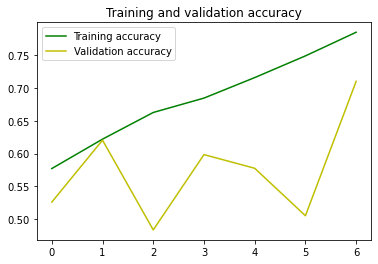

<Figure size 432x288 with 0 Axes>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

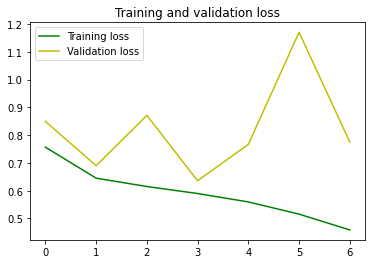

<Figure size 432x288 with 0 Axes>

In [31]:
epochs = range(len(acc))

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

[1.]
This is a male


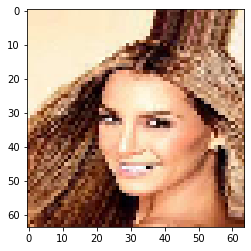

In [32]:

import numpy as np
from keras.preprocessing import image
#  images test 2
path_testmodel = "Train/Female/000001.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This is a female")
plt.imshow(imge)

# Fine tuning with Test data


In [33]:
test_generator = train_datagen.flow_from_directory('Test',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )

Found 99810 images belonging to 2 classes.


In [34]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
for layer in base_model.layers[:]:
    layer.trainable=True
model.summary()

model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

epochs = 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 2, 2, 512)         0         
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization (BatchN  (None, 2, 2, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 128)         589952    
                                                        

In [35]:


hist2 = model.fit_generator(generator=test_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=steps_per_epoch,
                           validation_steps=validation_steps,
                           epochs=epochs,
                           callbacks=[lrd, cp_callback,es])

<ipython-input-35-97a09e570ff1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2 = model.fit_generator(generator=test_generator,


Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 0.3692 - accuracy: 0.8372
Epoch 00001: val_loss did not improve from 0.63576
256/256 [==============================] - 1271s 5s/step - loss: 0.3692 - accuracy: 0.8372 - val_loss: 0.7825 - val_accuracy: 0.7363 - lr: 0.0010
Epoch 2/10
256/256 [==============================] - ETA: 0s - loss: 0.3277 - accuracy: 0.8574
Epoch 00002: val_loss improved from 0.63576 to 0.26416, saving model to cp.h5
256/256 [==============================] - 1262s 5s/step - loss: 0.3277 - accuracy: 0.8574 - val_loss: 0.2642 - val_accuracy: 0.8888 - lr: 0.0010
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 0.3054 - accuracy: 0.8680
Epoch 00003: val_loss did not improve from 0.26416
256/256 [==============================] - 1259s 5s/step - loss: 0.3054 - accuracy: 0.8680 - val_loss: 0.4593 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 4/10
256/256 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.879

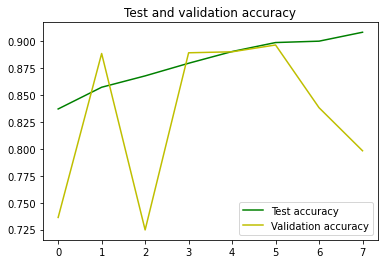

<Figure size 432x288 with 0 Axes>

In [36]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Test accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Test and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

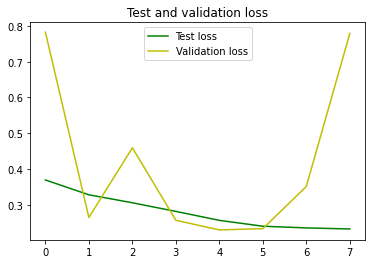

<Figure size 432x288 with 0 Axes>

In [37]:
epochs = range(len(acc))

plt.plot(epochs, loss, 'g', label='Test loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Test and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Run, Compile and Fit with Adience Dataset


In [38]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dir_name = './processed/'

def load_pickle(filename):
  with open(dir_name + filename + '.pkl', 'rb') as f:
    return pickle.load(f)

to_pickle = [['train', 'test']]
for i in range(5):
  to_pickle.append(["fold_%s_train_sub"%i, "fold_%s_val"%i])

one_csv = to_pickle[0] # change
train_pickle = load_pickle('_NEW_'+one_csv[0])
val_pickle = load_pickle('_NEW_'+one_csv[1])

X_train = np.array(train_pickle['images'])
y_train = np.array(train_pickle['genders'])

X_val = np.array(val_pickle['images'])
y_val = np.array(val_pickle['genders'])

In [ ]:
results = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = 10,
                    verbose=1,
                    callbacks=[lrd, cp_callback,es],
                    validation_data = (X_val,y_val))

Epoch 1/10
219/219 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.6342
Epoch 00001: val_loss did not improve from 0.22942
219/219 [==============================] - 981s 4s/step - loss: 0.6728 - accuracy: 0.6342 - val_loss: 1.0841 - val_accuracy: 0.5647 - lr: 5.0000e-04
Epoch 2/10
219/219 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.7963
Epoch 00002: val_loss did not improve from 0.22942
219/219 [==============================] - 944s 4s/step - loss: 0.4413 - accuracy: 0.7963 - val_loss: 0.3728 - val_accuracy: 0.8256 - lr: 5.0000e-04
Epoch 3/10
 26/219 [==>...........................] - ETA: 13:08 - loss: 0.3413 - accuracy: 0.8528

## Graph plotting with new results

In [ ]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Test accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Test and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:

plt.plot(epochs, loss, 'g', label='Test loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Test and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()